In [1]:
#Import all necessary packages 
import sys
import math
import statistics as stat
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageFilter, ImageEnhance, ImageDraw
#Import all the enhancement filter from pillow
from PIL.ImageFilter import (
   BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EDGE_ENHANCE_MORE,
   EMBOSS, FIND_EDGES, SMOOTH, SMOOTH_MORE, SHARPEN
)
from sklearn import preprocessing

In [3]:
#This method takes an image goes through the image looking at the
#g value of each tile and depending on whether its higher or lower
#sets the max or min to the g value. The avergae green is then calculated
#Then it goes through each pixel on the image, if it lower then the average
#it sets the g value to 0 causing it to be black. If it is higher then it
#sets the g value to 255, the max value causing it to be green. 

def bright(source_name, result_name, brightness):
    source = Image.open('EmptyBaseSmall.png')
    result = Image.new('RGB', source.size)
    max_green = 0
    min_green = 255
    avg_green = 0;
    count = 0
    for x in range(source.size[0]):
        for y in range(source.size[1]):
            r, g, b, a = source.getpixel((x, y))

            if g>max_green:
                max_green = g
            if g< min_green:
                min_green = g
            avg_green = avg_green +g
            count+=1
    avg_green = int (avg_green/count)
    
    for x in range(source.size[0]):
        for y in range(source.size[1]):
            r, g, b, a = source.getpixel((x, y))
            if g<avg_green:
                result.putpixel((x, y), (0,0, 0))
            else:
                  result.putpixel((x, y), (0,255, 0))
    result.show()
    findEdgeImg = result.filter(FIND_EDGES)
    result.save("newImageGB.jpg")

In [4]:
#Use the bright method to change the starting image 
img = Image.open('EmptyBaseSmall.png')
bright(img, 'Dk', 1.2)

In [5]:
#Open new image using CV
#Apply filters to the new modified image
#The image had patches of the opposite colour mixed in 
#which would cause problems. The filters applied remove
# a lot the patches and make the colour more consistent
cvImg = cv.imread('newImageGB.jpg')
medBlurImg = cv.medianBlur(cvImg, 7)
medBlurImg2 = cv.medianBlur(medBlurImg, 7)

cv.imshow('Image2', medBlurImg2)
cv.waitKey(0)

cv.imwrite('blur2.jpg', medBlurImg2) 


True

In [23]:
#Loop through values on a line
#points are put through breshenham algorithm to sort any issues
#with the points. The values are stored in a list and that list
#is then used in a for loop. The loop goes through the points 
#taking the g value and adding it to a list called vals
startX = 59
startY = 26
endX = 233
endY = 163

points = breshenham(startX,startY,endX,endY)

blurredImage = Image.open('blur2.jpg')

vals = []

for point in points:
        r, g, b = blurredImage.getpixel((point[0],point[1]))
        
        vals.append(g)

         


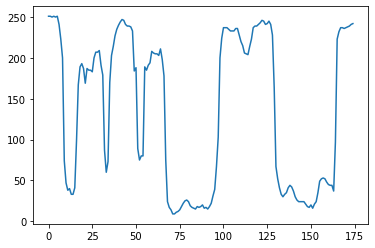

In [24]:
plt.plot(vals)

In [2]:
#Breshenham line algorithm
def breshenham(startX, startY, endX, endY):
    breshenhamList = []
    
    dx = endX - startX
    dy = endY - startY
    twoDy = dy * 2
    twoDyDx = 2 * (dy - dx)
    p = twoDy - dx
    
    if dx < 0:
        return breshenham(endX, endY, startX, startY)
    
    if dy < 0:
        return negativeY(breshenham(startX, -startY, endX, -endY))
    
    if dy > dx:
        return swapXY(breshenham(startY, startX, endY, endX))
    
    y = startY
    
    for x in range(startX, endX + 1):
        breshenhamList.append([x, y])
        
        if p > 0:
            y = y + 1
            p += twoDyDx
        else:
            p+= twoDy
    
    return breshenhamList

    

In [3]:
#Method used in breshenham algorithm
def negativeY(list_of_points):
    outputList = []
    
    for v in list_of_points:
        outputList.append([v[0], -v[1]])
    
    return outputList
        

In [4]:
#Method used in breshenham algorithm
def swapXY(listVals):
    outputList = []
    
    for v in listVals:
        outputList.append([v[1],v[0]])
        
    return outputList

In [6]:
#Slopes
#Calculating Slope of two points from image
#Slope = (Y2 - Y1)/(X2 - X1)
x1 = 819
y1 = 91
x2 = 1807
y2 = 835

m = (y2 - y1)/(x2 - x1)
print ('Slope: ' + str(m))

Slope: 0.7530364372469636


In [7]:
#Second Slope calculation
x1 = 1030
y1 = 106
x2 = 38
y2 = 855

m = (y2 - y1)/(x2 - x1)
print('Slope: ' + str(m))

Slope: -0.7550403225806451


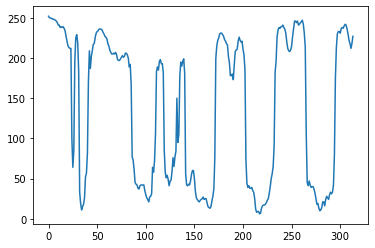

In [15]:
#Loop through values on a line
#Doing the same as above, plotting a graph as well
#Same applies to next few cells 
#Line 1 : (476, 20) (163, 256)
startX = 476
startY = 20
endX = 163
endY = 256

points = breshenham(startX,startY,endX,endY)

blurredImage = Image.open('blur2.jpg')

vals = []

for point in points:
        r, g, b = blurredImage.getpixel((point[0],point[1]))
        
        vals.append(g)
        
plt.plot(vals)

In [16]:
last = vals[0]
index_last = 0;
current_index = 0
dist = []
for v in vals:
    if (abs(v-last) > 100):
        dist.append(current_index - index_last)
        last = v
        index_last = current_index
    current_index+=1
    
    

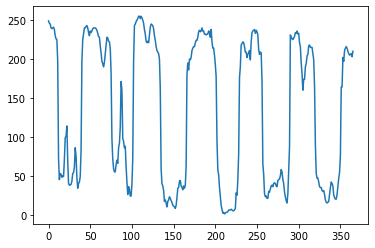

In [18]:
#Loop through values on a line
#Line 2 : (410, 23) (45, 295)
startX = 410
startY = 23
endX = 45
endY = 295

points = breshenham(startX,startY,endX,endY)

blurredImage = Image.open('blur2.jpg')

vals = []

for point in points:
        r, g, b = blurredImage.getpixel((point[0],point[1]))
        
        vals.append(g)
        
plt.plot(vals)

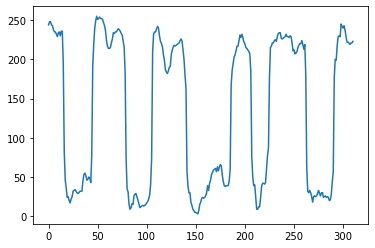

In [19]:
#Loop through values on a line
#Line 3 : (355, 25) (45, 256)
startX = 355
startY = 25
endX = 45
endY = 256

points = breshenham(startX,startY,endX,endY)

blurredImage = Image.open('blur2.jpg')

vals = []

for point in points:
        r, g, b = blurredImage.getpixel((point[0],point[1]))
        
        vals.append(g)
        
plt.plot(vals)

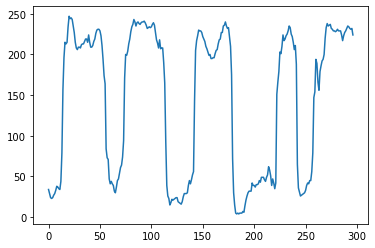

In [26]:
#Loop through values on a line
#Line 4 : (306, 17) (10, 236)
startX = 306
startY = 17
endX = 10
endY = 236

points = breshenham(startX,startY,endX,endY)

blurredImage = Image.open('blur2.jpg')

vals = []

for point in points:
        r, g, b = blurredImage.getpixel((point[0],point[1]))
        
        vals.append(g)
        
plt.plot(vals)

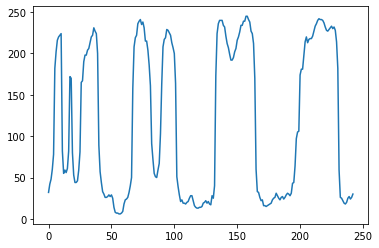

In [21]:
#Loop through values on a line
#Line 5 : (263, 6) (21, 179)
startX = 263
startY = 6
endX = 21
endY = 179

points = breshenham(startX,startY,endX,endY)

blurredImage = Image.open('blur2.jpg')

vals = []

for point in points:
        r, g, b = blurredImage.getpixel((point[0],point[1]))
        
        vals.append(g)
        
plt.plot(vals)

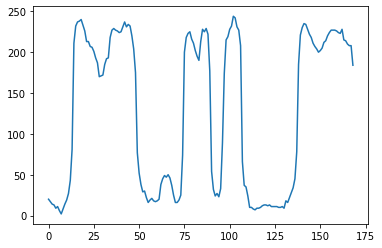

In [22]:
#Loop through values on a line
#Line 6 : (182, 11) (14, 140)
startX = 182
startY = 11
endX = 14
endY = 140

points = breshenham(startX,startY,endX,endY)

blurredImage = Image.open('blur2.jpg')

vals = []

for point in points:
        r, g, b = blurredImage.getpixel((point[0],point[1]))
        
        vals.append(g)
        
plt.plot(vals)

In [4]:
#Method to get the g value from a set of points
#and add them to a list. List is then returned
def gValueLoop(points):
    vals = []
    
    for point in points:
        r, g, b = image.getpixel((point[0],point[1]))
        
        vals.append(g)
        
    return vals

In [2]:
#This method calcualtes the difference the 
#current point and the previous point. If the difference between
#them is greater than 100 then it adds the previous point to the list
#as that would be considered the edge of a tile
def differences(vals, points):
    last = vals[0]
    index_last = 0;
    current_index = 0
    dist = []
    points_at_jumps = []
    for i in range(len(vals)):
        v = vals[i]
        if (abs(v-last) > 100):
            dist.append(current_index - index_last)
            points_at_jumps.append(points[i])
            print("\n\nPoint at jump: " + str(points_at_jumps))
            last = v
            index_last = current_index
            
        current_index+=1
    return dist

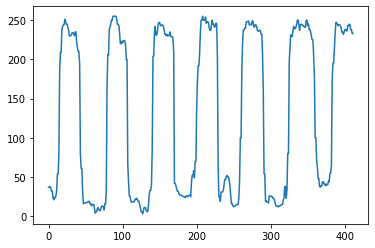



Point at jump: [(0, 11.295546558704455)]


Point at jump: [(0, 11.295546558704455), (0, 32.3805668016194)]


Point at jump: [(0, 11.295546558704455), (0, 32.3805668016194), (0, 60.242914979756996)]


Point at jump: [(0, 11.295546558704455), (0, 32.3805668016194), (0, 60.242914979756996), (0, 80.57489878542498)]


Point at jump: [(0, 11.295546558704455), (0, 32.3805668016194), (0, 60.242914979756996), (0, 80.57489878542498), (0, 106.17813765182169)]


Point at jump: [(0, 11.295546558704455), (0, 32.3805668016194), (0, 60.242914979756996), (0, 80.57489878542498), (0, 106.17813765182169), (0, 128.0161943319836)]


Point at jump: [(0, 11.295546558704455), (0, 32.3805668016194), (0, 60.242914979756996), (0, 80.57489878542498), (0, 106.17813765182169), (0, 128.0161943319836), (0, 151.36032388663986)]


Point at jump: [(0, 11.295546558704455), (0, 32.3805668016194), (0, 60.242914979756996), (0, 80.57489878542498), (0, 106.17813765182169), (0, 128.0161943319836), (0, 151.36032388663986), (0,

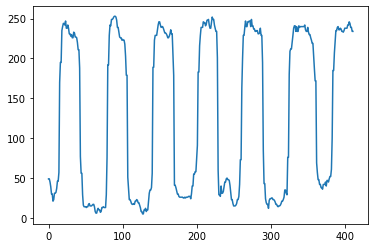



Point at jump: [(1, 11.295546558704455)]


Point at jump: [(1, 11.295546558704455), (1, 33.133603238866364)]


Point at jump: [(1, 11.295546558704455), (1, 33.133603238866364), (1, 60.242914979756996)]


Point at jump: [(1, 11.295546558704455), (1, 33.133603238866364), (1, 60.242914979756996), (1, 80.57489878542498)]


Point at jump: [(1, 11.295546558704455), (1, 33.133603238866364), (1, 60.242914979756996), (1, 80.57489878542498), (1, 106.17813765182169)]


Point at jump: [(1, 11.295546558704455), (1, 33.133603238866364), (1, 60.242914979756996), (1, 80.57489878542498), (1, 106.17813765182169), (1, 128.0161943319836)]


Point at jump: [(1, 11.295546558704455), (1, 33.133603238866364), (1, 60.242914979756996), (1, 80.57489878542498), (1, 106.17813765182169), (1, 128.0161943319836), (1, 152.11336032388684)]


Point at jump: [(1, 11.295546558704455), (1, 33.133603238866364), (1, 60.242914979756996), (1, 80.57489878542498), (1, 106.17813765182169), (1, 128.0161943319836), (1, 152.113360

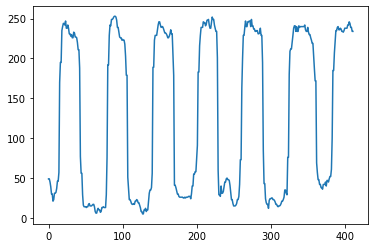

[[15, 29, 36, 27, 34, 29, 32, 27, 32, 30, 34, 37, 22]]


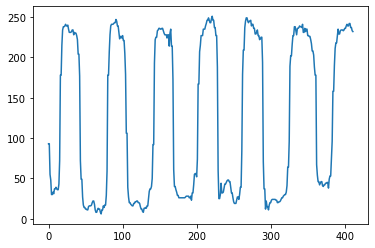



Point at jump: [(2, 13.554655870445346)]


Point at jump: [(2, 13.554655870445346), (2, 32.3805668016194)]


Point at jump: [(2, 13.554655870445346), (2, 32.3805668016194), (2, 60.242914979756996)]


Point at jump: [(2, 13.554655870445346), (2, 32.3805668016194), (2, 60.242914979756996), (2, 80.57489878542498)]


Point at jump: [(2, 13.554655870445346), (2, 32.3805668016194), (2, 60.242914979756996), (2, 80.57489878542498), (2, 107.68421052631561)]


Point at jump: [(2, 13.554655870445346), (2, 32.3805668016194), (2, 60.242914979756996), (2, 80.57489878542498), (2, 107.68421052631561), (2, 127.26315789473662)]


Point at jump: [(2, 13.554655870445346), (2, 32.3805668016194), (2, 60.242914979756996), (2, 80.57489878542498), (2, 107.68421052631561), (2, 127.26315789473662), (2, 152.11336032388684)]


Point at jump: [(2, 13.554655870445346), (2, 32.3805668016194), (2, 60.242914979756996), (2, 80.57489878542498), (2, 107.68421052631561), (2, 127.26315789473662), (2, 152.11336032388684), 

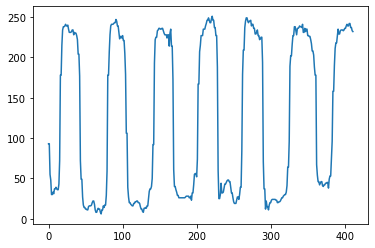

[[15, 29, 36, 27, 34, 29, 32, 27, 32, 30, 34, 37, 22], [18, 25, 37, 27, 36, 26, 33, 27, 33, 28, 36, 36, 24]]


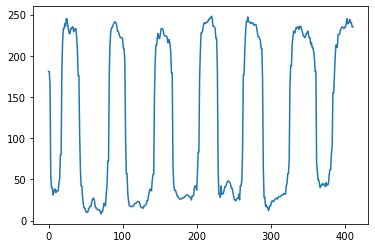



Point at jump: [(3, 2.2591093117408905)]


Point at jump: [(3, 2.2591093117408905), (3, 13.554655870445346)]


Point at jump: [(3, 2.2591093117408905), (3, 13.554655870445346), (3, 32.3805668016194)]


Point at jump: [(3, 2.2591093117408905), (3, 13.554655870445346), (3, 32.3805668016194), (3, 61.74898785425092)]


Point at jump: [(3, 2.2591093117408905), (3, 13.554655870445346), (3, 32.3805668016194), (3, 61.74898785425092), (3, 79.06882591093105)]


Point at jump: [(3, 2.2591093117408905), (3, 13.554655870445346), (3, 32.3805668016194), (3, 61.74898785425092), (3, 79.06882591093105), (3, 108.43724696356257)]


Point at jump: [(3, 2.2591093117408905), (3, 13.554655870445346), (3, 32.3805668016194), (3, 61.74898785425092), (3, 79.06882591093105), (3, 108.43724696356257), (3, 126.51012145748966)]


Point at jump: [(3, 2.2591093117408905), (3, 13.554655870445346), (3, 32.3805668016194), (3, 61.74898785425092), (3, 79.06882591093105), (3, 108.43724696356257), (3, 126.51012145748966), (3

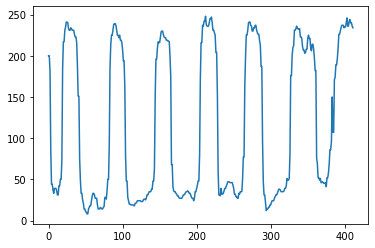



Point at jump: [(4, 2.2591093117408905)]


Point at jump: [(4, 2.2591093117408905), (4, 15.060728744939274)]


Point at jump: [(4, 2.2591093117408905), (4, 15.060728744939274), (4, 31.62753036437244)]


Point at jump: [(4, 2.2591093117408905), (4, 15.060728744939274), (4, 31.62753036437244), (4, 62.50202429149788)]


Point at jump: [(4, 2.2591093117408905), (4, 15.060728744939274), (4, 31.62753036437244), (4, 62.50202429149788), (4, 78.31578947368409)]


Point at jump: [(4, 2.2591093117408905), (4, 15.060728744939274), (4, 31.62753036437244), (4, 62.50202429149788), (4, 78.31578947368409), (4, 109.19028340080953)]


Point at jump: [(4, 2.2591093117408905), (4, 15.060728744939274), (4, 31.62753036437244), (4, 62.50202429149788), (4, 78.31578947368409), (4, 109.19028340080953), (4, 125.00404858299574)]


Point at jump: [(4, 2.2591093117408905), (4, 15.060728744939274), (4, 31.62753036437244), (4, 62.50202429149788), (4, 78.31578947368409), (4, 109.19028340080953), (4, 125.0040485829957

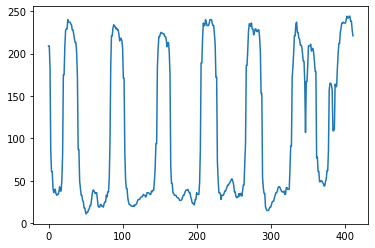



Point at jump: [(5, 2.2591093117408905)]


Point at jump: [(5, 2.2591093117408905), (5, 16.5668016194332)]


Point at jump: [(5, 2.2591093117408905), (5, 16.5668016194332), (5, 30.121457489878516)]


Point at jump: [(5, 2.2591093117408905), (5, 16.5668016194332), (5, 30.121457489878516), (5, 64.00809716599181)]


Point at jump: [(5, 2.2591093117408905), (5, 16.5668016194332), (5, 30.121457489878516), (5, 64.00809716599181), (5, 77.56275303643713)]


Point at jump: [(5, 2.2591093117408905), (5, 16.5668016194332), (5, 30.121457489878516), (5, 64.00809716599181), (5, 77.56275303643713), (5, 110.69635627530346)]


Point at jump: [(5, 2.2591093117408905), (5, 16.5668016194332), (5, 30.121457489878516), (5, 64.00809716599181), (5, 77.56275303643713), (5, 110.69635627530346), (5, 124.25101214574877)]


Point at jump: [(5, 2.2591093117408905), (5, 16.5668016194332), (5, 30.121457489878516), (5, 64.00809716599181), (5, 77.56275303643713), (5, 110.69635627530346), (5, 124.25101214574877), (5, 

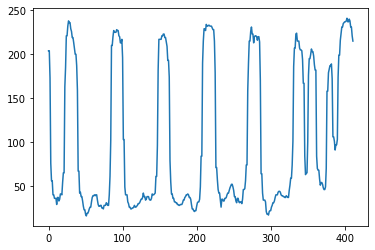



Point at jump: [(6, 2.2591093117408905)]


Point at jump: [(6, 2.2591093117408905), (6, 17.31983805668016)]


Point at jump: [(6, 2.2591093117408905), (6, 17.31983805668016), (6, 30.121457489878516)]


Point at jump: [(6, 2.2591093117408905), (6, 17.31983805668016), (6, 30.121457489878516), (6, 64.00809716599181)]


Point at jump: [(6, 2.2591093117408905), (6, 17.31983805668016), (6, 30.121457489878516), (6, 64.00809716599181), (6, 76.0566801619432)]


Point at jump: [(6, 2.2591093117408905), (6, 17.31983805668016), (6, 30.121457489878516), (6, 64.00809716599181), (6, 76.0566801619432), (6, 112.20242914979738)]


Point at jump: [(6, 2.2591093117408905), (6, 17.31983805668016), (6, 30.121457489878516), (6, 64.00809716599181), (6, 76.0566801619432), (6, 112.20242914979738), (6, 123.49797570850181)]


Point at jump: [(6, 2.2591093117408905), (6, 17.31983805668016), (6, 30.121457489878516), (6, 64.00809716599181), (6, 76.0566801619432), (6, 112.20242914979738), (6, 123.49797570850181), (

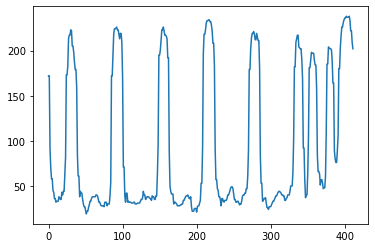



Point at jump: [(7, 2.2591093117408905)]


Point at jump: [(7, 2.2591093117408905), (7, 18.072874493927124)]


Point at jump: [(7, 2.2591093117408905), (7, 18.072874493927124), (7, 30.121457489878516)]


Point at jump: [(7, 2.2591093117408905), (7, 18.072874493927124), (7, 30.121457489878516), (7, 64.00809716599181)]


Point at jump: [(7, 2.2591093117408905), (7, 18.072874493927124), (7, 30.121457489878516), (7, 64.00809716599181), (7, 76.0566801619432)]


Point at jump: [(7, 2.2591093117408905), (7, 18.072874493927124), (7, 30.121457489878516), (7, 64.00809716599181), (7, 76.0566801619432), (7, 112.20242914979738)]


Point at jump: [(7, 2.2591093117408905), (7, 18.072874493927124), (7, 30.121457489878516), (7, 64.00809716599181), (7, 76.0566801619432), (7, 112.20242914979738), (7, 122.74493927125485)]


Point at jump: [(7, 2.2591093117408905), (7, 18.072874493927124), (7, 30.121457489878516), (7, 64.00809716599181), (7, 76.0566801619432), (7, 112.20242914979738), (7, 122.74493927125

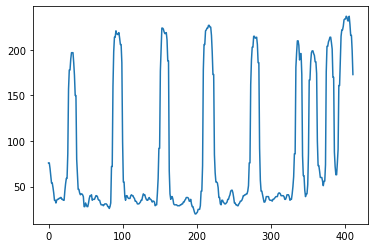



Point at jump: [(8, 21.085020242914972)]


Point at jump: [(8, 21.085020242914972), (8, 29.368421052631554)]


Point at jump: [(8, 21.085020242914972), (8, 29.368421052631554), (8, 66.2672064777327)]


Point at jump: [(8, 21.085020242914972), (8, 29.368421052631554), (8, 66.2672064777327), (8, 76.0566801619432)]


Point at jump: [(8, 21.085020242914972), (8, 29.368421052631554), (8, 66.2672064777327), (8, 76.0566801619432), (8, 113.7085020242913)]


Point at jump: [(8, 21.085020242914972), (8, 29.368421052631554), (8, 66.2672064777327), (8, 76.0566801619432), (8, 113.7085020242913), (8, 122.74493927125485)]


Point at jump: [(8, 21.085020242914972), (8, 29.368421052631554), (8, 66.2672064777327), (8, 76.0566801619432), (8, 113.7085020242913), (8, 122.74493927125485), (8, 157.38461538461567)]


Point at jump: [(8, 21.085020242914972), (8, 29.368421052631554), (8, 66.2672064777327), (8, 76.0566801619432), (8, 113.7085020242913), (8, 122.74493927125485), (8, 157.38461538461567), (8, 169

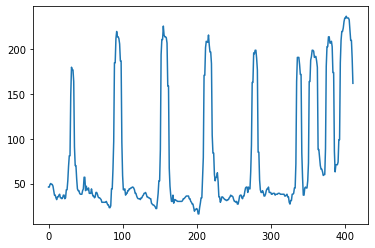



Point at jump: [(9, 22.591093117408896)]


Point at jump: [(9, 22.591093117408896), (9, 29.368421052631554)]


Point at jump: [(9, 22.591093117408896), (9, 29.368421052631554), (9, 67.02024291497966)]


Point at jump: [(9, 22.591093117408896), (9, 29.368421052631554), (9, 67.02024291497966), (9, 75.30364372469624)]


Point at jump: [(9, 22.591093117408896), (9, 29.368421052631554), (9, 67.02024291497966), (9, 75.30364372469624), (9, 114.46153846153827)]


Point at jump: [(9, 22.591093117408896), (9, 29.368421052631554), (9, 67.02024291497966), (9, 75.30364372469624), (9, 114.46153846153827), (9, 122.74493927125485)]


Point at jump: [(9, 22.591093117408896), (9, 29.368421052631554), (9, 67.02024291497966), (9, 75.30364372469624), (9, 114.46153846153827), (9, 122.74493927125485), (9, 158.13765182186265)]


Point at jump: [(9, 22.591093117408896), (9, 29.368421052631554), (9, 67.02024291497966), (9, 75.30364372469624), (9, 114.46153846153827), (9, 122.74493927125485), (9, 158.137651821

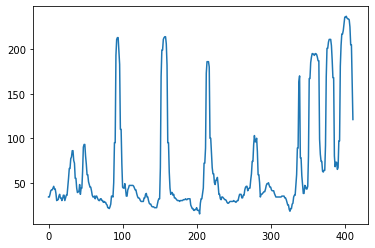



Point at jump: [(10, 68.52631578947359)]


Point at jump: [(10, 68.52631578947359), (10, 74.55060728744928)]


Point at jump: [(10, 68.52631578947359), (10, 74.55060728744928), (10, 115.21457489878523)]


Point at jump: [(10, 68.52631578947359), (10, 74.55060728744928), (10, 115.21457489878523), (10, 121.23886639676093)]


Point at jump: [(10, 68.52631578947359), (10, 74.55060728744928), (10, 115.21457489878523), (10, 121.23886639676093), (10, 283.14170040486067)]


Point at jump: [(10, 68.52631578947359), (10, 74.55060728744928), (10, 115.21457489878523), (10, 121.23886639676093), (10, 283.14170040486067), (10, 290.67206477733043)]


Point at jump: [(10, 68.52631578947359), (10, 74.55060728744928), (10, 115.21457489878523), (10, 121.23886639676093), (10, 283.14170040486067), (10, 290.67206477733043), (10, 296.69635627530624)]
Standard deviation 76.96041035431634


Point at jump: [(10, 68.52631578947359)]


Point at jump: [(10, 68.52631578947359), (10, 74.55060728744928)]


Point at 

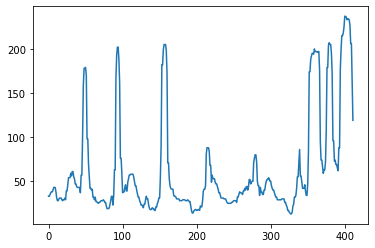



Point at jump: [(11, 35.39271255060725)]


Point at jump: [(11, 35.39271255060725), (11, 41.417004048582946)]


Point at jump: [(11, 35.39271255060725), (11, 41.417004048582946), (11, 68.52631578947359)]


Point at jump: [(11, 35.39271255060725), (11, 41.417004048582946), (11, 68.52631578947359), (11, 74.55060728744928)]


Point at jump: [(11, 35.39271255060725), (11, 41.417004048582946), (11, 68.52631578947359), (11, 74.55060728744928), (11, 115.21457489878523)]


Point at jump: [(11, 35.39271255060725), (11, 41.417004048582946), (11, 68.52631578947359), (11, 74.55060728744928), (11, 115.21457489878523), (11, 121.23886639676093)]


Point at jump: [(11, 35.39271255060725), (11, 41.417004048582946), (11, 68.52631578947359), (11, 74.55060728744928), (11, 115.21457489878523), (11, 121.23886639676093), (11, 265.06882591093324)]


Point at jump: [(11, 35.39271255060725), (11, 41.417004048582946), (11, 68.52631578947359), (11, 74.55060728744928), (11, 115.21457489878523), (11, 121.23886639

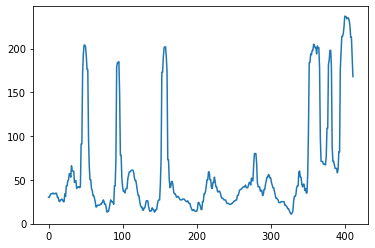



Point at jump: [(12, 34.63967611336029)]


Point at jump: [(12, 34.63967611336029), (12, 41.417004048582946)]


Point at jump: [(12, 34.63967611336029), (12, 41.417004048582946), (12, 69.27935222672055)]


Point at jump: [(12, 34.63967611336029), (12, 41.417004048582946), (12, 69.27935222672055), (12, 73.04453441295536)]


Point at jump: [(12, 34.63967611336029), (12, 41.417004048582946), (12, 69.27935222672055), (12, 73.04453441295536), (12, 116.72064777327915)]


Point at jump: [(12, 34.63967611336029), (12, 41.417004048582946), (12, 69.27935222672055), (12, 73.04453441295536), (12, 116.72064777327915), (12, 121.23886639676093)]


Point at jump: [(12, 34.63967611336029), (12, 41.417004048582946), (12, 69.27935222672055), (12, 73.04453441295536), (12, 116.72064777327915), (12, 121.23886639676093), (12, 265.06882591093324)]


Point at jump: [(12, 34.63967611336029), (12, 41.417004048582946), (12, 69.27935222672055), (12, 73.04453441295536), (12, 116.72064777327915), (12, 121.23886639

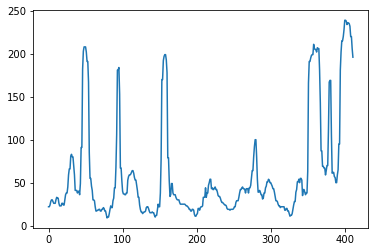



Point at jump: [(13, 34.63967611336029)]


Point at jump: [(13, 34.63967611336029), (13, 42.17004048582991)]


Point at jump: [(13, 34.63967611336029), (13, 42.17004048582991), (13, 70.03238866396751)]


Point at jump: [(13, 34.63967611336029), (13, 42.17004048582991), (13, 70.03238866396751), (13, 73.04453441295536)]


Point at jump: [(13, 34.63967611336029), (13, 42.17004048582991), (13, 70.03238866396751), (13, 73.04453441295536), (13, 115.21457489878523)]


Point at jump: [(13, 34.63967611336029), (13, 42.17004048582991), (13, 70.03238866396751), (13, 73.04453441295536), (13, 115.21457489878523), (13, 122.74493927125485)]


Point at jump: [(13, 34.63967611336029), (13, 42.17004048582991), (13, 70.03238866396751), (13, 73.04453441295536), (13, 115.21457489878523), (13, 122.74493927125485), (13, 264.31578947368627)]


Point at jump: [(13, 34.63967611336029), (13, 42.17004048582991), (13, 70.03238866396751), (13, 73.04453441295536), (13, 115.21457489878523), (13, 122.74493927125485)

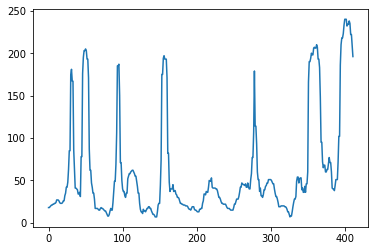



Point at jump: [(14, 22.591093117408896)]


Point at jump: [(14, 22.591093117408896), (14, 26.356275303643706)]


Point at jump: [(14, 22.591093117408896), (14, 26.356275303643706), (14, 34.63967611336029)]


Point at jump: [(14, 22.591093117408896), (14, 26.356275303643706), (14, 34.63967611336029), (14, 42.17004048582991)]


Point at jump: [(14, 22.591093117408896), (14, 26.356275303643706), (14, 34.63967611336029), (14, 42.17004048582991), (14, 70.03238866396751)]


Point at jump: [(14, 22.591093117408896), (14, 26.356275303643706), (14, 34.63967611336029), (14, 42.17004048582991), (14, 70.03238866396751), (14, 73.04453441295536)]


Point at jump: [(14, 22.591093117408896), (14, 26.356275303643706), (14, 34.63967611336029), (14, 42.17004048582991), (14, 70.03238866396751), (14, 73.04453441295536), (14, 115.21457489878523)]


Point at jump: [(14, 22.591093117408896), (14, 26.356275303643706), (14, 34.63967611336029), (14, 42.17004048582991), (14, 70.03238866396751), (14, 73.0445344

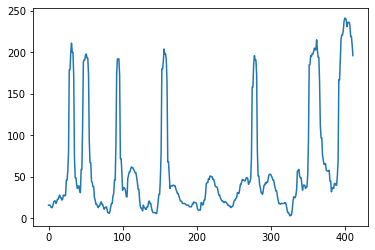



Point at jump: [(15, 21.085020242914972)]


Point at jump: [(15, 21.085020242914972), (15, 26.356275303643706)]


Point at jump: [(15, 21.085020242914972), (15, 26.356275303643706), (15, 35.39271255060725)]


Point at jump: [(15, 21.085020242914972), (15, 26.356275303643706), (15, 35.39271255060725), (15, 42.17004048582991)]


Point at jump: [(15, 21.085020242914972), (15, 26.356275303643706), (15, 35.39271255060725), (15, 42.17004048582991), (15, 69.27935222672055)]


Point at jump: [(15, 21.085020242914972), (15, 26.356275303643706), (15, 35.39271255060725), (15, 42.17004048582991), (15, 69.27935222672055), (15, 73.04453441295536)]


Point at jump: [(15, 21.085020242914972), (15, 26.356275303643706), (15, 35.39271255060725), (15, 42.17004048582991), (15, 69.27935222672055), (15, 73.04453441295536), (15, 115.21457489878523)]


Point at jump: [(15, 21.085020242914972), (15, 26.356275303643706), (15, 35.39271255060725), (15, 42.17004048582991), (15, 69.27935222672055), (15, 73.0445344

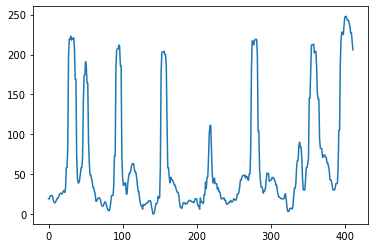



Point at jump: [(16, 20.33198380566801)]


Point at jump: [(16, 20.33198380566801), (16, 28.615384615384592)]


Point at jump: [(16, 20.33198380566801), (16, 28.615384615384592), (16, 36.14574898785421)]


Point at jump: [(16, 20.33198380566801), (16, 28.615384615384592), (16, 36.14574898785421), (16, 41.417004048582946)]


Point at jump: [(16, 20.33198380566801), (16, 28.615384615384592), (16, 36.14574898785421), (16, 41.417004048582946), (16, 68.52631578947359)]


Point at jump: [(16, 20.33198380566801), (16, 28.615384615384592), (16, 36.14574898785421), (16, 41.417004048582946), (16, 68.52631578947359), (16, 74.55060728744928)]


Point at jump: [(16, 20.33198380566801), (16, 28.615384615384592), (16, 36.14574898785421), (16, 41.417004048582946), (16, 68.52631578947359), (16, 74.55060728744928), (16, 114.46153846153827)]


Point at jump: [(16, 20.33198380566801), (16, 28.615384615384592), (16, 36.14574898785421), (16, 41.417004048582946), (16, 68.52631578947359), (16, 74.5506072874

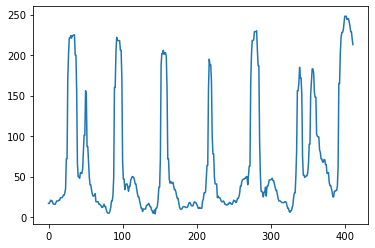



Point at jump: [(17, 19.578947368421048)]


Point at jump: [(17, 19.578947368421048), (17, 29.368421052631554)]


Point at jump: [(17, 19.578947368421048), (17, 29.368421052631554), (17, 68.52631578947359)]


Point at jump: [(17, 19.578947368421048), (17, 29.368421052631554), (17, 68.52631578947359), (17, 75.30364372469624)]


Point at jump: [(17, 19.578947368421048), (17, 29.368421052631554), (17, 68.52631578947359), (17, 75.30364372469624), (17, 114.46153846153827)]


Point at jump: [(17, 19.578947368421048), (17, 29.368421052631554), (17, 68.52631578947359), (17, 75.30364372469624), (17, 114.46153846153827), (17, 121.23886639676093)]


Point at jump: [(17, 19.578947368421048), (17, 29.368421052631554), (17, 68.52631578947359), (17, 75.30364372469624), (17, 114.46153846153827), (17, 121.23886639676093), (17, 163.40890688259148)]


Point at jump: [(17, 19.578947368421048), (17, 29.368421052631554), (17, 68.52631578947359), (17, 75.30364372469624), (17, 114.46153846153827), (17, 121.

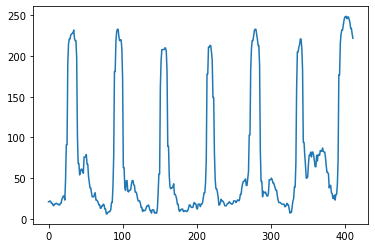



Point at jump: [(18, 19.578947368421048)]


Point at jump: [(18, 19.578947368421048), (18, 30.121457489878516)]


Point at jump: [(18, 19.578947368421048), (18, 30.121457489878516), (18, 67.02024291497966)]


Point at jump: [(18, 19.578947368421048), (18, 30.121457489878516), (18, 67.02024291497966), (18, 76.0566801619432)]


Point at jump: [(18, 19.578947368421048), (18, 30.121457489878516), (18, 67.02024291497966), (18, 76.0566801619432), (18, 114.46153846153827)]


Point at jump: [(18, 19.578947368421048), (18, 30.121457489878516), (18, 67.02024291497966), (18, 76.0566801619432), (18, 114.46153846153827), (18, 121.23886639676093)]


Point at jump: [(18, 19.578947368421048), (18, 30.121457489878516), (18, 67.02024291497966), (18, 76.0566801619432), (18, 114.46153846153827), (18, 121.23886639676093), (18, 162.6558704453445)]


Point at jump: [(18, 19.578947368421048), (18, 30.121457489878516), (18, 67.02024291497966), (18, 76.0566801619432), (18, 114.46153846153827), (18, 121.238866

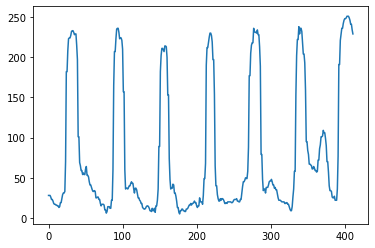



Point at jump: [(19, 18.072874493927124)]


Point at jump: [(19, 18.072874493927124), (19, 31.62753036437244)]


Point at jump: [(19, 18.072874493927124), (19, 31.62753036437244), (19, 67.02024291497966)]


Point at jump: [(19, 18.072874493927124), (19, 31.62753036437244), (19, 67.02024291497966), (19, 77.56275303643713)]


Point at jump: [(19, 18.072874493927124), (19, 31.62753036437244), (19, 67.02024291497966), (19, 77.56275303643713), (19, 113.7085020242913)]


Point at jump: [(19, 18.072874493927124), (19, 31.62753036437244), (19, 67.02024291497966), (19, 77.56275303643713), (19, 113.7085020242913), (19, 122.74493927125485)]


Point at jump: [(19, 18.072874493927124), (19, 31.62753036437244), (19, 67.02024291497966), (19, 77.56275303643713), (19, 113.7085020242913), (19, 122.74493927125485), (19, 160.39676113360358)]


Point at jump: [(19, 18.072874493927124), (19, 31.62753036437244), (19, 67.02024291497966), (19, 77.56275303643713), (19, 113.7085020242913), (19, 122.74493927125

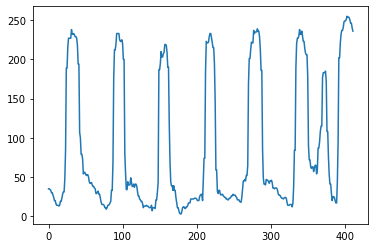



Point at jump: [(20, 18.072874493927124)]


Point at jump: [(20, 18.072874493927124), (20, 33.133603238866364)]


Point at jump: [(20, 18.072874493927124), (20, 33.133603238866364), (20, 67.02024291497966)]


Point at jump: [(20, 18.072874493927124), (20, 33.133603238866364), (20, 67.02024291497966), (20, 77.56275303643713)]


Point at jump: [(20, 18.072874493927124), (20, 33.133603238866364), (20, 67.02024291497966), (20, 77.56275303643713), (20, 112.20242914979738)]


Point at jump: [(20, 18.072874493927124), (20, 33.133603238866364), (20, 67.02024291497966), (20, 77.56275303643713), (20, 112.20242914979738), (20, 123.49797570850181)]


Point at jump: [(20, 18.072874493927124), (20, 33.133603238866364), (20, 67.02024291497966), (20, 77.56275303643713), (20, 112.20242914979738), (20, 123.49797570850181), (20, 159.6437246963566)]


Point at jump: [(20, 18.072874493927124), (20, 33.133603238866364), (20, 67.02024291497966), (20, 77.56275303643713), (20, 112.20242914979738), (20, 123.4

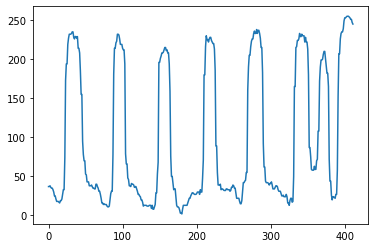



Point at jump: [(21, 17.31983805668016)]


Point at jump: [(21, 17.31983805668016), (21, 36.14574898785421)]


Point at jump: [(21, 17.31983805668016), (21, 36.14574898785421), (21, 66.2672064777327)]


Point at jump: [(21, 17.31983805668016), (21, 36.14574898785421), (21, 66.2672064777327), (21, 78.31578947368409)]


Point at jump: [(21, 17.31983805668016), (21, 36.14574898785421), (21, 66.2672064777327), (21, 78.31578947368409), (21, 112.20242914979738)]


Point at jump: [(21, 17.31983805668016), (21, 36.14574898785421), (21, 66.2672064777327), (21, 78.31578947368409), (21, 112.20242914979738), (21, 124.25101214574877)]


Point at jump: [(21, 17.31983805668016), (21, 36.14574898785421), (21, 66.2672064777327), (21, 78.31578947368409), (21, 112.20242914979738), (21, 124.25101214574877), (21, 158.13765182186265)]


Point at jump: [(21, 17.31983805668016), (21, 36.14574898785421), (21, 66.2672064777327), (21, 78.31578947368409), (21, 112.20242914979738), (21, 124.25101214574877), (21,

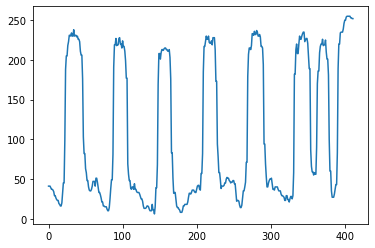



Point at jump: [(22, 17.31983805668016)]


Point at jump: [(22, 17.31983805668016), (22, 36.14574898785421)]


Point at jump: [(22, 17.31983805668016), (22, 36.14574898785421), (22, 66.2672064777327)]


Point at jump: [(22, 17.31983805668016), (22, 36.14574898785421), (22, 66.2672064777327), (22, 80.57489878542498)]


Point at jump: [(22, 17.31983805668016), (22, 36.14574898785421), (22, 66.2672064777327), (22, 80.57489878542498), (22, 112.20242914979738)]


Point at jump: [(22, 17.31983805668016), (22, 36.14574898785421), (22, 66.2672064777327), (22, 80.57489878542498), (22, 112.20242914979738), (22, 125.00404858299574)]


Point at jump: [(22, 17.31983805668016), (22, 36.14574898785421), (22, 66.2672064777327), (22, 80.57489878542498), (22, 112.20242914979738), (22, 125.00404858299574), (22, 157.38461538461567)]


Point at jump: [(22, 17.31983805668016), (22, 36.14574898785421), (22, 66.2672064777327), (22, 80.57489878542498), (22, 112.20242914979738), (22, 125.00404858299574), (22,

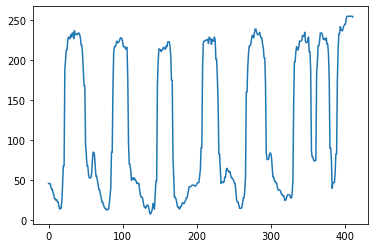



Point at jump: [(23, 16.5668016194332)]


Point at jump: [(23, 16.5668016194332), (23, 38.4048582995951)]


Point at jump: [(23, 16.5668016194332), (23, 38.4048582995951), (23, 66.2672064777327)]


Point at jump: [(23, 16.5668016194332), (23, 38.4048582995951), (23, 66.2672064777327), (23, 81.32793522267194)]


Point at jump: [(23, 16.5668016194332), (23, 38.4048582995951), (23, 66.2672064777327), (23, 81.32793522267194), (23, 111.44939271255042)]


Point at jump: [(23, 16.5668016194332), (23, 38.4048582995951), (23, 66.2672064777327), (23, 81.32793522267194), (23, 111.44939271255042), (23, 126.51012145748966)]


Point at jump: [(23, 16.5668016194332), (23, 38.4048582995951), (23, 66.2672064777327), (23, 81.32793522267194), (23, 111.44939271255042), (23, 126.51012145748966), (23, 156.6315789473687)]


Point at jump: [(23, 16.5668016194332), (23, 38.4048582995951), (23, 66.2672064777327), (23, 81.32793522267194), (23, 111.44939271255042), (23, 126.51012145748966), (23, 156.63157894736

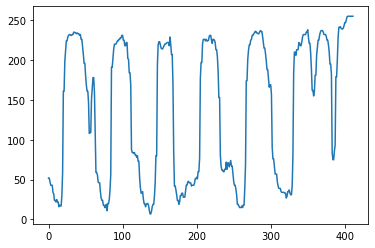



Point at jump: [(24, 15.060728744939274)]


Point at jump: [(24, 15.060728744939274), (24, 48.194331983805604)]


Point at jump: [(24, 15.060728744939274), (24, 48.194331983805604), (24, 64.00809716599181)]


Point at jump: [(24, 15.060728744939274), (24, 48.194331983805604), (24, 64.00809716599181), (24, 84.34008097165979)]


Point at jump: [(24, 15.060728744939274), (24, 48.194331983805604), (24, 64.00809716599181), (24, 84.34008097165979), (24, 110.69635627530346)]


Point at jump: [(24, 15.060728744939274), (24, 48.194331983805604), (24, 64.00809716599181), (24, 84.34008097165979), (24, 110.69635627530346), (24, 127.26315789473662)]


Point at jump: [(24, 15.060728744939274), (24, 48.194331983805604), (24, 64.00809716599181), (24, 84.34008097165979), (24, 110.69635627530346), (24, 127.26315789473662), (24, 155.12550607287474)]


Point at jump: [(24, 15.060728744939274), (24, 48.194331983805604), (24, 64.00809716599181), (24, 84.34008097165979), (24, 110.69635627530346), (24, 127.

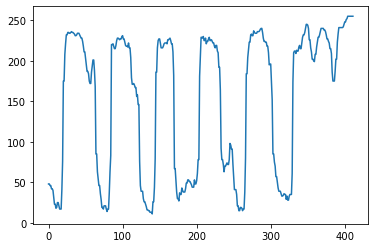



Point at jump: [(25, 15.060728744939274)]


Point at jump: [(25, 15.060728744939274), (25, 49.70040485829953)]


Point at jump: [(25, 15.060728744939274), (25, 49.70040485829953), (25, 64.00809716599181)]


Point at jump: [(25, 15.060728744939274), (25, 49.70040485829953), (25, 64.00809716599181), (25, 92.62348178137637)]


Point at jump: [(25, 15.060728744939274), (25, 49.70040485829953), (25, 64.00809716599181), (25, 92.62348178137637), (25, 109.19028340080953)]


Point at jump: [(25, 15.060728744939274), (25, 49.70040485829953), (25, 64.00809716599181), (25, 92.62348178137637), (25, 109.19028340080953), (25, 128.0161943319836)]


Point at jump: [(25, 15.060728744939274), (25, 49.70040485829953), (25, 64.00809716599181), (25, 92.62348178137637), (25, 109.19028340080953), (25, 128.0161943319836), (25, 153.6194331983808)]


Point at jump: [(25, 15.060728744939274), (25, 49.70040485829953), (25, 64.00809716599181), (25, 92.62348178137637), (25, 109.19028340080953), (25, 128.0161943319

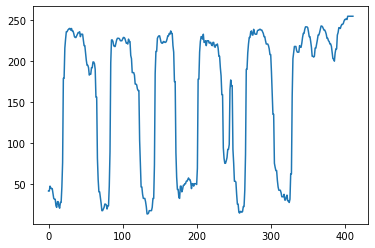



Point at jump: [(26, 15.060728744939274)]


Point at jump: [(26, 15.060728744939274), (26, 50.45344129554649)]


Point at jump: [(26, 15.060728744939274), (26, 50.45344129554649), (26, 63.255060728744844)]


Point at jump: [(26, 15.060728744939274), (26, 50.45344129554649), (26, 63.255060728744844), (26, 93.37651821862333)]


Point at jump: [(26, 15.060728744939274), (26, 50.45344129554649), (26, 63.255060728744844), (26, 93.37651821862333), (26, 108.43724696356257)]


Point at jump: [(26, 15.060728744939274), (26, 50.45344129554649), (26, 63.255060728744844), (26, 93.37651821862333), (26, 108.43724696356257), (26, 130.27530364372453)]


Point at jump: [(26, 15.060728744939274), (26, 50.45344129554649), (26, 63.255060728744844), (26, 93.37651821862333), (26, 108.43724696356257), (26, 130.27530364372453), (26, 152.11336032388684)]


Point at jump: [(26, 15.060728744939274), (26, 50.45344129554649), (26, 63.255060728744844), (26, 93.37651821862333), (26, 108.43724696356257), (26, 130.2

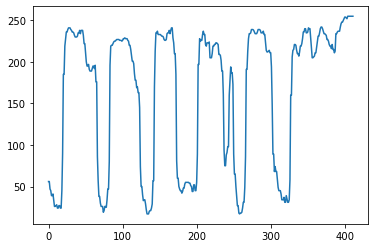



Point at jump: [(27, 15.060728744939274)]


Point at jump: [(27, 15.060728744939274), (27, 50.45344129554649)]


Point at jump: [(27, 15.060728744939274), (27, 50.45344129554649), (27, 62.50202429149788)]


Point at jump: [(27, 15.060728744939274), (27, 50.45344129554649), (27, 62.50202429149788), (27, 93.37651821862333)]


Point at jump: [(27, 15.060728744939274), (27, 50.45344129554649), (27, 62.50202429149788), (27, 93.37651821862333), (27, 108.43724696356257)]


Point at jump: [(27, 15.060728744939274), (27, 50.45344129554649), (27, 62.50202429149788), (27, 93.37651821862333), (27, 108.43724696356257), (27, 130.27530364372453)]


Point at jump: [(27, 15.060728744939274), (27, 50.45344129554649), (27, 62.50202429149788), (27, 93.37651821862333), (27, 108.43724696356257), (27, 130.27530364372453), (27, 152.11336032388684)]


Point at jump: [(27, 15.060728744939274), (27, 50.45344129554649), (27, 62.50202429149788), (27, 93.37651821862333), (27, 108.43724696356257), (27, 130.2753036

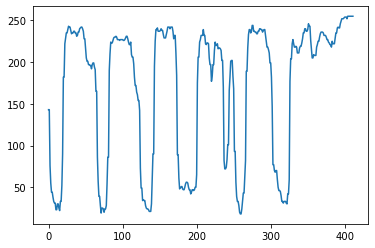



Point at jump: [(28, 4.518218623481782)]


Point at jump: [(28, 4.518218623481782), (28, 15.060728744939274)]


Point at jump: [(28, 4.518218623481782), (28, 15.060728744939274), (28, 50.45344129554649)]


Point at jump: [(28, 4.518218623481782), (28, 15.060728744939274), (28, 50.45344129554649), (28, 61.74898785425092)]


Point at jump: [(28, 4.518218623481782), (28, 15.060728744939274), (28, 50.45344129554649), (28, 61.74898785425092), (28, 93.37651821862333)]


Point at jump: [(28, 4.518218623481782), (28, 15.060728744939274), (28, 50.45344129554649), (28, 61.74898785425092), (28, 93.37651821862333), (28, 107.68421052631561)]


Point at jump: [(28, 4.518218623481782), (28, 15.060728744939274), (28, 50.45344129554649), (28, 61.74898785425092), (28, 93.37651821862333), (28, 107.68421052631561), (28, 131.0283400809715)]


Point at jump: [(28, 4.518218623481782), (28, 15.060728744939274), (28, 50.45344129554649), (28, 61.74898785425092), (28, 93.37651821862333), (28, 107.6842105263156

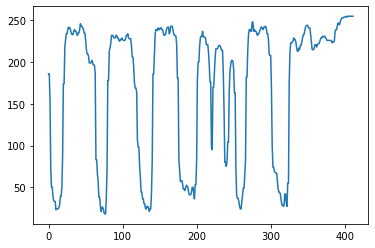



Point at jump: [(29, 2.2591093117408905)]


Point at jump: [(29, 2.2591093117408905), (29, 15.060728744939274)]


Point at jump: [(29, 2.2591093117408905), (29, 15.060728744939274), (29, 49.70040485829953)]


Point at jump: [(29, 2.2591093117408905), (29, 15.060728744939274), (29, 49.70040485829953), (29, 60.242914979756996)]


Point at jump: [(29, 2.2591093117408905), (29, 15.060728744939274), (29, 49.70040485829953), (29, 60.242914979756996), (29, 92.62348178137637)]


Point at jump: [(29, 2.2591093117408905), (29, 15.060728744939274), (29, 49.70040485829953), (29, 60.242914979756996), (29, 92.62348178137637), (29, 106.17813765182169)]


Point at jump: [(29, 2.2591093117408905), (29, 15.060728744939274), (29, 49.70040485829953), (29, 60.242914979756996), (29, 92.62348178137637), (29, 106.17813765182169), (29, 132.53441295546546)]


Point at jump: [(29, 2.2591093117408905), (29, 15.060728744939274), (29, 49.70040485829953), (29, 60.242914979756996), (29, 92.62348178137637), (29, 106

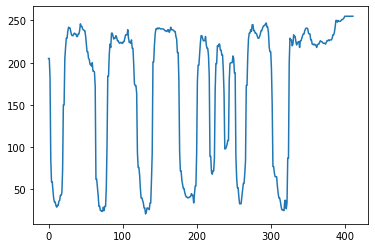



Point at jump: [(30, 2.2591093117408905)]


Point at jump: [(30, 2.2591093117408905), (30, 16.5668016194332)]


Point at jump: [(30, 2.2591093117408905), (30, 16.5668016194332), (30, 48.194331983805604)]


Point at jump: [(30, 2.2591093117408905), (30, 16.5668016194332), (30, 48.194331983805604), (30, 60.242914979756996)]


Point at jump: [(30, 2.2591093117408905), (30, 16.5668016194332), (30, 48.194331983805604), (30, 60.242914979756996), (30, 91.11740890688245)]


Point at jump: [(30, 2.2591093117408905), (30, 16.5668016194332), (30, 48.194331983805604), (30, 60.242914979756996), (30, 91.11740890688245), (30, 106.17813765182169)]


Point at jump: [(30, 2.2591093117408905), (30, 16.5668016194332), (30, 48.194331983805604), (30, 60.242914979756996), (30, 91.11740890688245), (30, 106.17813765182169), (30, 133.28744939271243)]


Point at jump: [(30, 2.2591093117408905), (30, 16.5668016194332), (30, 48.194331983805604), (30, 60.242914979756996), (30, 91.11740890688245), (30, 106.1781376

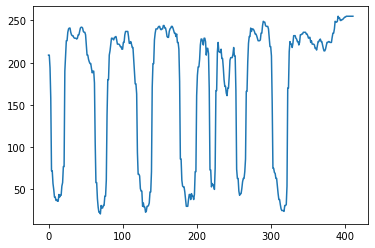



Point at jump: [(31, 3.0121457489878543)]


Point at jump: [(31, 3.0121457489878543), (31, 16.5668016194332)]


Point at jump: [(31, 3.0121457489878543), (31, 16.5668016194332), (31, 48.194331983805604)]


Point at jump: [(31, 3.0121457489878543), (31, 16.5668016194332), (31, 48.194331983805604), (31, 60.242914979756996)]


Point at jump: [(31, 3.0121457489878543), (31, 16.5668016194332), (31, 48.194331983805604), (31, 60.242914979756996), (31, 91.11740890688245)]


Point at jump: [(31, 3.0121457489878543), (31, 16.5668016194332), (31, 48.194331983805604), (31, 60.242914979756996), (31, 91.11740890688245), (31, 105.42510121457472)]


Point at jump: [(31, 3.0121457489878543), (31, 16.5668016194332), (31, 48.194331983805604), (31, 60.242914979756996), (31, 91.11740890688245), (31, 105.42510121457472), (31, 135.54655870445336)]


Point at jump: [(31, 3.0121457489878543), (31, 16.5668016194332), (31, 48.194331983805604), (31, 60.242914979756996), (31, 91.11740890688245), (31, 105.4251012

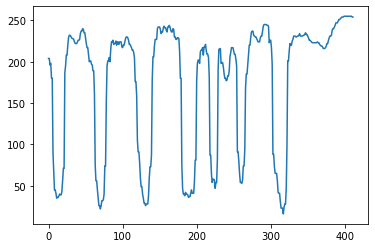



Point at jump: [(32, 4.518218623481782)]


Point at jump: [(32, 4.518218623481782), (32, 17.31983805668016)]


Point at jump: [(32, 4.518218623481782), (32, 17.31983805668016), (32, 47.44129554655864)]


Point at jump: [(32, 4.518218623481782), (32, 17.31983805668016), (32, 47.44129554655864), (32, 59.489878542510034)]


Point at jump: [(32, 4.518218623481782), (32, 17.31983805668016), (32, 47.44129554655864), (32, 59.489878542510034), (32, 91.11740890688245)]


Point at jump: [(32, 4.518218623481782), (32, 17.31983805668016), (32, 47.44129554655864), (32, 59.489878542510034), (32, 91.11740890688245), (32, 106.17813765182169)]


Point at jump: [(32, 4.518218623481782), (32, 17.31983805668016), (32, 47.44129554655864), (32, 59.489878542510034), (32, 91.11740890688245), (32, 106.17813765182169), (32, 135.54655870445336)]


Point at jump: [(32, 4.518218623481782), (32, 17.31983805668016), (32, 47.44129554655864), (32, 59.489878542510034), (32, 91.11740890688245), (32, 106.17813765182169

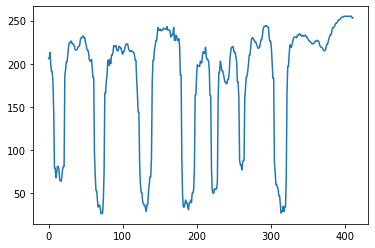



Point at jump: [(33, 6.024291497975709)]


Point at jump: [(33, 6.024291497975709), (33, 16.5668016194332)]


Point at jump: [(33, 6.024291497975709), (33, 16.5668016194332), (33, 47.44129554655864)]


Point at jump: [(33, 6.024291497975709), (33, 16.5668016194332), (33, 47.44129554655864), (33, 58.73684210526307)]


Point at jump: [(33, 6.024291497975709), (33, 16.5668016194332), (33, 47.44129554655864), (33, 58.73684210526307), (33, 93.37651821862333)]


Point at jump: [(33, 6.024291497975709), (33, 16.5668016194332), (33, 47.44129554655864), (33, 58.73684210526307), (33, 93.37651821862333), (33, 105.42510121457472)]


Point at jump: [(33, 6.024291497975709), (33, 16.5668016194332), (33, 47.44129554655864), (33, 58.73684210526307), (33, 93.37651821862333), (33, 105.42510121457472), (33, 136.29959514170034)]


Point at jump: [(33, 6.024291497975709), (33, 16.5668016194332), (33, 47.44129554655864), (33, 58.73684210526307), (33, 93.37651821862333), (33, 105.42510121457472), (33, 136.

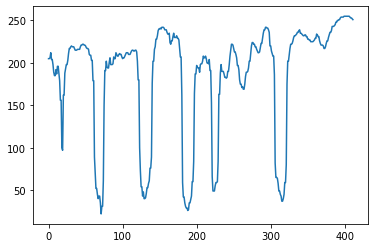



Point at jump: [(34, 13.554655870445346)]


Point at jump: [(34, 13.554655870445346), (34, 19.578947368421048)]


Point at jump: [(34, 13.554655870445346), (34, 19.578947368421048), (34, 46.68825910931168)]


Point at jump: [(34, 13.554655870445346), (34, 19.578947368421048), (34, 46.68825910931168), (34, 57.23076923076915)]


Point at jump: [(34, 13.554655870445346), (34, 19.578947368421048), (34, 46.68825910931168), (34, 57.23076923076915), (34, 93.37651821862333)]


Point at jump: [(34, 13.554655870445346), (34, 19.578947368421048), (34, 46.68825910931168), (34, 57.23076923076915), (34, 93.37651821862333), (34, 105.42510121457472)]


Point at jump: [(34, 13.554655870445346), (34, 19.578947368421048), (34, 46.68825910931168), (34, 57.23076923076915), (34, 93.37651821862333), (34, 105.42510121457472), (34, 136.29959514170034)]


Point at jump: [(34, 13.554655870445346), (34, 19.578947368421048), (34, 46.68825910931168), (34, 57.23076923076915), (34, 93.37651821862333), (34, 105.4251

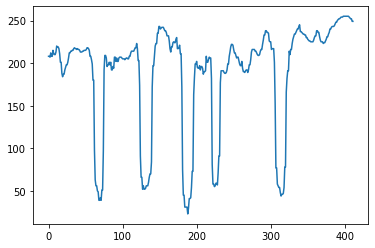



Point at jump: [(35, 46.68825910931168)]


Point at jump: [(35, 46.68825910931168), (35, 57.23076923076915)]


Point at jump: [(35, 46.68825910931168), (35, 57.23076923076915), (35, 93.37651821862333)]


Point at jump: [(35, 46.68825910931168), (35, 57.23076923076915), (35, 93.37651821862333), (35, 106.17813765182169)]


Point at jump: [(35, 46.68825910931168), (35, 57.23076923076915), (35, 93.37651821862333), (35, 106.17813765182169), (35, 136.29959514170034)]


Point at jump: [(35, 46.68825910931168), (35, 57.23076923076915), (35, 93.37651821862333), (35, 106.17813765182169), (35, 136.29959514170034), (35, 148.34817813765196)]


Point at jump: [(35, 46.68825910931168), (35, 57.23076923076915), (35, 93.37651821862333), (35, 106.17813765182169), (35, 136.29959514170034), (35, 148.34817813765196), (35, 166.42105263157939)]


Point at jump: [(35, 46.68825910931168), (35, 57.23076923076915), (35, 93.37651821862333), (35, 106.17813765182169), (35, 136.29959514170034), (35, 148.3481781376

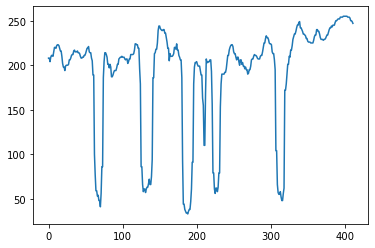



Point at jump: [(36, 46.68825910931168)]


Point at jump: [(36, 46.68825910931168), (36, 56.477732793522186)]


Point at jump: [(36, 46.68825910931168), (36, 56.477732793522186), (36, 94.1295546558703)]


Point at jump: [(36, 46.68825910931168), (36, 56.477732793522186), (36, 94.1295546558703), (36, 107.68421052631561)]


Point at jump: [(36, 46.68825910931168), (36, 56.477732793522186), (36, 94.1295546558703), (36, 107.68421052631561), (36, 136.29959514170034)]


Point at jump: [(36, 46.68825910931168), (36, 56.477732793522186), (36, 94.1295546558703), (36, 107.68421052631561), (36, 136.29959514170034), (36, 148.34817813765196)]


Point at jump: [(36, 46.68825910931168), (36, 56.477732793522186), (36, 94.1295546558703), (36, 107.68421052631561), (36, 136.29959514170034), (36, 148.34817813765196), (36, 167.17408906882636)]


Point at jump: [(36, 46.68825910931168), (36, 56.477732793522186), (36, 94.1295546558703), (36, 107.68421052631561), (36, 136.29959514170034), (36, 148.348178137

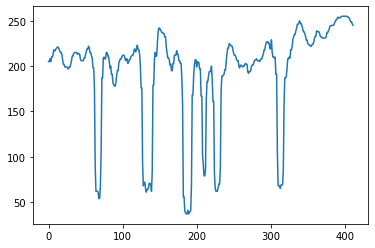



Point at jump: [(37, 47.44129554655864)]


Point at jump: [(37, 47.44129554655864), (37, 55.724696356275224)]


Point at jump: [(37, 47.44129554655864), (37, 55.724696356275224), (37, 95.63562753036422)]


Point at jump: [(37, 47.44129554655864), (37, 55.724696356275224), (37, 95.63562753036422), (37, 107.68421052631561)]


Point at jump: [(37, 47.44129554655864), (37, 55.724696356275224), (37, 95.63562753036422), (37, 107.68421052631561), (37, 137.0526315789473)]


Point at jump: [(37, 47.44129554655864), (37, 55.724696356275224), (37, 95.63562753036422), (37, 107.68421052631561), (37, 137.0526315789473), (37, 146.08906882591103)]


Point at jump: [(37, 47.44129554655864), (37, 55.724696356275224), (37, 95.63562753036422), (37, 107.68421052631561), (37, 137.0526315789473), (37, 146.08906882591103), (37, 169.4331983805673)]


Point at jump: [(37, 47.44129554655864), (37, 55.724696356275224), (37, 95.63562753036422), (37, 107.68421052631561), (37, 137.0526315789473), (37, 146.08906882

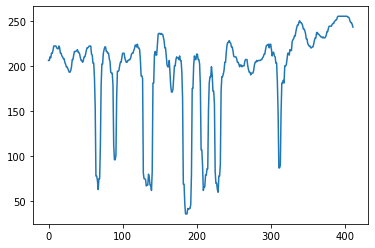



Point at jump: [(38, 48.194331983805604)]


Point at jump: [(38, 48.194331983805604), (38, 54.2186234817813)]


Point at jump: [(38, 48.194331983805604), (38, 54.2186234817813), (38, 67.02024291497966)]


Point at jump: [(38, 48.194331983805604), (38, 54.2186234817813), (38, 67.02024291497966), (38, 72.2914979757084)]


Point at jump: [(38, 48.194331983805604), (38, 54.2186234817813), (38, 67.02024291497966), (38, 72.2914979757084), (38, 96.38866396761118)]


Point at jump: [(38, 48.194331983805604), (38, 54.2186234817813), (38, 67.02024291497966), (38, 72.2914979757084), (38, 96.38866396761118), (38, 107.68421052631561)]


Point at jump: [(38, 48.194331983805604), (38, 54.2186234817813), (38, 67.02024291497966), (38, 72.2914979757084), (38, 96.38866396761118), (38, 107.68421052631561), (38, 137.0526315789473)]


Point at jump: [(38, 48.194331983805604), (38, 54.2186234817813), (38, 67.02024291497966), (38, 72.2914979757084), (38, 96.38866396761118), (38, 107.68421052631561), (38, 13

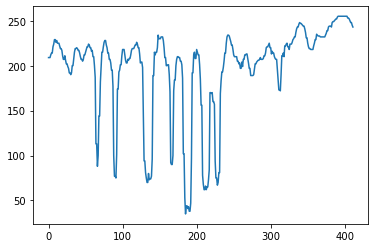



Point at jump: [(39, 49.70040485829953)]


Point at jump: [(39, 49.70040485829953), (39, 53.46558704453434)]


Point at jump: [(39, 49.70040485829953), (39, 53.46558704453434), (39, 67.02024291497966)]


Point at jump: [(39, 49.70040485829953), (39, 53.46558704453434), (39, 67.02024291497966), (39, 71.53846153846143)]


Point at jump: [(39, 49.70040485829953), (39, 53.46558704453434), (39, 67.02024291497966), (39, 71.53846153846143), (39, 98.64777327935207)]


Point at jump: [(39, 49.70040485829953), (39, 53.46558704453434), (39, 67.02024291497966), (39, 71.53846153846143), (39, 98.64777327935207), (39, 106.17813765182169)]


Point at jump: [(39, 49.70040485829953), (39, 53.46558704453434), (39, 67.02024291497966), (39, 71.53846153846143), (39, 98.64777327935207), (39, 106.17813765182169), (39, 138.55870445344127)]


Point at jump: [(39, 49.70040485829953), (39, 53.46558704453434), (39, 67.02024291497966), (39, 71.53846153846143), (39, 98.64777327935207), (39, 106.17813765182169), (3

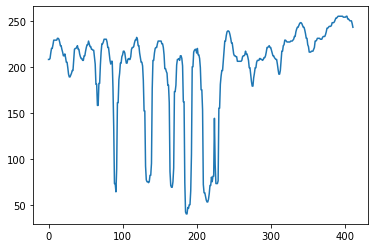



Point at jump: [(40, 67.02024291497966)]


Point at jump: [(40, 67.02024291497966), (40, 71.53846153846143)]


Point at jump: [(40, 67.02024291497966), (40, 71.53846153846143), (40, 99.40080971659903)]


Point at jump: [(40, 67.02024291497966), (40, 71.53846153846143), (40, 99.40080971659903), (40, 106.17813765182169)]


Point at jump: [(40, 67.02024291497966), (40, 71.53846153846143), (40, 99.40080971659903), (40, 106.17813765182169), (40, 123.49797570850181)]


Point at jump: [(40, 67.02024291497966), (40, 71.53846153846143), (40, 99.40080971659903), (40, 106.17813765182169), (40, 123.49797570850181), (40, 130.27530364372453)]


Point at jump: [(40, 67.02024291497966), (40, 71.53846153846143), (40, 99.40080971659903), (40, 106.17813765182169), (40, 123.49797570850181), (40, 130.27530364372453), (40, 138.55870445344127)]


Point at jump: [(40, 67.02024291497966), (40, 71.53846153846143), (40, 99.40080971659903), (40, 106.17813765182169), (40, 123.49797570850181), (40, 130.2753036437

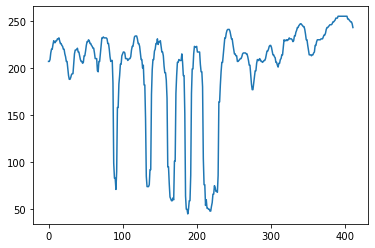



Point at jump: [(41, 66.2672064777327)]


Point at jump: [(41, 66.2672064777327), (41, 73.04453441295536)]


Point at jump: [(41, 66.2672064777327), (41, 73.04453441295536), (41, 99.40080971659903)]


Point at jump: [(41, 66.2672064777327), (41, 73.04453441295536), (41, 99.40080971659903), (41, 105.42510121457472)]


Point at jump: [(41, 66.2672064777327), (41, 73.04453441295536), (41, 99.40080971659903), (41, 105.42510121457472), (41, 121.23886639676093)]


Point at jump: [(41, 66.2672064777327), (41, 73.04453441295536), (41, 99.40080971659903), (41, 105.42510121457472), (41, 121.23886639676093), (41, 131.0283400809715)]


Point at jump: [(41, 66.2672064777327), (41, 73.04453441295536), (41, 99.40080971659903), (41, 105.42510121457472), (41, 121.23886639676093), (41, 131.0283400809715), (41, 139.31174089068824)]


Point at jump: [(41, 66.2672064777327), (41, 73.04453441295536), (41, 99.40080971659903), (41, 105.42510121457472), (41, 121.23886639676093), (41, 131.0283400809715), (41,

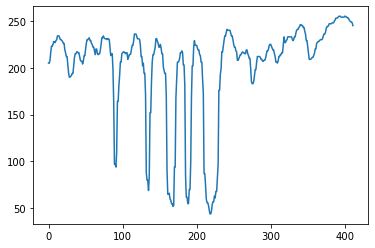



Point at jump: [(42, 67.02024291497966)]


Point at jump: [(42, 67.02024291497966), (42, 73.04453441295536)]


Point at jump: [(42, 67.02024291497966), (42, 73.04453441295536), (42, 99.40080971659903)]


Point at jump: [(42, 67.02024291497966), (42, 73.04453441295536), (42, 99.40080971659903), (42, 105.42510121457472)]


Point at jump: [(42, 67.02024291497966), (42, 73.04453441295536), (42, 99.40080971659903), (42, 105.42510121457472), (42, 120.48582995951396)]


Point at jump: [(42, 67.02024291497966), (42, 73.04453441295536), (42, 99.40080971659903), (42, 105.42510121457472), (42, 120.48582995951396), (42, 131.0283400809715)]


Point at jump: [(42, 67.02024291497966), (42, 73.04453441295536), (42, 99.40080971659903), (42, 105.42510121457472), (42, 120.48582995951396), (42, 131.0283400809715), (42, 139.31174089068824)]


Point at jump: [(42, 67.02024291497966), (42, 73.04453441295536), (42, 99.40080971659903), (42, 105.42510121457472), (42, 120.48582995951396), (42, 131.028340080971

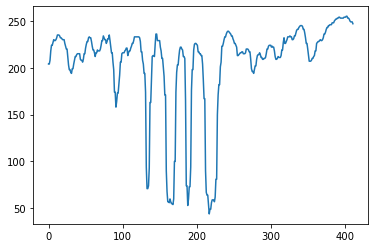



Point at jump: [(43, 99.40080971659903)]


Point at jump: [(43, 99.40080971659903), (43, 105.42510121457472)]


Point at jump: [(43, 99.40080971659903), (43, 105.42510121457472), (43, 119.732793522267)]


Point at jump: [(43, 99.40080971659903), (43, 105.42510121457472), (43, 119.732793522267), (43, 130.27530364372453)]


Point at jump: [(43, 99.40080971659903), (43, 105.42510121457472), (43, 119.732793522267), (43, 130.27530364372453), (43, 140.06477732793522)]


Point at jump: [(43, 99.40080971659903), (43, 105.42510121457472), (43, 119.732793522267), (43, 130.27530364372453), (43, 140.06477732793522), (43, 145.33603238866405)]


Point at jump: [(43, 99.40080971659903), (43, 105.42510121457472), (43, 119.732793522267), (43, 130.27530364372453), (43, 140.06477732793522), (43, 145.33603238866405), (43, 160.39676113360358)]


Point at jump: [(43, 99.40080971659903), (43, 105.42510121457472), (43, 119.732793522267), (43, 130.27530364372453), (43, 140.06477732793522), (43, 145.336032388

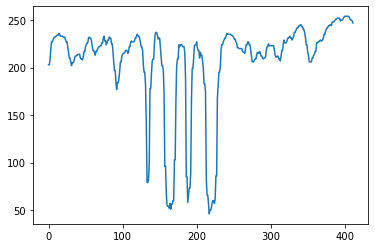



Point at jump: [(44, 100.15384615384599)]


Point at jump: [(44, 100.15384615384599), (44, 104.67206477732776)]


Point at jump: [(44, 100.15384615384599), (44, 104.67206477732776), (44, 119.732793522267)]


Point at jump: [(44, 100.15384615384599), (44, 104.67206477732776), (44, 119.732793522267), (44, 130.27530364372453)]


Point at jump: [(44, 100.15384615384599), (44, 104.67206477732776), (44, 119.732793522267), (44, 130.27530364372453), (44, 140.06477732793522)]


Point at jump: [(44, 100.15384615384599), (44, 104.67206477732776), (44, 119.732793522267), (44, 130.27530364372453), (44, 140.06477732793522), (44, 146.08906882591103)]


Point at jump: [(44, 100.15384615384599), (44, 104.67206477732776), (44, 119.732793522267), (44, 130.27530364372453), (44, 140.06477732793522), (44, 146.08906882591103), (44, 160.39676113360358)]


Point at jump: [(44, 100.15384615384599), (44, 104.67206477732776), (44, 119.732793522267), (44, 130.27530364372453), (44, 140.06477732793522), (44, 146.0

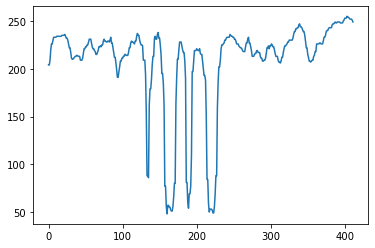



Point at jump: [(45, 100.15384615384599)]


Point at jump: [(45, 100.15384615384599), (45, 104.67206477732776)]


Point at jump: [(45, 100.15384615384599), (45, 104.67206477732776), (45, 118.22672064777308)]


Point at jump: [(45, 100.15384615384599), (45, 104.67206477732776), (45, 118.22672064777308), (45, 130.27530364372453)]


Point at jump: [(45, 100.15384615384599), (45, 104.67206477732776), (45, 118.22672064777308), (45, 130.27530364372453), (45, 140.06477732793522)]


Point at jump: [(45, 100.15384615384599), (45, 104.67206477732776), (45, 118.22672064777308), (45, 130.27530364372453), (45, 140.06477732793522), (45, 146.08906882591103)]


Point at jump: [(45, 100.15384615384599), (45, 104.67206477732776), (45, 118.22672064777308), (45, 130.27530364372453), (45, 140.06477732793522), (45, 146.08906882591103), (45, 161.14979757085055)]


Point at jump: [(45, 100.15384615384599), (45, 104.67206477732776), (45, 118.22672064777308), (45, 130.27530364372453), (45, 140.06477732793522)

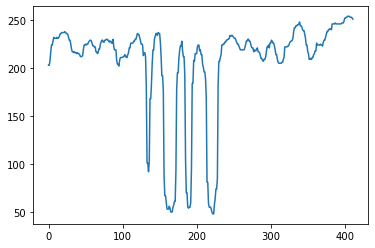



Point at jump: [(46, 100.15384615384599)]


Point at jump: [(46, 100.15384615384599), (46, 105.42510121457472)]


Point at jump: [(46, 100.15384615384599), (46, 105.42510121457472), (46, 117.47368421052612)]


Point at jump: [(46, 100.15384615384599), (46, 105.42510121457472), (46, 117.47368421052612), (46, 131.0283400809715)]


Point at jump: [(46, 100.15384615384599), (46, 105.42510121457472), (46, 117.47368421052612), (46, 131.0283400809715), (46, 140.06477732793522)]


Point at jump: [(46, 100.15384615384599), (46, 105.42510121457472), (46, 117.47368421052612), (46, 131.0283400809715), (46, 140.06477732793522), (46, 146.08906882591103)]


Point at jump: [(46, 100.15384615384599), (46, 105.42510121457472), (46, 117.47368421052612), (46, 131.0283400809715), (46, 140.06477732793522), (46, 146.08906882591103), (46, 161.14979757085055)]


Point at jump: [(46, 100.15384615384599), (46, 105.42510121457472), (46, 117.47368421052612), (46, 131.0283400809715), (46, 140.06477732793522), (46

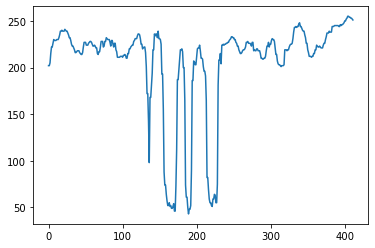



Point at jump: [(47, 102.41295546558688)]


Point at jump: [(47, 102.41295546558688), (47, 106.17813765182169)]


Point at jump: [(47, 102.41295546558688), (47, 106.17813765182169), (47, 117.47368421052612)]


Point at jump: [(47, 102.41295546558688), (47, 106.17813765182169), (47, 117.47368421052612), (47, 132.53441295546546)]


Point at jump: [(47, 102.41295546558688), (47, 106.17813765182169), (47, 117.47368421052612), (47, 132.53441295546546), (47, 139.31174089068824)]


Point at jump: [(47, 102.41295546558688), (47, 106.17813765182169), (47, 117.47368421052612), (47, 132.53441295546546), (47, 139.31174089068824), (47, 146.08906882591103)]


Point at jump: [(47, 102.41295546558688), (47, 106.17813765182169), (47, 117.47368421052612), (47, 132.53441295546546), (47, 139.31174089068824), (47, 146.08906882591103), (47, 161.14979757085055)]


Point at jump: [(47, 102.41295546558688), (47, 106.17813765182169), (47, 117.47368421052612), (47, 132.53441295546546), (47, 139.31174089068824)

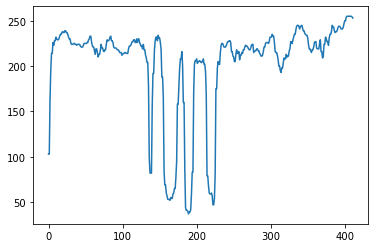



Point at jump: [(48, 3.0121457489878543)]


Point at jump: [(48, 3.0121457489878543), (48, 102.41295546558688)]


Point at jump: [(48, 3.0121457489878543), (48, 102.41295546558688), (48, 107.68421052631561)]


Point at jump: [(48, 3.0121457489878543), (48, 102.41295546558688), (48, 107.68421052631561), (48, 117.47368421052612)]


Point at jump: [(48, 3.0121457489878543), (48, 102.41295546558688), (48, 107.68421052631561), (48, 117.47368421052612), (48, 133.28744939271243)]


Point at jump: [(48, 3.0121457489878543), (48, 102.41295546558688), (48, 107.68421052631561), (48, 117.47368421052612), (48, 133.28744939271243), (48, 138.55870445344127)]


Point at jump: [(48, 3.0121457489878543), (48, 102.41295546558688), (48, 107.68421052631561), (48, 117.47368421052612), (48, 133.28744939271243), (48, 138.55870445344127), (48, 148.34817813765196)]


Point at jump: [(48, 3.0121457489878543), (48, 102.41295546558688), (48, 107.68421052631561), (48, 117.47368421052612), (48, 133.28744939271243)

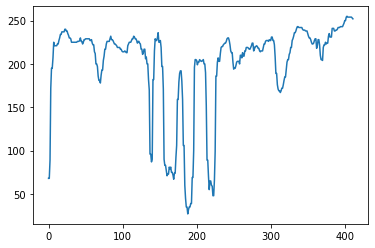



Point at jump: [(49, 2.2591093117408905)]


Point at jump: [(49, 2.2591093117408905), (49, 120.48582995951396)]


Point at jump: [(49, 2.2591093117408905), (49, 120.48582995951396), (49, 132.53441295546546)]


Point at jump: [(49, 2.2591093117408905), (49, 120.48582995951396), (49, 132.53441295546546), (49, 138.55870445344127)]


Point at jump: [(49, 2.2591093117408905), (49, 120.48582995951396), (49, 132.53441295546546), (49, 138.55870445344127), (49, 148.34817813765196)]


Point at jump: [(49, 2.2591093117408905), (49, 120.48582995951396), (49, 132.53441295546546), (49, 138.55870445344127), (49, 148.34817813765196), (49, 161.14979757085055)]


Point at jump: [(49, 2.2591093117408905), (49, 120.48582995951396), (49, 132.53441295546546), (49, 138.55870445344127), (49, 148.34817813765196), (49, 161.14979757085055), (49, 171.69230769230822)]
Standard deviation 55.084350901918725


Point at jump: [(49, 2.2591093117408905)]


Point at jump: [(49, 2.2591093117408905), (49, 120.48582995951

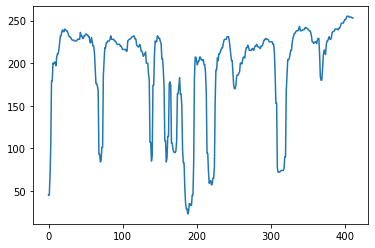



Point at jump: [(50, 3.0121457489878543)]


Point at jump: [(50, 3.0121457489878543), (50, 138.55870445344127)]


Point at jump: [(50, 3.0121457489878543), (50, 138.55870445344127), (50, 148.34817813765196)]


Point at jump: [(50, 3.0121457489878543), (50, 138.55870445344127), (50, 148.34817813765196), (50, 162.6558704453445)]


Point at jump: [(50, 3.0121457489878543), (50, 138.55870445344127), (50, 148.34817813765196), (50, 162.6558704453445), (50, 170.18623481781427)]


Point at jump: [(50, 3.0121457489878543), (50, 138.55870445344127), (50, 148.34817813765196), (50, 162.6558704453445), (50, 170.18623481781427), (50, 232.6882591093133)]


Point at jump: [(50, 3.0121457489878543), (50, 138.55870445344127), (50, 148.34817813765196), (50, 162.6558704453445), (50, 170.18623481781427), (50, 232.6882591093133), (50, 242.47773279352398)]
Standard deviation 64.92559844416786


Point at jump: [(50, 3.0121457489878543)]


Point at jump: [(50, 3.0121457489878543), (50, 138.55870445344127)]



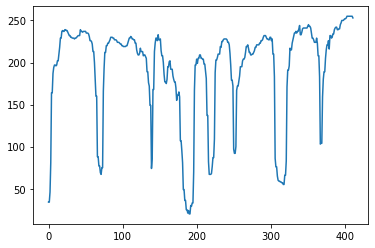



Point at jump: [(51, 3.0121457489878543)]


Point at jump: [(51, 3.0121457489878543), (51, 137.0526315789473)]


Point at jump: [(51, 3.0121457489878543), (51, 137.0526315789473), (51, 148.34817813765196)]


Point at jump: [(51, 3.0121457489878543), (51, 137.0526315789473), (51, 148.34817813765196), (51, 232.6882591093133)]


Point at jump: [(51, 3.0121457489878543), (51, 137.0526315789473), (51, 148.34817813765196), (51, 232.6882591093133), (51, 242.47773279352398)]
Standard deviation 77.30006468302598


Point at jump: [(51, 3.0121457489878543)]


Point at jump: [(51, 3.0121457489878543), (51, 137.0526315789473)]


Point at jump: [(51, 3.0121457489878543), (51, 137.0526315789473), (51, 148.34817813765196)]


Point at jump: [(51, 3.0121457489878543), (51, 137.0526315789473), (51, 148.34817813765196), (51, 232.6882591093133)]


Point at jump: [(51, 3.0121457489878543), (51, 137.0526315789473), (51, 148.34817813765196), (51, 232.6882591093133), (51, 242.47773279352398)]
[[15, 29, 36, 2

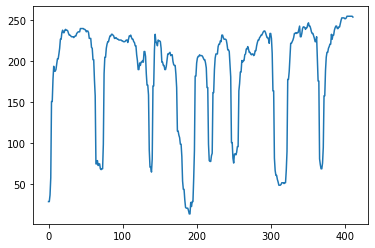



Point at jump: [(52, 3.0121457489878543)]


Point at jump: [(52, 3.0121457489878543), (52, 137.0526315789473)]


Point at jump: [(52, 3.0121457489878543), (52, 137.0526315789473), (52, 149.10121457489893)]


Point at jump: [(52, 3.0121457489878543), (52, 137.0526315789473), (52, 149.10121457489893), (52, 163.40890688259148)]


Point at jump: [(52, 3.0121457489878543), (52, 137.0526315789473), (52, 149.10121457489893), (52, 163.40890688259148), (52, 168.68016194332031)]


Point at jump: [(52, 3.0121457489878543), (52, 137.0526315789473), (52, 149.10121457489893), (52, 163.40890688259148), (52, 168.68016194332031), (52, 187.50607287449472)]


Point at jump: [(52, 3.0121457489878543), (52, 137.0526315789473), (52, 149.10121457489893), (52, 163.40890688259148), (52, 168.68016194332031), (52, 187.50607287449472), (52, 195.03643724696448)]


Point at jump: [(52, 3.0121457489878543), (52, 137.0526315789473), (52, 149.10121457489893), (52, 163.40890688259148), (52, 168.68016194332031), (52, 

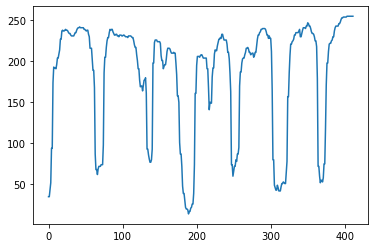



Point at jump: [(53, 4.518218623481782)]


Point at jump: [(53, 4.518218623481782), (53, 48.194331983805604)]


Point at jump: [(53, 4.518218623481782), (53, 48.194331983805604), (53, 56.477732793522186)]


Point at jump: [(53, 4.518218623481782), (53, 48.194331983805604), (53, 56.477732793522186), (53, 102.41295546558688)]


Point at jump: [(53, 4.518218623481782), (53, 48.194331983805604), (53, 56.477732793522186), (53, 102.41295546558688), (53, 106.17813765182169)]


Point at jump: [(53, 4.518218623481782), (53, 48.194331983805604), (53, 56.477732793522186), (53, 102.41295546558688), (53, 106.17813765182169), (53, 134.0404858299594)]


Point at jump: [(53, 4.518218623481782), (53, 48.194331983805604), (53, 56.477732793522186), (53, 102.41295546558688), (53, 106.17813765182169), (53, 134.0404858299594), (53, 150.60728744939289)]


Point at jump: [(53, 4.518218623481782), (53, 48.194331983805604), (53, 56.477732793522186), (53, 102.41295546558688), (53, 106.17813765182169), (53, 134

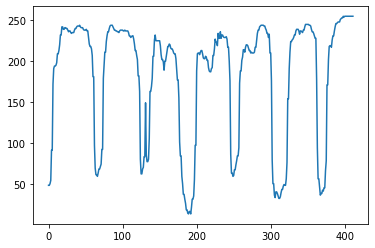



Point at jump: [(54, 4.518218623481782)]


Point at jump: [(54, 4.518218623481782), (54, 47.44129554655864)]


Point at jump: [(54, 4.518218623481782), (54, 47.44129554655864), (54, 55.724696356275224)]


Point at jump: [(54, 4.518218623481782), (54, 47.44129554655864), (54, 55.724696356275224), (54, 94.1295546558703)]


Point at jump: [(54, 4.518218623481782), (54, 47.44129554655864), (54, 55.724696356275224), (54, 94.1295546558703), (54, 103.16599190283384)]


Point at jump: [(54, 4.518218623481782), (54, 47.44129554655864), (54, 55.724696356275224), (54, 94.1295546558703), (54, 103.16599190283384), (54, 135.54655870445336)]


Point at jump: [(54, 4.518218623481782), (54, 47.44129554655864), (54, 55.724696356275224), (54, 94.1295546558703), (54, 103.16599190283384), (54, 135.54655870445336), (54, 150.60728744939289)]


Point at jump: [(54, 4.518218623481782), (54, 47.44129554655864), (54, 55.724696356275224), (54, 94.1295546558703), (54, 103.16599190283384), (54, 135.54655870445336

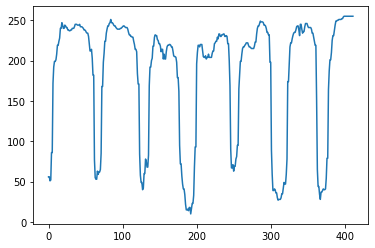



Point at jump: [(55, 4.518218623481782)]


Point at jump: [(55, 4.518218623481782), (55, 47.44129554655864)]


Point at jump: [(55, 4.518218623481782), (55, 47.44129554655864), (55, 54.2186234817813)]


Point at jump: [(55, 4.518218623481782), (55, 47.44129554655864), (55, 54.2186234817813), (55, 93.37651821862333)]


Point at jump: [(55, 4.518218623481782), (55, 47.44129554655864), (55, 54.2186234817813), (55, 93.37651821862333), (55, 102.41295546558688)]


Point at jump: [(55, 4.518218623481782), (55, 47.44129554655864), (55, 54.2186234817813), (55, 93.37651821862333), (55, 102.41295546558688), (55, 135.54655870445336)]


Point at jump: [(55, 4.518218623481782), (55, 47.44129554655864), (55, 54.2186234817813), (55, 93.37651821862333), (55, 102.41295546558688), (55, 135.54655870445336), (55, 150.60728744939289)]


Point at jump: [(55, 4.518218623481782), (55, 47.44129554655864), (55, 54.2186234817813), (55, 93.37651821862333), (55, 102.41295546558688), (55, 135.54655870445336), (55,

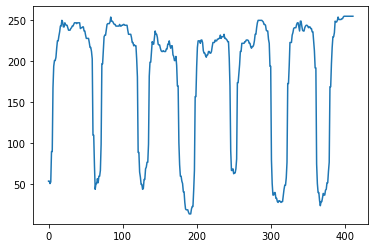



Point at jump: [(56, 4.518218623481782)]


Point at jump: [(56, 4.518218623481782), (56, 47.44129554655864)]


Point at jump: [(56, 4.518218623481782), (56, 47.44129554655864), (56, 54.2186234817813)]


Point at jump: [(56, 4.518218623481782), (56, 47.44129554655864), (56, 54.2186234817813), (56, 91.11740890688245)]


Point at jump: [(56, 4.518218623481782), (56, 47.44129554655864), (56, 54.2186234817813), (56, 91.11740890688245), (56, 103.16599190283384)]


Point at jump: [(56, 4.518218623481782), (56, 47.44129554655864), (56, 54.2186234817813), (56, 91.11740890688245), (56, 103.16599190283384), (56, 133.28744939271243)]


Point at jump: [(56, 4.518218623481782), (56, 47.44129554655864), (56, 54.2186234817813), (56, 91.11740890688245), (56, 103.16599190283384), (56, 133.28744939271243), (56, 150.60728744939289)]


Point at jump: [(56, 4.518218623481782), (56, 47.44129554655864), (56, 54.2186234817813), (56, 91.11740890688245), (56, 103.16599190283384), (56, 133.28744939271243), (56,

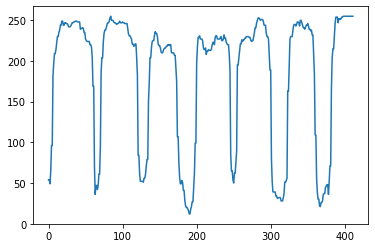



Point at jump: [(57, 4.518218623481782)]


Point at jump: [(57, 4.518218623481782), (57, 46.68825910931168)]


Point at jump: [(57, 4.518218623481782), (57, 46.68825910931168), (57, 53.46558704453434)]


Point at jump: [(57, 4.518218623481782), (57, 46.68825910931168), (57, 53.46558704453434), (57, 91.11740890688245)]


Point at jump: [(57, 4.518218623481782), (57, 46.68825910931168), (57, 53.46558704453434), (57, 91.11740890688245), (57, 103.16599190283384)]


Point at jump: [(57, 4.518218623481782), (57, 46.68825910931168), (57, 53.46558704453434), (57, 91.11740890688245), (57, 103.16599190283384), (57, 132.53441295546546)]


Point at jump: [(57, 4.518218623481782), (57, 46.68825910931168), (57, 53.46558704453434), (57, 91.11740890688245), (57, 103.16599190283384), (57, 132.53441295546546), (57, 150.60728744939289)]


Point at jump: [(57, 4.518218623481782), (57, 46.68825910931168), (57, 53.46558704453434), (57, 91.11740890688245), (57, 103.16599190283384), (57, 132.53441295546546)

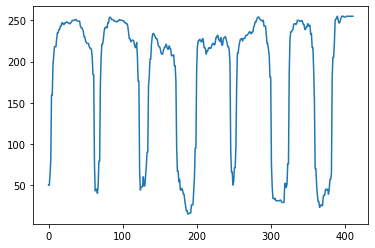



Point at jump: [(58, 3.0121457489878543)]


Point at jump: [(58, 3.0121457489878543), (58, 47.44129554655864)]


Point at jump: [(58, 3.0121457489878543), (58, 47.44129554655864), (58, 52.712550607287376)]


Point at jump: [(58, 3.0121457489878543), (58, 47.44129554655864), (58, 52.712550607287376), (58, 92.62348178137637)]


Point at jump: [(58, 3.0121457489878543), (58, 47.44129554655864), (58, 52.712550607287376), (58, 92.62348178137637), (58, 101.65991902833991)]


Point at jump: [(58, 3.0121457489878543), (58, 47.44129554655864), (58, 52.712550607287376), (58, 92.62348178137637), (58, 101.65991902833991), (58, 131.0283400809715)]


Point at jump: [(58, 3.0121457489878543), (58, 47.44129554655864), (58, 52.712550607287376), (58, 92.62348178137637), (58, 101.65991902833991), (58, 131.0283400809715), (58, 150.60728744939289)]


Point at jump: [(58, 3.0121457489878543), (58, 47.44129554655864), (58, 52.712550607287376), (58, 92.62348178137637), (58, 101.65991902833991), (58, 131.028

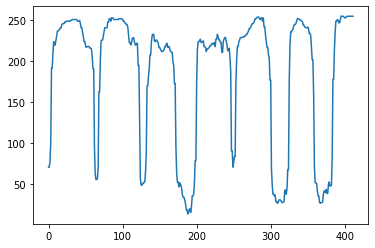



Point at jump: [(59, 3.0121457489878543)]


Point at jump: [(59, 3.0121457489878543), (59, 47.44129554655864)]


Point at jump: [(59, 3.0121457489878543), (59, 47.44129554655864), (59, 52.712550607287376)]


Point at jump: [(59, 3.0121457489878543), (59, 47.44129554655864), (59, 52.712550607287376), (59, 93.37651821862333)]


Point at jump: [(59, 3.0121457489878543), (59, 47.44129554655864), (59, 52.712550607287376), (59, 93.37651821862333), (59, 100.15384615384599)]


Point at jump: [(59, 3.0121457489878543), (59, 47.44129554655864), (59, 52.712550607287376), (59, 93.37651821862333), (59, 100.15384615384599), (59, 130.27530364372453)]


Point at jump: [(59, 3.0121457489878543), (59, 47.44129554655864), (59, 52.712550607287376), (59, 93.37651821862333), (59, 100.15384615384599), (59, 130.27530364372453), (59, 150.60728744939289)]


Point at jump: [(59, 3.0121457489878543), (59, 47.44129554655864), (59, 52.712550607287376), (59, 93.37651821862333), (59, 100.15384615384599), (59, 130.2

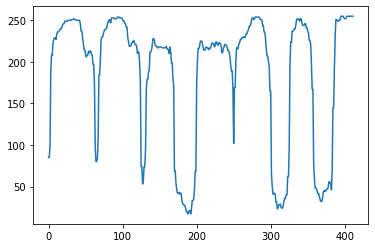



Point at jump: [(60, 2.2591093117408905)]


Point at jump: [(60, 2.2591093117408905), (60, 48.194331983805604)]


Point at jump: [(60, 2.2591093117408905), (60, 48.194331983805604), (60, 51.20647773279345)]


Point at jump: [(60, 2.2591093117408905), (60, 48.194331983805604), (60, 51.20647773279345), (60, 94.1295546558703)]


Point at jump: [(60, 2.2591093117408905), (60, 48.194331983805604), (60, 51.20647773279345), (60, 94.1295546558703), (60, 100.15384615384599)]


Point at jump: [(60, 2.2591093117408905), (60, 48.194331983805604), (60, 51.20647773279345), (60, 94.1295546558703), (60, 100.15384615384599), (60, 128.0161943319836)]


Point at jump: [(60, 2.2591093117408905), (60, 48.194331983805604), (60, 51.20647773279345), (60, 94.1295546558703), (60, 100.15384615384599), (60, 128.0161943319836), (60, 150.60728744939289)]


Point at jump: [(60, 2.2591093117408905), (60, 48.194331983805604), (60, 51.20647773279345), (60, 94.1295546558703), (60, 100.15384615384599), (60, 128.0161943

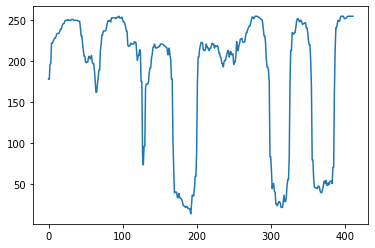



Point at jump: [(61, 96.38866396761118)]


Point at jump: [(61, 96.38866396761118), (61, 101.65991902833991)]


Point at jump: [(61, 96.38866396761118), (61, 101.65991902833991), (61, 127.26315789473662)]


Point at jump: [(61, 96.38866396761118), (61, 101.65991902833991), (61, 127.26315789473662), (61, 151.36032388663986)]


Point at jump: [(61, 96.38866396761118), (61, 101.65991902833991), (61, 127.26315789473662), (61, 151.36032388663986), (61, 226.66396761133748)]


Point at jump: [(61, 96.38866396761118), (61, 101.65991902833991), (61, 127.26315789473662), (61, 151.36032388663986), (61, 226.66396761133748), (61, 245.4898785425119)]


Point at jump: [(61, 96.38866396761118), (61, 101.65991902833991), (61, 127.26315789473662), (61, 151.36032388663986), (61, 226.66396761133748), (61, 245.4898785425119), (61, 269.5870445344151)]


Point at jump: [(61, 96.38866396761118), (61, 101.65991902833991), (61, 127.26315789473662), (61, 151.36032388663986), (61, 226.66396761133748), (61, 245.

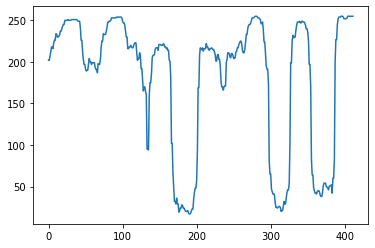



Point at jump: [(62, 100.15384615384599)]


Point at jump: [(62, 100.15384615384599), (62, 105.42510121457472)]


Point at jump: [(62, 100.15384615384599), (62, 105.42510121457472), (62, 125.00404858299574)]


Point at jump: [(62, 100.15384615384599), (62, 105.42510121457472), (62, 125.00404858299574), (62, 153.6194331983808)]


Point at jump: [(62, 100.15384615384599), (62, 105.42510121457472), (62, 125.00404858299574), (62, 153.6194331983808), (62, 224.40485829959655)]


Point at jump: [(62, 100.15384615384599), (62, 105.42510121457472), (62, 125.00404858299574), (62, 153.6194331983808), (62, 224.40485829959655), (62, 246.24291497975887)]


Point at jump: [(62, 100.15384615384599), (62, 105.42510121457472), (62, 125.00404858299574), (62, 153.6194331983808), (62, 224.40485829959655), (62, 246.24291497975887), (62, 267.32793522267417)]


Point at jump: [(62, 100.15384615384599), (62, 105.42510121457472), (62, 125.00404858299574), (62, 153.6194331983808), (62, 224.40485829959655), (62

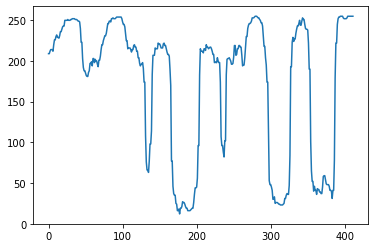



Point at jump: [(63, 98.64777327935207)]


Point at jump: [(63, 98.64777327935207), (63, 108.43724696356257)]


Point at jump: [(63, 98.64777327935207), (63, 108.43724696356257), (63, 125.00404858299574)]


Point at jump: [(63, 98.64777327935207), (63, 108.43724696356257), (63, 125.00404858299574), (63, 153.6194331983808)]


Point at jump: [(63, 98.64777327935207), (63, 108.43724696356257), (63, 125.00404858299574), (63, 153.6194331983808), (63, 178.469635627531)]


Point at jump: [(63, 98.64777327935207), (63, 108.43724696356257), (63, 125.00404858299574), (63, 153.6194331983808), (63, 178.469635627531), (63, 180.72874493927193)]


Point at jump: [(63, 98.64777327935207), (63, 108.43724696356257), (63, 125.00404858299574), (63, 153.6194331983808), (63, 178.469635627531), (63, 180.72874493927193), (63, 224.40485829959655)]


Point at jump: [(63, 98.64777327935207), (63, 108.43724696356257), (63, 125.00404858299574), (63, 153.6194331983808), (63, 178.469635627531), (63, 180.7287449392

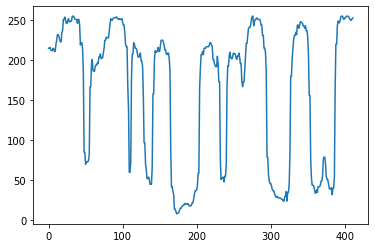



Point at jump: [(64, 36.14574898785421)]


Point at jump: [(64, 36.14574898785421), (64, 43.67611336032383)]


Point at jump: [(64, 36.14574898785421), (64, 43.67611336032383), (64, 82.0809716599189)]


Point at jump: [(64, 36.14574898785421), (64, 43.67611336032383), (64, 82.0809716599189), (64, 84.34008097165979)]


Point at jump: [(64, 36.14574898785421), (64, 43.67611336032383), (64, 82.0809716599189), (64, 84.34008097165979), (64, 98.64777327935207)]


Point at jump: [(64, 36.14574898785421), (64, 43.67611336032383), (64, 82.0809716599189), (64, 84.34008097165979), (64, 98.64777327935207), (64, 107.68421052631561)]


Point at jump: [(64, 36.14574898785421), (64, 43.67611336032383), (64, 82.0809716599189), (64, 84.34008097165979), (64, 98.64777327935207), (64, 107.68421052631561), (64, 124.25101214574877)]


Point at jump: [(64, 36.14574898785421), (64, 43.67611336032383), (64, 82.0809716599189), (64, 84.34008097165979), (64, 98.64777327935207), (64, 107.68421052631561), (64, 124

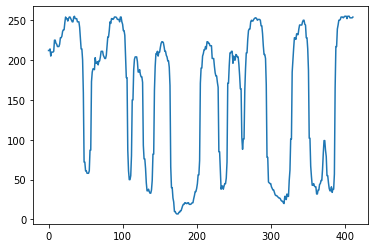



Point at jump: [(65, 36.14574898785421)]


Point at jump: [(65, 36.14574898785421), (65, 43.67611336032383)]


Point at jump: [(65, 36.14574898785421), (65, 43.67611336032383), (65, 81.32793522267194)]


Point at jump: [(65, 36.14574898785421), (65, 43.67611336032383), (65, 81.32793522267194), (65, 86.59919028340067)]


Point at jump: [(65, 36.14574898785421), (65, 43.67611336032383), (65, 81.32793522267194), (65, 86.59919028340067), (65, 97.14170040485814)]


Point at jump: [(65, 36.14574898785421), (65, 43.67611336032383), (65, 81.32793522267194), (65, 86.59919028340067), (65, 97.14170040485814), (65, 108.43724696356257)]


Point at jump: [(65, 36.14574898785421), (65, 43.67611336032383), (65, 81.32793522267194), (65, 86.59919028340067), (65, 97.14170040485814), (65, 108.43724696356257), (65, 124.25101214574877)]


Point at jump: [(65, 36.14574898785421), (65, 43.67611336032383), (65, 81.32793522267194), (65, 86.59919028340067), (65, 97.14170040485814), (65, 108.43724696356257), (6

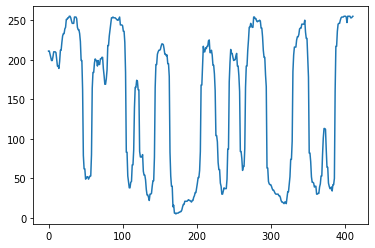



Point at jump: [(66, 35.39271255060725)]


Point at jump: [(66, 35.39271255060725), (66, 45.182186234817756)]


Point at jump: [(66, 35.39271255060725), (66, 45.182186234817756), (66, 79.06882591093105)]


Point at jump: [(66, 35.39271255060725), (66, 45.182186234817756), (66, 79.06882591093105), (66, 109.19028340080953)]


Point at jump: [(66, 35.39271255060725), (66, 45.182186234817756), (66, 79.06882591093105), (66, 109.19028340080953), (66, 123.49797570850181)]


Point at jump: [(66, 35.39271255060725), (66, 45.182186234817756), (66, 79.06882591093105), (66, 109.19028340080953), (66, 123.49797570850181), (66, 156.6315789473687)]


Point at jump: [(66, 35.39271255060725), (66, 45.182186234817756), (66, 79.06882591093105), (66, 109.19028340080953), (66, 123.49797570850181), (66, 156.6315789473687), (66, 172.4453441295552)]


Point at jump: [(66, 35.39271255060725), (66, 45.182186234817756), (66, 79.06882591093105), (66, 109.19028340080953), (66, 123.49797570850181), (66, 156.631578

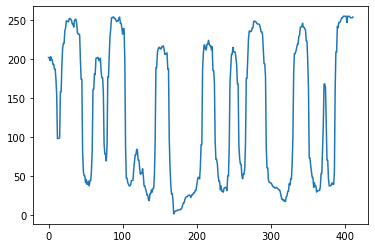



Point at jump: [(67, 9.036437246963564)]


Point at jump: [(67, 9.036437246963564), (67, 14.30769230769231)]


Point at jump: [(67, 9.036437246963564), (67, 14.30769230769231), (67, 34.63967611336029)]


Point at jump: [(67, 9.036437246963564), (67, 14.30769230769231), (67, 34.63967611336029), (67, 48.194331983805604)]


Point at jump: [(67, 9.036437246963564), (67, 14.30769230769231), (67, 34.63967611336029), (67, 48.194331983805604), (67, 56.477732793522186)]


Point at jump: [(67, 9.036437246963564), (67, 14.30769230769231), (67, 34.63967611336029), (67, 48.194331983805604), (67, 56.477732793522186), (67, 61.74898785425092)]


Point at jump: [(67, 9.036437246963564), (67, 14.30769230769231), (67, 34.63967611336029), (67, 48.194331983805604), (67, 56.477732793522186), (67, 61.74898785425092), (67, 78.31578947368409)]


Point at jump: [(67, 9.036437246963564), (67, 14.30769230769231), (67, 34.63967611336029), (67, 48.194331983805604), (67, 56.477732793522186), (67, 61.74898785425092

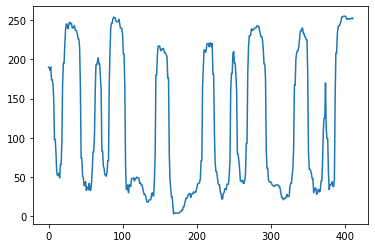



Point at jump: [(68, 7.530364372469637)]


Point at jump: [(68, 7.530364372469637), (68, 15.060728744939274)]


Point at jump: [(68, 7.530364372469637), (68, 15.060728744939274), (68, 33.133603238866364)]


Point at jump: [(68, 7.530364372469637), (68, 15.060728744939274), (68, 33.133603238866364), (68, 48.194331983805604)]


Point at jump: [(68, 7.530364372469637), (68, 15.060728744939274), (68, 33.133603238866364), (68, 48.194331983805604), (68, 54.2186234817813)]


Point at jump: [(68, 7.530364372469637), (68, 15.060728744939274), (68, 33.133603238866364), (68, 48.194331983805604), (68, 54.2186234817813), (68, 62.50202429149788)]


Point at jump: [(68, 7.530364372469637), (68, 15.060728744939274), (68, 33.133603238866364), (68, 48.194331983805604), (68, 54.2186234817813), (68, 62.50202429149788), (68, 78.31578947368409)]


Point at jump: [(68, 7.530364372469637), (68, 15.060728744939274), (68, 33.133603238866364), (68, 48.194331983805604), (68, 54.2186234817813), (68, 62.502024291

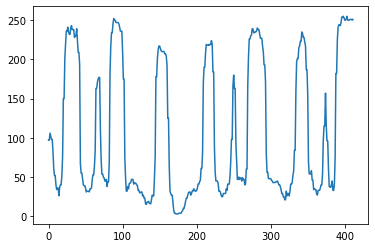



Point at jump: [(69, 16.5668016194332)]


Point at jump: [(69, 16.5668016194332), (69, 32.3805668016194)]


Point at jump: [(69, 16.5668016194332), (69, 32.3805668016194), (69, 49.70040485829953)]


Point at jump: [(69, 16.5668016194332), (69, 32.3805668016194), (69, 49.70040485829953), (69, 54.2186234817813)]


Point at jump: [(69, 16.5668016194332), (69, 32.3805668016194), (69, 49.70040485829953), (69, 54.2186234817813), (69, 62.50202429149788)]


Point at jump: [(69, 16.5668016194332), (69, 32.3805668016194), (69, 49.70040485829953), (69, 54.2186234817813), (69, 62.50202429149788), (69, 77.56275303643713)]


Point at jump: [(69, 16.5668016194332), (69, 32.3805668016194), (69, 49.70040485829953), (69, 54.2186234817813), (69, 62.50202429149788), (69, 77.56275303643713), (69, 109.19028340080953)]


Point at jump: [(69, 16.5668016194332), (69, 32.3805668016194), (69, 49.70040485829953), (69, 54.2186234817813), (69, 62.50202429149788), (69, 77.56275303643713), (69, 109.19028340080953),

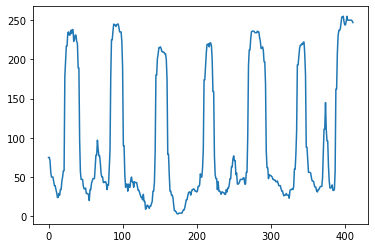



Point at jump: [(70, 16.5668016194332)]


Point at jump: [(70, 16.5668016194332), (70, 32.3805668016194)]


Point at jump: [(70, 16.5668016194332), (70, 32.3805668016194), (70, 63.255060728744844)]


Point at jump: [(70, 16.5668016194332), (70, 32.3805668016194), (70, 63.255060728744844), (70, 77.56275303643713)]


Point at jump: [(70, 16.5668016194332), (70, 32.3805668016194), (70, 63.255060728744844), (70, 77.56275303643713), (70, 109.19028340080953)]


Point at jump: [(70, 16.5668016194332), (70, 32.3805668016194), (70, 63.255060728744844), (70, 77.56275303643713), (70, 109.19028340080953), (70, 121.23886639676093)]


Point at jump: [(70, 16.5668016194332), (70, 32.3805668016194), (70, 63.255060728744844), (70, 77.56275303643713), (70, 109.19028340080953), (70, 121.23886639676093), (70, 159.6437246963566)]


Point at jump: [(70, 16.5668016194332), (70, 32.3805668016194), (70, 63.255060728744844), (70, 77.56275303643713), (70, 109.19028340080953), (70, 121.23886639676093), (70, 159

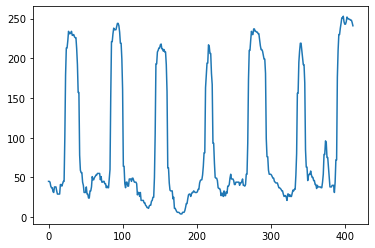



Point at jump: [(71, 17.31983805668016)]


Point at jump: [(71, 17.31983805668016), (71, 31.62753036437244)]


Point at jump: [(71, 17.31983805668016), (71, 31.62753036437244), (71, 64.00809716599181)]


Point at jump: [(71, 17.31983805668016), (71, 31.62753036437244), (71, 64.00809716599181), (71, 76.0566801619432)]


Point at jump: [(71, 17.31983805668016), (71, 31.62753036437244), (71, 64.00809716599181), (71, 76.0566801619432), (71, 109.19028340080953)]


Point at jump: [(71, 17.31983805668016), (71, 31.62753036437244), (71, 64.00809716599181), (71, 76.0566801619432), (71, 109.19028340080953), (71, 121.23886639676093)]


Point at jump: [(71, 17.31983805668016), (71, 31.62753036437244), (71, 64.00809716599181), (71, 76.0566801619432), (71, 109.19028340080953), (71, 121.23886639676093), (71, 159.6437246963566)]


Point at jump: [(71, 17.31983805668016), (71, 31.62753036437244), (71, 64.00809716599181), (71, 76.0566801619432), (71, 109.19028340080953), (71, 121.23886639676093), (71,

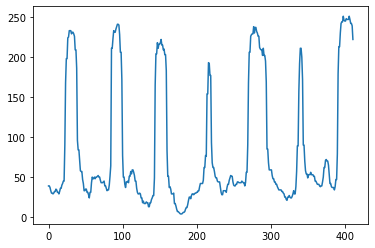



Point at jump: [(72, 17.31983805668016)]


Point at jump: [(72, 17.31983805668016), (72, 32.3805668016194)]


Point at jump: [(72, 17.31983805668016), (72, 32.3805668016194), (72, 64.00809716599181)]


Point at jump: [(72, 17.31983805668016), (72, 32.3805668016194), (72, 64.00809716599181), (72, 75.30364372469624)]


Point at jump: [(72, 17.31983805668016), (72, 32.3805668016194), (72, 64.00809716599181), (72, 75.30364372469624), (72, 109.19028340080953)]


Point at jump: [(72, 17.31983805668016), (72, 32.3805668016194), (72, 64.00809716599181), (72, 75.30364372469624), (72, 109.19028340080953), (72, 120.48582995951396)]


Point at jump: [(72, 17.31983805668016), (72, 32.3805668016194), (72, 64.00809716599181), (72, 75.30364372469624), (72, 109.19028340080953), (72, 120.48582995951396), (72, 162.6558704453445)]


Point at jump: [(72, 17.31983805668016), (72, 32.3805668016194), (72, 64.00809716599181), (72, 75.30364372469624), (72, 109.19028340080953), (72, 120.48582995951396), (72, 1

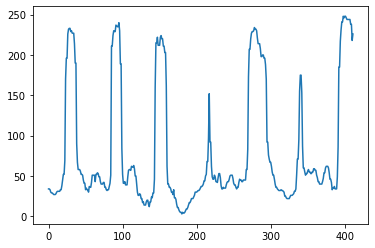



Point at jump: [(73, 17.31983805668016)]


Point at jump: [(73, 17.31983805668016), (73, 29.368421052631554)]


Point at jump: [(73, 17.31983805668016), (73, 29.368421052631554), (73, 64.00809716599181)]


Point at jump: [(73, 17.31983805668016), (73, 29.368421052631554), (73, 64.00809716599181), (73, 74.55060728744928)]


Point at jump: [(73, 17.31983805668016), (73, 29.368421052631554), (73, 64.00809716599181), (73, 74.55060728744928), (73, 109.19028340080953)]


Point at jump: [(73, 17.31983805668016), (73, 29.368421052631554), (73, 64.00809716599181), (73, 74.55060728744928), (73, 109.19028340080953), (73, 120.48582995951396)]


Point at jump: [(73, 17.31983805668016), (73, 29.368421052631554), (73, 64.00809716599181), (73, 74.55060728744928), (73, 109.19028340080953), (73, 120.48582995951396), (73, 203.31983805668122)]


Point at jump: [(73, 17.31983805668016), (73, 29.368421052631554), (73, 64.00809716599181), (73, 74.55060728744928), (73, 109.19028340080953), (73, 120.48582995

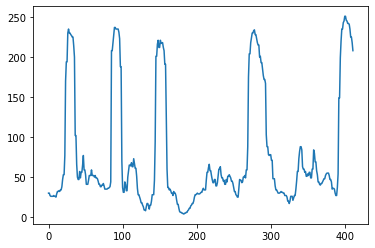



Point at jump: [(74, 17.31983805668016)]


Point at jump: [(74, 17.31983805668016), (74, 28.615384615384592)]


Point at jump: [(74, 17.31983805668016), (74, 28.615384615384592), (74, 64.00809716599181)]


Point at jump: [(74, 17.31983805668016), (74, 28.615384615384592), (74, 64.00809716599181), (74, 74.55060728744928)]


Point at jump: [(74, 17.31983805668016), (74, 28.615384615384592), (74, 64.00809716599181), (74, 74.55060728744928), (74, 109.19028340080953)]


Point at jump: [(74, 17.31983805668016), (74, 28.615384615384592), (74, 64.00809716599181), (74, 74.55060728744928), (74, 109.19028340080953), (74, 120.48582995951396)]


Point at jump: [(74, 17.31983805668016), (74, 28.615384615384592), (74, 64.00809716599181), (74, 74.55060728744928), (74, 109.19028340080953), (74, 120.48582995951396), (74, 203.31983805668122)]


Point at jump: [(74, 17.31983805668016), (74, 28.615384615384592), (74, 64.00809716599181), (74, 74.55060728744928), (74, 109.19028340080953), (74, 120.48582995

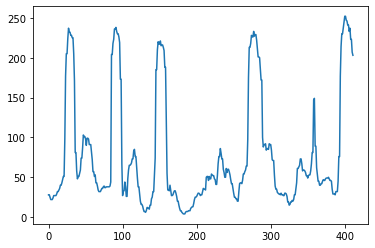



Point at jump: [(75, 17.31983805668016)]


Point at jump: [(75, 17.31983805668016), (75, 28.615384615384592)]


Point at jump: [(75, 17.31983805668016), (75, 28.615384615384592), (75, 64.00809716599181)]


Point at jump: [(75, 17.31983805668016), (75, 28.615384615384592), (75, 64.00809716599181), (75, 74.55060728744928)]


Point at jump: [(75, 17.31983805668016), (75, 28.615384615384592), (75, 64.00809716599181), (75, 74.55060728744928), (75, 109.19028340080953)]


Point at jump: [(75, 17.31983805668016), (75, 28.615384615384592), (75, 64.00809716599181), (75, 74.55060728744928), (75, 109.19028340080953), (75, 120.48582995951396)]


Point at jump: [(75, 17.31983805668016), (75, 28.615384615384592), (75, 64.00809716599181), (75, 74.55060728744928), (75, 109.19028340080953), (75, 120.48582995951396), (75, 203.31983805668122)]


Point at jump: [(75, 17.31983805668016), (75, 28.615384615384592), (75, 64.00809716599181), (75, 74.55060728744928), (75, 109.19028340080953), (75, 120.48582995

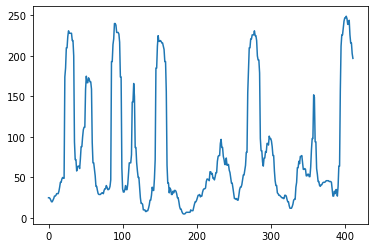



Point at jump: [(76, 16.5668016194332)]


Point at jump: [(76, 16.5668016194332), (76, 27.109311740890668)]


Point at jump: [(76, 16.5668016194332), (76, 27.109311740890668), (76, 38.4048582995951)]


Point at jump: [(76, 16.5668016194332), (76, 27.109311740890668), (76, 38.4048582995951), (76, 45.182186234817756)]


Point at jump: [(76, 16.5668016194332), (76, 27.109311740890668), (76, 38.4048582995951), (76, 45.182186234817756), (76, 64.00809716599181)]


Point at jump: [(76, 16.5668016194332), (76, 27.109311740890668), (76, 38.4048582995951), (76, 45.182186234817756), (76, 64.00809716599181), (76, 74.55060728744928)]


Point at jump: [(76, 16.5668016194332), (76, 27.109311740890668), (76, 38.4048582995951), (76, 45.182186234817756), (76, 64.00809716599181), (76, 74.55060728744928), (76, 86.59919028340067)]


Point at jump: [(76, 16.5668016194332), (76, 27.109311740890668), (76, 38.4048582995951), (76, 45.182186234817756), (76, 64.00809716599181), (76, 74.55060728744928), (76, 86.

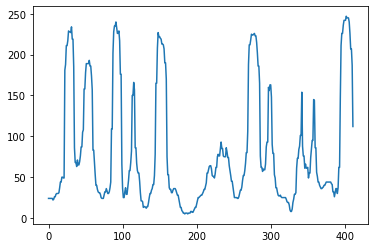



Point at jump: [(77, 16.5668016194332)]


Point at jump: [(77, 16.5668016194332), (77, 27.109311740890668)]


Point at jump: [(77, 16.5668016194332), (77, 27.109311740890668), (77, 37.651821862348136)]


Point at jump: [(77, 16.5668016194332), (77, 27.109311740890668), (77, 37.651821862348136), (77, 46.68825910931168)]


Point at jump: [(77, 16.5668016194332), (77, 27.109311740890668), (77, 37.651821862348136), (77, 46.68825910931168), (77, 65.51417004048574)]


Point at jump: [(77, 16.5668016194332), (77, 27.109311740890668), (77, 37.651821862348136), (77, 46.68825910931168), (77, 65.51417004048574), (77, 74.55060728744928)]


Point at jump: [(77, 16.5668016194332), (77, 27.109311740890668), (77, 37.651821862348136), (77, 46.68825910931168), (77, 65.51417004048574), (77, 74.55060728744928), (77, 110.69635627530346)]


Point at jump: [(77, 16.5668016194332), (77, 27.109311740890668), (77, 37.651821862348136), (77, 46.68825910931168), (77, 65.51417004048574), (77, 74.55060728744928), 

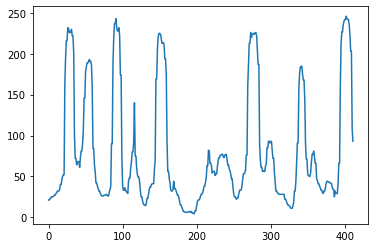



Point at jump: [(78, 16.5668016194332)]


Point at jump: [(78, 16.5668016194332), (78, 31.62753036437244)]


Point at jump: [(78, 16.5668016194332), (78, 31.62753036437244), (78, 37.651821862348136)]


Point at jump: [(78, 16.5668016194332), (78, 31.62753036437244), (78, 37.651821862348136), (78, 46.68825910931168)]


Point at jump: [(78, 16.5668016194332), (78, 31.62753036437244), (78, 37.651821862348136), (78, 46.68825910931168), (78, 65.51417004048574)]


Point at jump: [(78, 16.5668016194332), (78, 31.62753036437244), (78, 37.651821862348136), (78, 46.68825910931168), (78, 65.51417004048574), (78, 74.55060728744928)]


Point at jump: [(78, 16.5668016194332), (78, 31.62753036437244), (78, 37.651821862348136), (78, 46.68825910931168), (78, 65.51417004048574), (78, 74.55060728744928), (78, 110.69635627530346)]


Point at jump: [(78, 16.5668016194332), (78, 31.62753036437244), (78, 37.651821862348136), (78, 46.68825910931168), (78, 65.51417004048574), (78, 74.55060728744928), (78, 11

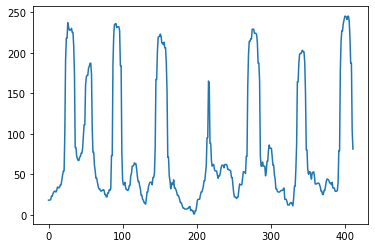



Point at jump: [(79, 17.31983805668016)]


Point at jump: [(79, 17.31983805668016), (79, 27.109311740890668)]


Point at jump: [(79, 17.31983805668016), (79, 27.109311740890668), (79, 42.17004048582991)]


Point at jump: [(79, 17.31983805668016), (79, 27.109311740890668), (79, 42.17004048582991), (79, 45.182186234817756)]


Point at jump: [(79, 17.31983805668016), (79, 27.109311740890668), (79, 42.17004048582991), (79, 45.182186234817756), (79, 65.51417004048574)]


Point at jump: [(79, 17.31983805668016), (79, 27.109311740890668), (79, 42.17004048582991), (79, 45.182186234817756), (79, 65.51417004048574), (79, 74.55060728744928)]


Point at jump: [(79, 17.31983805668016), (79, 27.109311740890668), (79, 42.17004048582991), (79, 45.182186234817756), (79, 65.51417004048574), (79, 74.55060728744928), (79, 110.69635627530346)]


Point at jump: [(79, 17.31983805668016), (79, 27.109311740890668), (79, 42.17004048582991), (79, 45.182186234817756), (79, 65.51417004048574), (79, 74.5506072874

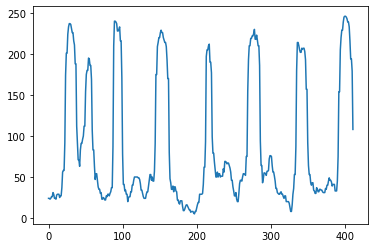



Point at jump: [(80, 17.31983805668016)]


Point at jump: [(80, 17.31983805668016), (80, 30.121457489878516)]


Point at jump: [(80, 17.31983805668016), (80, 30.121457489878516), (80, 38.4048582995951)]


Point at jump: [(80, 17.31983805668016), (80, 30.121457489878516), (80, 38.4048582995951), (80, 46.68825910931168)]


Point at jump: [(80, 17.31983805668016), (80, 30.121457489878516), (80, 38.4048582995951), (80, 46.68825910931168), (80, 66.2672064777327)]


Point at jump: [(80, 17.31983805668016), (80, 30.121457489878516), (80, 38.4048582995951), (80, 46.68825910931168), (80, 66.2672064777327), (80, 75.30364372469624)]


Point at jump: [(80, 17.31983805668016), (80, 30.121457489878516), (80, 38.4048582995951), (80, 46.68825910931168), (80, 66.2672064777327), (80, 75.30364372469624), (80, 110.69635627530346)]


Point at jump: [(80, 17.31983805668016), (80, 30.121457489878516), (80, 38.4048582995951), (80, 46.68825910931168), (80, 66.2672064777327), (80, 75.30364372469624), (80, 110

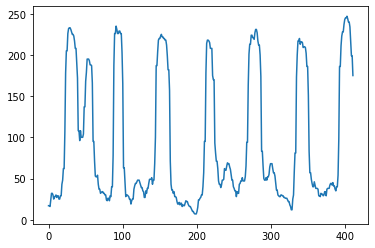



Point at jump: [(81, 17.31983805668016)]


Point at jump: [(81, 17.31983805668016), (81, 46.68825910931168)]


Point at jump: [(81, 17.31983805668016), (81, 46.68825910931168), (81, 66.2672064777327)]


Point at jump: [(81, 17.31983805668016), (81, 46.68825910931168), (81, 66.2672064777327), (81, 76.0566801619432)]


Point at jump: [(81, 17.31983805668016), (81, 46.68825910931168), (81, 66.2672064777327), (81, 76.0566801619432), (81, 109.19028340080953)]


Point at jump: [(81, 17.31983805668016), (81, 46.68825910931168), (81, 66.2672064777327), (81, 76.0566801619432), (81, 109.19028340080953), (81, 123.49797570850181)]


Point at jump: [(81, 17.31983805668016), (81, 46.68825910931168), (81, 66.2672064777327), (81, 76.0566801619432), (81, 109.19028340080953), (81, 123.49797570850181), (81, 159.6437246963566)]


Point at jump: [(81, 17.31983805668016), (81, 46.68825910931168), (81, 66.2672064777327), (81, 76.0566801619432), (81, 109.19028340080953), (81, 123.49797570850181), (81, 159.6

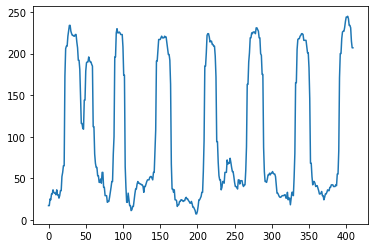



Point at jump: [(82, 16.5668016194332)]


Point at jump: [(82, 16.5668016194332), (82, 47.44129554655864)]


Point at jump: [(82, 16.5668016194332), (82, 47.44129554655864), (82, 67.02024291497966)]


Point at jump: [(82, 16.5668016194332), (82, 47.44129554655864), (82, 67.02024291497966), (82, 77.56275303643713)]


Point at jump: [(82, 16.5668016194332), (82, 47.44129554655864), (82, 67.02024291497966), (82, 77.56275303643713), (82, 109.19028340080953)]


Point at jump: [(82, 16.5668016194332), (82, 47.44129554655864), (82, 67.02024291497966), (82, 77.56275303643713), (82, 109.19028340080953), (82, 124.25101214574877)]


Point at jump: [(82, 16.5668016194332), (82, 47.44129554655864), (82, 67.02024291497966), (82, 77.56275303643713), (82, 109.19028340080953), (82, 124.25101214574877), (82, 158.13765182186265)]


Point at jump: [(82, 16.5668016194332), (82, 47.44129554655864), (82, 67.02024291497966), (82, 77.56275303643713), (82, 109.19028340080953), (82, 124.25101214574877), (82, 1

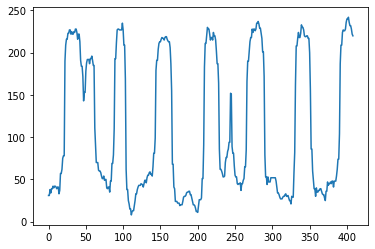



Point at jump: [(83, 16.5668016194332)]


Point at jump: [(83, 16.5668016194332), (83, 47.44129554655864)]


Point at jump: [(83, 16.5668016194332), (83, 47.44129554655864), (83, 67.02024291497966)]


Point at jump: [(83, 16.5668016194332), (83, 47.44129554655864), (83, 67.02024291497966), (83, 78.31578947368409)]


Point at jump: [(83, 16.5668016194332), (83, 47.44129554655864), (83, 67.02024291497966), (83, 78.31578947368409), (83, 108.43724696356257)]


Point at jump: [(83, 16.5668016194332), (83, 47.44129554655864), (83, 67.02024291497966), (83, 78.31578947368409), (83, 108.43724696356257), (83, 125.00404858299574)]


Point at jump: [(83, 16.5668016194332), (83, 47.44129554655864), (83, 67.02024291497966), (83, 78.31578947368409), (83, 108.43724696356257), (83, 125.00404858299574), (83, 157.38461538461567)]


Point at jump: [(83, 16.5668016194332), (83, 47.44129554655864), (83, 67.02024291497966), (83, 78.31578947368409), (83, 108.43724696356257), (83, 125.00404858299574), (83, 1

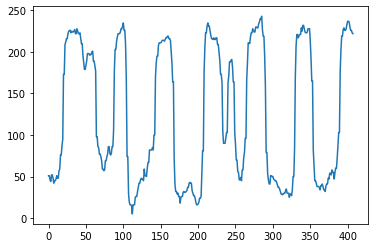



Point at jump: [(84, 15.060728744939274)]


Point at jump: [(84, 15.060728744939274), (84, 53.46558704453434)]


Point at jump: [(84, 15.060728744939274), (84, 53.46558704453434), (84, 66.2672064777327)]


Point at jump: [(84, 15.060728744939274), (84, 53.46558704453434), (84, 66.2672064777327), (84, 79.06882591093105)]


Point at jump: [(84, 15.060728744939274), (84, 53.46558704453434), (84, 66.2672064777327), (84, 79.06882591093105), (84, 108.43724696356257)]


Point at jump: [(84, 15.060728744939274), (84, 53.46558704453434), (84, 66.2672064777327), (84, 79.06882591093105), (84, 108.43724696356257), (84, 126.51012145748966)]


Point at jump: [(84, 15.060728744939274), (84, 53.46558704453434), (84, 66.2672064777327), (84, 79.06882591093105), (84, 108.43724696356257), (84, 126.51012145748966), (84, 156.6315789473687)]


Point at jump: [(84, 15.060728744939274), (84, 53.46558704453434), (84, 66.2672064777327), (84, 79.06882591093105), (84, 108.43724696356257), (84, 126.51012145748966

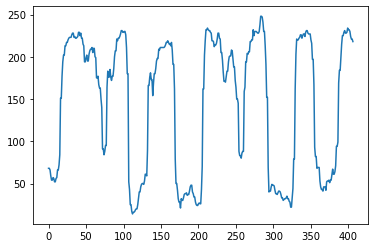



Point at jump: [(85, 13.554655870445346)]


Point at jump: [(85, 13.554655870445346), (85, 80.57489878542498)]


Point at jump: [(85, 13.554655870445346), (85, 80.57489878542498), (85, 100.15384615384599)]


Point at jump: [(85, 13.554655870445346), (85, 80.57489878542498), (85, 100.15384615384599), (85, 128.0161943319836)]


Point at jump: [(85, 13.554655870445346), (85, 80.57489878542498), (85, 100.15384615384599), (85, 128.0161943319836), (85, 155.12550607287474)]


Point at jump: [(85, 13.554655870445346), (85, 80.57489878542498), (85, 100.15384615384599), (85, 128.0161943319836), (85, 155.12550607287474), (85, 221.39271255060865)]


Point at jump: [(85, 13.554655870445346), (85, 80.57489878542498), (85, 100.15384615384599), (85, 128.0161943319836), (85, 155.12550607287474), (85, 221.39271255060865), (85, 247.74898785425282)]


Point at jump: [(85, 13.554655870445346), (85, 80.57489878542498), (85, 100.15384615384599), (85, 128.0161943319836), (85, 155.12550607287474), (85, 221.3

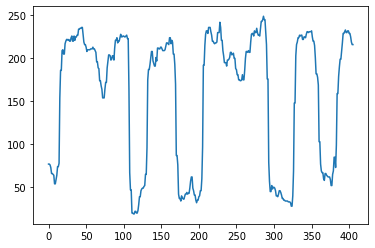



Point at jump: [(86, 12.048582995951419)]


Point at jump: [(86, 12.048582995951419), (86, 81.32793522267194)]


Point at jump: [(86, 12.048582995951419), (86, 81.32793522267194), (86, 99.40080971659903)]


Point at jump: [(86, 12.048582995951419), (86, 81.32793522267194), (86, 99.40080971659903), (86, 130.27530364372453)]


Point at jump: [(86, 12.048582995951419), (86, 81.32793522267194), (86, 99.40080971659903), (86, 130.27530364372453), (86, 155.12550607287474)]


Point at jump: [(86, 12.048582995951419), (86, 81.32793522267194), (86, 99.40080971659903), (86, 130.27530364372453), (86, 155.12550607287474), (86, 220.63967611336167)]


Point at jump: [(86, 12.048582995951419), (86, 81.32793522267194), (86, 99.40080971659903), (86, 130.27530364372453), (86, 155.12550607287474), (86, 220.63967611336167), (86, 247.74898785425282)]


Point at jump: [(86, 12.048582995951419), (86, 81.32793522267194), (86, 99.40080971659903), (86, 130.27530364372453), (86, 155.12550607287474), (86, 220.63

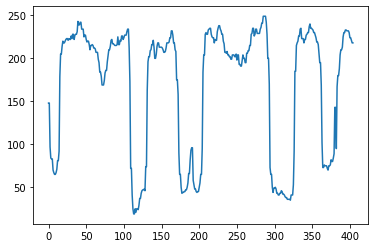



Point at jump: [(87, 83.58704453441283)]


Point at jump: [(87, 83.58704453441283), (87, 98.64777327935207)]


Point at jump: [(87, 83.58704453441283), (87, 98.64777327935207), (87, 132.53441295546546)]


Point at jump: [(87, 83.58704453441283), (87, 98.64777327935207), (87, 132.53441295546546), (87, 154.37246963562777)]


Point at jump: [(87, 83.58704453441283), (87, 98.64777327935207), (87, 132.53441295546546), (87, 154.37246963562777), (87, 221.39271255060865)]


Point at jump: [(87, 83.58704453441283), (87, 98.64777327935207), (87, 132.53441295546546), (87, 154.37246963562777), (87, 221.39271255060865), (87, 246.24291497975887)]


Point at jump: [(87, 83.58704453441283), (87, 98.64777327935207), (87, 132.53441295546546), (87, 154.37246963562777), (87, 221.39271255060865), (87, 246.24291497975887), (87, 274.10526315789696)]


Point at jump: [(87, 83.58704453441283), (87, 98.64777327935207), (87, 132.53441295546546), (87, 154.37246963562777), (87, 221.39271255060865), (87, 246.2429

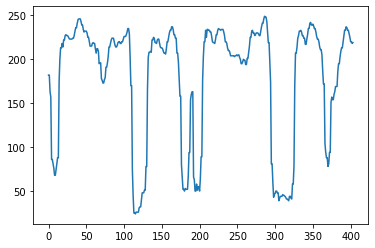



Point at jump: [(88, 4.518218623481782)]


Point at jump: [(88, 4.518218623481782), (88, 11.295546558704455)]


Point at jump: [(88, 4.518218623481782), (88, 11.295546558704455), (88, 83.58704453441283)]


Point at jump: [(88, 4.518218623481782), (88, 11.295546558704455), (88, 83.58704453441283), (88, 99.40080971659903)]


Point at jump: [(88, 4.518218623481782), (88, 11.295546558704455), (88, 83.58704453441283), (88, 99.40080971659903), (88, 132.53441295546546)]


Point at jump: [(88, 4.518218623481782), (88, 11.295546558704455), (88, 83.58704453441283), (88, 99.40080971659903), (88, 132.53441295546546), (88, 154.37246963562777)]


Point at jump: [(88, 4.518218623481782), (88, 11.295546558704455), (88, 83.58704453441283), (88, 99.40080971659903), (88, 132.53441295546546), (88, 154.37246963562777), (88, 222.14574898785563)]


Point at jump: [(88, 4.518218623481782), (88, 11.295546558704455), (88, 83.58704453441283), (88, 99.40080971659903), (88, 132.53441295546546), (88, 154.37246963

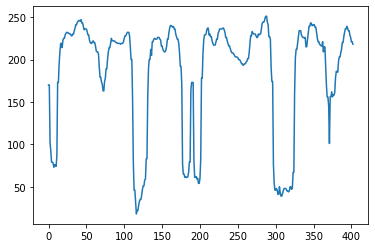



Point at jump: [(89, 85.09311740890675)]


Point at jump: [(89, 85.09311740890675), (89, 98.64777327935207)]


Point at jump: [(89, 85.09311740890675), (89, 98.64777327935207), (89, 149.10121457489893)]


Point at jump: [(89, 85.09311740890675), (89, 98.64777327935207), (89, 149.10121457489893), (89, 152.11336032388684)]


Point at jump: [(89, 85.09311740890675), (89, 98.64777327935207), (89, 149.10121457489893), (89, 152.11336032388684), (89, 223.65182186234958)]


Point at jump: [(89, 85.09311740890675), (89, 98.64777327935207), (89, 149.10121457489893), (89, 152.11336032388684), (89, 223.65182186234958), (89, 245.4898785425119)]


Point at jump: [(89, 85.09311740890675), (89, 98.64777327935207), (89, 149.10121457489893), (89, 152.11336032388684), (89, 223.65182186234958), (89, 245.4898785425119), (89, 279.3765182186258)]


Point at jump: [(89, 85.09311740890675), (89, 98.64777327935207), (89, 149.10121457489893), (89, 152.11336032388684), (89, 223.65182186234958), (89, 245.4898785

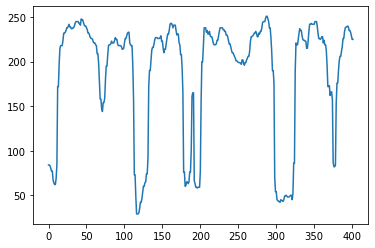



Point at jump: [(90, 10.542510121457491)]


Point at jump: [(90, 10.542510121457491), (90, 85.09311740890675)]


Point at jump: [(90, 10.542510121457491), (90, 85.09311740890675), (90, 100.15384615384599)]


Point at jump: [(90, 10.542510121457491), (90, 85.09311740890675), (90, 100.15384615384599), (90, 134.0404858299594)]


Point at jump: [(90, 10.542510121457491), (90, 85.09311740890675), (90, 100.15384615384599), (90, 134.0404858299594), (90, 152.11336032388684)]


Point at jump: [(90, 10.542510121457491), (90, 85.09311740890675), (90, 100.15384615384599), (90, 134.0404858299594), (90, 152.11336032388684), (90, 224.40485829959655)]


Point at jump: [(90, 10.542510121457491), (90, 85.09311740890675), (90, 100.15384615384599), (90, 134.0404858299594), (90, 152.11336032388684), (90, 224.40485829959655), (90, 244.7368421052649)]


Point at jump: [(90, 10.542510121457491), (90, 85.09311740890675), (90, 100.15384615384599), (90, 134.0404858299594), (90, 152.11336032388684), (90, 224.40

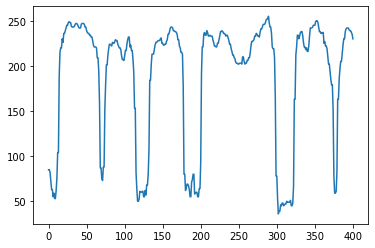



Point at jump: [(91, 10.542510121457491)]


Point at jump: [(91, 10.542510121457491), (91, 51.20647773279345)]


Point at jump: [(91, 10.542510121457491), (91, 51.20647773279345), (91, 57.23076923076915)]


Point at jump: [(91, 10.542510121457491), (91, 51.20647773279345), (91, 57.23076923076915), (91, 86.59919028340067)]


Point at jump: [(91, 10.542510121457491), (91, 51.20647773279345), (91, 57.23076923076915), (91, 86.59919028340067), (91, 100.15384615384599)]


Point at jump: [(91, 10.542510121457491), (91, 51.20647773279345), (91, 57.23076923076915), (91, 86.59919028340067), (91, 100.15384615384599), (91, 134.0404858299594)]


Point at jump: [(91, 10.542510121457491), (91, 51.20647773279345), (91, 57.23076923076915), (91, 86.59919028340067), (91, 100.15384615384599), (91, 134.0404858299594), (91, 151.36032388663986)]


Point at jump: [(91, 10.542510121457491), (91, 51.20647773279345), (91, 57.23076923076915), (91, 86.59919028340067), (91, 100.15384615384599), (91, 134.040485829

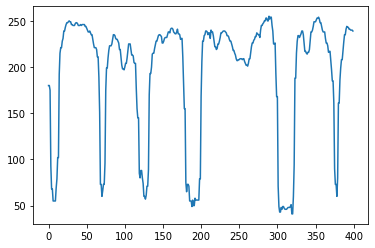



Point at jump: [(92, 3.0121457489878543)]


Point at jump: [(92, 3.0121457489878543), (92, 10.542510121457491)]


Point at jump: [(92, 3.0121457489878543), (92, 10.542510121457491), (92, 51.20647773279345)]


Point at jump: [(92, 3.0121457489878543), (92, 10.542510121457491), (92, 51.20647773279345), (92, 56.477732793522186)]


Point at jump: [(92, 3.0121457489878543), (92, 10.542510121457491), (92, 51.20647773279345), (92, 56.477732793522186), (92, 93.37651821862333)]


Point at jump: [(92, 3.0121457489878543), (92, 10.542510121457491), (92, 51.20647773279345), (92, 56.477732793522186), (92, 93.37651821862333), (92, 100.15384615384599)]


Point at jump: [(92, 3.0121457489878543), (92, 10.542510121457491), (92, 51.20647773279345), (92, 56.477732793522186), (92, 93.37651821862333), (92, 100.15384615384599), (92, 135.54655870445336)]


Point at jump: [(92, 3.0121457489878543), (92, 10.542510121457491), (92, 51.20647773279345), (92, 56.477732793522186), (92, 93.37651821862333), (92, 100

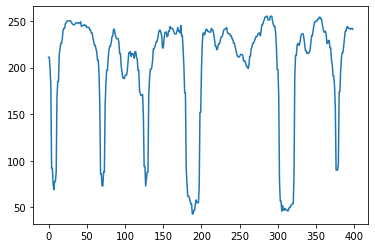



Point at jump: [(93, 3.0121457489878543)]


Point at jump: [(93, 3.0121457489878543), (93, 10.542510121457491)]


Point at jump: [(93, 3.0121457489878543), (93, 10.542510121457491), (93, 51.20647773279345)]


Point at jump: [(93, 3.0121457489878543), (93, 10.542510121457491), (93, 51.20647773279345), (93, 57.23076923076915)]


Point at jump: [(93, 3.0121457489878543), (93, 10.542510121457491), (93, 51.20647773279345), (93, 57.23076923076915), (93, 94.1295546558703)]


Point at jump: [(93, 3.0121457489878543), (93, 10.542510121457491), (93, 51.20647773279345), (93, 57.23076923076915), (93, 94.1295546558703), (93, 100.15384615384599)]


Point at jump: [(93, 3.0121457489878543), (93, 10.542510121457491), (93, 51.20647773279345), (93, 57.23076923076915), (93, 94.1295546558703), (93, 100.15384615384599), (93, 135.54655870445336)]


Point at jump: [(93, 3.0121457489878543), (93, 10.542510121457491), (93, 51.20647773279345), (93, 57.23076923076915), (93, 94.1295546558703), (93, 100.15384615

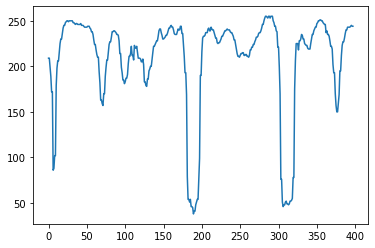



Point at jump: [(94, 4.518218623481782)]


Point at jump: [(94, 4.518218623481782), (94, 8.2834008097166)]


Point at jump: [(94, 4.518218623481782), (94, 8.2834008097166), (94, 136.29959514170034)]


Point at jump: [(94, 4.518218623481782), (94, 8.2834008097166), (94, 136.29959514170034), (94, 149.10121457489893)]


Point at jump: [(94, 4.518218623481782), (94, 8.2834008097166), (94, 136.29959514170034), (94, 149.10121457489893), (94, 228.17004048583144)]


Point at jump: [(94, 4.518218623481782), (94, 8.2834008097166), (94, 136.29959514170034), (94, 149.10121457489893), (94, 228.17004048583144), (94, 242.47773279352398)]
Standard deviation 68.34520222127276


Point at jump: [(94, 4.518218623481782)]


Point at jump: [(94, 4.518218623481782), (94, 8.2834008097166)]


Point at jump: [(94, 4.518218623481782), (94, 8.2834008097166), (94, 136.29959514170034)]


Point at jump: [(94, 4.518218623481782), (94, 8.2834008097166), (94, 136.29959514170034), (94, 149.10121457489893)]


Point at 

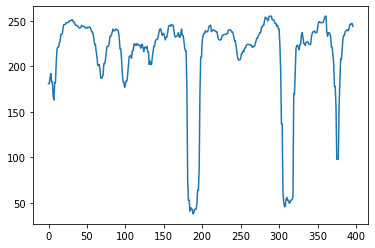



Point at jump: [(95, 136.29959514170034)]


Point at jump: [(95, 136.29959514170034), (95, 149.10121457489893)]


Point at jump: [(95, 136.29959514170034), (95, 149.10121457489893), (95, 229.6761133603254)]


Point at jump: [(95, 136.29959514170034), (95, 149.10121457489893), (95, 229.6761133603254), (95, 240.21862348178306)]
Standard deviation 80.11398130164298


Point at jump: [(95, 136.29959514170034)]


Point at jump: [(95, 136.29959514170034), (95, 149.10121457489893)]


Point at jump: [(95, 136.29959514170034), (95, 149.10121457489893), (95, 229.6761133603254)]


Point at jump: [(95, 136.29959514170034), (95, 149.10121457489893), (95, 229.6761133603254), (95, 240.21862348178306)]
[[15, 29, 36, 27, 34, 29, 32, 27, 32, 30, 34, 37, 22], [18, 25, 37, 27, 36, 26, 33, 27, 33, 28, 36, 36, 24]]


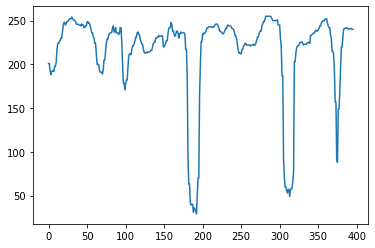



Point at jump: [(96, 136.29959514170034)]


Point at jump: [(96, 136.29959514170034), (96, 148.34817813765196)]


Point at jump: [(96, 136.29959514170034), (96, 148.34817813765196), (96, 229.6761133603254)]


Point at jump: [(96, 136.29959514170034), (96, 148.34817813765196), (96, 229.6761133603254), (96, 240.21862348178306)]


Point at jump: [(96, 136.29959514170034), (96, 148.34817813765196), (96, 229.6761133603254), (96, 240.21862348178306), (96, 281.6356275303667)]


Point at jump: [(96, 136.29959514170034), (96, 148.34817813765196), (96, 229.6761133603254), (96, 240.21862348178306), (96, 281.6356275303667), (96, 285.4008097166016)]
Standard deviation 69.26302524916643


Point at jump: [(96, 136.29959514170034)]


Point at jump: [(96, 136.29959514170034), (96, 148.34817813765196)]


Point at jump: [(96, 136.29959514170034), (96, 148.34817813765196), (96, 229.6761133603254)]


Point at jump: [(96, 136.29959514170034), (96, 148.34817813765196), (96, 229.6761133603254), (96, 240.218

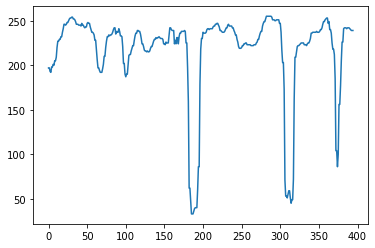



Point at jump: [(97, 137.0526315789473)]


Point at jump: [(97, 137.0526315789473), (97, 147.59514170040498)]


Point at jump: [(97, 137.0526315789473), (97, 147.59514170040498), (97, 230.42914979757236)]


Point at jump: [(97, 137.0526315789473), (97, 147.59514170040498), (97, 230.42914979757236), (97, 240.21862348178306)]


Point at jump: [(97, 137.0526315789473), (97, 147.59514170040498), (97, 230.42914979757236), (97, 240.21862348178306), (97, 280.12955465587277)]


Point at jump: [(97, 137.0526315789473), (97, 147.59514170040498), (97, 230.42914979757236), (97, 240.21862348178306), (97, 280.12955465587277), (97, 285.4008097166016)]
Standard deviation 70.00976122417978


Point at jump: [(97, 137.0526315789473)]


Point at jump: [(97, 137.0526315789473), (97, 147.59514170040498)]


Point at jump: [(97, 137.0526315789473), (97, 147.59514170040498), (97, 230.42914979757236)]


Point at jump: [(97, 137.0526315789473), (97, 147.59514170040498), (97, 230.42914979757236), (97, 240.21862

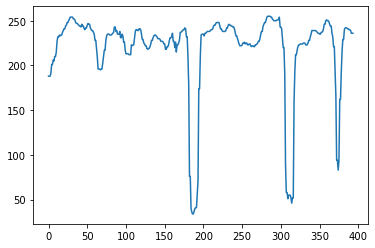



Point at jump: [(98, 137.0526315789473)]


Point at jump: [(98, 137.0526315789473), (98, 147.59514170040498)]


Point at jump: [(98, 137.0526315789473), (98, 147.59514170040498), (98, 230.42914979757236)]


Point at jump: [(98, 137.0526315789473), (98, 147.59514170040498), (98, 230.42914979757236), (98, 239.46558704453608)]


Point at jump: [(98, 137.0526315789473), (98, 147.59514170040498), (98, 230.42914979757236), (98, 239.46558704453608), (98, 281.6356275303667)]


Point at jump: [(98, 137.0526315789473), (98, 147.59514170040498), (98, 230.42914979757236), (98, 239.46558704453608), (98, 281.6356275303667), (98, 284.6477732793546)]
Standard deviation 70.57194910160835


Point at jump: [(98, 137.0526315789473)]


Point at jump: [(98, 137.0526315789473), (98, 147.59514170040498)]


Point at jump: [(98, 137.0526315789473), (98, 147.59514170040498), (98, 230.42914979757236)]


Point at jump: [(98, 137.0526315789473), (98, 147.59514170040498), (98, 230.42914979757236), (98, 239.4655870

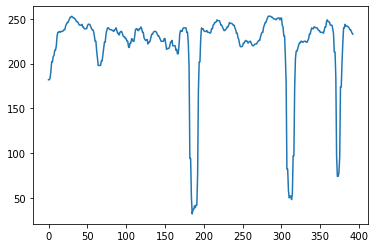



Point at jump: [(99, 138.55870445344127)]


Point at jump: [(99, 138.55870445344127), (99, 145.33603238866405)]


Point at jump: [(99, 138.55870445344127), (99, 145.33603238866405), (99, 232.6882591093133)]


Point at jump: [(99, 138.55870445344127), (99, 145.33603238866405), (99, 232.6882591093133), (99, 238.7125506072891)]
Standard deviation 86.28393052397803


Point at jump: [(99, 138.55870445344127)]


Point at jump: [(99, 138.55870445344127), (99, 145.33603238866405)]


Point at jump: [(99, 138.55870445344127), (99, 145.33603238866405), (99, 232.6882591093133)]


Point at jump: [(99, 138.55870445344127), (99, 145.33603238866405), (99, 232.6882591093133), (99, 238.7125506072891)]
[[15, 29, 36, 27, 34, 29, 32, 27, 32, 30, 34, 37, 22], [18, 25, 37, 27, 36, 26, 33, 27, 33, 28, 36, 36, 24]]


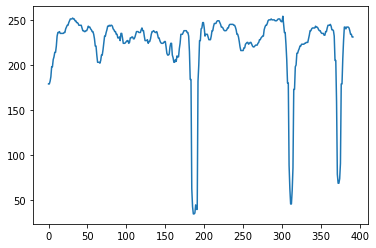



Point at jump: [(100, 138.55870445344127)]


Point at jump: [(100, 138.55870445344127), (100, 144.58299595141708)]


Point at jump: [(100, 138.55870445344127), (100, 144.58299595141708), (100, 233.44129554656027)]


Point at jump: [(100, 138.55870445344127), (100, 144.58299595141708), (100, 233.44129554656027), (100, 237.20647773279515)]


Point at jump: [(100, 138.55870445344127), (100, 144.58299595141708), (100, 233.44129554656027), (100, 237.20647773279515), (100, 280.12955465587277)]


Point at jump: [(100, 138.55870445344127), (100, 144.58299595141708), (100, 233.44129554656027), (100, 237.20647773279515), (100, 280.12955465587277), (100, 283.14170040486067)]
Standard deviation 74.25810842370458


Point at jump: [(100, 138.55870445344127)]


Point at jump: [(100, 138.55870445344127), (100, 144.58299595141708)]


Point at jump: [(100, 138.55870445344127), (100, 144.58299595141708), (100, 233.44129554656027)]


Point at jump: [(100, 138.55870445344127), (100, 144.58299595141708), 

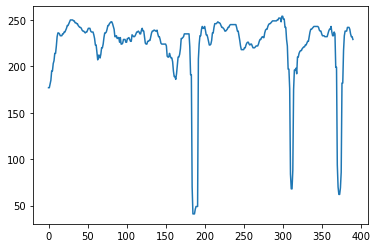



Point at jump: [(101, 138.55870445344127)]


Point at jump: [(101, 138.55870445344127), (101, 144.58299595141708)]


Point at jump: [(101, 138.55870445344127), (101, 144.58299595141708), (101, 233.44129554656027)]


Point at jump: [(101, 138.55870445344127), (101, 144.58299595141708), (101, 233.44129554656027), (101, 237.20647773279515)]


Point at jump: [(101, 138.55870445344127), (101, 144.58299595141708), (101, 233.44129554656027), (101, 237.20647773279515), (101, 278.6234817813788)]


Point at jump: [(101, 138.55870445344127), (101, 144.58299595141708), (101, 233.44129554656027), (101, 237.20647773279515), (101, 278.6234817813788), (101, 284.6477732793546)]
Standard deviation 73.68039087844201


Point at jump: [(101, 138.55870445344127)]


Point at jump: [(101, 138.55870445344127), (101, 144.58299595141708)]


Point at jump: [(101, 138.55870445344127), (101, 144.58299595141708), (101, 233.44129554656027)]


Point at jump: [(101, 138.55870445344127), (101, 144.58299595141708), (10

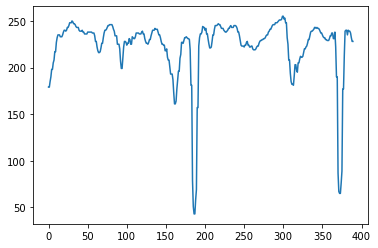



Point at jump: [(102, 139.31174089068824)]


Point at jump: [(102, 139.31174089068824), (102, 143.07692307692312)]
Standard deviation 127.27922061357856


Point at jump: [(102, 139.31174089068824)]


Point at jump: [(102, 139.31174089068824), (102, 143.07692307692312)]
[[15, 29, 36, 27, 34, 29, 32, 27, 32, 30, 34, 37, 22], [18, 25, 37, 27, 36, 26, 33, 27, 33, 28, 36, 36, 24]]


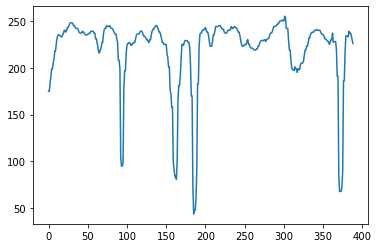



Point at jump: [(103, 138.55870445344127)]


Point at jump: [(103, 138.55870445344127), (103, 143.07692307692312)]


Point at jump: [(103, 138.55870445344127), (103, 143.07692307692312), (103, 279.3765182186258)]


Point at jump: [(103, 138.55870445344127), (103, 143.07692307692312), (103, 279.3765182186258), (103, 283.14170040486067)]
Standard deviation 102.19915198604471


Point at jump: [(103, 138.55870445344127)]


Point at jump: [(103, 138.55870445344127), (103, 143.07692307692312)]


Point at jump: [(103, 138.55870445344127), (103, 143.07692307692312), (103, 279.3765182186258)]


Point at jump: [(103, 138.55870445344127), (103, 143.07692307692312), (103, 279.3765182186258), (103, 283.14170040486067)]
[[15, 29, 36, 27, 34, 29, 32, 27, 32, 30, 34, 37, 22], [18, 25, 37, 27, 36, 26, 33, 27, 33, 28, 36, 36, 24]]


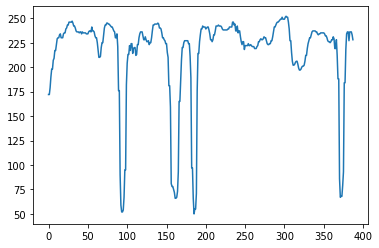



Point at jump: [(104, 69.27935222672055)]


Point at jump: [(104, 69.27935222672055), (104, 74.55060728744928)]


Point at jump: [(104, 69.27935222672055), (104, 74.55060728744928), (104, 117.47368421052612)]


Point at jump: [(104, 69.27935222672055), (104, 74.55060728744928), (104, 117.47368421052612), (104, 126.51012145748966)]


Point at jump: [(104, 69.27935222672055), (104, 74.55060728744928), (104, 117.47368421052612), (104, 126.51012145748966), (104, 138.55870445344127)]


Point at jump: [(104, 69.27935222672055), (104, 74.55060728744928), (104, 117.47368421052612), (104, 126.51012145748966), (104, 138.55870445344127), (104, 142.32388663967615)]


Point at jump: [(104, 69.27935222672055), (104, 74.55060728744928), (104, 117.47368421052612), (104, 126.51012145748966), (104, 138.55870445344127), (104, 142.32388663967615), (104, 279.3765182186258)]


Point at jump: [(104, 69.27935222672055), (104, 74.55060728744928), (104, 117.47368421052612), (104, 126.51012145748966), (104, 13

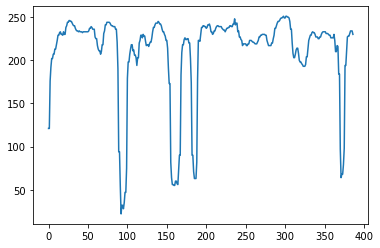



Point at jump: [(105, 8.2834008097166)]


Point at jump: [(105, 8.2834008097166), (105, 67.02024291497966)]


Point at jump: [(105, 8.2834008097166), (105, 67.02024291497966), (105, 76.0566801619432)]


Point at jump: [(105, 8.2834008097166), (105, 67.02024291497966), (105, 76.0566801619432), (105, 116.72064777327915)]


Point at jump: [(105, 8.2834008097166), (105, 67.02024291497966), (105, 76.0566801619432), (105, 116.72064777327915), (105, 126.51012145748966)]


Point at jump: [(105, 8.2834008097166), (105, 67.02024291497966), (105, 76.0566801619432), (105, 116.72064777327915), (105, 126.51012145748966), (105, 138.55870445344127)]


Point at jump: [(105, 8.2834008097166), (105, 67.02024291497966), (105, 76.0566801619432), (105, 116.72064777327915), (105, 126.51012145748966), (105, 138.55870445344127), (105, 142.32388663967615)]


Point at jump: [(105, 8.2834008097166), (105, 67.02024291497966), (105, 76.0566801619432), (105, 116.72064777327915), (105, 126.51012145748966), (105, 13

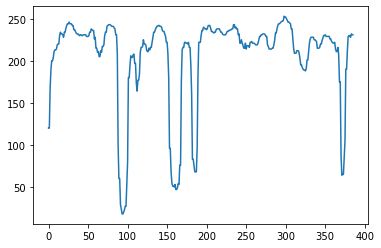



Point at jump: [(106, 10.542510121457491)]


Point at jump: [(106, 10.542510121457491), (106, 66.2672064777327)]


Point at jump: [(106, 10.542510121457491), (106, 66.2672064777327), (106, 78.31578947368409)]


Point at jump: [(106, 10.542510121457491), (106, 66.2672064777327), (106, 78.31578947368409), (106, 115.21457489878523)]


Point at jump: [(106, 10.542510121457491), (106, 66.2672064777327), (106, 78.31578947368409), (106, 115.21457489878523), (106, 127.26315789473662)]


Point at jump: [(106, 10.542510121457491), (106, 66.2672064777327), (106, 78.31578947368409), (106, 115.21457489878523), (106, 127.26315789473662), (106, 137.0526315789473)]


Point at jump: [(106, 10.542510121457491), (106, 66.2672064777327), (106, 78.31578947368409), (106, 115.21457489878523), (106, 127.26315789473662), (106, 137.0526315789473), (106, 143.07692307692312)]


Point at jump: [(106, 10.542510121457491), (106, 66.2672064777327), (106, 78.31578947368409), (106, 115.21457489878523), (106, 127.2631

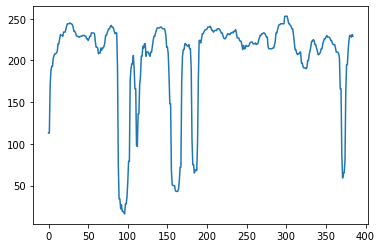



Point at jump: [(107, 9.036437246963564)]


Point at jump: [(107, 9.036437246963564), (107, 66.2672064777327)]


Point at jump: [(107, 9.036437246963564), (107, 66.2672064777327), (107, 78.31578947368409)]


Point at jump: [(107, 9.036437246963564), (107, 66.2672064777327), (107, 78.31578947368409), (107, 116.72064777327915)]


Point at jump: [(107, 9.036437246963564), (107, 66.2672064777327), (107, 78.31578947368409), (107, 116.72064777327915), (107, 126.51012145748966)]


Point at jump: [(107, 9.036437246963564), (107, 66.2672064777327), (107, 78.31578947368409), (107, 116.72064777327915), (107, 126.51012145748966), (107, 138.55870445344127)]


Point at jump: [(107, 9.036437246963564), (107, 66.2672064777327), (107, 78.31578947368409), (107, 116.72064777327915), (107, 126.51012145748966), (107, 138.55870445344127), (107, 142.32388663967615)]


Point at jump: [(107, 9.036437246963564), (107, 66.2672064777327), (107, 78.31578947368409), (107, 116.72064777327915), (107, 126.5101214574

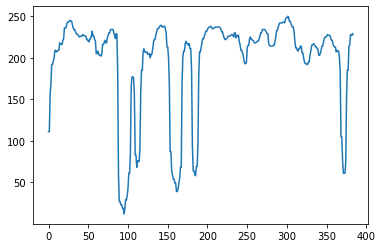



Point at jump: [(108, 10.542510121457491)]


Point at jump: [(108, 10.542510121457491), (108, 66.2672064777327)]


Point at jump: [(108, 10.542510121457491), (108, 66.2672064777327), (108, 78.31578947368409)]


Point at jump: [(108, 10.542510121457491), (108, 66.2672064777327), (108, 78.31578947368409), (108, 116.72064777327915)]


Point at jump: [(108, 10.542510121457491), (108, 66.2672064777327), (108, 78.31578947368409), (108, 116.72064777327915), (108, 126.51012145748966)]


Point at jump: [(108, 10.542510121457491), (108, 66.2672064777327), (108, 78.31578947368409), (108, 116.72064777327915), (108, 126.51012145748966), (108, 137.0526315789473)]


Point at jump: [(108, 10.542510121457491), (108, 66.2672064777327), (108, 78.31578947368409), (108, 116.72064777327915), (108, 126.51012145748966), (108, 137.0526315789473), (108, 142.32388663967615)]


Point at jump: [(108, 10.542510121457491), (108, 66.2672064777327), (108, 78.31578947368409), (108, 116.72064777327915), (108, 126.5101

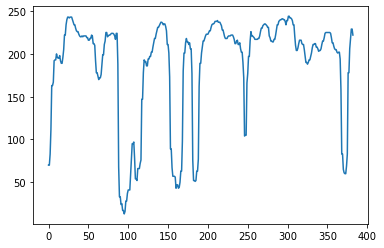



Point at jump: [(109, 5.271255060728746)]


Point at jump: [(109, 5.271255060728746), (109, 66.2672064777327)]


Point at jump: [(109, 5.271255060728746), (109, 66.2672064777327), (109, 89.61133603238852)]


Point at jump: [(109, 5.271255060728746), (109, 66.2672064777327), (109, 89.61133603238852), (109, 116.72064777327915)]


Point at jump: [(109, 5.271255060728746), (109, 66.2672064777327), (109, 89.61133603238852), (109, 116.72064777327915), (109, 127.26315789473662)]


Point at jump: [(109, 5.271255060728746), (109, 66.2672064777327), (109, 89.61133603238852), (109, 116.72064777327915), (109, 127.26315789473662), (109, 136.29959514170034)]


Point at jump: [(109, 5.271255060728746), (109, 66.2672064777327), (109, 89.61133603238852), (109, 116.72064777327915), (109, 127.26315789473662), (109, 136.29959514170034), (109, 143.07692307692312)]


Point at jump: [(109, 5.271255060728746), (109, 66.2672064777327), (109, 89.61133603238852), (109, 116.72064777327915), (109, 127.2631578947

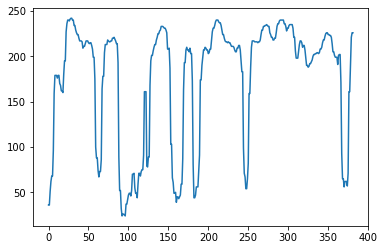



Point at jump: [(110, 5.271255060728746)]


Point at jump: [(110, 5.271255060728746), (110, 67.02024291497966)]


Point at jump: [(110, 5.271255060728746), (110, 67.02024291497966), (110, 90.36437246963548)]


Point at jump: [(110, 5.271255060728746), (110, 67.02024291497966), (110, 90.36437246963548), (110, 118.22672064777308)]


Point at jump: [(110, 5.271255060728746), (110, 67.02024291497966), (110, 90.36437246963548), (110, 118.22672064777308), (110, 127.26315789473662)]


Point at jump: [(110, 5.271255060728746), (110, 67.02024291497966), (110, 90.36437246963548), (110, 118.22672064777308), (110, 127.26315789473662), (110, 137.0526315789473)]


Point at jump: [(110, 5.271255060728746), (110, 67.02024291497966), (110, 90.36437246963548), (110, 118.22672064777308), (110, 127.26315789473662), (110, 137.0526315789473), (110, 143.07692307692312)]


Point at jump: [(110, 5.271255060728746), (110, 67.02024291497966), (110, 90.36437246963548), (110, 118.22672064777308), (110, 127.26315

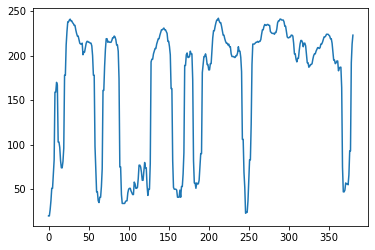



Point at jump: [(111, 6.024291497975709)]


Point at jump: [(111, 6.024291497975709), (111, 45.182186234817756)]


Point at jump: [(111, 6.024291497975709), (111, 45.182186234817756), (111, 51.20647773279345)]


Point at jump: [(111, 6.024291497975709), (111, 45.182186234817756), (111, 51.20647773279345), (111, 68.52631578947359)]


Point at jump: [(111, 6.024291497975709), (111, 45.182186234817756), (111, 51.20647773279345), (111, 68.52631578947359), (111, 96.38866396761118)]


Point at jump: [(111, 6.024291497975709), (111, 45.182186234817756), (111, 51.20647773279345), (111, 68.52631578947359), (111, 96.38866396761118), (111, 116.72064777327915)]


Point at jump: [(111, 6.024291497975709), (111, 45.182186234817756), (111, 51.20647773279345), (111, 68.52631578947359), (111, 96.38866396761118), (111, 116.72064777327915), (111, 128.0161943319836)]


Point at jump: [(111, 6.024291497975709), (111, 45.182186234817756), (111, 51.20647773279345), (111, 68.52631578947359), (111, 96.388663

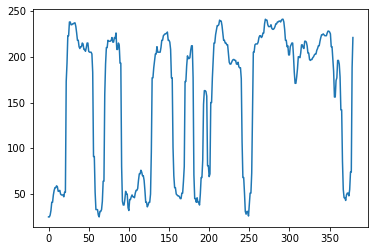



Point at jump: [(112, 16.5668016194332)]


Point at jump: [(112, 16.5668016194332), (112, 43.67611336032383)]


Point at jump: [(112, 16.5668016194332), (112, 43.67611336032383), (112, 52.712550607287376)]


Point at jump: [(112, 16.5668016194332), (112, 43.67611336032383), (112, 52.712550607287376), (112, 69.27935222672055)]


Point at jump: [(112, 16.5668016194332), (112, 43.67611336032383), (112, 52.712550607287376), (112, 69.27935222672055), (112, 97.14170040485814)]


Point at jump: [(112, 16.5668016194332), (112, 43.67611336032383), (112, 52.712550607287376), (112, 69.27935222672055), (112, 97.14170040485814), (112, 117.47368421052612)]


Point at jump: [(112, 16.5668016194332), (112, 43.67611336032383), (112, 52.712550607287376), (112, 69.27935222672055), (112, 97.14170040485814), (112, 117.47368421052612), (112, 128.0161943319836)]


Point at jump: [(112, 16.5668016194332), (112, 43.67611336032383), (112, 52.712550607287376), (112, 69.27935222672055), (112, 97.14170040485814)

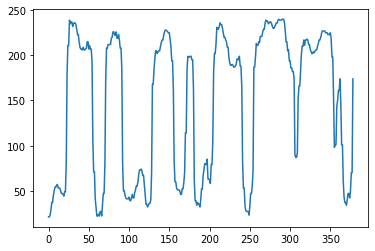



Point at jump: [(113, 17.31983805668016)]


Point at jump: [(113, 17.31983805668016), (113, 42.17004048582991)]


Point at jump: [(113, 17.31983805668016), (113, 42.17004048582991), (113, 53.46558704453434)]


Point at jump: [(113, 17.31983805668016), (113, 42.17004048582991), (113, 53.46558704453434), (113, 70.03238866396751)]


Point at jump: [(113, 17.31983805668016), (113, 42.17004048582991), (113, 53.46558704453434), (113, 70.03238866396751), (113, 97.14170040485814)]


Point at jump: [(113, 17.31983805668016), (113, 42.17004048582991), (113, 53.46558704453434), (113, 70.03238866396751), (113, 97.14170040485814), (113, 118.22672064777308)]


Point at jump: [(113, 17.31983805668016), (113, 42.17004048582991), (113, 53.46558704453434), (113, 70.03238866396751), (113, 97.14170040485814), (113, 118.22672064777308), (113, 129.52226720647755)]


Point at jump: [(113, 17.31983805668016), (113, 42.17004048582991), (113, 53.46558704453434), (113, 70.03238866396751), (113, 97.141700404858

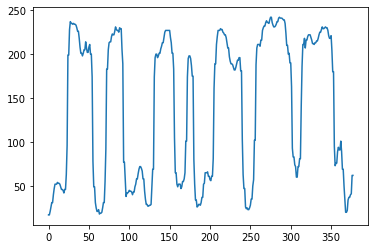



Point at jump: [(114, 18.072874493927124)]


Point at jump: [(114, 18.072874493927124), (114, 41.417004048582946)]


Point at jump: [(114, 18.072874493927124), (114, 41.417004048582946), (114, 54.2186234817813)]


Point at jump: [(114, 18.072874493927124), (114, 41.417004048582946), (114, 54.2186234817813), (114, 70.03238866396751)]


Point at jump: [(114, 18.072874493927124), (114, 41.417004048582946), (114, 54.2186234817813), (114, 70.03238866396751), (114, 99.40080971659903)]


Point at jump: [(114, 18.072874493927124), (114, 41.417004048582946), (114, 54.2186234817813), (114, 70.03238866396751), (114, 99.40080971659903), (114, 118.22672064777308)]


Point at jump: [(114, 18.072874493927124), (114, 41.417004048582946), (114, 54.2186234817813), (114, 70.03238866396751), (114, 99.40080971659903), (114, 118.22672064777308), (114, 129.52226720647755)]


Point at jump: [(114, 18.072874493927124), (114, 41.417004048582946), (114, 54.2186234817813), (114, 70.03238866396751), (114, 99.400

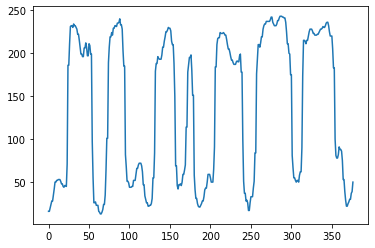



Point at jump: [(115, 18.072874493927124)]


Point at jump: [(115, 18.072874493927124), (115, 41.417004048582946)]


Point at jump: [(115, 18.072874493927124), (115, 41.417004048582946), (115, 55.724696356275224)]


Point at jump: [(115, 18.072874493927124), (115, 41.417004048582946), (115, 55.724696356275224), (115, 71.53846153846143)]


Point at jump: [(115, 18.072874493927124), (115, 41.417004048582946), (115, 55.724696356275224), (115, 71.53846153846143), (115, 100.15384615384599)]


Point at jump: [(115, 18.072874493927124), (115, 41.417004048582946), (115, 55.724696356275224), (115, 71.53846153846143), (115, 100.15384615384599), (115, 118.22672064777308)]


Point at jump: [(115, 18.072874493927124), (115, 41.417004048582946), (115, 55.724696356275224), (115, 71.53846153846143), (115, 100.15384615384599), (115, 118.22672064777308), (115, 129.52226720647755)]


Point at jump: [(115, 18.072874493927124), (115, 41.417004048582946), (115, 55.724696356275224), (115, 71.53846153846143

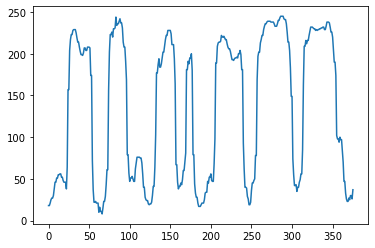



Point at jump: [(116, 18.072874493927124)]


Point at jump: [(116, 18.072874493927124), (116, 41.417004048582946)]


Point at jump: [(116, 18.072874493927124), (116, 41.417004048582946), (116, 55.724696356275224)]


Point at jump: [(116, 18.072874493927124), (116, 41.417004048582946), (116, 55.724696356275224), (116, 75.30364372469624)]


Point at jump: [(116, 18.072874493927124), (116, 41.417004048582946), (116, 55.724696356275224), (116, 75.30364372469624), (116, 100.15384615384599)]


Point at jump: [(116, 18.072874493927124), (116, 41.417004048582946), (116, 55.724696356275224), (116, 75.30364372469624), (116, 100.15384615384599), (116, 118.22672064777308)]


Point at jump: [(116, 18.072874493927124), (116, 41.417004048582946), (116, 55.724696356275224), (116, 75.30364372469624), (116, 100.15384615384599), (116, 118.22672064777308), (116, 128.0161943319836)]


Point at jump: [(116, 18.072874493927124), (116, 41.417004048582946), (116, 55.724696356275224), (116, 75.30364372469624)

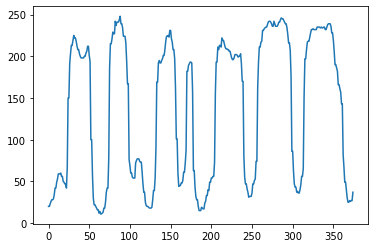



Point at jump: [(117, 18.072874493927124)]


Point at jump: [(117, 18.072874493927124), (117, 41.417004048582946)]


Point at jump: [(117, 18.072874493927124), (117, 41.417004048582946), (117, 56.477732793522186)]


Point at jump: [(117, 18.072874493927124), (117, 41.417004048582946), (117, 56.477732793522186), (117, 74.55060728744928)]


Point at jump: [(117, 18.072874493927124), (117, 41.417004048582946), (117, 56.477732793522186), (117, 74.55060728744928), (117, 101.65991902833991)]


Point at jump: [(117, 18.072874493927124), (117, 41.417004048582946), (117, 56.477732793522186), (117, 74.55060728744928), (117, 101.65991902833991), (117, 119.732793522267)]


Point at jump: [(117, 18.072874493927124), (117, 41.417004048582946), (117, 56.477732793522186), (117, 74.55060728744928), (117, 101.65991902833991), (117, 119.732793522267), (117, 128.0161943319836)]


Point at jump: [(117, 18.072874493927124), (117, 41.417004048582946), (117, 56.477732793522186), (117, 74.55060728744928), (1

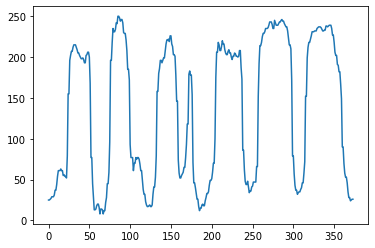



Point at jump: [(118, 18.072874493927124)]


Point at jump: [(118, 18.072874493927124), (118, 40.663967611335984)]


Point at jump: [(118, 18.072874493927124), (118, 40.663967611335984), (118, 57.23076923076915)]


Point at jump: [(118, 18.072874493927124), (118, 40.663967611335984), (118, 57.23076923076915), (118, 75.30364372469624)]


Point at jump: [(118, 18.072874493927124), (118, 40.663967611335984), (118, 57.23076923076915), (118, 75.30364372469624), (118, 103.16599190283384)]


Point at jump: [(118, 18.072874493927124), (118, 40.663967611335984), (118, 57.23076923076915), (118, 75.30364372469624), (118, 103.16599190283384), (118, 119.732793522267)]


Point at jump: [(118, 18.072874493927124), (118, 40.663967611335984), (118, 57.23076923076915), (118, 75.30364372469624), (118, 103.16599190283384), (118, 119.732793522267), (118, 129.52226720647755)]


Point at jump: [(118, 18.072874493927124), (118, 40.663967611335984), (118, 57.23076923076915), (118, 75.30364372469624), (118, 1

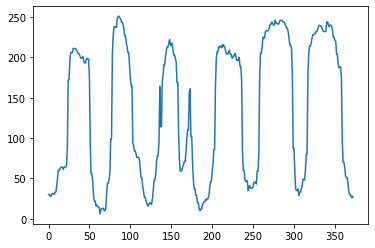



Point at jump: [(119, 18.072874493927124)]


Point at jump: [(119, 18.072874493927124), (119, 39.15789473684206)]


Point at jump: [(119, 18.072874493927124), (119, 39.15789473684206), (119, 58.73684210526307)]


Point at jump: [(119, 18.072874493927124), (119, 39.15789473684206), (119, 58.73684210526307), (119, 77.56275303643713)]


Point at jump: [(119, 18.072874493927124), (119, 39.15789473684206), (119, 58.73684210526307), (119, 77.56275303643713), (119, 107.68421052631561)]


Point at jump: [(119, 18.072874493927124), (119, 39.15789473684206), (119, 58.73684210526307), (119, 77.56275303643713), (119, 107.68421052631561), (119, 120.48582995951396)]


Point at jump: [(119, 18.072874493927124), (119, 39.15789473684206), (119, 58.73684210526307), (119, 77.56275303643713), (119, 107.68421052631561), (119, 120.48582995951396), (119, 154.37246963562777)]


Point at jump: [(119, 18.072874493927124), (119, 39.15789473684206), (119, 58.73684210526307), (119, 77.56275303643713), (119, 107.

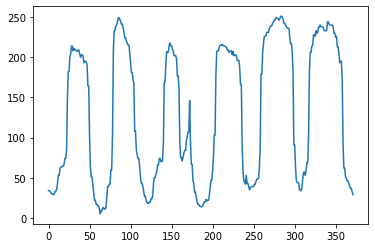



Point at jump: [(120, 17.31983805668016)]


Point at jump: [(120, 17.31983805668016), (120, 40.663967611335984)]


Point at jump: [(120, 17.31983805668016), (120, 40.663967611335984), (120, 59.489878542510034)]


Point at jump: [(120, 17.31983805668016), (120, 40.663967611335984), (120, 59.489878542510034), (120, 80.57489878542498)]


Point at jump: [(120, 17.31983805668016), (120, 40.663967611335984), (120, 59.489878542510034), (120, 80.57489878542498), (120, 107.68421052631561)]


Point at jump: [(120, 17.31983805668016), (120, 40.663967611335984), (120, 59.489878542510034), (120, 80.57489878542498), (120, 107.68421052631561), (120, 121.23886639676093)]


Point at jump: [(120, 17.31983805668016), (120, 40.663967611335984), (120, 59.489878542510034), (120, 80.57489878542498), (120, 107.68421052631561), (120, 121.23886639676093), (120, 153.6194331983808)]


Point at jump: [(120, 17.31983805668016), (120, 40.663967611335984), (120, 59.489878542510034), (120, 80.57489878542498), (120, 

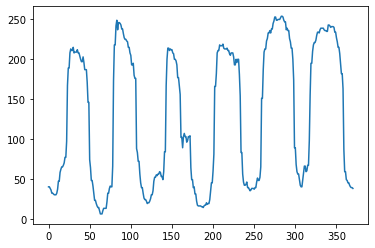



Point at jump: [(121, 17.31983805668016)]


Point at jump: [(121, 17.31983805668016), (121, 38.4048582995951)]


Point at jump: [(121, 17.31983805668016), (121, 38.4048582995951), (121, 59.489878542510034)]


Point at jump: [(121, 17.31983805668016), (121, 38.4048582995951), (121, 59.489878542510034), (121, 82.0809716599189)]


Point at jump: [(121, 17.31983805668016), (121, 38.4048582995951), (121, 59.489878542510034), (121, 82.0809716599189), (121, 108.43724696356257)]


Point at jump: [(121, 17.31983805668016), (121, 38.4048582995951), (121, 59.489878542510034), (121, 82.0809716599189), (121, 108.43724696356257), (121, 122.74493927125485)]


Point at jump: [(121, 17.31983805668016), (121, 38.4048582995951), (121, 59.489878542510034), (121, 82.0809716599189), (121, 108.43724696356257), (121, 122.74493927125485), (121, 154.37246963562777)]


Point at jump: [(121, 17.31983805668016), (121, 38.4048582995951), (121, 59.489878542510034), (121, 82.0809716599189), (121, 108.43724696356257

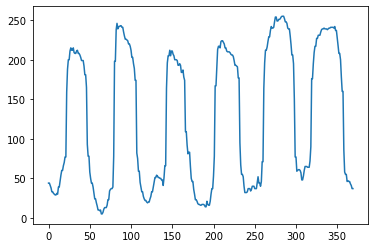



Point at jump: [(122, 16.5668016194332)]


Point at jump: [(122, 16.5668016194332), (122, 37.651821862348136)]


Point at jump: [(122, 16.5668016194332), (122, 37.651821862348136), (122, 60.242914979756996)]


Point at jump: [(122, 16.5668016194332), (122, 37.651821862348136), (122, 60.242914979756996), (122, 80.57489878542498)]


Point at jump: [(122, 16.5668016194332), (122, 37.651821862348136), (122, 60.242914979756996), (122, 80.57489878542498), (122, 108.43724696356257)]


Point at jump: [(122, 16.5668016194332), (122, 37.651821862348136), (122, 60.242914979756996), (122, 80.57489878542498), (122, 108.43724696356257), (122, 126.51012145748966)]


Point at jump: [(122, 16.5668016194332), (122, 37.651821862348136), (122, 60.242914979756996), (122, 80.57489878542498), (122, 108.43724696356257), (122, 126.51012145748966), (122, 154.37246963562777)]


Point at jump: [(122, 16.5668016194332), (122, 37.651821862348136), (122, 60.242914979756996), (122, 80.57489878542498), (122, 108.437

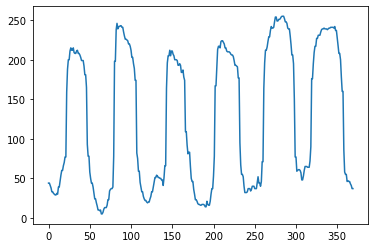

[[15, 29, 36, 27, 34, 29, 32, 27, 32, 30, 34, 37, 22], [18, 25, 37, 27, 36, 26, 33, 27, 33, 28, 36, 36, 24], [22, 28, 30, 27, 37, 24, 37, 27, 30, 37, 22, 37]]


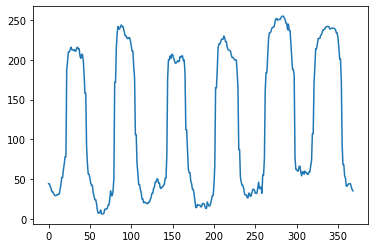



Point at jump: [(123, 16.5668016194332)]


Point at jump: [(123, 16.5668016194332), (123, 35.39271255060725)]


Point at jump: [(123, 16.5668016194332), (123, 35.39271255060725), (123, 60.242914979756996)]


Point at jump: [(123, 16.5668016194332), (123, 35.39271255060725), (123, 60.242914979756996), (123, 80.57489878542498)]


Point at jump: [(123, 16.5668016194332), (123, 35.39271255060725), (123, 60.242914979756996), (123, 80.57489878542498), (123, 108.43724696356257)]


Point at jump: [(123, 16.5668016194332), (123, 35.39271255060725), (123, 60.242914979756996), (123, 80.57489878542498), (123, 108.43724696356257), (123, 127.26315789473662)]


Point at jump: [(123, 16.5668016194332), (123, 35.39271255060725), (123, 60.242914979756996), (123, 80.57489878542498), (123, 108.43724696356257), (123, 127.26315789473662), (123, 152.11336032388684)]


Point at jump: [(123, 16.5668016194332), (123, 35.39271255060725), (123, 60.242914979756996), (123, 80.57489878542498), (123, 108.4372469635

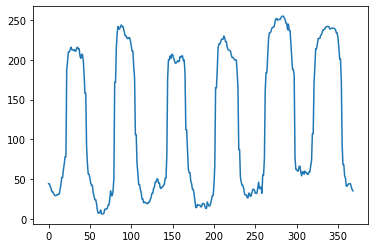

[[15, 29, 36, 27, 34, 29, 32, 27, 32, 30, 34, 37, 22], [18, 25, 37, 27, 36, 26, 33, 27, 33, 28, 36, 36, 24], [22, 28, 30, 27, 37, 24, 37, 27, 30, 37, 22, 37], [22, 25, 33, 27, 37, 25, 33, 30, 30, 39, 20, 35]]


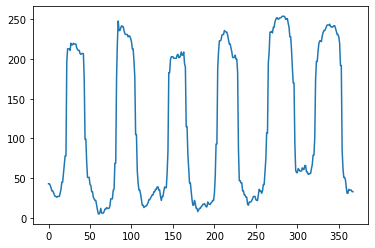



Point at jump: [(124, 16.5668016194332)]


Point at jump: [(124, 16.5668016194332), (124, 34.63967611336029)]


Point at jump: [(124, 16.5668016194332), (124, 34.63967611336029), (124, 61.74898785425092)]


Point at jump: [(124, 16.5668016194332), (124, 34.63967611336029), (124, 61.74898785425092), (124, 80.57489878542498)]


Point at jump: [(124, 16.5668016194332), (124, 34.63967611336029), (124, 61.74898785425092), (124, 80.57489878542498), (124, 109.19028340080953)]


Point at jump: [(124, 16.5668016194332), (124, 34.63967611336029), (124, 61.74898785425092), (124, 80.57489878542498), (124, 109.19028340080953), (124, 126.51012145748966)]


Point at jump: [(124, 16.5668016194332), (124, 34.63967611336029), (124, 61.74898785425092), (124, 80.57489878542498), (124, 109.19028340080953), (124, 126.51012145748966), (124, 153.6194331983808)]


Point at jump: [(124, 16.5668016194332), (124, 34.63967611336029), (124, 61.74898785425092), (124, 80.57489878542498), (124, 109.19028340080953), 

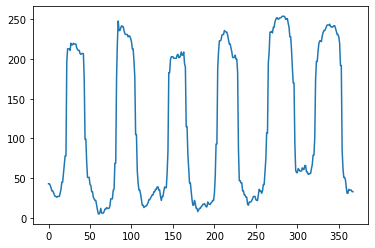

[[15, 29, 36, 27, 34, 29, 32, 27, 32, 30, 34, 37, 22], [18, 25, 37, 27, 36, 26, 33, 27, 33, 28, 36, 36, 24], [22, 28, 30, 27, 37, 24, 37, 27, 30, 37, 22, 37], [22, 25, 33, 27, 37, 25, 33, 30, 30, 39, 20, 35], [22, 24, 36, 25, 38, 23, 36, 25, 36, 32, 26, 31]]


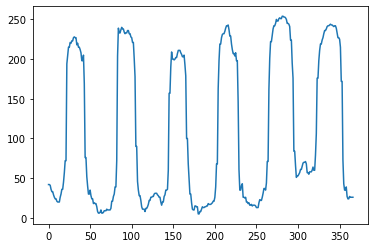



Point at jump: [(125, 16.5668016194332)]


Point at jump: [(125, 16.5668016194332), (125, 33.133603238866364)]


Point at jump: [(125, 16.5668016194332), (125, 33.133603238866364), (125, 62.50202429149788)]


Point at jump: [(125, 16.5668016194332), (125, 33.133603238866364), (125, 62.50202429149788), (125, 79.06882591093105)]


Point at jump: [(125, 16.5668016194332), (125, 33.133603238866364), (125, 62.50202429149788), (125, 79.06882591093105), (125, 111.44939271255042)]


Point at jump: [(125, 16.5668016194332), (125, 33.133603238866364), (125, 62.50202429149788), (125, 79.06882591093105), (125, 111.44939271255042), (125, 125.00404858299574)]


Point at jump: [(125, 16.5668016194332), (125, 33.133603238866364), (125, 62.50202429149788), (125, 79.06882591093105), (125, 111.44939271255042), (125, 125.00404858299574), (125, 155.12550607287474)]


Point at jump: [(125, 16.5668016194332), (125, 33.133603238866364), (125, 62.50202429149788), (125, 79.06882591093105), (125, 111.449392712

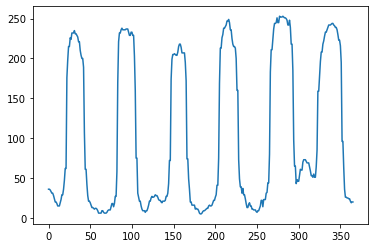



Point at jump: [(126, 16.5668016194332)]


Point at jump: [(126, 16.5668016194332), (126, 33.133603238866364)]


Point at jump: [(126, 16.5668016194332), (126, 33.133603238866364), (126, 62.50202429149788)]


Point at jump: [(126, 16.5668016194332), (126, 33.133603238866364), (126, 62.50202429149788), (126, 80.57489878542498)]


Point at jump: [(126, 16.5668016194332), (126, 33.133603238866364), (126, 62.50202429149788), (126, 80.57489878542498), (126, 110.69635627530346)]


Point at jump: [(126, 16.5668016194332), (126, 33.133603238866364), (126, 62.50202429149788), (126, 80.57489878542498), (126, 110.69635627530346), (126, 126.51012145748966)]


Point at jump: [(126, 16.5668016194332), (126, 33.133603238866364), (126, 62.50202429149788), (126, 80.57489878542498), (126, 110.69635627530346), (126, 126.51012145748966), (126, 154.37246963562777)]


Point at jump: [(126, 16.5668016194332), (126, 33.133603238866364), (126, 62.50202429149788), (126, 80.57489878542498), (126, 110.696356275

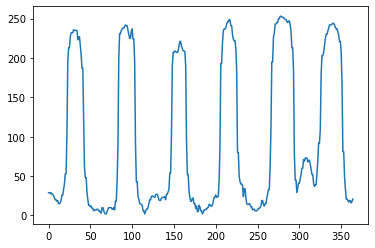



Point at jump: [(127, 17.31983805668016)]


Point at jump: [(127, 17.31983805668016), (127, 32.3805668016194)]


Point at jump: [(127, 17.31983805668016), (127, 32.3805668016194), (127, 63.255060728744844)]


Point at jump: [(127, 17.31983805668016), (127, 32.3805668016194), (127, 63.255060728744844), (127, 78.31578947368409)]


Point at jump: [(127, 17.31983805668016), (127, 32.3805668016194), (127, 63.255060728744844), (127, 78.31578947368409), (127, 112.20242914979738)]


Point at jump: [(127, 17.31983805668016), (127, 32.3805668016194), (127, 63.255060728744844), (127, 78.31578947368409), (127, 112.20242914979738), (127, 124.25101214574877)]


Point at jump: [(127, 17.31983805668016), (127, 32.3805668016194), (127, 63.255060728744844), (127, 78.31578947368409), (127, 112.20242914979738), (127, 124.25101214574877), (127, 156.6315789473687)]


Point at jump: [(127, 17.31983805668016), (127, 32.3805668016194), (127, 63.255060728744844), (127, 78.31578947368409), (127, 112.2024291497

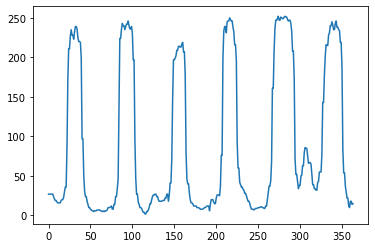



Point at jump: [(128, 17.31983805668016)]


Point at jump: [(128, 17.31983805668016), (128, 31.62753036437244)]


Point at jump: [(128, 17.31983805668016), (128, 31.62753036437244), (128, 64.00809716599181)]


Point at jump: [(128, 17.31983805668016), (128, 31.62753036437244), (128, 64.00809716599181), (128, 77.56275303643713)]


Point at jump: [(128, 17.31983805668016), (128, 31.62753036437244), (128, 64.00809716599181), (128, 77.56275303643713), (128, 112.20242914979738)]


Point at jump: [(128, 17.31983805668016), (128, 31.62753036437244), (128, 64.00809716599181), (128, 77.56275303643713), (128, 112.20242914979738), (128, 123.49797570850181)]


Point at jump: [(128, 17.31983805668016), (128, 31.62753036437244), (128, 64.00809716599181), (128, 77.56275303643713), (128, 112.20242914979738), (128, 123.49797570850181), (128, 156.6315789473687)]


Point at jump: [(128, 17.31983805668016), (128, 31.62753036437244), (128, 64.00809716599181), (128, 77.56275303643713), (128, 112.202429149

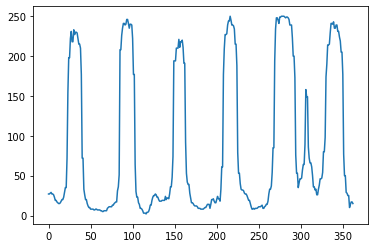



Point at jump: [(129, 17.31983805668016)]


Point at jump: [(129, 17.31983805668016), (129, 31.62753036437244)]


Point at jump: [(129, 17.31983805668016), (129, 31.62753036437244), (129, 64.00809716599181)]


Point at jump: [(129, 17.31983805668016), (129, 31.62753036437244), (129, 64.00809716599181), (129, 77.56275303643713)]


Point at jump: [(129, 17.31983805668016), (129, 31.62753036437244), (129, 64.00809716599181), (129, 77.56275303643713), (129, 112.20242914979738)]


Point at jump: [(129, 17.31983805668016), (129, 31.62753036437244), (129, 64.00809716599181), (129, 77.56275303643713), (129, 112.20242914979738), (129, 122.74493927125485)]


Point at jump: [(129, 17.31983805668016), (129, 31.62753036437244), (129, 64.00809716599181), (129, 77.56275303643713), (129, 112.20242914979738), (129, 122.74493927125485), (129, 157.38461538461567)]


Point at jump: [(129, 17.31983805668016), (129, 31.62753036437244), (129, 64.00809716599181), (129, 77.56275303643713), (129, 112.20242914

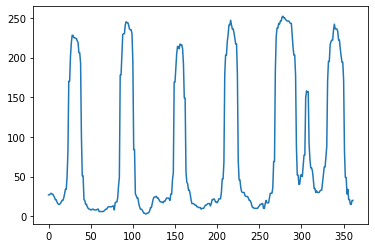



Point at jump: [(130, 18.072874493927124)]


Point at jump: [(130, 18.072874493927124), (130, 30.121457489878516)]


Point at jump: [(130, 18.072874493927124), (130, 30.121457489878516), (130, 64.00809716599181)]


Point at jump: [(130, 18.072874493927124), (130, 30.121457489878516), (130, 64.00809716599181), (130, 77.56275303643713)]


Point at jump: [(130, 18.072874493927124), (130, 30.121457489878516), (130, 64.00809716599181), (130, 77.56275303643713), (130, 112.20242914979738)]


Point at jump: [(130, 18.072874493927124), (130, 30.121457489878516), (130, 64.00809716599181), (130, 77.56275303643713), (130, 112.20242914979738), (130, 122.74493927125485)]


Point at jump: [(130, 18.072874493927124), (130, 30.121457489878516), (130, 64.00809716599181), (130, 77.56275303643713), (130, 112.20242914979738), (130, 122.74493927125485), (130, 157.38461538461567)]


Point at jump: [(130, 18.072874493927124), (130, 30.121457489878516), (130, 64.00809716599181), (130, 77.56275303643713), (13

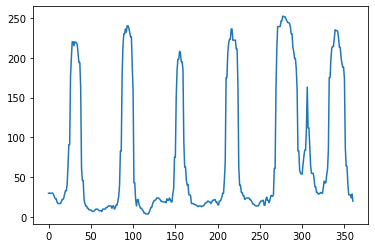



Point at jump: [(131, 19.578947368421048)]


Point at jump: [(131, 19.578947368421048), (131, 29.368421052631554)]


Point at jump: [(131, 19.578947368421048), (131, 29.368421052631554), (131, 65.51417004048574)]


Point at jump: [(131, 19.578947368421048), (131, 29.368421052631554), (131, 65.51417004048574), (131, 76.0566801619432)]


Point at jump: [(131, 19.578947368421048), (131, 29.368421052631554), (131, 65.51417004048574), (131, 76.0566801619432), (131, 113.7085020242913)]


Point at jump: [(131, 19.578947368421048), (131, 29.368421052631554), (131, 65.51417004048574), (131, 76.0566801619432), (131, 113.7085020242913), (131, 122.74493927125485)]


Point at jump: [(131, 19.578947368421048), (131, 29.368421052631554), (131, 65.51417004048574), (131, 76.0566801619432), (131, 113.7085020242913), (131, 122.74493927125485), (131, 158.13765182186265)]


Point at jump: [(131, 19.578947368421048), (131, 29.368421052631554), (131, 65.51417004048574), (131, 76.0566801619432), (131, 113.7

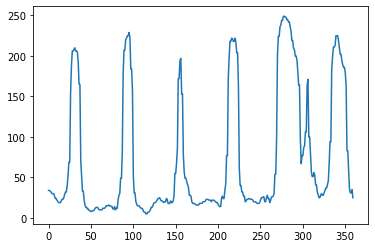



Point at jump: [(132, 19.578947368421048)]


Point at jump: [(132, 19.578947368421048), (132, 29.368421052631554)]


Point at jump: [(132, 19.578947368421048), (132, 29.368421052631554), (132, 66.2672064777327)]


Point at jump: [(132, 19.578947368421048), (132, 29.368421052631554), (132, 66.2672064777327), (132, 75.30364372469624)]


Point at jump: [(132, 19.578947368421048), (132, 29.368421052631554), (132, 66.2672064777327), (132, 75.30364372469624), (132, 115.21457489878523)]


Point at jump: [(132, 19.578947368421048), (132, 29.368421052631554), (132, 66.2672064777327), (132, 75.30364372469624), (132, 115.21457489878523), (132, 120.48582995951396)]


Point at jump: [(132, 19.578947368421048), (132, 29.368421052631554), (132, 66.2672064777327), (132, 75.30364372469624), (132, 115.21457489878523), (132, 120.48582995951396), (132, 159.6437246963566)]


Point at jump: [(132, 19.578947368421048), (132, 29.368421052631554), (132, 66.2672064777327), (132, 75.30364372469624), (132, 115.

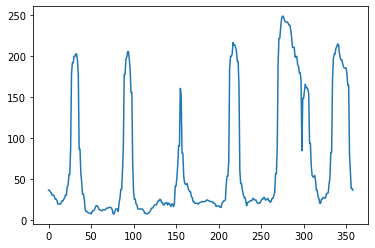



Point at jump: [(133, 20.33198380566801)]


Point at jump: [(133, 20.33198380566801), (133, 28.615384615384592)]


Point at jump: [(133, 20.33198380566801), (133, 28.615384615384592), (133, 67.02024291497966)]


Point at jump: [(133, 20.33198380566801), (133, 28.615384615384592), (133, 67.02024291497966), (133, 74.55060728744928)]


Point at jump: [(133, 20.33198380566801), (133, 28.615384615384592), (133, 67.02024291497966), (133, 74.55060728744928), (133, 160.39676113360358)]


Point at jump: [(133, 20.33198380566801), (133, 28.615384615384592), (133, 67.02024291497966), (133, 74.55060728744928), (133, 160.39676113360358), (133, 169.4331983805673)]


Point at jump: [(133, 20.33198380566801), (133, 28.615384615384592), (133, 67.02024291497966), (133, 74.55060728744928), (133, 160.39676113360358), (133, 169.4331983805673), (133, 203.31983805668122)]


Point at jump: [(133, 20.33198380566801), (133, 28.615384615384592), (133, 67.02024291497966), (133, 74.55060728744928), (133, 160.396

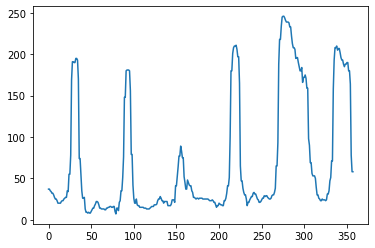



Point at jump: [(134, 20.33198380566801)]


Point at jump: [(134, 20.33198380566801), (134, 28.615384615384592)]


Point at jump: [(134, 20.33198380566801), (134, 28.615384615384592), (134, 68.52631578947359)]


Point at jump: [(134, 20.33198380566801), (134, 28.615384615384592), (134, 68.52631578947359), (134, 73.04453441295536)]


Point at jump: [(134, 20.33198380566801), (134, 28.615384615384592), (134, 68.52631578947359), (134, 73.04453441295536), (134, 161.14979757085055)]


Point at jump: [(134, 20.33198380566801), (134, 28.615384615384592), (134, 68.52631578947359), (134, 73.04453441295536), (134, 161.14979757085055), (134, 169.4331983805673)]


Point at jump: [(134, 20.33198380566801), (134, 28.615384615384592), (134, 68.52631578947359), (134, 73.04453441295536), (134, 161.14979757085055), (134, 169.4331983805673), (134, 203.31983805668122)]


Point at jump: [(134, 20.33198380566801), (134, 28.615384615384592), (134, 68.52631578947359), (134, 73.04453441295536), (134, 161.149

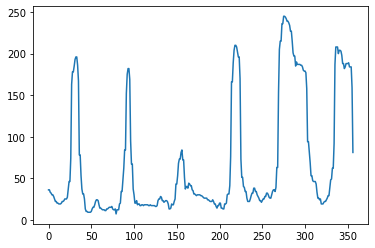



Point at jump: [(135, 20.33198380566801)]


Point at jump: [(135, 20.33198380566801), (135, 28.615384615384592)]


Point at jump: [(135, 20.33198380566801), (135, 28.615384615384592), (135, 69.27935222672055)]


Point at jump: [(135, 20.33198380566801), (135, 28.615384615384592), (135, 69.27935222672055), (135, 73.04453441295536)]


Point at jump: [(135, 20.33198380566801), (135, 28.615384615384592), (135, 69.27935222672055), (135, 73.04453441295536), (135, 162.6558704453445)]


Point at jump: [(135, 20.33198380566801), (135, 28.615384615384592), (135, 69.27935222672055), (135, 73.04453441295536), (135, 162.6558704453445), (135, 169.4331983805673)]


Point at jump: [(135, 20.33198380566801), (135, 28.615384615384592), (135, 69.27935222672055), (135, 73.04453441295536), (135, 162.6558704453445), (135, 169.4331983805673), (135, 203.31983805668122)]


Point at jump: [(135, 20.33198380566801), (135, 28.615384615384592), (135, 69.27935222672055), (135, 73.04453441295536), (135, 162.655870

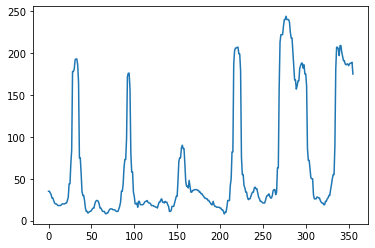



Point at jump: [(136, 21.085020242914972)]


Point at jump: [(136, 21.085020242914972), (136, 27.109311740890668)]


Point at jump: [(136, 21.085020242914972), (136, 27.109311740890668), (136, 70.03238866396751)]


Point at jump: [(136, 21.085020242914972), (136, 27.109311740890668), (136, 70.03238866396751), (136, 73.04453441295536)]


Point at jump: [(136, 21.085020242914972), (136, 27.109311740890668), (136, 70.03238866396751), (136, 73.04453441295536), (136, 162.6558704453445)]


Point at jump: [(136, 21.085020242914972), (136, 27.109311740890668), (136, 70.03238866396751), (136, 73.04453441295536), (136, 162.6558704453445), (136, 169.4331983805673)]


Point at jump: [(136, 21.085020242914972), (136, 27.109311740890668), (136, 70.03238866396751), (136, 73.04453441295536), (136, 162.6558704453445), (136, 169.4331983805673), (136, 203.31983805668122)]


Point at jump: [(136, 21.085020242914972), (136, 27.109311740890668), (136, 70.03238866396751), (136, 73.04453441295536), (136, 16

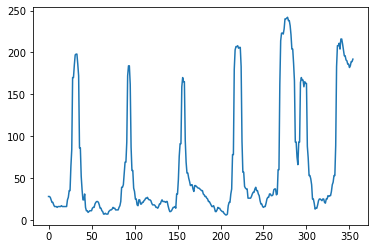



Point at jump: [(137, 21.085020242914972)]


Point at jump: [(137, 21.085020242914972), (137, 28.615384615384592)]


Point at jump: [(137, 21.085020242914972), (137, 28.615384615384592), (137, 69.27935222672055)]


Point at jump: [(137, 21.085020242914972), (137, 28.615384615384592), (137, 69.27935222672055), (137, 73.04453441295536)]


Point at jump: [(137, 21.085020242914972), (137, 28.615384615384592), (137, 69.27935222672055), (137, 73.04453441295536), (137, 117.47368421052612)]


Point at jump: [(137, 21.085020242914972), (137, 28.615384615384592), (137, 69.27935222672055), (137, 73.04453441295536), (137, 117.47368421052612), (137, 120.48582995951396)]


Point at jump: [(137, 21.085020242914972), (137, 28.615384615384592), (137, 69.27935222672055), (137, 73.04453441295536), (137, 117.47368421052612), (137, 120.48582995951396), (137, 162.6558704453445)]


Point at jump: [(137, 21.085020242914972), (137, 28.615384615384592), (137, 69.27935222672055), (137, 73.04453441295536), (137

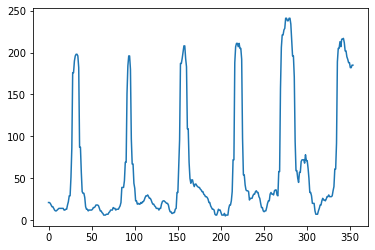



Point at jump: [(138, 21.085020242914972)]


Point at jump: [(138, 21.085020242914972), (138, 28.615384615384592)]


Point at jump: [(138, 21.085020242914972), (138, 28.615384615384592), (138, 69.27935222672055)]


Point at jump: [(138, 21.085020242914972), (138, 28.615384615384592), (138, 69.27935222672055), (138, 73.04453441295536)]


Point at jump: [(138, 21.085020242914972), (138, 28.615384615384592), (138, 69.27935222672055), (138, 73.04453441295536), (138, 115.21457489878523)]


Point at jump: [(138, 21.085020242914972), (138, 28.615384615384592), (138, 69.27935222672055), (138, 73.04453441295536), (138, 115.21457489878523), (138, 122.74493927125485)]


Point at jump: [(138, 21.085020242914972), (138, 28.615384615384592), (138, 69.27935222672055), (138, 73.04453441295536), (138, 115.21457489878523), (138, 122.74493927125485), (138, 162.6558704453445)]


Point at jump: [(138, 21.085020242914972), (138, 28.615384615384592), (138, 69.27935222672055), (138, 73.04453441295536), (138

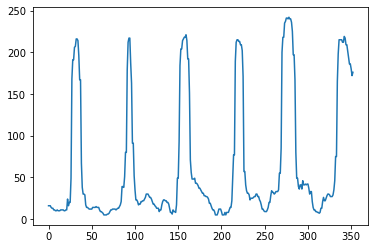



Point at jump: [(139, 20.33198380566801)]


Point at jump: [(139, 20.33198380566801), (139, 28.615384615384592)]


Point at jump: [(139, 20.33198380566801), (139, 28.615384615384592), (139, 68.52631578947359)]


Point at jump: [(139, 20.33198380566801), (139, 28.615384615384592), (139, 68.52631578947359), (139, 74.55060728744928)]


Point at jump: [(139, 20.33198380566801), (139, 28.615384615384592), (139, 68.52631578947359), (139, 74.55060728744928), (139, 114.46153846153827)]


Point at jump: [(139, 20.33198380566801), (139, 28.615384615384592), (139, 68.52631578947359), (139, 74.55060728744928), (139, 114.46153846153827), (139, 123.49797570850181)]


Point at jump: [(139, 20.33198380566801), (139, 28.615384615384592), (139, 68.52631578947359), (139, 74.55060728744928), (139, 114.46153846153827), (139, 123.49797570850181), (139, 162.6558704453445)]


Point at jump: [(139, 20.33198380566801), (139, 28.615384615384592), (139, 68.52631578947359), (139, 74.55060728744928), (139, 114.46

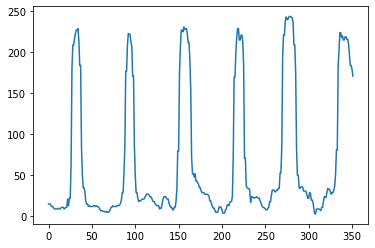



Point at jump: [(140, 20.33198380566801)]


Point at jump: [(140, 20.33198380566801), (140, 29.368421052631554)]


Point at jump: [(140, 20.33198380566801), (140, 29.368421052631554), (140, 67.02024291497966)]


Point at jump: [(140, 20.33198380566801), (140, 29.368421052631554), (140, 67.02024291497966), (140, 75.30364372469624)]


Point at jump: [(140, 20.33198380566801), (140, 29.368421052631554), (140, 67.02024291497966), (140, 75.30364372469624), (140, 113.7085020242913)]


Point at jump: [(140, 20.33198380566801), (140, 29.368421052631554), (140, 67.02024291497966), (140, 75.30364372469624), (140, 113.7085020242913), (140, 124.25101214574877)]


Point at jump: [(140, 20.33198380566801), (140, 29.368421052631554), (140, 67.02024291497966), (140, 75.30364372469624), (140, 113.7085020242913), (140, 124.25101214574877), (140, 162.6558704453445)]


Point at jump: [(140, 20.33198380566801), (140, 29.368421052631554), (140, 67.02024291497966), (140, 75.30364372469624), (140, 113.70850

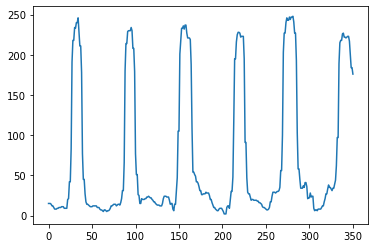



Point at jump: [(141, 20.33198380566801)]


Point at jump: [(141, 20.33198380566801), (141, 29.368421052631554)]


Point at jump: [(141, 20.33198380566801), (141, 29.368421052631554), (141, 66.2672064777327)]


Point at jump: [(141, 20.33198380566801), (141, 29.368421052631554), (141, 66.2672064777327), (141, 75.30364372469624)]


Point at jump: [(141, 20.33198380566801), (141, 29.368421052631554), (141, 66.2672064777327), (141, 75.30364372469624), (141, 113.7085020242913)]


Point at jump: [(141, 20.33198380566801), (141, 29.368421052631554), (141, 66.2672064777327), (141, 75.30364372469624), (141, 113.7085020242913), (141, 125.00404858299574)]


Point at jump: [(141, 20.33198380566801), (141, 29.368421052631554), (141, 66.2672064777327), (141, 75.30364372469624), (141, 113.7085020242913), (141, 125.00404858299574), (141, 161.14979757085055)]


Point at jump: [(141, 20.33198380566801), (141, 29.368421052631554), (141, 66.2672064777327), (141, 75.30364372469624), (141, 113.7085020242

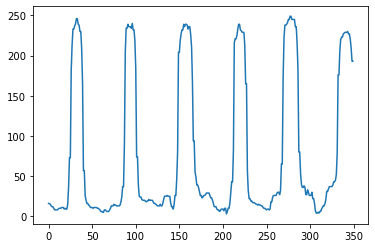



Point at jump: [(142, 19.578947368421048)]


Point at jump: [(142, 19.578947368421048), (142, 30.121457489878516)]


Point at jump: [(142, 19.578947368421048), (142, 30.121457489878516), (142, 66.2672064777327)]


Point at jump: [(142, 19.578947368421048), (142, 30.121457489878516), (142, 66.2672064777327), (142, 76.0566801619432)]


Point at jump: [(142, 19.578947368421048), (142, 30.121457489878516), (142, 66.2672064777327), (142, 76.0566801619432), (142, 112.20242914979738)]


Point at jump: [(142, 19.578947368421048), (142, 30.121457489878516), (142, 66.2672064777327), (142, 76.0566801619432), (142, 112.20242914979738), (142, 125.00404858299574)]


Point at jump: [(142, 19.578947368421048), (142, 30.121457489878516), (142, 66.2672064777327), (142, 76.0566801619432), (142, 112.20242914979738), (142, 125.00404858299574), (142, 160.39676113360358)]


Point at jump: [(142, 19.578947368421048), (142, 30.121457489878516), (142, 66.2672064777327), (142, 76.0566801619432), (142, 112.2024

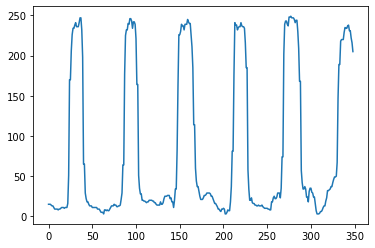



Point at jump: [(143, 18.072874493927124)]


Point at jump: [(143, 18.072874493927124), (143, 30.121457489878516)]


Point at jump: [(143, 18.072874493927124), (143, 30.121457489878516), (143, 65.51417004048574)]


Point at jump: [(143, 18.072874493927124), (143, 30.121457489878516), (143, 65.51417004048574), (143, 77.56275303643713)]


Point at jump: [(143, 18.072874493927124), (143, 30.121457489878516), (143, 65.51417004048574), (143, 77.56275303643713), (143, 111.44939271255042)]


Point at jump: [(143, 18.072874493927124), (143, 30.121457489878516), (143, 65.51417004048574), (143, 77.56275303643713), (143, 111.44939271255042), (143, 126.51012145748966)]


Point at jump: [(143, 18.072874493927124), (143, 30.121457489878516), (143, 65.51417004048574), (143, 77.56275303643713), (143, 111.44939271255042), (143, 126.51012145748966), (143, 159.6437246963566)]


Point at jump: [(143, 18.072874493927124), (143, 30.121457489878516), (143, 65.51417004048574), (143, 77.56275303643713), (143

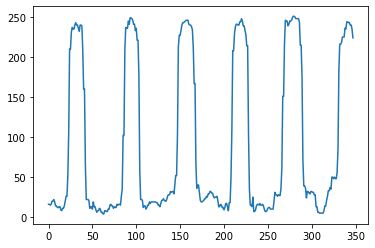



Point at jump: [(144, 18.072874493927124)]


Point at jump: [(144, 18.072874493927124), (144, 31.62753036437244)]


Point at jump: [(144, 18.072874493927124), (144, 31.62753036437244), (144, 65.51417004048574)]


Point at jump: [(144, 18.072874493927124), (144, 31.62753036437244), (144, 65.51417004048574), (144, 78.31578947368409)]


Point at jump: [(144, 18.072874493927124), (144, 31.62753036437244), (144, 65.51417004048574), (144, 78.31578947368409), (144, 111.44939271255042)]


Point at jump: [(144, 18.072874493927124), (144, 31.62753036437244), (144, 65.51417004048574), (144, 78.31578947368409), (144, 111.44939271255042), (144, 126.51012145748966)]


Point at jump: [(144, 18.072874493927124), (144, 31.62753036437244), (144, 65.51417004048574), (144, 78.31578947368409), (144, 111.44939271255042), (144, 126.51012145748966), (144, 158.13765182186265)]


Point at jump: [(144, 18.072874493927124), (144, 31.62753036437244), (144, 65.51417004048574), (144, 78.31578947368409), (144, 111.

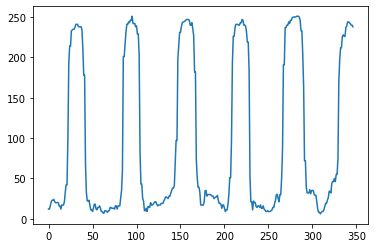



Point at jump: [(145, 17.31983805668016)]


Point at jump: [(145, 17.31983805668016), (145, 31.62753036437244)]


Point at jump: [(145, 17.31983805668016), (145, 31.62753036437244), (145, 64.00809716599181)]


Point at jump: [(145, 17.31983805668016), (145, 31.62753036437244), (145, 64.00809716599181), (145, 78.31578947368409)]


Point at jump: [(145, 17.31983805668016), (145, 31.62753036437244), (145, 64.00809716599181), (145, 78.31578947368409), (145, 110.69635627530346)]


Point at jump: [(145, 17.31983805668016), (145, 31.62753036437244), (145, 64.00809716599181), (145, 78.31578947368409), (145, 110.69635627530346), (145, 126.51012145748966)]


Point at jump: [(145, 17.31983805668016), (145, 31.62753036437244), (145, 64.00809716599181), (145, 78.31578947368409), (145, 110.69635627530346), (145, 126.51012145748966), (145, 157.38461538461567)]


Point at jump: [(145, 17.31983805668016), (145, 31.62753036437244), (145, 64.00809716599181), (145, 78.31578947368409), (145, 110.69635627

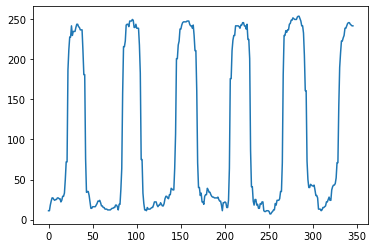



Point at jump: [(146, 16.5668016194332)]


Point at jump: [(146, 16.5668016194332), (146, 31.62753036437244)]


Point at jump: [(146, 16.5668016194332), (146, 31.62753036437244), (146, 64.00809716599181)]


Point at jump: [(146, 16.5668016194332), (146, 31.62753036437244), (146, 64.00809716599181), (146, 79.06882591093105)]


Point at jump: [(146, 16.5668016194332), (146, 31.62753036437244), (146, 64.00809716599181), (146, 79.06882591093105), (146, 109.19028340080953)]


Point at jump: [(146, 16.5668016194332), (146, 31.62753036437244), (146, 64.00809716599181), (146, 79.06882591093105), (146, 109.19028340080953), (146, 127.26315789473662)]


Point at jump: [(146, 16.5668016194332), (146, 31.62753036437244), (146, 64.00809716599181), (146, 79.06882591093105), (146, 109.19028340080953), (146, 127.26315789473662), (146, 155.12550607287474)]


Point at jump: [(146, 16.5668016194332), (146, 31.62753036437244), (146, 64.00809716599181), (146, 79.06882591093105), (146, 109.19028340080953),

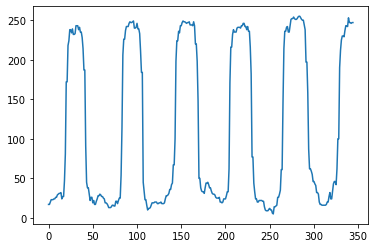



Point at jump: [(147, 15.060728744939274)]


Point at jump: [(147, 15.060728744939274), (147, 32.3805668016194)]


Point at jump: [(147, 15.060728744939274), (147, 32.3805668016194), (147, 63.255060728744844)]


Point at jump: [(147, 15.060728744939274), (147, 32.3805668016194), (147, 63.255060728744844), (147, 80.57489878542498)]


Point at jump: [(147, 15.060728744939274), (147, 32.3805668016194), (147, 63.255060728744844), (147, 80.57489878542498), (147, 108.43724696356257)]


Point at jump: [(147, 15.060728744939274), (147, 32.3805668016194), (147, 63.255060728744844), (147, 80.57489878542498), (147, 108.43724696356257), (147, 128.0161943319836)]


Point at jump: [(147, 15.060728744939274), (147, 32.3805668016194), (147, 63.255060728744844), (147, 80.57489878542498), (147, 108.43724696356257), (147, 128.0161943319836), (147, 154.37246963562777)]


Point at jump: [(147, 15.060728744939274), (147, 32.3805668016194), (147, 63.255060728744844), (147, 80.57489878542498), (147, 108.437

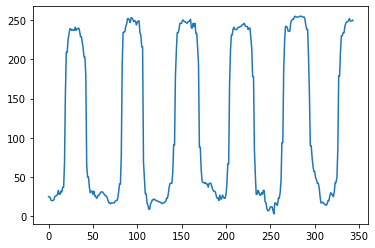



Point at jump: [(148, 14.30769230769231)]


Point at jump: [(148, 14.30769230769231), (148, 33.133603238866364)]


Point at jump: [(148, 14.30769230769231), (148, 33.133603238866364), (148, 62.50202429149788)]


Point at jump: [(148, 14.30769230769231), (148, 33.133603238866364), (148, 62.50202429149788), (148, 80.57489878542498)]


Point at jump: [(148, 14.30769230769231), (148, 33.133603238866364), (148, 62.50202429149788), (148, 80.57489878542498), (148, 107.68421052631561)]


Point at jump: [(148, 14.30769230769231), (148, 33.133603238866364), (148, 62.50202429149788), (148, 80.57489878542498), (148, 107.68421052631561), (148, 129.52226720647755)]


Point at jump: [(148, 14.30769230769231), (148, 33.133603238866364), (148, 62.50202429149788), (148, 80.57489878542498), (148, 107.68421052631561), (148, 129.52226720647755), (148, 153.6194331983808)]


Point at jump: [(148, 14.30769230769231), (148, 33.133603238866364), (148, 62.50202429149788), (148, 80.57489878542498), (148, 107.68

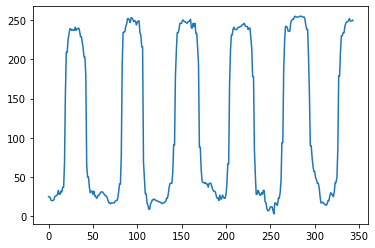

[[15, 29, 36, 27, 34, 29, 32, 27, 32, 30, 34, 37, 22], [18, 25, 37, 27, 36, 26, 33, 27, 33, 28, 36, 36, 24], [22, 28, 30, 27, 37, 24, 37, 27, 30, 37, 22, 37], [22, 25, 33, 27, 37, 25, 33, 30, 30, 39, 20, 35], [22, 24, 36, 25, 38, 23, 36, 25, 36, 32, 26, 31], [19, 25, 39, 24, 36, 29, 32, 29, 32, 32, 30]]


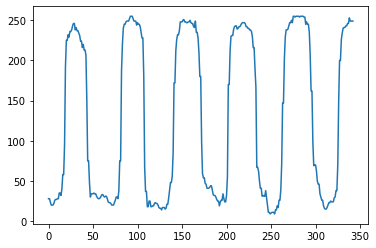



Point at jump: [(149, 14.30769230769231)]


Point at jump: [(149, 14.30769230769231), (149, 33.133603238866364)]


Point at jump: [(149, 14.30769230769231), (149, 33.133603238866364), (149, 61.74898785425092)]


Point at jump: [(149, 14.30769230769231), (149, 33.133603238866364), (149, 61.74898785425092), (149, 81.32793522267194)]


Point at jump: [(149, 14.30769230769231), (149, 33.133603238866364), (149, 61.74898785425092), (149, 81.32793522267194), (149, 106.17813765182169)]


Point at jump: [(149, 14.30769230769231), (149, 33.133603238866364), (149, 61.74898785425092), (149, 81.32793522267194), (149, 106.17813765182169), (149, 130.27530364372453)]


Point at jump: [(149, 14.30769230769231), (149, 33.133603238866364), (149, 61.74898785425092), (149, 81.32793522267194), (149, 106.17813765182169), (149, 130.27530364372453), (149, 152.11336032388684)]


Point at jump: [(149, 14.30769230769231), (149, 33.133603238866364), (149, 61.74898785425092), (149, 81.32793522267194), (149, 106.1

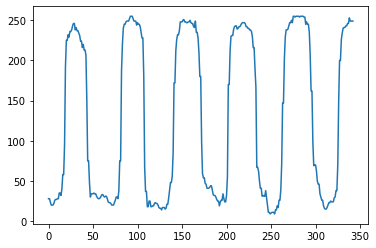

[[15, 29, 36, 27, 34, 29, 32, 27, 32, 30, 34, 37, 22], [18, 25, 37, 27, 36, 26, 33, 27, 33, 28, 36, 36, 24], [22, 28, 30, 27, 37, 24, 37, 27, 30, 37, 22, 37], [22, 25, 33, 27, 37, 25, 33, 30, 30, 39, 20, 35], [22, 24, 36, 25, 38, 23, 36, 25, 36, 32, 26, 31], [19, 25, 39, 24, 36, 29, 32, 29, 32, 32, 30], [19, 25, 38, 26, 33, 32, 29, 32, 31, 32, 30]]


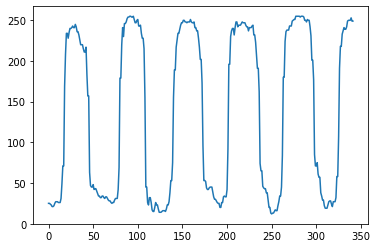



Point at jump: [(150, 13.554655870445346)]


Point at jump: [(150, 13.554655870445346), (150, 34.63967611336029)]


Point at jump: [(150, 13.554655870445346), (150, 34.63967611336029), (150, 60.242914979756996)]


Point at jump: [(150, 13.554655870445346), (150, 34.63967611336029), (150, 60.242914979756996), (150, 82.0809716599189)]


Point at jump: [(150, 13.554655870445346), (150, 34.63967611336029), (150, 60.242914979756996), (150, 82.0809716599189), (150, 105.42510121457472)]


Point at jump: [(150, 13.554655870445346), (150, 34.63967611336029), (150, 60.242914979756996), (150, 82.0809716599189), (150, 105.42510121457472), (150, 131.0283400809715)]


Point at jump: [(150, 13.554655870445346), (150, 34.63967611336029), (150, 60.242914979756996), (150, 82.0809716599189), (150, 105.42510121457472), (150, 131.0283400809715), (150, 152.11336032388684)]


Point at jump: [(150, 13.554655870445346), (150, 34.63967611336029), (150, 60.242914979756996), (150, 82.0809716599189), (150, 105.4

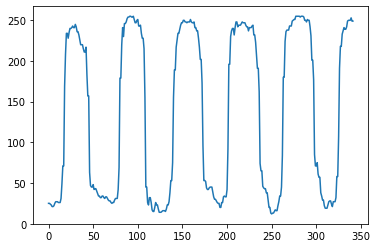

[[15, 29, 36, 27, 34, 29, 32, 27, 32, 30, 34, 37, 22], [18, 25, 37, 27, 36, 26, 33, 27, 33, 28, 36, 36, 24], [22, 28, 30, 27, 37, 24, 37, 27, 30, 37, 22, 37], [22, 25, 33, 27, 37, 25, 33, 30, 30, 39, 20, 35], [22, 24, 36, 25, 38, 23, 36, 25, 36, 32, 26, 31], [19, 25, 39, 24, 36, 29, 32, 29, 32, 32, 30], [19, 25, 38, 26, 33, 32, 29, 32, 31, 32, 30], [18, 28, 34, 29, 31, 34, 28, 35, 26, 36, 27]]


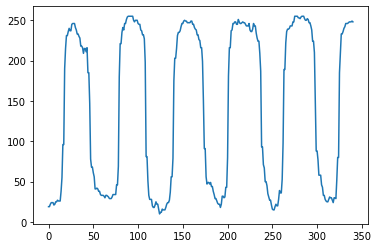



Point at jump: [(151, 13.554655870445346)]


Point at jump: [(151, 13.554655870445346), (151, 35.39271255060725)]


Point at jump: [(151, 13.554655870445346), (151, 35.39271255060725), (151, 59.489878542510034)]


Point at jump: [(151, 13.554655870445346), (151, 35.39271255060725), (151, 59.489878542510034), (151, 83.58704453441283)]


Point at jump: [(151, 13.554655870445346), (151, 35.39271255060725), (151, 59.489878542510034), (151, 83.58704453441283), (151, 105.42510121457472)]


Point at jump: [(151, 13.554655870445346), (151, 35.39271255060725), (151, 59.489878542510034), (151, 83.58704453441283), (151, 105.42510121457472), (151, 132.53441295546546)]


Point at jump: [(151, 13.554655870445346), (151, 35.39271255060725), (151, 59.489878542510034), (151, 83.58704453441283), (151, 105.42510121457472), (151, 132.53441295546546), (151, 151.36032388663986)]


Point at jump: [(151, 13.554655870445346), (151, 35.39271255060725), (151, 59.489878542510034), (151, 83.58704453441283), (151

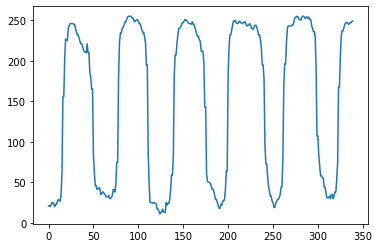



Point at jump: [(152, 12.048582995951419)]


Point at jump: [(152, 12.048582995951419), (152, 39.15789473684206)]


Point at jump: [(152, 12.048582995951419), (152, 39.15789473684206), (152, 58.73684210526307)]


Point at jump: [(152, 12.048582995951419), (152, 39.15789473684206), (152, 58.73684210526307), (152, 84.34008097165979)]


Point at jump: [(152, 12.048582995951419), (152, 39.15789473684206), (152, 58.73684210526307), (152, 84.34008097165979), (152, 105.42510121457472)]


Point at jump: [(152, 12.048582995951419), (152, 39.15789473684206), (152, 58.73684210526307), (152, 84.34008097165979), (152, 105.42510121457472), (152, 132.53441295546546)]


Point at jump: [(152, 12.048582995951419), (152, 39.15789473684206), (152, 58.73684210526307), (152, 84.34008097165979), (152, 105.42510121457472), (152, 132.53441295546546), (152, 150.60728744939289)]


Point at jump: [(152, 12.048582995951419), (152, 39.15789473684206), (152, 58.73684210526307), (152, 84.34008097165979), (152, 105.

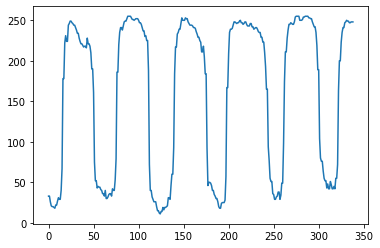



Point at jump: [(153, 12.048582995951419)]


Point at jump: [(153, 12.048582995951419), (153, 38.4048582995951)]


Point at jump: [(153, 12.048582995951419), (153, 38.4048582995951), (153, 57.23076923076915)]


Point at jump: [(153, 12.048582995951419), (153, 38.4048582995951), (153, 57.23076923076915), (153, 84.34008097165979)]


Point at jump: [(153, 12.048582995951419), (153, 38.4048582995951), (153, 57.23076923076915), (153, 84.34008097165979), (153, 105.42510121457472)]


Point at jump: [(153, 12.048582995951419), (153, 38.4048582995951), (153, 57.23076923076915), (153, 84.34008097165979), (153, 105.42510121457472), (153, 133.28744939271243)]


Point at jump: [(153, 12.048582995951419), (153, 38.4048582995951), (153, 57.23076923076915), (153, 84.34008097165979), (153, 105.42510121457472), (153, 133.28744939271243), (153, 149.10121457489893)]


Point at jump: [(153, 12.048582995951419), (153, 38.4048582995951), (153, 57.23076923076915), (153, 84.34008097165979), (153, 105.4251012

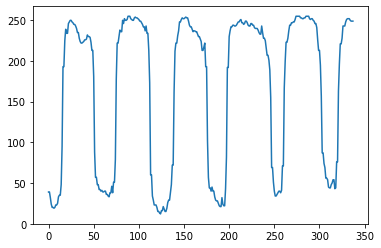



Point at jump: [(154, 12.048582995951419)]


Point at jump: [(154, 12.048582995951419), (154, 38.4048582995951)]


Point at jump: [(154, 12.048582995951419), (154, 38.4048582995951), (154, 57.23076923076915)]


Point at jump: [(154, 12.048582995951419), (154, 38.4048582995951), (154, 57.23076923076915), (154, 85.09311740890675)]


Point at jump: [(154, 12.048582995951419), (154, 38.4048582995951), (154, 57.23076923076915), (154, 85.09311740890675), (154, 104.67206477732776)]


Point at jump: [(154, 12.048582995951419), (154, 38.4048582995951), (154, 57.23076923076915), (154, 85.09311740890675), (154, 104.67206477732776), (154, 133.28744939271243)]


Point at jump: [(154, 12.048582995951419), (154, 38.4048582995951), (154, 57.23076923076915), (154, 85.09311740890675), (154, 104.67206477732776), (154, 133.28744939271243), (154, 149.10121457489893)]


Point at jump: [(154, 12.048582995951419), (154, 38.4048582995951), (154, 57.23076923076915), (154, 85.09311740890675), (154, 104.6720647

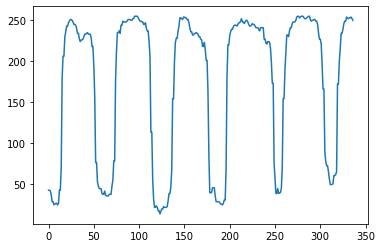



Point at jump: [(155, 11.295546558704455)]


Point at jump: [(155, 11.295546558704455), (155, 39.15789473684206)]


Point at jump: [(155, 11.295546558704455), (155, 39.15789473684206), (155, 55.724696356275224)]


Point at jump: [(155, 11.295546558704455), (155, 39.15789473684206), (155, 55.724696356275224), (155, 86.59919028340067)]


Point at jump: [(155, 11.295546558704455), (155, 39.15789473684206), (155, 55.724696356275224), (155, 86.59919028340067), (155, 104.67206477732776)]


Point at jump: [(155, 11.295546558704455), (155, 39.15789473684206), (155, 55.724696356275224), (155, 86.59919028340067), (155, 104.67206477732776), (155, 133.28744939271243)]


Point at jump: [(155, 11.295546558704455), (155, 39.15789473684206), (155, 55.724696356275224), (155, 86.59919028340067), (155, 104.67206477732776), (155, 133.28744939271243), (155, 149.10121457489893)]


Point at jump: [(155, 11.295546558704455), (155, 39.15789473684206), (155, 55.724696356275224), (155, 86.59919028340067), (155

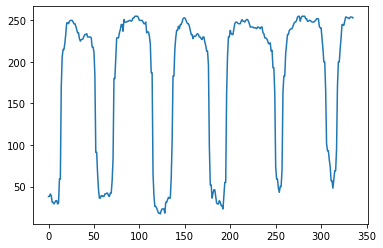



Point at jump: [(156, 10.542510121457491)]


Point at jump: [(156, 10.542510121457491), (156, 40.663967611335984)]


Point at jump: [(156, 10.542510121457491), (156, 40.663967611335984), (156, 54.2186234817813)]


Point at jump: [(156, 10.542510121457491), (156, 40.663967611335984), (156, 54.2186234817813), (156, 86.59919028340067)]


Point at jump: [(156, 10.542510121457491), (156, 40.663967611335984), (156, 54.2186234817813), (156, 86.59919028340067), (156, 103.16599190283384)]


Point at jump: [(156, 10.542510121457491), (156, 40.663967611335984), (156, 54.2186234817813), (156, 86.59919028340067), (156, 103.16599190283384), (156, 134.0404858299594)]


Point at jump: [(156, 10.542510121457491), (156, 40.663967611335984), (156, 54.2186234817813), (156, 86.59919028340067), (156, 103.16599190283384), (156, 134.0404858299594), (156, 147.59514170040498)]


Point at jump: [(156, 10.542510121457491), (156, 40.663967611335984), (156, 54.2186234817813), (156, 86.59919028340067), (156, 103.1

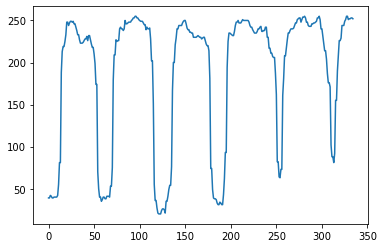



Point at jump: [(157, 10.542510121457491)]


Point at jump: [(157, 10.542510121457491), (157, 40.663967611335984)]


Point at jump: [(157, 10.542510121457491), (157, 40.663967611335984), (157, 53.46558704453434)]


Point at jump: [(157, 10.542510121457491), (157, 40.663967611335984), (157, 53.46558704453434), (157, 87.35222672064764)]


Point at jump: [(157, 10.542510121457491), (157, 40.663967611335984), (157, 53.46558704453434), (157, 87.35222672064764), (157, 102.41295546558688)]


Point at jump: [(157, 10.542510121457491), (157, 40.663967611335984), (157, 53.46558704453434), (157, 87.35222672064764), (157, 102.41295546558688), (157, 135.54655870445336)]


Point at jump: [(157, 10.542510121457491), (157, 40.663967611335984), (157, 53.46558704453434), (157, 87.35222672064764), (157, 102.41295546558688), (157, 135.54655870445336), (157, 147.59514170040498)]


Point at jump: [(157, 10.542510121457491), (157, 40.663967611335984), (157, 53.46558704453434), (157, 87.35222672064764), (15

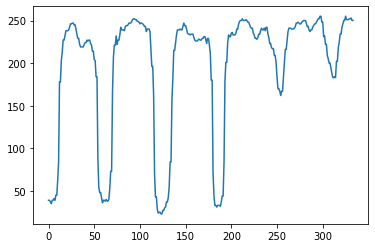



Point at jump: [(158, 9.036437246963564)]


Point at jump: [(158, 9.036437246963564), (158, 41.417004048582946)]


Point at jump: [(158, 9.036437246963564), (158, 41.417004048582946), (158, 52.712550607287376)]


Point at jump: [(158, 9.036437246963564), (158, 41.417004048582946), (158, 52.712550607287376), (158, 88.1052631578946)]


Point at jump: [(158, 9.036437246963564), (158, 41.417004048582946), (158, 52.712550607287376), (158, 88.1052631578946), (158, 101.65991902833991)]


Point at jump: [(158, 9.036437246963564), (158, 41.417004048582946), (158, 52.712550607287376), (158, 88.1052631578946), (158, 101.65991902833991), (158, 136.29959514170034)]


Point at jump: [(158, 9.036437246963564), (158, 41.417004048582946), (158, 52.712550607287376), (158, 88.1052631578946), (158, 101.65991902833991), (158, 136.29959514170034), (158, 145.33603238866405)]
Standard deviation 16.781509098381097


Point at jump: [(158, 9.036437246963564)]


Point at jump: [(158, 9.036437246963564), (158, 4

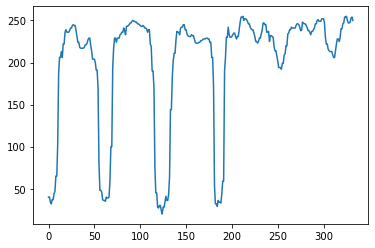



Point at jump: [(159, 8.2834008097166)]


Point at jump: [(159, 8.2834008097166), (159, 41.417004048582946)]


Point at jump: [(159, 8.2834008097166), (159, 41.417004048582946), (159, 52.712550607287376)]


Point at jump: [(159, 8.2834008097166), (159, 41.417004048582946), (159, 52.712550607287376), (159, 87.35222672064764)]


Point at jump: [(159, 8.2834008097166), (159, 41.417004048582946), (159, 52.712550607287376), (159, 87.35222672064764), (159, 101.65991902833991)]


Point at jump: [(159, 8.2834008097166), (159, 41.417004048582946), (159, 52.712550607287376), (159, 87.35222672064764), (159, 101.65991902833991), (159, 136.29959514170034)]


Point at jump: [(159, 8.2834008097166), (159, 41.417004048582946), (159, 52.712550607287376), (159, 87.35222672064764), (159, 101.65991902833991), (159, 136.29959514170034), (159, 144.58299595141708)]
Standard deviation 16.978978599601163


Point at jump: [(159, 8.2834008097166)]


Point at jump: [(159, 8.2834008097166), (159, 41.417004048582

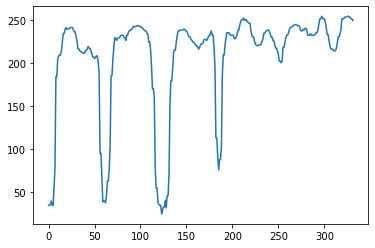



Point at jump: [(160, 6.024291497975709)]


Point at jump: [(160, 6.024291497975709), (160, 43.67611336032383)]


Point at jump: [(160, 6.024291497975709), (160, 43.67611336032383), (160, 51.20647773279345)]


Point at jump: [(160, 6.024291497975709), (160, 43.67611336032383), (160, 51.20647773279345), (160, 87.35222672064764)]


Point at jump: [(160, 6.024291497975709), (160, 43.67611336032383), (160, 51.20647773279345), (160, 87.35222672064764), (160, 101.65991902833991)]


Point at jump: [(160, 6.024291497975709), (160, 43.67611336032383), (160, 51.20647773279345), (160, 87.35222672064764), (160, 101.65991902833991), (160, 138.55870445344127)]


Point at jump: [(160, 6.024291497975709), (160, 43.67611336032383), (160, 51.20647773279345), (160, 87.35222672064764), (160, 101.65991902833991), (160, 138.55870445344127), (160, 143.07692307692312)]
Standard deviation 20.85208679747722


Point at jump: [(160, 6.024291497975709)]


Point at jump: [(160, 6.024291497975709), (160, 43.676113

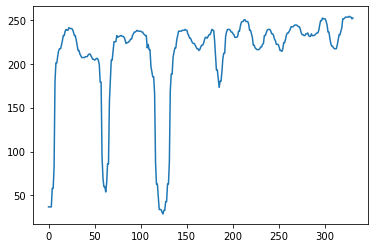



Point at jump: [(161, 5.271255060728746)]


Point at jump: [(161, 5.271255060728746), (161, 44.429149797570794)]


Point at jump: [(161, 5.271255060728746), (161, 44.429149797570794), (161, 50.45344129554649)]


Point at jump: [(161, 5.271255060728746), (161, 44.429149797570794), (161, 50.45344129554649), (161, 88.1052631578946)]


Point at jump: [(161, 5.271255060728746), (161, 44.429149797570794), (161, 50.45344129554649), (161, 88.1052631578946), (161, 99.40080971659903)]
Standard deviation 22.678183348760545


Point at jump: [(161, 5.271255060728746)]


Point at jump: [(161, 5.271255060728746), (161, 44.429149797570794)]


Point at jump: [(161, 5.271255060728746), (161, 44.429149797570794), (161, 50.45344129554649)]


Point at jump: [(161, 5.271255060728746), (161, 44.429149797570794), (161, 50.45344129554649), (161, 88.1052631578946)]


Point at jump: [(161, 5.271255060728746), (161, 44.429149797570794), (161, 50.45344129554649), (161, 88.1052631578946), (161, 99.40080971659903)

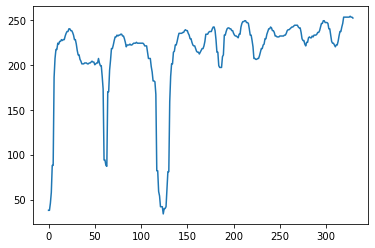



Point at jump: [(162, 4.518218623481782)]


Point at jump: [(162, 4.518218623481782), (162, 88.1052631578946)]


Point at jump: [(162, 4.518218623481782), (162, 88.1052631578946), (162, 99.40080971659903)]
Standard deviation 58.19793810780585


Point at jump: [(162, 4.518218623481782)]


Point at jump: [(162, 4.518218623481782), (162, 88.1052631578946)]


Point at jump: [(162, 4.518218623481782), (162, 88.1052631578946), (162, 99.40080971659903)]
[[15, 29, 36, 27, 34, 29, 32, 27, 32, 30, 34, 37, 22], [18, 25, 37, 27, 36, 26, 33, 27, 33, 28, 36, 36, 24], [22, 28, 30, 27, 37, 24, 37, 27, 30, 37, 22, 37], [22, 25, 33, 27, 37, 25, 33, 30, 30, 39, 20, 35], [22, 24, 36, 25, 38, 23, 36, 25, 36, 32, 26, 31], [19, 25, 39, 24, 36, 29, 32, 29, 32, 32, 30], [19, 25, 38, 26, 33, 32, 29, 32, 31, 32, 30], [18, 28, 34, 29, 31, 34, 28, 35, 26, 36, 27]]


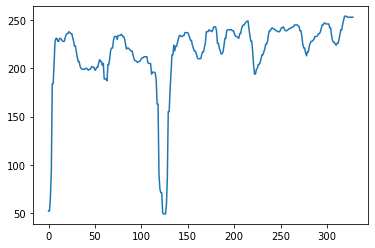



Point at jump: [(163, 3.0121457489878543)]


Point at jump: [(163, 3.0121457489878543), (163, 90.36437246963548)]


Point at jump: [(163, 3.0121457489878543), (163, 90.36437246963548), (163, 98.64777327935207)]
Standard deviation 62.740205078827515


Point at jump: [(163, 3.0121457489878543)]


Point at jump: [(163, 3.0121457489878543), (163, 90.36437246963548)]


Point at jump: [(163, 3.0121457489878543), (163, 90.36437246963548), (163, 98.64777327935207)]
[[15, 29, 36, 27, 34, 29, 32, 27, 32, 30, 34, 37, 22], [18, 25, 37, 27, 36, 26, 33, 27, 33, 28, 36, 36, 24], [22, 28, 30, 27, 37, 24, 37, 27, 30, 37, 22, 37], [22, 25, 33, 27, 37, 25, 33, 30, 30, 39, 20, 35], [22, 24, 36, 25, 38, 23, 36, 25, 36, 32, 26, 31], [19, 25, 39, 24, 36, 29, 32, 29, 32, 32, 30], [19, 25, 38, 26, 33, 32, 29, 32, 31, 32, 30], [18, 28, 34, 29, 31, 34, 28, 35, 26, 36, 27]]


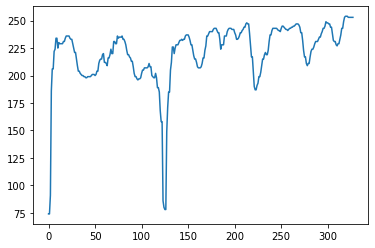



Point at jump: [(164, 2.2591093117408905)]


Point at jump: [(164, 2.2591093117408905), (164, 93.37651821862333)]


Point at jump: [(164, 2.2591093117408905), (164, 93.37651821862333), (164, 97.14170040485814)]
Standard deviation 67.55738301621814


Point at jump: [(164, 2.2591093117408905)]


Point at jump: [(164, 2.2591093117408905), (164, 93.37651821862333)]


Point at jump: [(164, 2.2591093117408905), (164, 93.37651821862333), (164, 97.14170040485814)]
[[15, 29, 36, 27, 34, 29, 32, 27, 32, 30, 34, 37, 22], [18, 25, 37, 27, 36, 26, 33, 27, 33, 28, 36, 36, 24], [22, 28, 30, 27, 37, 24, 37, 27, 30, 37, 22, 37], [22, 25, 33, 27, 37, 25, 33, 30, 30, 39, 20, 35], [22, 24, 36, 25, 38, 23, 36, 25, 36, 32, 26, 31], [19, 25, 39, 24, 36, 29, 32, 29, 32, 32, 30], [19, 25, 38, 26, 33, 32, 29, 32, 31, 32, 30], [18, 28, 34, 29, 31, 34, 28, 35, 26, 36, 27]]


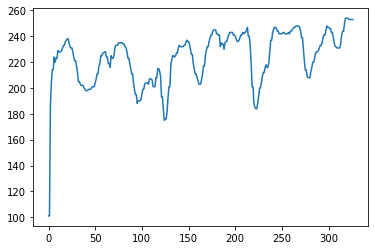



Point at jump: [(165, 2.2591093117408905)]


StatisticsError: variance requires at least two data points

In [16]:
#Scanning through all lines in the image for the first slope. 
#Each line, the g value is taken and added to the list 'vals'
#x1 is incremented and the slope is added onto y1
#Then the standard deviation along with the differences method is used to 
#check those with a value below 6 and add them to a best vals list. 
#22.5 / m1 = 39.84 (2 Decimal places)
m1 = 0.7530364372469636
image = Image.open('blur2.jpg')
imageWidth, imageHeight = image.size
goodDistanceValues = 0

all_distances=[]
bestVals = []
for x in range(int(imageWidth/2)):
    x1 = x
    y1 = 0
    vals = []
    points = []
    while ((x1<imageWidth) and (y1<imageHeight)):
        r, g, b = image.getpixel((x,y1))
        vals.append(g)
        points.append((x,y1))
        x1+=1
        y1+=m1
    plt.plot(vals)
    plt.show()
    print("Standard deviation " + str(stat.stdev(differences(vals, points))))
    if stat.stdev(differences(vals, points)) < 6:
        bestVals.append(differences(vals, points))
        plt.plot(vals)
        plt.show()
            
    #print(stat.mean(differences(vals)))
    print(bestVals)
    
    
    
    

In [18]:
#Distance between two points. Points taken from results above. 
#Test 1
#Points (0, 13.554655870445346)
#Points (0, 32.3805668016194)
#(0, 290.67206477733043)
#Distance = 39.58820127241216

#Test 2
#Point 1 = 0, 11.295546558704455)
#Points 0, 288.4129554655895
#Distance = 39.58820127241215

#First tried distance between the first and second jump which gave a distance of 18.825910931174057, nowhere near the 38 
#used in trial and error
#Changed it to get ditance between first and last jump, then divided it by 7 (number of jumps on graph) which gave
#a value of 39.58820127241216 which is a lot closer to the 38 value used later. 

#Distance Formula = SquareRoot((X2 - X1)^2 + (Y2 - Y1)^2)

X1 = 0
Y1 = 11.295546558704455

X2 = 0
Y2 = 288.4129554655895

distance = math.sqrt(pow(X2 - X1,2) + pow(Y2 - Y1, 2))

distance/7


39.58820127241215

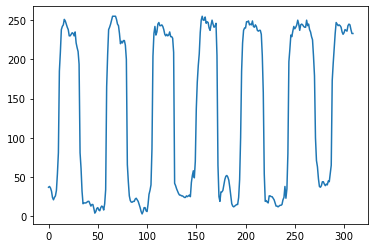



Point at jump: [(482.69455645161264, 11)]


Point at jump: [(482.69455645161264, 11), (466.8387096774186, 32)]


Point at jump: [(482.69455645161264, 11), (466.8387096774186, 32), (445.69758064515986, 60)]


Point at jump: [(482.69455645161264, 11), (466.8387096774186, 32), (445.69758064515986, 60), (430.5967741935465, 80)]


Point at jump: [(482.69455645161264, 11), (466.8387096774186, 32), (445.69758064515986, 60), (430.5967741935465, 80), (410.9657258064491, 106)]


Point at jump: [(482.69455645161264, 11), (466.8387096774186, 32), (445.69758064515986, 60), (430.5967741935465, 80), (410.9657258064491, 106), (394.35483870967437, 128)]


Point at jump: [(482.69455645161264, 11), (466.8387096774186, 32), (445.69758064515986, 60), (430.5967741935465, 80), (410.9657258064491, 106), (394.35483870967437, 128), (376.988911290319, 151)]


Point at jump: [(482.69455645161264, 11), (466.8387096774186, 32), (445.69758064515986, 60), (430.5967741935465, 80), (410.9657258064491, 106), (394.3548

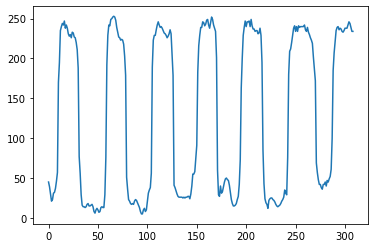



Point at jump: [(483.4495967741933, 10)]


Point at jump: [(483.4495967741933, 10), (466.8387096774186, 32)]


Point at jump: [(483.4495967741933, 10), (466.8387096774186, 32), (446.45262096774053, 59)]


Point at jump: [(483.4495967741933, 10), (466.8387096774186, 32), (446.45262096774053, 59), (431.35181451612715, 79)]


Point at jump: [(483.4495967741933, 10), (466.8387096774186, 32), (446.45262096774053, 59), (431.35181451612715, 79), (411.72076612902976, 105)]


Point at jump: [(483.4495967741933, 10), (466.8387096774186, 32), (446.45262096774053, 59), (431.35181451612715, 79), (411.72076612902976, 105), (395.10987903225504, 127)]


Point at jump: [(483.4495967741933, 10), (466.8387096774186, 32), (446.45262096774053, 59), (431.35181451612715, 79), (411.72076612902976, 105), (395.10987903225504, 127), (376.988911290319, 151)]


Point at jump: [(483.4495967741933, 10), (466.8387096774186, 32), (446.45262096774053, 59), (431.35181451612715, 79), (411.72076612902976, 105), (395.109

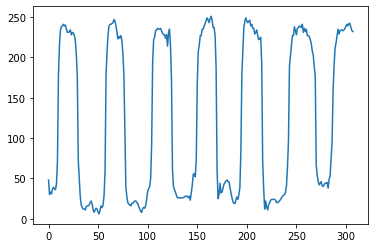



Point at jump: [(483.4495967741933, 10)]


Point at jump: [(483.4495967741933, 10), (468.34879032257993, 30)]


Point at jump: [(483.4495967741933, 10), (468.34879032257993, 30), (447.2076612903212, 58)]


Point at jump: [(483.4495967741933, 10), (468.34879032257993, 30), (447.2076612903212, 58), (432.1068548387078, 78)]


Point at jump: [(483.4495967741933, 10), (468.34879032257993, 30), (447.2076612903212, 58), (432.1068548387078, 78), (411.72076612902976, 105)]


Point at jump: [(483.4495967741933, 10), (468.34879032257993, 30), (447.2076612903212, 58), (432.1068548387078, 78), (411.72076612902976, 105), (396.6199596774164, 125)]


Point at jump: [(483.4495967741933, 10), (468.34879032257993, 30), (447.2076612903212, 58), (432.1068548387078, 78), (411.72076612902976, 105), (396.6199596774164, 125), (377.74395161289965, 150)]


Point at jump: [(483.4495967741933, 10), (468.34879032257993, 30), (447.2076612903212, 58), (432.1068548387078, 78), (411.72076612902976, 105), (396.6199596

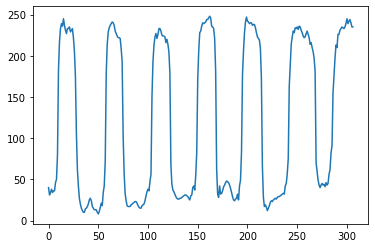



Point at jump: [(483.4495967741933, 10)]


Point at jump: [(483.4495967741933, 10), (469.1038306451606, 29)]


Point at jump: [(483.4495967741933, 10), (469.1038306451606, 29), (447.2076612903212, 58)]


Point at jump: [(483.4495967741933, 10), (469.1038306451606, 29), (447.2076612903212, 58), (433.61693548386916, 76)]


Point at jump: [(483.4495967741933, 10), (469.1038306451606, 29), (447.2076612903212, 58), (433.61693548386916, 76), (411.72076612902976, 105)]


Point at jump: [(483.4495967741933, 10), (469.1038306451606, 29), (447.2076612903212, 58), (433.61693548386916, 76), (411.72076612902976, 105), (398.1300403225777, 123)]


Point at jump: [(483.4495967741933, 10), (469.1038306451606, 29), (447.2076612903212, 58), (433.61693548386916, 76), (411.72076612902976, 105), (398.1300403225777, 123), (377.74395161289965, 150)]


Point at jump: [(483.4495967741933, 10), (469.1038306451606, 29), (447.2076612903212, 58), (433.61693548386916, 76), (411.72076612902976, 105), (398.130040322

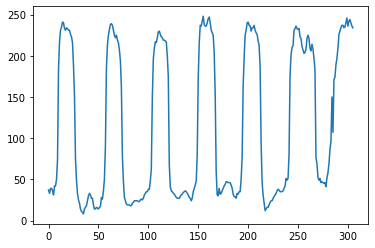



Point at jump: [(483.4495967741933, 10)]


Point at jump: [(483.4495967741933, 10), (470.61391129032194, 27)]


Point at jump: [(483.4495967741933, 10), (470.61391129032194, 27), (447.2076612903212, 58)]


Point at jump: [(483.4495967741933, 10), (470.61391129032194, 27), (447.2076612903212, 58), (435.1270161290305, 74)]


Point at jump: [(483.4495967741933, 10), (470.61391129032194, 27), (447.2076612903212, 58), (435.1270161290305, 74), (411.72076612902976, 105)]


Point at jump: [(483.4495967741933, 10), (470.61391129032194, 27), (447.2076612903212, 58), (435.1270161290305, 74), (411.72076612902976, 105), (399.64012096773905, 121)]


Point at jump: [(483.4495967741933, 10), (470.61391129032194, 27), (447.2076612903212, 58), (435.1270161290305, 74), (411.72076612902976, 105), (399.64012096773905, 121), (377.74395161289965, 150)]


Point at jump: [(483.4495967741933, 10), (470.61391129032194, 27), (447.2076612903212, 58), (435.1270161290305, 74), (411.72076612902976, 105), (399.64012

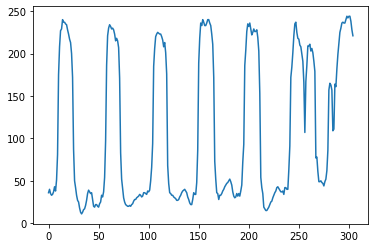



Point at jump: [(483.4495967741933, 10)]


Point at jump: [(483.4495967741933, 10), (471.3689516129026, 26)]


Point at jump: [(483.4495967741933, 10), (471.3689516129026, 26), (447.2076612903212, 58)]


Point at jump: [(483.4495967741933, 10), (471.3689516129026, 26), (447.2076612903212, 58), (436.63709677419183, 72)]


Point at jump: [(483.4495967741933, 10), (471.3689516129026, 26), (447.2076612903212, 58), (436.63709677419183, 72), (411.72076612902976, 105)]


Point at jump: [(483.4495967741933, 10), (471.3689516129026, 26), (447.2076612903212, 58), (436.63709677419183, 72), (411.72076612902976, 105), (401.1502016129004, 119)]


Point at jump: [(483.4495967741933, 10), (471.3689516129026, 26), (447.2076612903212, 58), (436.63709677419183, 72), (411.72076612902976, 105), (401.1502016129004, 119), (377.74395161289965, 150)]


Point at jump: [(483.4495967741933, 10), (471.3689516129026, 26), (447.2076612903212, 58), (436.63709677419183, 72), (411.72076612902976, 105), (401.150201612

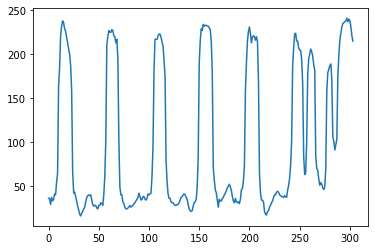



Point at jump: [(483.4495967741933, 10)]


Point at jump: [(483.4495967741933, 10), (472.1239919354833, 25)]


Point at jump: [(483.4495967741933, 10), (472.1239919354833, 25), (447.2076612903212, 58)]


Point at jump: [(483.4495967741933, 10), (472.1239919354833, 25), (447.2076612903212, 58), (438.14717741935317, 70)]


Point at jump: [(483.4495967741933, 10), (472.1239919354833, 25), (447.2076612903212, 58), (438.14717741935317, 70), (410.9657258064491, 106)]


Point at jump: [(483.4495967741933, 10), (472.1239919354833, 25), (447.2076612903212, 58), (438.14717741935317, 70), (410.9657258064491, 106), (402.6602822580617, 117)]


Point at jump: [(483.4495967741933, 10), (472.1239919354833, 25), (447.2076612903212, 58), (438.14717741935317, 70), (410.9657258064491, 106), (402.6602822580617, 117), (377.74395161289965, 150)]


Point at jump: [(483.4495967741933, 10), (472.1239919354833, 25), (447.2076612903212, 58), (438.14717741935317, 70), (410.9657258064491, 106), (402.6602822580617

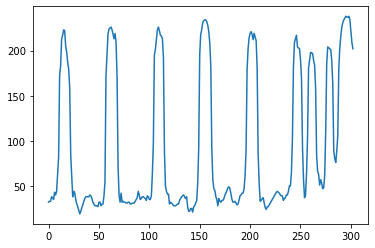



Point at jump: [(482.69455645161264, 11)]


Point at jump: [(482.69455645161264, 11), (473.6340725806446, 23)]


Point at jump: [(482.69455645161264, 11), (473.6340725806446, 23), (447.96270161290187, 57)]


Point at jump: [(482.69455645161264, 11), (473.6340725806446, 23), (447.96270161290187, 57), (438.90221774193384, 69)]


Point at jump: [(482.69455645161264, 11), (473.6340725806446, 23), (447.96270161290187, 57), (438.90221774193384, 69), (411.72076612902976, 105)]


Point at jump: [(482.69455645161264, 11), (473.6340725806446, 23), (447.96270161290187, 57), (438.90221774193384, 69), (411.72076612902976, 105), (404.17036290322307, 115)]


Point at jump: [(482.69455645161264, 11), (473.6340725806446, 23), (447.96270161290187, 57), (438.90221774193384, 69), (411.72076612902976, 105), (404.17036290322307, 115), (377.74395161289965, 150)]


Point at jump: [(482.69455645161264, 11), (473.6340725806446, 23), (447.96270161290187, 57), (438.90221774193384, 69), (411.72076612902976, 105)

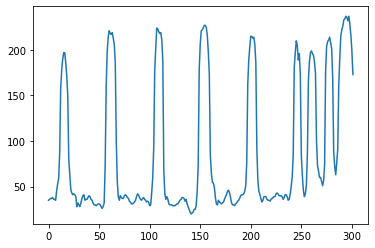



Point at jump: [(481.939516129032, 12)]


Point at jump: [(481.939516129032, 12), (474.3891129032253, 22)]


Point at jump: [(481.939516129032, 12), (474.3891129032253, 22), (447.96270161290187, 57)]


Point at jump: [(481.939516129032, 12), (474.3891129032253, 22), (447.96270161290187, 57), (439.6572580645145, 68)]


Point at jump: [(481.939516129032, 12), (474.3891129032253, 22), (447.96270161290187, 57), (439.6572580645145, 68), (411.72076612902976, 105)]


Point at jump: [(481.939516129032, 12), (474.3891129032253, 22), (447.96270161290187, 57), (439.6572580645145, 68), (411.72076612902976, 105), (404.92540322580373, 114)]


Point at jump: [(481.939516129032, 12), (474.3891129032253, 22), (447.96270161290187, 57), (439.6572580645145, 68), (411.72076612902976, 105), (404.92540322580373, 114), (378.4989919354803, 149)]


Point at jump: [(481.939516129032, 12), (474.3891129032253, 22), (447.96270161290187, 57), (439.6572580645145, 68), (411.72076612902976, 105), (404.92540322580373,

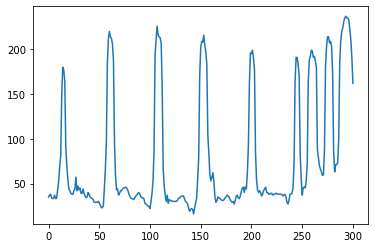



Point at jump: [(481.1844758064513, 13)]


Point at jump: [(481.1844758064513, 13), (475.8991935483866, 20)]


Point at jump: [(481.1844758064513, 13), (475.8991935483866, 20), (447.2076612903212, 58)]


Point at jump: [(481.1844758064513, 13), (475.8991935483866, 20), (447.2076612903212, 58), (441.16733870967585, 66)]


Point at jump: [(481.1844758064513, 13), (475.8991935483866, 20), (447.2076612903212, 58), (441.16733870967585, 66), (411.72076612902976, 105)]


Point at jump: [(481.1844758064513, 13), (475.8991935483866, 20), (447.2076612903212, 58), (441.16733870967585, 66), (411.72076612902976, 105), (405.6804435483844, 113)]


Point at jump: [(481.1844758064513, 13), (475.8991935483866, 20), (447.2076612903212, 58), (441.16733870967585, 66), (411.72076612902976, 105), (405.6804435483844, 113), (378.4989919354803, 149)]


Point at jump: [(481.1844758064513, 13), (475.8991935483866, 20), (447.2076612903212, 58), (441.16733870967585, 66), (411.72076612902976, 105), (405.6804435483

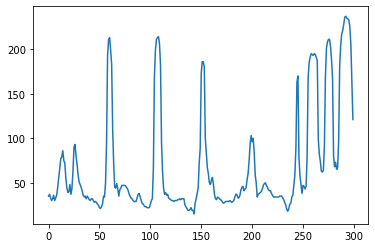



Point at jump: [(447.2076612903212, 58)]


Point at jump: [(447.2076612903212, 58), (442.6774193548372, 64)]


Point at jump: [(447.2076612903212, 58), (442.6774193548372, 64), (411.72076612902976, 105)]


Point at jump: [(447.2076612903212, 58), (442.6774193548372, 64), (411.72076612902976, 105), (407.19052419354574, 111)]


Point at jump: [(447.2076612903212, 58), (442.6774193548372, 64), (411.72076612902976, 105), (407.19052419354574, 111), (284.87399193547736, 273)]


Point at jump: [(447.2076612903212, 58), (442.6774193548372, 64), (411.72076612902976, 105), (407.19052419354574, 111), (284.87399193547736, 273), (279.5887096774127, 280)]


Point at jump: [(447.2076612903212, 58), (442.6774193548372, 64), (411.72076612902976, 105), (407.19052419354574, 111), (284.87399193547736, 273), (279.5887096774127, 280), (275.05846774192867, 286)]


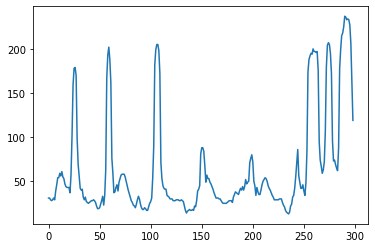



Point at jump: [(472.87903225806394, 24)]


Point at jump: [(472.87903225806394, 24), (468.34879032257993, 30)]


Point at jump: [(472.87903225806394, 24), (468.34879032257993, 30), (447.96270161290187, 57)]


Point at jump: [(472.87903225806394, 24), (468.34879032257993, 30), (447.96270161290187, 57), (443.43245967741785, 63)]


Point at jump: [(472.87903225806394, 24), (468.34879032257993, 30), (447.96270161290187, 57), (443.43245967741785, 63), (412.4758064516104, 104)]


Point at jump: [(472.87903225806394, 24), (468.34879032257993, 30), (447.96270161290187, 57), (443.43245967741785, 63), (412.4758064516104, 104), (407.9455645161264, 110)]


Point at jump: [(472.87903225806394, 24), (468.34879032257993, 30), (447.96270161290187, 57), (443.43245967741785, 63), (412.4758064516104, 104), (407.9455645161264, 110), (299.2197580645101, 254)]


Point at jump: [(472.87903225806394, 24), (468.34879032257993, 30), (447.96270161290187, 57), (443.43245967741785, 63), (412.4758064516104, 104)

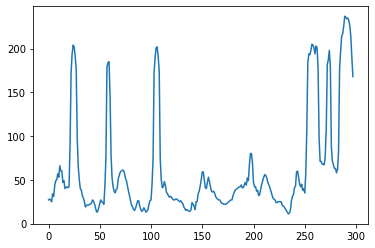



Point at jump: [(474.3891129032253, 22)]


Point at jump: [(474.3891129032253, 22), (469.1038306451606, 29)]


Point at jump: [(474.3891129032253, 22), (469.1038306451606, 29), (447.96270161290187, 57)]


Point at jump: [(474.3891129032253, 22), (469.1038306451606, 29), (447.96270161290187, 57), (444.9425403225792, 61)]


Point at jump: [(474.3891129032253, 22), (469.1038306451606, 29), (447.96270161290187, 57), (444.9425403225792, 61), (412.4758064516104, 104)]


Point at jump: [(474.3891129032253, 22), (469.1038306451606, 29), (447.96270161290187, 57), (444.9425403225792, 61), (412.4758064516104, 104), (408.7006048387071, 109)]


Point at jump: [(474.3891129032253, 22), (469.1038306451606, 29), (447.96270161290187, 57), (444.9425403225792, 61), (412.4758064516104, 104), (408.7006048387071, 109), (299.97479838709074, 253)]


Point at jump: [(474.3891129032253, 22), (469.1038306451606, 29), (447.96270161290187, 57), (444.9425403225792, 61), (412.4758064516104, 104), (408.700604838707

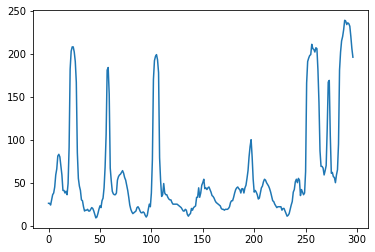



Point at jump: [(475.14415322580595, 21)]


Point at jump: [(475.14415322580595, 21), (469.1038306451606, 29)]


Point at jump: [(475.14415322580595, 21), (469.1038306451606, 29), (447.96270161290187, 57)]


Point at jump: [(475.14415322580595, 21), (469.1038306451606, 29), (447.96270161290187, 57), (445.69758064515986, 60)]


Point at jump: [(475.14415322580595, 21), (469.1038306451606, 29), (447.96270161290187, 57), (445.69758064515986, 60), (413.98588709677176, 102)]


Point at jump: [(475.14415322580595, 21), (469.1038306451606, 29), (447.96270161290187, 57), (445.69758064515986, 60), (413.98588709677176, 102), (408.7006048387071, 109)]


Point at jump: [(475.14415322580595, 21), (469.1038306451606, 29), (447.96270161290187, 57), (445.69758064515986, 60), (413.98588709677176, 102), (408.7006048387071, 109), (301.4848790322521, 251)]


Point at jump: [(475.14415322580595, 21), (469.1038306451606, 29), (447.96270161290187, 57), (445.69758064515986, 60), (413.98588709677176, 102), (

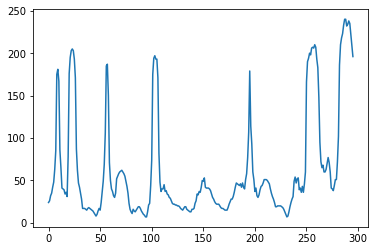



Point at jump: [(484.95967741935465, 8)]


Point at jump: [(484.95967741935465, 8), (481.939516129032, 12)]


Point at jump: [(484.95967741935465, 8), (481.939516129032, 12), (475.8991935483866, 20)]


Point at jump: [(484.95967741935465, 8), (481.939516129032, 12), (475.8991935483866, 20), (469.85887096774127, 28)]


Point at jump: [(484.95967741935465, 8), (481.939516129032, 12), (475.8991935483866, 20), (469.85887096774127, 28), (448.71774193548254, 56)]


Point at jump: [(484.95967741935465, 8), (481.939516129032, 12), (475.8991935483866, 20), (469.85887096774127, 28), (448.71774193548254, 56), (446.45262096774053, 59)]


Point at jump: [(484.95967741935465, 8), (481.939516129032, 12), (475.8991935483866, 20), (469.85887096774127, 28), (448.71774193548254, 56), (446.45262096774053, 59), (414.74092741935243, 101)]


Point at jump: [(484.95967741935465, 8), (481.939516129032, 12), (475.8991935483866, 20), (469.85887096774127, 28), (448.71774193548254, 56), (446.45262096774053, 59),

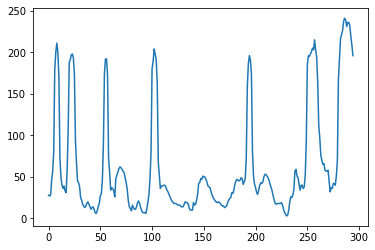



Point at jump: [(486.469758064516, 6)]


Point at jump: [(486.469758064516, 6), (482.69455645161264, 11)]


Point at jump: [(486.469758064516, 6), (482.69455645161264, 11), (475.8991935483866, 20)]


Point at jump: [(486.469758064516, 6), (482.69455645161264, 11), (475.8991935483866, 20), (470.61391129032194, 27)]


Point at jump: [(486.469758064516, 6), (482.69455645161264, 11), (475.8991935483866, 20), (470.61391129032194, 27), (450.2278225806439, 54)]


Point at jump: [(486.469758064516, 6), (482.69455645161264, 11), (475.8991935483866, 20), (470.61391129032194, 27), (450.2278225806439, 54), (447.2076612903212, 58)]


Point at jump: [(486.469758064516, 6), (482.69455645161264, 11), (475.8991935483866, 20), (470.61391129032194, 27), (450.2278225806439, 54), (447.2076612903212, 58), (415.4959677419331, 100)]


Point at jump: [(486.469758064516, 6), (482.69455645161264, 11), (475.8991935483866, 20), (470.61391129032194, 27), (450.2278225806439, 54), (447.2076612903212, 58), (415.4959

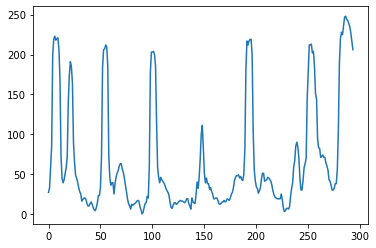



Point at jump: [(487.9798387096773, 4)]


Point at jump: [(487.9798387096773, 4), (481.939516129032, 12)]


Point at jump: [(487.9798387096773, 4), (481.939516129032, 12), (475.8991935483866, 20)]


Point at jump: [(487.9798387096773, 4), (481.939516129032, 12), (475.8991935483866, 20), (472.1239919354833, 25)]


Point at jump: [(487.9798387096773, 4), (481.939516129032, 12), (475.8991935483866, 20), (472.1239919354833, 25), (451.7379032258052, 52)]


Point at jump: [(487.9798387096773, 4), (481.939516129032, 12), (475.8991935483866, 20), (472.1239919354833, 25), (451.7379032258052, 52), (447.2076612903212, 58)]


Point at jump: [(487.9798387096773, 4), (481.939516129032, 12), (475.8991935483866, 20), (472.1239919354833, 25), (451.7379032258052, 52), (447.2076612903212, 58), (417.00604838709444, 98)]


Point at jump: [(487.9798387096773, 4), (481.939516129032, 12), (475.8991935483866, 20), (472.1239919354833, 25), (451.7379032258052, 52), (447.2076612903212, 58), (417.00604838709444,

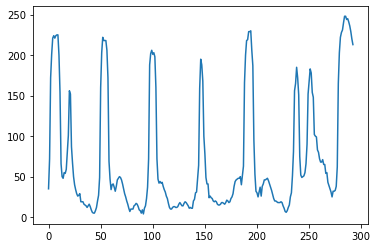



Point at jump: [(489.48991935483866, 2)]


Point at jump: [(489.48991935483866, 2), (481.939516129032, 12)]


Point at jump: [(489.48991935483866, 2), (481.939516129032, 12), (452.4929435483859, 51)]


Point at jump: [(489.48991935483866, 2), (481.939516129032, 12), (452.4929435483859, 51), (447.2076612903212, 58)]


Point at jump: [(489.48991935483866, 2), (481.939516129032, 12), (452.4929435483859, 51), (447.2076612903212, 58), (417.7610887096751, 97)]


Point at jump: [(489.48991935483866, 2), (481.939516129032, 12), (452.4929435483859, 51), (447.2076612903212, 58), (417.7610887096751, 97), (412.4758064516104, 104)]


Point at jump: [(489.48991935483866, 2), (481.939516129032, 12), (452.4929435483859, 51), (447.2076612903212, 58), (417.7610887096751, 97), (412.4758064516104, 104), (380.7641129032223, 146)]


Point at jump: [(489.48991935483866, 2), (481.939516129032, 12), (452.4929435483859, 51), (447.2076612903212, 58), (417.7610887096751, 97), (412.4758064516104, 104), (380.7641

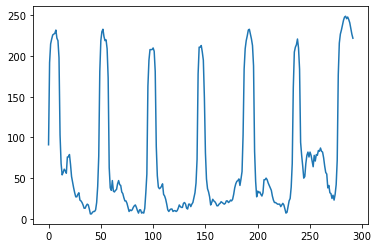



Point at jump: [(490.24495967741933, 1)]


Point at jump: [(490.24495967741933, 1), (481.939516129032, 12)]


Point at jump: [(490.24495967741933, 1), (481.939516129032, 12), (454.0030241935472, 49)]


Point at jump: [(490.24495967741933, 1), (481.939516129032, 12), (454.0030241935472, 49), (447.2076612903212, 58)]


Point at jump: [(490.24495967741933, 1), (481.939516129032, 12), (454.0030241935472, 49), (447.2076612903212, 58), (418.5161290322558, 96)]


Point at jump: [(490.24495967741933, 1), (481.939516129032, 12), (454.0030241935472, 49), (447.2076612903212, 58), (418.5161290322558, 96), (413.2308467741911, 103)]


Point at jump: [(490.24495967741933, 1), (481.939516129032, 12), (454.0030241935472, 49), (447.2076612903212, 58), (418.5161290322558, 96), (413.2308467741911, 103), (382.27419354838366, 144)]


Point at jump: [(490.24495967741933, 1), (481.939516129032, 12), (454.0030241935472, 49), (447.2076612903212, 58), (418.5161290322558, 96), (413.2308467741911, 103), (382.274

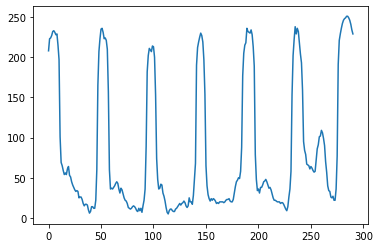



Point at jump: [(482.69455645161264, 11)]


Point at jump: [(482.69455645161264, 11), (454.7580645161279, 48)]


Point at jump: [(482.69455645161264, 11), (454.7580645161279, 48), (447.2076612903212, 58)]


Point at jump: [(482.69455645161264, 11), (454.7580645161279, 48), (447.2076612903212, 58), (420.0262096774171, 94)]


Point at jump: [(482.69455645161264, 11), (454.7580645161279, 48), (447.2076612903212, 58), (420.0262096774171, 94), (413.2308467741911, 103)]


Point at jump: [(482.69455645161264, 11), (454.7580645161279, 48), (447.2076612903212, 58), (420.0262096774171, 94), (413.2308467741911, 103), (384.53931451612567, 141)]


Point at jump: [(482.69455645161264, 11), (454.7580645161279, 48), (447.2076612903212, 58), (420.0262096774171, 94), (413.2308467741911, 103), (384.53931451612567, 141), (377.74395161289965, 150)]


Point at jump: [(482.69455645161264, 11), (454.7580645161279, 48), (447.2076612903212, 58), (420.0262096774171, 94), (413.2308467741911, 103), (384.53931451

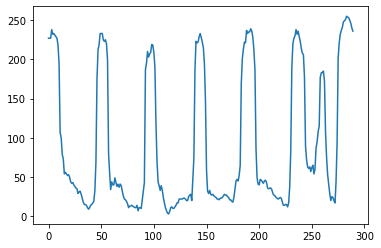



Point at jump: [(482.69455645161264, 11)]


Point at jump: [(482.69455645161264, 11), (455.51310483870856, 47)]


Point at jump: [(482.69455645161264, 11), (455.51310483870856, 47), (447.96270161290187, 57)]


Point at jump: [(482.69455645161264, 11), (455.51310483870856, 47), (447.96270161290187, 57), (421.53629032257845, 92)]


Point at jump: [(482.69455645161264, 11), (455.51310483870856, 47), (447.96270161290187, 57), (421.53629032257845, 92), (413.2308467741911, 103)]


Point at jump: [(482.69455645161264, 11), (455.51310483870856, 47), (447.96270161290187, 57), (421.53629032257845, 92), (413.2308467741911, 103), (386.049395161287, 139)]


Point at jump: [(482.69455645161264, 11), (455.51310483870856, 47), (447.96270161290187, 57), (421.53629032257845, 92), (413.2308467741911, 103), (386.049395161287, 139), (377.74395161289965, 150)]


Point at jump: [(482.69455645161264, 11), (455.51310483870856, 47), (447.96270161290187, 57), (421.53629032257845, 92), (413.2308467741911, 103),

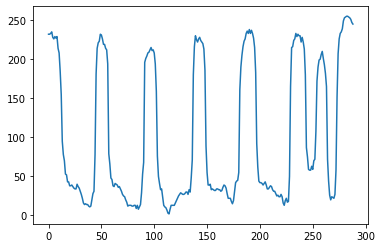



Point at jump: [(481.1844758064513, 13)]


Point at jump: [(481.1844758064513, 13), (456.2681451612892, 46)]


Point at jump: [(481.1844758064513, 13), (456.2681451612892, 46), (447.96270161290187, 57)]


Point at jump: [(481.1844758064513, 13), (456.2681451612892, 46), (447.96270161290187, 57), (422.2913306451591, 91)]


Point at jump: [(481.1844758064513, 13), (456.2681451612892, 46), (447.96270161290187, 57), (422.2913306451591, 91), (413.2308467741911, 103)]


Point at jump: [(481.1844758064513, 13), (456.2681451612892, 46), (447.96270161290187, 57), (422.2913306451591, 91), (413.2308467741911, 103), (387.55947580644835, 137)]


Point at jump: [(481.1844758064513, 13), (456.2681451612892, 46), (447.96270161290187, 57), (422.2913306451591, 91), (413.2308467741911, 103), (387.55947580644835, 137), (377.74395161289965, 150)]


Point at jump: [(481.1844758064513, 13), (456.2681451612892, 46), (447.96270161290187, 57), (422.2913306451591, 91), (413.2308467741911, 103), (387.5594758064

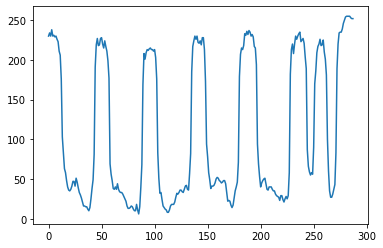



Point at jump: [(481.1844758064513, 13)]


Point at jump: [(481.1844758064513, 13), (457.0231854838699, 45)]


Point at jump: [(481.1844758064513, 13), (457.0231854838699, 45), (447.2076612903212, 58)]


Point at jump: [(481.1844758064513, 13), (457.0231854838699, 45), (447.2076612903212, 58), (423.0463709677398, 90)]


Point at jump: [(481.1844758064513, 13), (457.0231854838699, 45), (447.2076612903212, 58), (423.0463709677398, 90), (413.2308467741911, 103)]


Point at jump: [(481.1844758064513, 13), (457.0231854838699, 45), (447.2076612903212, 58), (423.0463709677398, 90), (413.2308467741911, 103), (389.0695564516097, 135)]


Point at jump: [(481.1844758064513, 13), (457.0231854838699, 45), (447.2076612903212, 58), (423.0463709677398, 90), (413.2308467741911, 103), (389.0695564516097, 135), (377.74395161289965, 150)]


Point at jump: [(481.1844758064513, 13), (457.0231854838699, 45), (447.2076612903212, 58), (423.0463709677398, 90), (413.2308467741911, 103), (389.0695564516097, 135

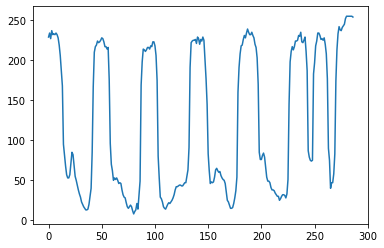



Point at jump: [(480.42943548387063, 14)]


Point at jump: [(480.42943548387063, 14), (458.53326612903123, 43)]


Point at jump: [(480.42943548387063, 14), (458.53326612903123, 43), (447.2076612903212, 58)]


Point at jump: [(480.42943548387063, 14), (458.53326612903123, 43), (447.2076612903212, 58), (424.5564516129011, 88)]


Point at jump: [(480.42943548387063, 14), (458.53326612903123, 43), (447.2076612903212, 58), (424.5564516129011, 88), (413.2308467741911, 103)]


Point at jump: [(480.42943548387063, 14), (458.53326612903123, 43), (447.2076612903212, 58), (424.5564516129011, 88), (413.2308467741911, 103), (390.579637096771, 133)]


Point at jump: [(480.42943548387063, 14), (458.53326612903123, 43), (447.2076612903212, 58), (424.5564516129011, 88), (413.2308467741911, 103), (390.579637096771, 133), (377.74395161289965, 150)]


Point at jump: [(480.42943548387063, 14), (458.53326612903123, 43), (447.2076612903212, 58), (424.5564516129011, 88), (413.2308467741911, 103), (390.57963

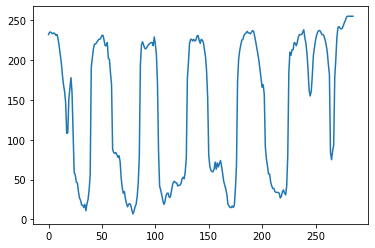



Point at jump: [(478.1643145161286, 17)]


Point at jump: [(478.1643145161286, 17), (459.2883064516119, 42)]


Point at jump: [(478.1643145161286, 17), (459.2883064516119, 42), (445.69758064515986, 60)]


Point at jump: [(478.1643145161286, 17), (459.2883064516119, 42), (445.69758064515986, 60), (426.06653225806247, 86)]


Point at jump: [(478.1643145161286, 17), (459.2883064516119, 42), (445.69758064515986, 60), (426.06653225806247, 86), (413.2308467741911, 103)]


Point at jump: [(478.1643145161286, 17), (459.2883064516119, 42), (445.69758064515986, 60), (426.06653225806247, 86), (413.2308467741911, 103), (392.08971774193236, 131)]


Point at jump: [(478.1643145161286, 17), (459.2883064516119, 42), (445.69758064515986, 60), (426.06653225806247, 86), (413.2308467741911, 103), (392.08971774193236, 131), (377.74395161289965, 150)]


Point at jump: [(478.1643145161286, 17), (459.2883064516119, 42), (445.69758064515986, 60), (426.06653225806247, 86), (413.2308467741911, 103), (392.08971

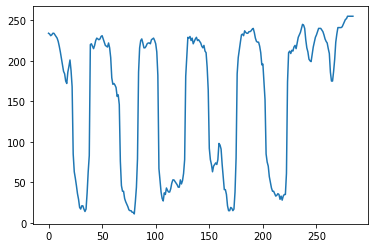



Point at jump: [(473.6340725806446, 23)]


Point at jump: [(473.6340725806446, 23), (461.5534274193539, 39)]


Point at jump: [(473.6340725806446, 23), (461.5534274193539, 39), (440.4122983870952, 67)]


Point at jump: [(473.6340725806446, 23), (461.5534274193539, 39), (440.4122983870952, 67), (427.5766129032238, 84)]


Point at jump: [(473.6340725806446, 23), (461.5534274193539, 39), (440.4122983870952, 67), (427.5766129032238, 84), (413.2308467741911, 103)]


Point at jump: [(473.6340725806446, 23), (461.5534274193539, 39), (440.4122983870952, 67), (427.5766129032238, 84), (413.2308467741911, 103), (394.35483870967437, 128)]


Point at jump: [(473.6340725806446, 23), (461.5534274193539, 39), (440.4122983870952, 67), (427.5766129032238, 84), (413.2308467741911, 103), (394.35483870967437, 128), (376.988911290319, 151)]


Point at jump: [(473.6340725806446, 23), (461.5534274193539, 39), (440.4122983870952, 67), (427.5766129032238, 84), (413.2308467741911, 103), (394.35483870967437, 12

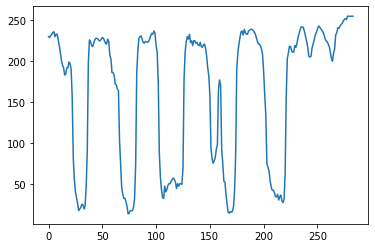



Point at jump: [(473.6340725806446, 23)]


Point at jump: [(473.6340725806446, 23), (463.06350806451525, 37)]


Point at jump: [(473.6340725806446, 23), (463.06350806451525, 37), (440.4122983870952, 67)]


Point at jump: [(473.6340725806446, 23), (463.06350806451525, 37), (440.4122983870952, 67), (429.08669354838514, 82)]


Point at jump: [(473.6340725806446, 23), (463.06350806451525, 37), (440.4122983870952, 67), (429.08669354838514, 82), (412.4758064516104, 104)]


Point at jump: [(473.6340725806446, 23), (463.06350806451525, 37), (440.4122983870952, 67), (429.08669354838514, 82), (412.4758064516104, 104), (395.8649193548357, 126)]


Point at jump: [(473.6340725806446, 23), (463.06350806451525, 37), (440.4122983870952, 67), (429.08669354838514, 82), (412.4758064516104, 104), (395.8649193548357, 126), (375.47883064515764, 153)]


Point at jump: [(473.6340725806446, 23), (463.06350806451525, 37), (440.4122983870952, 67), (429.08669354838514, 82), (412.4758064516104, 104), (395.864919

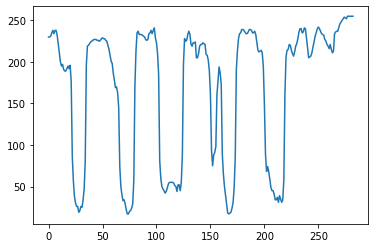



Point at jump: [(474.3891129032253, 22)]


Point at jump: [(474.3891129032253, 22), (464.5735887096766, 35)]


Point at jump: [(474.3891129032253, 22), (464.5735887096766, 35), (441.16733870967585, 66)]


Point at jump: [(474.3891129032253, 22), (464.5735887096766, 35), (441.16733870967585, 66), (429.8417338709658, 81)]


Point at jump: [(474.3891129032253, 22), (464.5735887096766, 35), (441.16733870967585, 66), (429.8417338709658, 81), (413.2308467741911, 103)]


Point at jump: [(474.3891129032253, 22), (464.5735887096766, 35), (441.16733870967585, 66), (429.8417338709658, 81), (413.2308467741911, 103), (396.6199596774164, 125)]


Point at jump: [(474.3891129032253, 22), (464.5735887096766, 35), (441.16733870967585, 66), (429.8417338709658, 81), (413.2308467741911, 103), (396.6199596774164, 125), (376.988911290319, 151)]


Point at jump: [(474.3891129032253, 22), (464.5735887096766, 35), (441.16733870967585, 66), (429.8417338709658, 81), (413.2308467741911, 103), (396.6199596774164,

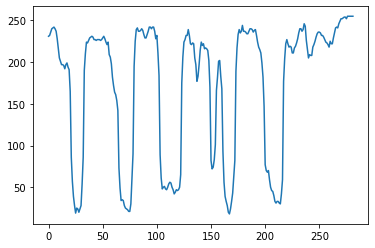



Point at jump: [(475.14415322580595, 21)]


Point at jump: [(475.14415322580595, 21), (466.0836693548379, 33)]


Point at jump: [(475.14415322580595, 21), (466.0836693548379, 33), (441.9223790322565, 65)]


Point at jump: [(475.14415322580595, 21), (466.0836693548379, 33), (441.9223790322565, 65), (431.35181451612715, 79)]


Point at jump: [(475.14415322580595, 21), (466.0836693548379, 33), (441.9223790322565, 65), (431.35181451612715, 79), (413.2308467741911, 103)]


Point at jump: [(475.14415322580595, 21), (466.0836693548379, 33), (441.9223790322565, 65), (431.35181451612715, 79), (413.2308467741911, 103), (397.37499999999704, 124)]


Point at jump: [(475.14415322580595, 21), (466.0836693548379, 33), (441.9223790322565, 65), (431.35181451612715, 79), (413.2308467741911, 103), (397.37499999999704, 124), (377.74395161289965, 150)]


Point at jump: [(475.14415322580595, 21), (466.0836693548379, 33), (441.9223790322565, 65), (431.35181451612715, 79), (413.2308467741911, 103), (397.374

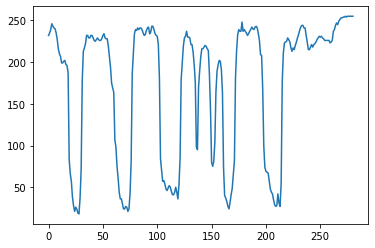



Point at jump: [(476.6542338709673, 19)]


Point at jump: [(476.6542338709673, 19), (466.8387096774186, 32)]


Point at jump: [(476.6542338709673, 19), (466.8387096774186, 32), (444.9425403225792, 61)]


Point at jump: [(476.6542338709673, 19), (466.8387096774186, 32), (444.9425403225792, 61), (432.1068548387078, 78)]


Point at jump: [(476.6542338709673, 19), (466.8387096774186, 32), (444.9425403225792, 61), (432.1068548387078, 78), (413.2308467741911, 103)]


Point at jump: [(476.6542338709673, 19), (466.8387096774186, 32), (444.9425403225792, 61), (432.1068548387078, 78), (413.2308467741911, 103), (398.1300403225777, 123)]


Point at jump: [(476.6542338709673, 19), (466.8387096774186, 32), (444.9425403225792, 61), (432.1068548387078, 78), (413.2308467741911, 103), (398.1300403225777, 123), (388.314516129029, 136)]


Point at jump: [(476.6542338709673, 19), (466.8387096774186, 32), (444.9425403225792, 61), (432.1068548387078, 78), (413.2308467741911, 103), (398.1300403225777, 123),

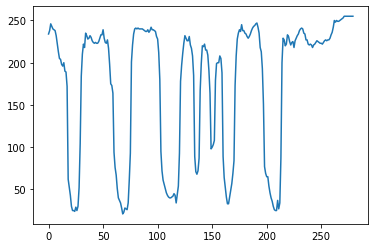



Point at jump: [(477.40927419354796, 18)]


Point at jump: [(477.40927419354796, 18), (468.34879032257993, 30)]


Point at jump: [(477.40927419354796, 18), (468.34879032257993, 30), (444.9425403225792, 61)]


Point at jump: [(477.40927419354796, 18), (468.34879032257993, 30), (444.9425403225792, 61), (433.61693548386916, 76)]


Point at jump: [(477.40927419354796, 18), (468.34879032257993, 30), (444.9425403225792, 61), (433.61693548386916, 76), (413.2308467741911, 103)]


Point at jump: [(477.40927419354796, 18), (468.34879032257993, 30), (444.9425403225792, 61), (433.61693548386916, 76), (413.2308467741911, 103), (398.8850806451584, 122)]


Point at jump: [(477.40927419354796, 18), (468.34879032257993, 30), (444.9425403225792, 61), (433.61693548386916, 76), (413.2308467741911, 103), (398.8850806451584, 122), (389.82459677419035, 134)]


Point at jump: [(477.40927419354796, 18), (468.34879032257993, 30), (444.9425403225792, 61), (433.61693548386916, 76), (413.2308467741911, 103), (39

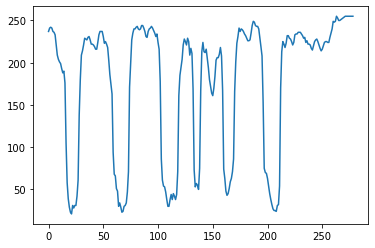



Point at jump: [(478.9193548387093, 16)]


Point at jump: [(478.9193548387093, 16), (468.34879032257993, 30)]


Point at jump: [(478.9193548387093, 16), (468.34879032257993, 30), (446.45262096774053, 59)]


Point at jump: [(478.9193548387093, 16), (468.34879032257993, 30), (446.45262096774053, 59), (434.3719758064498, 75)]


Point at jump: [(478.9193548387093, 16), (468.34879032257993, 30), (446.45262096774053, 59), (434.3719758064498, 75), (413.2308467741911, 103)]


Point at jump: [(478.9193548387093, 16), (468.34879032257993, 30), (446.45262096774053, 59), (434.3719758064498, 75), (413.2308467741911, 103), (399.64012096773905, 121)]


Point at jump: [(478.9193548387093, 16), (468.34879032257993, 30), (446.45262096774053, 59), (434.3719758064498, 75), (413.2308467741911, 103), (399.64012096773905, 121), (390.579637096771, 133)]


Point at jump: [(478.9193548387093, 16), (468.34879032257993, 30), (446.45262096774053, 59), (434.3719758064498, 75), (413.2308467741911, 103), (399.64012

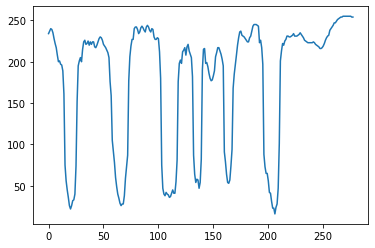



Point at jump: [(479.67439516128997, 15)]


Point at jump: [(479.67439516128997, 15), (470.61391129032194, 27)]


Point at jump: [(479.67439516128997, 15), (470.61391129032194, 27), (446.45262096774053, 59)]


Point at jump: [(479.67439516128997, 15), (470.61391129032194, 27), (446.45262096774053, 59), (435.1270161290305, 74)]


Point at jump: [(479.67439516128997, 15), (470.61391129032194, 27), (446.45262096774053, 59), (435.1270161290305, 74), (413.2308467741911, 103)]


Point at jump: [(479.67439516128997, 15), (470.61391129032194, 27), (446.45262096774053, 59), (435.1270161290305, 74), (413.2308467741911, 103), (401.90524193548106, 118)]


Point at jump: [(479.67439516128997, 15), (470.61391129032194, 27), (446.45262096774053, 59), (435.1270161290305, 74), (413.2308467741911, 103), (401.90524193548106, 118), (390.579637096771, 133)]


Point at jump: [(479.67439516128997, 15), (470.61391129032194, 27), (446.45262096774053, 59), (435.1270161290305, 74), (413.2308467741911, 103), (4

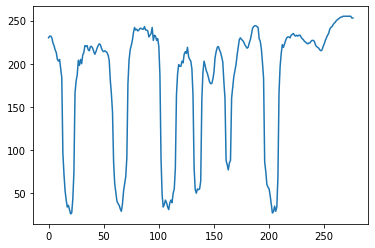



Point at jump: [(481.1844758064513, 13)]


Point at jump: [(481.1844758064513, 13), (470.61391129032194, 27)]


Point at jump: [(481.1844758064513, 13), (470.61391129032194, 27), (446.45262096774053, 59)]


Point at jump: [(481.1844758064513, 13), (470.61391129032194, 27), (446.45262096774053, 59), (435.88205645161116, 73)]


Point at jump: [(481.1844758064513, 13), (470.61391129032194, 27), (446.45262096774053, 59), (435.88205645161116, 73), (413.98588709677176, 102)]


Point at jump: [(481.1844758064513, 13), (470.61391129032194, 27), (446.45262096774053, 59), (435.88205645161116, 73), (413.98588709677176, 102), (401.90524193548106, 118)]


Point at jump: [(481.1844758064513, 13), (470.61391129032194, 27), (446.45262096774053, 59), (435.88205645161116, 73), (413.98588709677176, 102), (401.90524193548106, 118), (391.3346774193517, 132)]


Point at jump: [(481.1844758064513, 13), (470.61391129032194, 27), (446.45262096774053, 59), (435.88205645161116, 73), (413.98588709677176, 102), 

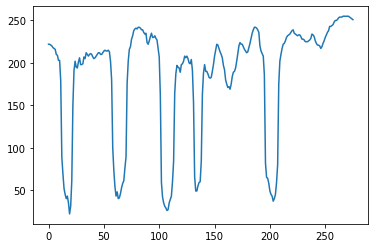



Point at jump: [(481.939516129032, 12)]


Point at jump: [(481.939516129032, 12), (473.6340725806446, 23)]


Point at jump: [(481.939516129032, 12), (473.6340725806446, 23), (446.45262096774053, 59)]


Point at jump: [(481.939516129032, 12), (473.6340725806446, 23), (446.45262096774053, 59), (437.3921370967725, 71)]


Point at jump: [(481.939516129032, 12), (473.6340725806446, 23), (446.45262096774053, 59), (437.3921370967725, 71), (413.98588709677176, 102)]


Point at jump: [(481.939516129032, 12), (473.6340725806446, 23), (446.45262096774053, 59), (437.3921370967725, 71), (413.98588709677176, 102), (404.92540322580373, 114)]


Point at jump: [(481.939516129032, 12), (473.6340725806446, 23), (446.45262096774053, 59), (437.3921370967725, 71), (413.98588709677176, 102), (404.92540322580373, 114), (390.579637096771, 133)]


Point at jump: [(481.939516129032, 12), (473.6340725806446, 23), (446.45262096774053, 59), (437.3921370967725, 71), (413.98588709677176, 102), (404.92540322580373, 

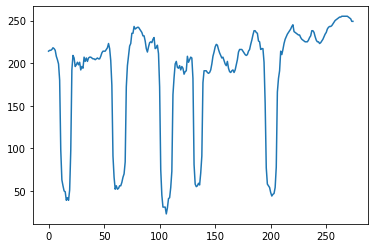



Point at jump: [(482.69455645161264, 11)]


Point at jump: [(482.69455645161264, 11), (474.3891129032253, 22)]


Point at jump: [(482.69455645161264, 11), (474.3891129032253, 22), (447.2076612903212, 58)]


Point at jump: [(482.69455645161264, 11), (474.3891129032253, 22), (447.2076612903212, 58), (437.3921370967725, 71)]


Point at jump: [(482.69455645161264, 11), (474.3891129032253, 22), (447.2076612903212, 58), (437.3921370967725, 71), (414.74092741935243, 101)]


Point at jump: [(482.69455645161264, 11), (474.3891129032253, 22), (447.2076612903212, 58), (437.3921370967725, 71), (414.74092741935243, 101), (405.6804435483844, 113)]


Point at jump: [(482.69455645161264, 11), (474.3891129032253, 22), (447.2076612903212, 58), (437.3921370967725, 71), (414.74092741935243, 101), (405.6804435483844, 113), (392.08971774193236, 131)]


Point at jump: [(482.69455645161264, 11), (474.3891129032253, 22), (447.2076612903212, 58), (437.3921370967725, 71), (414.74092741935243, 101), (405.680443

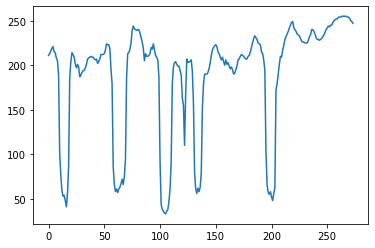



Point at jump: [(483.4495967741933, 10)]


Point at jump: [(483.4495967741933, 10), (475.8991935483866, 20)]


Point at jump: [(483.4495967741933, 10), (475.8991935483866, 20), (447.2076612903212, 58)]


Point at jump: [(483.4495967741933, 10), (475.8991935483866, 20), (447.2076612903212, 58), (437.3921370967725, 71)]


Point at jump: [(483.4495967741933, 10), (475.8991935483866, 20), (447.2076612903212, 58), (437.3921370967725, 71), (415.4959677419331, 100)]


Point at jump: [(483.4495967741933, 10), (475.8991935483866, 20), (447.2076612903212, 58), (437.3921370967725, 71), (415.4959677419331, 100), (406.4354838709651, 112)]


Point at jump: [(483.4495967741933, 10), (475.8991935483866, 20), (447.2076612903212, 58), (437.3921370967725, 71), (415.4959677419331, 100), (406.4354838709651, 112), (392.08971774193236, 131)]


Point at jump: [(483.4495967741933, 10), (475.8991935483866, 20), (447.2076612903212, 58), (437.3921370967725, 71), (415.4959677419331, 100), (406.4354838709651, 112

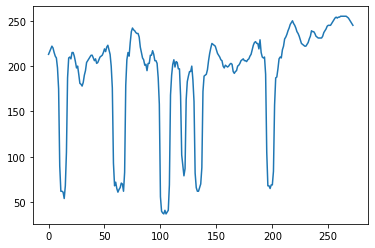



Point at jump: [(483.4495967741933, 10)]


Point at jump: [(483.4495967741933, 10), (477.40927419354796, 18)]


Point at jump: [(483.4495967741933, 10), (477.40927419354796, 18), (447.2076612903212, 58)]


Point at jump: [(483.4495967741933, 10), (477.40927419354796, 18), (447.2076612903212, 58), (438.14717741935317, 70)]


Point at jump: [(483.4495967741933, 10), (477.40927419354796, 18), (447.2076612903212, 58), (438.14717741935317, 70), (415.4959677419331, 100)]


Point at jump: [(483.4495967741933, 10), (477.40927419354796, 18), (447.2076612903212, 58), (438.14717741935317, 70), (415.4959677419331, 100), (408.7006048387071, 109)]


Point at jump: [(483.4495967741933, 10), (477.40927419354796, 18), (447.2076612903212, 58), (438.14717741935317, 70), (415.4959677419331, 100), (408.7006048387071, 109), (391.3346774193517, 132)]


Point at jump: [(483.4495967741933, 10), (477.40927419354796, 18), (447.2076612903212, 58), (438.14717741935317, 70), (415.4959677419331, 100), (408.7006048

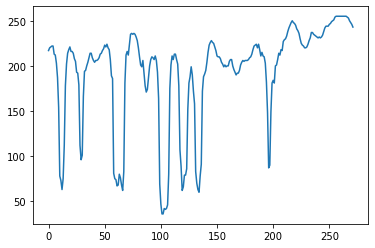



Point at jump: [(483.4495967741933, 10)]


Point at jump: [(483.4495967741933, 10), (478.9193548387093, 16)]


Point at jump: [(483.4495967741933, 10), (478.9193548387093, 16), (469.1038306451606, 29)]


Point at jump: [(483.4495967741933, 10), (478.9193548387093, 16), (469.1038306451606, 29), (465.32862903225725, 34)]


Point at jump: [(483.4495967741933, 10), (478.9193548387093, 16), (469.1038306451606, 29), (465.32862903225725, 34), (447.2076612903212, 58)]


Point at jump: [(483.4495967741933, 10), (478.9193548387093, 16), (469.1038306451606, 29), (465.32862903225725, 34), (447.2076612903212, 58), (438.90221774193384, 69)]


Point at jump: [(483.4495967741933, 10), (478.9193548387093, 16), (469.1038306451606, 29), (465.32862903225725, 34), (447.2076612903212, 58), (438.90221774193384, 69), (416.25100806451377, 99)]


Point at jump: [(483.4495967741933, 10), (478.9193548387093, 16), (469.1038306451606, 29), (465.32862903225725, 34), (447.2076612903212, 58), (438.90221774193384, 69

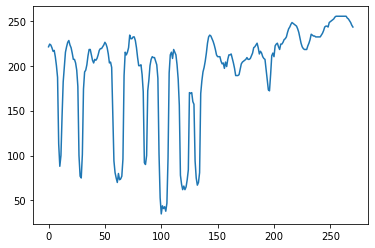



Point at jump: [(484.204637096774, 9)]


Point at jump: [(484.204637096774, 9), (479.67439516128997, 15)]


Point at jump: [(484.204637096774, 9), (479.67439516128997, 15), (470.61391129032194, 27)]


Point at jump: [(484.204637096774, 9), (479.67439516128997, 15), (470.61391129032194, 27), (465.32862903225725, 34)]


Point at jump: [(484.204637096774, 9), (479.67439516128997, 15), (470.61391129032194, 27), (465.32862903225725, 34), (447.2076612903212, 58)]


Point at jump: [(484.204637096774, 9), (479.67439516128997, 15), (470.61391129032194, 27), (465.32862903225725, 34), (447.2076612903212, 58), (439.6572580645145, 68)]


Point at jump: [(484.204637096774, 9), (479.67439516128997, 15), (470.61391129032194, 27), (465.32862903225725, 34), (447.2076612903212, 58), (439.6572580645145, 68), (426.82157258064314, 85)]


Point at jump: [(484.204637096774, 9), (479.67439516128997, 15), (470.61391129032194, 27), (465.32862903225725, 34), (447.2076612903212, 58), (439.6572580645145, 68), (42

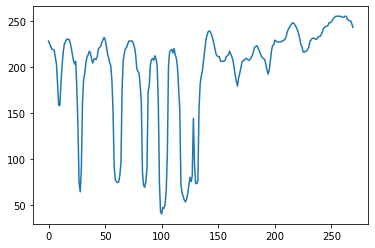



Point at jump: [(470.61391129032194, 27)]


Point at jump: [(470.61391129032194, 27), (467.59374999999926, 31)]


Point at jump: [(470.61391129032194, 27), (467.59374999999926, 31), (446.45262096774053, 59)]


Point at jump: [(470.61391129032194, 27), (467.59374999999926, 31), (446.45262096774053, 59), (441.16733870967585, 66)]


Point at jump: [(470.61391129032194, 27), (467.59374999999926, 31), (446.45262096774053, 59), (441.16733870967585, 66), (428.3316532258045, 83)]


Point at jump: [(470.61391129032194, 27), (467.59374999999926, 31), (446.45262096774053, 59), (441.16733870967585, 66), (428.3316532258045, 83), (423.0463709677398, 90)]


Point at jump: [(470.61391129032194, 27), (467.59374999999926, 31), (446.45262096774053, 59), (441.16733870967585, 66), (428.3316532258045, 83), (423.0463709677398, 90), (417.00604838709444, 98)]


Point at jump: [(470.61391129032194, 27), (467.59374999999926, 31), (446.45262096774053, 59), (441.16733870967585, 66), (428.3316532258045, 83), (423

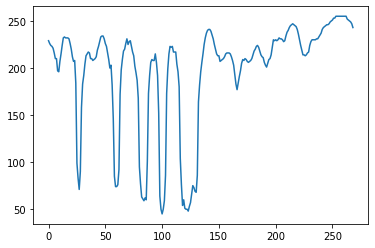



Point at jump: [(472.1239919354833, 25)]


Point at jump: [(472.1239919354833, 25), (466.8387096774186, 32)]


Point at jump: [(472.1239919354833, 25), (466.8387096774186, 32), (447.2076612903212, 58)]


Point at jump: [(472.1239919354833, 25), (466.8387096774186, 32), (447.2076612903212, 58), (442.6774193548372, 64)]


Point at jump: [(472.1239919354833, 25), (466.8387096774186, 32), (447.2076612903212, 58), (442.6774193548372, 64), (430.5967741935465, 80)]


Point at jump: [(472.1239919354833, 25), (466.8387096774186, 32), (447.2076612903212, 58), (442.6774193548372, 64), (430.5967741935465, 80), (423.0463709677398, 90)]


Point at jump: [(472.1239919354833, 25), (466.8387096774186, 32), (447.2076612903212, 58), (442.6774193548372, 64), (430.5967741935465, 80), (423.0463709677398, 90), (417.00604838709444, 98)]


Point at jump: [(472.1239919354833, 25), (466.8387096774186, 32), (447.2076612903212, 58), (442.6774193548372, 64), (430.5967741935465, 80), (423.0463709677398, 90), (417.

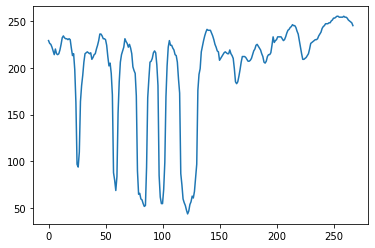



Point at jump: [(472.1239919354833, 25)]


Point at jump: [(472.1239919354833, 25), (467.59374999999926, 31)]


Point at jump: [(472.1239919354833, 25), (467.59374999999926, 31), (447.96270161290187, 57)]


Point at jump: [(472.1239919354833, 25), (467.59374999999926, 31), (447.96270161290187, 57), (443.43245967741785, 63)]


Point at jump: [(472.1239919354833, 25), (467.59374999999926, 31), (447.96270161290187, 57), (443.43245967741785, 63), (432.1068548387078, 78)]


Point at jump: [(472.1239919354833, 25), (467.59374999999926, 31), (447.96270161290187, 57), (443.43245967741785, 63), (432.1068548387078, 78), (423.80141129032046, 89)]


Point at jump: [(472.1239919354833, 25), (467.59374999999926, 31), (447.96270161290187, 57), (443.43245967741785, 63), (432.1068548387078, 78), (423.80141129032046, 89), (417.7610887096751, 97)]


Point at jump: [(472.1239919354833, 25), (467.59374999999926, 31), (447.96270161290187, 57), (443.43245967741785, 63), (432.1068548387078, 78), (423.801411

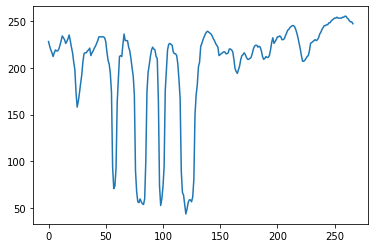



Point at jump: [(448.71774193548254, 56)]


Point at jump: [(448.71774193548254, 56), (444.1874999999985, 62)]


Point at jump: [(448.71774193548254, 56), (444.1874999999985, 62), (433.61693548386916, 76)]


Point at jump: [(448.71774193548254, 56), (444.1874999999985, 62), (433.61693548386916, 76), (425.3114919354818, 87)]


Point at jump: [(448.71774193548254, 56), (444.1874999999985, 62), (433.61693548386916, 76), (425.3114919354818, 87), (417.7610887096751, 97)]


Point at jump: [(448.71774193548254, 56), (444.1874999999985, 62), (433.61693548386916, 76), (425.3114919354818, 87), (417.7610887096751, 97), (413.98588709677176, 102)]


Point at jump: [(448.71774193548254, 56), (444.1874999999985, 62), (433.61693548386916, 76), (425.3114919354818, 87), (417.7610887096751, 97), (413.98588709677176, 102), (402.6602822580617, 117)]


Point at jump: [(448.71774193548254, 56), (444.1874999999985, 62), (433.61693548386916, 76), (425.3114919354818, 87), (417.7610887096751, 97), (413.9858870

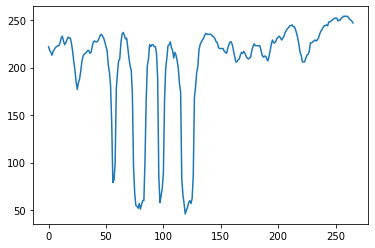



Point at jump: [(448.71774193548254, 56)]


Point at jump: [(448.71774193548254, 56), (445.69758064515986, 60)]


Point at jump: [(448.71774193548254, 56), (445.69758064515986, 60), (434.3719758064498, 75)]


Point at jump: [(448.71774193548254, 56), (445.69758064515986, 60), (434.3719758064498, 75), (426.06653225806247, 86)]


Point at jump: [(448.71774193548254, 56), (445.69758064515986, 60), (434.3719758064498, 75), (426.06653225806247, 86), (418.5161290322558, 96)]


Point at jump: [(448.71774193548254, 56), (445.69758064515986, 60), (434.3719758064498, 75), (426.06653225806247, 86), (418.5161290322558, 96), (413.98588709677176, 102)]


Point at jump: [(448.71774193548254, 56), (445.69758064515986, 60), (434.3719758064498, 75), (426.06653225806247, 86), (418.5161290322558, 96), (413.98588709677176, 102), (403.4153225806424, 116)]


Point at jump: [(448.71774193548254, 56), (445.69758064515986, 60), (434.3719758064498, 75), (426.06653225806247, 86), (418.5161290322558, 96), (413.9

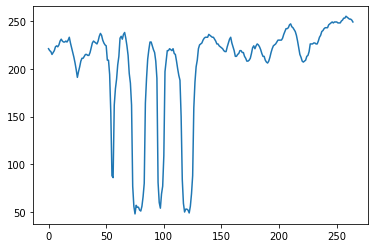



Point at jump: [(449.4727822580632, 55)]


Point at jump: [(449.4727822580632, 55), (446.45262096774053, 59)]


Point at jump: [(449.4727822580632, 55), (446.45262096774053, 59), (435.88205645161116, 73)]


Point at jump: [(449.4727822580632, 55), (446.45262096774053, 59), (435.88205645161116, 73), (426.82157258064314, 85)]


Point at jump: [(449.4727822580632, 55), (446.45262096774053, 59), (435.88205645161116, 73), (426.82157258064314, 85), (419.27116935483645, 95)]


Point at jump: [(449.4727822580632, 55), (446.45262096774053, 59), (435.88205645161116, 73), (426.82157258064314, 85), (419.27116935483645, 95), (414.74092741935243, 101)]


Point at jump: [(449.4727822580632, 55), (446.45262096774053, 59), (435.88205645161116, 73), (426.82157258064314, 85), (419.27116935483645, 95), (414.74092741935243, 101), (403.4153225806424, 116)]


Point at jump: [(449.4727822580632, 55), (446.45262096774053, 59), (435.88205645161116, 73), (426.82157258064314, 85), (419.27116935483645, 95), (414

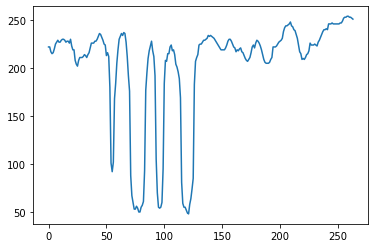



Point at jump: [(450.2278225806439, 54)]


Point at jump: [(450.2278225806439, 54), (446.45262096774053, 59)]


Point at jump: [(450.2278225806439, 54), (446.45262096774053, 59), (437.3921370967725, 71)]


Point at jump: [(450.2278225806439, 54), (446.45262096774053, 59), (437.3921370967725, 71), (426.82157258064314, 85)]


Point at jump: [(450.2278225806439, 54), (446.45262096774053, 59), (437.3921370967725, 71), (426.82157258064314, 85), (420.0262096774171, 94)]


Point at jump: [(450.2278225806439, 54), (446.45262096774053, 59), (437.3921370967725, 71), (426.82157258064314, 85), (420.0262096774171, 94), (415.4959677419331, 100)]


Point at jump: [(450.2278225806439, 54), (446.45262096774053, 59), (437.3921370967725, 71), (426.82157258064314, 85), (420.0262096774171, 94), (415.4959677419331, 100), (404.17036290322307, 115)]


Point at jump: [(450.2278225806439, 54), (446.45262096774053, 59), (437.3921370967725, 71), (426.82157258064314, 85), (420.0262096774171, 94), (415.4959677419

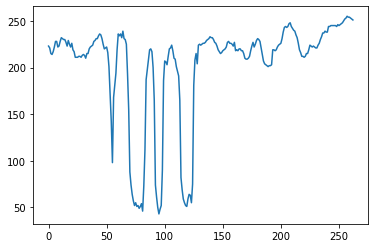



Point at jump: [(449.4727822580632, 55)]


Point at jump: [(449.4727822580632, 55), (446.45262096774053, 59)]


Point at jump: [(449.4727822580632, 55), (446.45262096774053, 59), (438.14717741935317, 70)]


Point at jump: [(449.4727822580632, 55), (446.45262096774053, 59), (438.14717741935317, 70), (426.82157258064314, 85)]


Point at jump: [(449.4727822580632, 55), (446.45262096774053, 59), (438.14717741935317, 70), (426.82157258064314, 85), (421.53629032257845, 92)]


Point at jump: [(449.4727822580632, 55), (446.45262096774053, 59), (438.14717741935317, 70), (426.82157258064314, 85), (421.53629032257845, 92), (416.25100806451377, 99)]


Point at jump: [(449.4727822580632, 55), (446.45262096774053, 59), (438.14717741935317, 70), (426.82157258064314, 85), (421.53629032257845, 92), (416.25100806451377, 99), (404.92540322580373, 114)]


Point at jump: [(449.4727822580632, 55), (446.45262096774053, 59), (438.14717741935317, 70), (426.82157258064314, 85), (421.53629032257845, 92), (416.

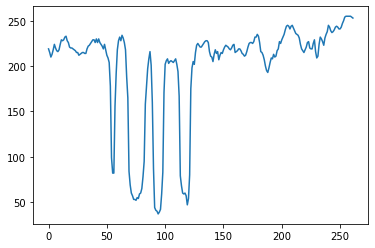



Point at jump: [(450.2278225806439, 54)]


Point at jump: [(450.2278225806439, 54), (446.45262096774053, 59)]


Point at jump: [(450.2278225806439, 54), (446.45262096774053, 59), (438.90221774193384, 69)]


Point at jump: [(450.2278225806439, 54), (446.45262096774053, 59), (438.90221774193384, 69), (426.82157258064314, 85)]


Point at jump: [(450.2278225806439, 54), (446.45262096774053, 59), (438.90221774193384, 69), (426.82157258064314, 85), (423.0463709677398, 90)]


Point at jump: [(450.2278225806439, 54), (446.45262096774053, 59), (438.90221774193384, 69), (426.82157258064314, 85), (423.0463709677398, 90), (415.4959677419331, 100)]


Point at jump: [(450.2278225806439, 54), (446.45262096774053, 59), (438.90221774193384, 69), (426.82157258064314, 85), (423.0463709677398, 90), (415.4959677419331, 100), (405.6804435483844, 113)]


Point at jump: [(450.2278225806439, 54), (446.45262096774053, 59), (438.90221774193384, 69), (426.82157258064314, 85), (423.0463709677398, 90), (415.49596

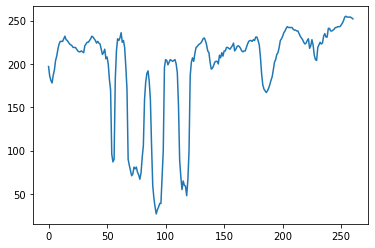



Point at jump: [(450.2278225806439, 54)]


Point at jump: [(450.2278225806439, 54), (447.2076612903212, 58)]


Point at jump: [(450.2278225806439, 54), (447.2076612903212, 58), (439.6572580645145, 68)]


Point at jump: [(450.2278225806439, 54), (447.2076612903212, 58), (439.6572580645145, 68), (426.82157258064314, 85)]


Point at jump: [(450.2278225806439, 54), (447.2076612903212, 58), (439.6572580645145, 68), (426.82157258064314, 85), (423.80141129032046, 89)]


Point at jump: [(450.2278225806439, 54), (447.2076612903212, 58), (439.6572580645145, 68), (426.82157258064314, 85), (423.80141129032046, 89), (416.25100806451377, 99)]


Point at jump: [(450.2278225806439, 54), (447.2076612903212, 58), (439.6572580645145, 68), (426.82157258064314, 85), (423.80141129032046, 89), (416.25100806451377, 99), (406.4354838709651, 112)]


Point at jump: [(450.2278225806439, 54), (447.2076612903212, 58), (439.6572580645145, 68), (426.82157258064314, 85), (423.80141129032046, 89), (416.25100806451377

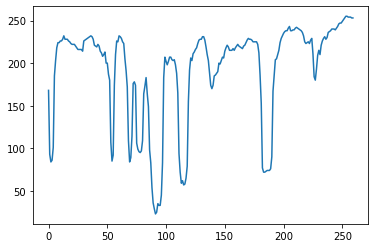



Point at jump: [(424.5564516129011, 88)]


Point at jump: [(424.5564516129011, 88), (417.00604838709444, 98)]


Point at jump: [(424.5564516129011, 88), (417.00604838709444, 98), (406.4354838709651, 112)]


Point at jump: [(424.5564516129011, 88), (417.00604838709444, 98), (406.4354838709651, 112), (400.3951612903197, 120)]


Point at jump: [(424.5564516129011, 88), (417.00604838709444, 98), (406.4354838709651, 112), (400.3951612903197, 120), (353.58266129031824, 182)]


Point at jump: [(424.5564516129011, 88), (417.00604838709444, 98), (406.4354838709651, 112), (400.3951612903197, 120), (353.58266129031824, 182), (346.03225806451155, 192)]


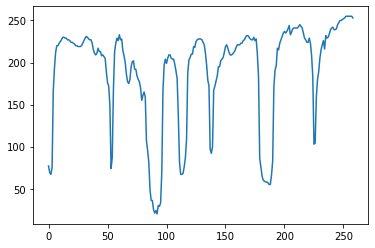



Point at jump: [(487.22479838709666, 5)]


Point at jump: [(487.22479838709666, 5), (450.98286290322454, 53)]


Point at jump: [(487.22479838709666, 5), (450.98286290322454, 53), (448.71774193548254, 56)]


Point at jump: [(487.22479838709666, 5), (450.98286290322454, 53), (448.71774193548254, 56), (428.3316532258045, 83)]


Point at jump: [(487.22479838709666, 5), (450.98286290322454, 53), (448.71774193548254, 56), (428.3316532258045, 83), (413.98588709677176, 102)]


Point at jump: [(487.22479838709666, 5), (450.98286290322454, 53), (448.71774193548254, 56), (428.3316532258045, 83), (413.98588709677176, 102), (407.19052419354574, 111)]


Point at jump: [(487.22479838709666, 5), (450.98286290322454, 53), (448.71774193548254, 56), (428.3316532258045, 83), (413.98588709677176, 102), (407.19052419354574, 111), (401.90524193548106, 118)]


Point at jump: [(487.22479838709666, 5), (450.98286290322454, 53), (448.71774193548254, 56), (428.3316532258045, 83), (413.98588709677176, 102), (407

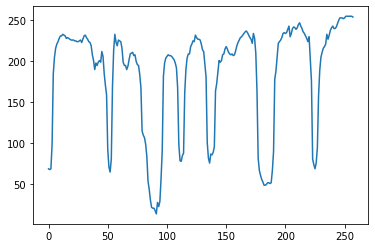



Point at jump: [(487.9798387096773, 4)]


Point at jump: [(487.9798387096773, 4), (452.4929435483859, 51)]


Point at jump: [(487.9798387096773, 4), (452.4929435483859, 51), (449.4727822580632, 55)]


Point at jump: [(487.9798387096773, 4), (452.4929435483859, 51), (449.4727822580632, 55), (430.5967741935465, 80)]


Point at jump: [(487.9798387096773, 4), (452.4929435483859, 51), (449.4727822580632, 55), (430.5967741935465, 80), (400.3951612903197, 120)]


Point at jump: [(487.9798387096773, 4), (452.4929435483859, 51), (449.4727822580632, 55), (430.5967741935465, 80), (400.3951612903197, 120), (389.82459677419035, 134)]


Point at jump: [(487.9798387096773, 4), (452.4929435483859, 51), (449.4727822580632, 55), (430.5967741935465, 80), (400.3951612903197, 120), (389.82459677419035, 134), (380.00907258064166, 147)]


Point at jump: [(487.9798387096773, 4), (452.4929435483859, 51), (449.4727822580632, 55), (430.5967741935465, 80), (400.3951612903197, 120), (389.82459677419035, 134), (3

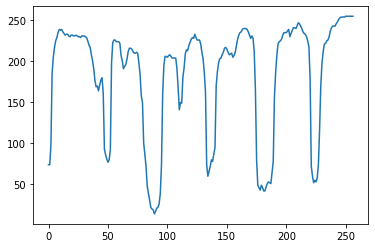



Point at jump: [(488.734879032258, 3)]


Point at jump: [(488.734879032258, 3), (454.0030241935472, 49)]


Point at jump: [(488.734879032258, 3), (454.0030241935472, 49), (450.98286290322454, 53)]


Point at jump: [(488.734879032258, 3), (454.0030241935472, 49), (450.98286290322454, 53), (429.8417338709658, 81)]


Point at jump: [(488.734879032258, 3), (454.0030241935472, 49), (450.98286290322454, 53), (429.8417338709658, 81), (417.7610887096751, 97)]


Point at jump: [(488.734879032258, 3), (454.0030241935472, 49), (450.98286290322454, 53), (429.8417338709658, 81), (417.7610887096751, 97), (390.579637096771, 133)]


Point at jump: [(488.734879032258, 3), (454.0030241935472, 49), (450.98286290322454, 53), (429.8417338709658, 81), (417.7610887096751, 97), (390.579637096771, 133), (383.784274193545, 142)]


Point at jump: [(488.734879032258, 3), (454.0030241935472, 49), (450.98286290322454, 53), (429.8417338709658, 81), (417.7610887096751, 97), (390.579637096771, 133), (383.78427419354

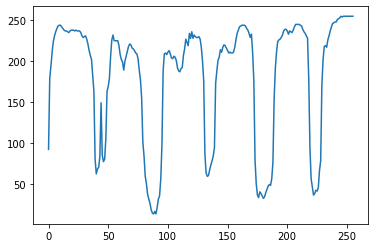



Point at jump: [(489.48991935483866, 2)]


Point at jump: [(489.48991935483866, 2), (461.5534274193539, 39)]


Point at jump: [(489.48991935483866, 2), (461.5534274193539, 39), (451.7379032258052, 52)]


Point at jump: [(489.48991935483866, 2), (461.5534274193539, 39), (451.7379032258052, 52), (431.35181451612715, 79)]


Point at jump: [(489.48991935483866, 2), (461.5534274193539, 39), (451.7379032258052, 52), (431.35181451612715, 79), (417.7610887096751, 97)]


Point at jump: [(489.48991935483866, 2), (461.5534274193539, 39), (451.7379032258052, 52), (431.35181451612715, 79), (417.7610887096751, 97), (392.08971774193236, 131)]


Point at jump: [(489.48991935483866, 2), (461.5534274193539, 39), (451.7379032258052, 52), (431.35181451612715, 79), (417.7610887096751, 97), (392.08971774193236, 131), (384.53931451612567, 141)]


Point at jump: [(489.48991935483866, 2), (461.5534274193539, 39), (451.7379032258052, 52), (431.35181451612715, 79), (417.7610887096751, 97), (392.08971774193236,

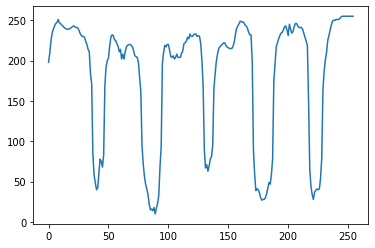



Point at jump: [(463.06350806451525, 37)]


Point at jump: [(463.06350806451525, 37), (454.7580645161279, 48)]


Point at jump: [(463.06350806451525, 37), (454.7580645161279, 48), (431.35181451612715, 79)]


Point at jump: [(463.06350806451525, 37), (454.7580645161279, 48), (431.35181451612715, 79), (419.27116935483645, 95)]


Point at jump: [(463.06350806451525, 37), (454.7580645161279, 48), (431.35181451612715, 79), (419.27116935483645, 95), (392.84475806451303, 130)]


Point at jump: [(463.06350806451525, 37), (454.7580645161279, 48), (431.35181451612715, 79), (419.27116935483645, 95), (392.84475806451303, 130), (385.29435483870634, 140)]


Point at jump: [(463.06350806451525, 37), (454.7580645161279, 48), (431.35181451612715, 79), (419.27116935483645, 95), (392.84475806451303, 130), (385.29435483870634, 140), (361.8881048387056, 171)]


Point at jump: [(463.06350806451525, 37), (454.7580645161279, 48), (431.35181451612715, 79), (419.27116935483645, 95), (392.84475806451303, 130),

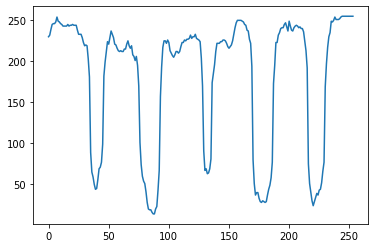



Point at jump: [(464.5735887096766, 35)]


Point at jump: [(464.5735887096766, 35), (455.51310483870856, 47)]


Point at jump: [(464.5735887096766, 35), (455.51310483870856, 47), (432.8618951612885, 77)]


Point at jump: [(464.5735887096766, 35), (455.51310483870856, 47), (432.8618951612885, 77), (420.0262096774171, 94)]


Point at jump: [(464.5735887096766, 35), (455.51310483870856, 47), (432.8618951612885, 77), (420.0262096774171, 94), (393.5997983870937, 129)]


Point at jump: [(464.5735887096766, 35), (455.51310483870856, 47), (432.8618951612885, 77), (420.0262096774171, 94), (393.5997983870937, 129), (386.8044354838677, 138)]


Point at jump: [(464.5735887096766, 35), (455.51310483870856, 47), (432.8618951612885, 77), (420.0262096774171, 94), (393.5997983870937, 129), (386.8044354838677, 138), (362.64314516128627, 170)]


Point at jump: [(464.5735887096766, 35), (455.51310483870856, 47), (432.8618951612885, 77), (420.0262096774171, 94), (393.5997983870937, 129), (386.80443548386

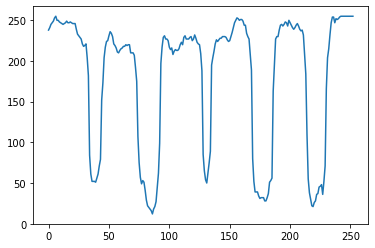



Point at jump: [(465.32862903225725, 34)]


Point at jump: [(465.32862903225725, 34), (456.2681451612892, 46)]


Point at jump: [(465.32862903225725, 34), (456.2681451612892, 46), (434.3719758064498, 75)]


Point at jump: [(465.32862903225725, 34), (456.2681451612892, 46), (434.3719758064498, 75), (420.7812499999978, 93)]


Point at jump: [(465.32862903225725, 34), (456.2681451612892, 46), (434.3719758064498, 75), (420.7812499999978, 93), (394.35483870967437, 128)]


Point at jump: [(465.32862903225725, 34), (456.2681451612892, 46), (434.3719758064498, 75), (420.7812499999978, 93), (394.35483870967437, 128), (389.0695564516097, 135)]


Point at jump: [(465.32862903225725, 34), (456.2681451612892, 46), (434.3719758064498, 75), (420.7812499999978, 93), (394.35483870967437, 128), (389.0695564516097, 135), (363.39818548386694, 169)]


Point at jump: [(465.32862903225725, 34), (456.2681451612892, 46), (434.3719758064498, 75), (420.7812499999978, 93), (394.35483870967437, 128), (389.069556

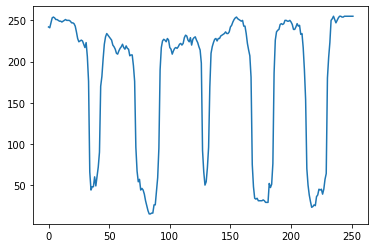



Point at jump: [(465.32862903225725, 34)]


Point at jump: [(465.32862903225725, 34), (458.53326612903123, 43)]


Point at jump: [(465.32862903225725, 34), (458.53326612903123, 43), (435.88205645161116, 73)]


Point at jump: [(465.32862903225725, 34), (458.53326612903123, 43), (435.88205645161116, 73), (421.53629032257845, 92)]


Point at jump: [(465.32862903225725, 34), (458.53326612903123, 43), (435.88205645161116, 73), (421.53629032257845, 92), (394.35483870967437, 128)]


Point at jump: [(465.32862903225725, 34), (458.53326612903123, 43), (435.88205645161116, 73), (421.53629032257845, 92), (394.35483870967437, 128), (390.579637096771, 133)]


Point at jump: [(465.32862903225725, 34), (458.53326612903123, 43), (435.88205645161116, 73), (421.53629032257845, 92), (394.35483870967437, 128), (390.579637096771, 133), (363.39818548386694, 169)]


Point at jump: [(465.32862903225725, 34), (458.53326612903123, 43), (435.88205645161116, 73), (421.53629032257845, 92), (394.35483870967437, 1

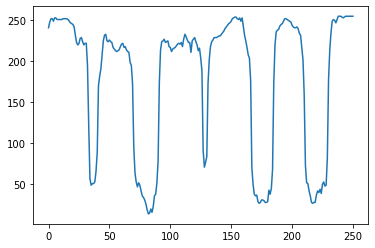



Point at jump: [(466.0836693548379, 33)]


Point at jump: [(466.0836693548379, 33), (457.0231854838699, 45)]


Point at jump: [(466.0836693548379, 33), (457.0231854838699, 45), (438.14717741935317, 70)]


Point at jump: [(466.0836693548379, 33), (457.0231854838699, 45), (438.14717741935317, 70), (421.53629032257845, 92)]


Point at jump: [(466.0836693548379, 33), (457.0231854838699, 45), (438.14717741935317, 70), (421.53629032257845, 92), (395.10987903225504, 127)]


Point at jump: [(466.0836693548379, 33), (457.0231854838699, 45), (438.14717741935317, 70), (421.53629032257845, 92), (395.10987903225504, 127), (391.3346774193517, 132)]


Point at jump: [(466.0836693548379, 33), (457.0231854838699, 45), (438.14717741935317, 70), (421.53629032257845, 92), (395.10987903225504, 127), (391.3346774193517, 132), (364.9082661290283, 167)]


Point at jump: [(466.0836693548379, 33), (457.0231854838699, 45), (438.14717741935317, 70), (421.53629032257845, 92), (395.10987903225504, 127), (391.3346

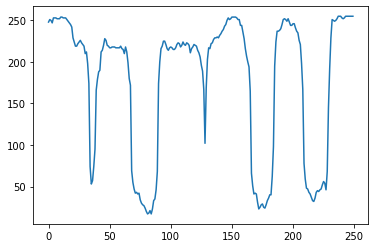



Point at jump: [(465.32862903225725, 34)]


Point at jump: [(465.32862903225725, 34), (460.79838709677324, 40)]


Point at jump: [(465.32862903225725, 34), (460.79838709677324, 40), (439.6572580645145, 68)]


Point at jump: [(465.32862903225725, 34), (460.79838709677324, 40), (439.6572580645145, 68), (423.0463709677398, 90)]


Point at jump: [(465.32862903225725, 34), (460.79838709677324, 40), (439.6572580645145, 68), (423.0463709677398, 90), (365.66330645160895, 166)]


Point at jump: [(465.32862903225725, 34), (460.79838709677324, 40), (439.6572580645145, 68), (423.0463709677398, 90), (365.66330645160895, 166), (351.31754032257624, 185)]


Point at jump: [(465.32862903225725, 34), (460.79838709677324, 40), (439.6572580645145, 68), (423.0463709677398, 90), (365.66330645160895, 166), (351.31754032257624, 185), (333.1965725806402, 209)]


Point at jump: [(465.32862903225725, 34), (460.79838709677324, 40), (439.6572580645145, 68), (423.0463709677398, 90), (365.66330645160895, 166), (35

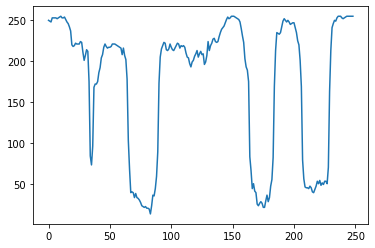



Point at jump: [(465.32862903225725, 34)]


Point at jump: [(465.32862903225725, 34), (460.04334677419257, 41)]


Point at jump: [(465.32862903225725, 34), (460.04334677419257, 41), (441.16733870967585, 66)]


Point at jump: [(465.32862903225725, 34), (460.04334677419257, 41), (441.16733870967585, 66), (423.0463709677398, 90)]


Point at jump: [(465.32862903225725, 34), (460.04334677419257, 41), (441.16733870967585, 66), (423.0463709677398, 90), (366.4183467741896, 165)]


Point at jump: [(465.32862903225725, 34), (460.04334677419257, 41), (441.16733870967585, 66), (423.0463709677398, 90), (366.4183467741896, 165), (352.0725806451569, 184)]


Point at jump: [(465.32862903225725, 34), (460.04334677419257, 41), (441.16733870967585, 66), (423.0463709677398, 90), (366.4183467741896, 165), (352.0725806451569, 184), (333.95161290322085, 208)]


Point at jump: [(465.32862903225725, 34), (460.04334677419257, 41), (441.16733870967585, 66), (423.0463709677398, 90), (366.4183467741896, 165), (3

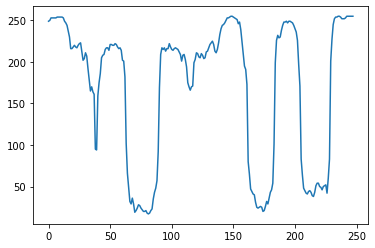



Point at jump: [(462.3084677419346, 38)]


Point at jump: [(462.3084677419346, 38), (458.53326612903123, 43)]


Point at jump: [(462.3084677419346, 38), (458.53326612903123, 43), (443.43245967741785, 63)]


Point at jump: [(462.3084677419346, 38), (458.53326612903123, 43), (443.43245967741785, 63), (422.2913306451591, 91)]


Point at jump: [(462.3084677419346, 38), (458.53326612903123, 43), (443.43245967741785, 63), (422.2913306451591, 91), (368.6834677419316, 162)]


Point at jump: [(462.3084677419346, 38), (458.53326612903123, 43), (443.43245967741785, 63), (422.2913306451591, 91), (368.6834677419316, 162), (352.0725806451569, 184)]


Point at jump: [(462.3084677419346, 38), (458.53326612903123, 43), (443.43245967741785, 63), (422.2913306451591, 91), (368.6834677419316, 162), (352.0725806451569, 184), (336.21673387096286, 205)]


Point at jump: [(462.3084677419346, 38), (458.53326612903123, 43), (443.43245967741785, 63), (422.2913306451591, 91), (368.6834677419316, 162), (352.07258

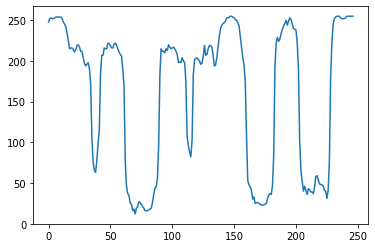



Point at jump: [(464.5735887096766, 35)]


Point at jump: [(464.5735887096766, 35), (457.0231854838699, 45)]


Point at jump: [(464.5735887096766, 35), (457.0231854838699, 45), (444.1874999999985, 62)]


Point at jump: [(464.5735887096766, 35), (457.0231854838699, 45), (444.1874999999985, 62), (423.0463709677398, 90)]


Point at jump: [(464.5735887096766, 35), (457.0231854838699, 45), (444.1874999999985, 62), (423.0463709677398, 90), (404.17036290322307, 115)]


Point at jump: [(464.5735887096766, 35), (457.0231854838699, 45), (444.1874999999985, 62), (423.0463709677398, 90), (404.17036290322307, 115), (402.6602822580617, 117)]


Point at jump: [(464.5735887096766, 35), (457.0231854838699, 45), (444.1874999999985, 62), (423.0463709677398, 90), (404.17036290322307, 115), (402.6602822580617, 117), (369.4385080645123, 161)]


Point at jump: [(464.5735887096766, 35), (457.0231854838699, 45), (444.1874999999985, 62), (423.0463709677398, 90), (404.17036290322307, 115), (402.6602822580617, 

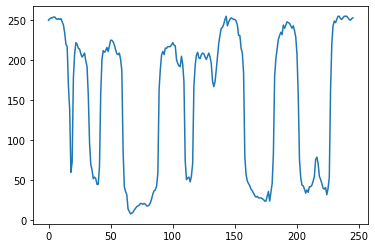



Point at jump: [(478.1643145161286, 17)]


Point at jump: [(478.1643145161286, 17), (444.1874999999985, 62)]


Point at jump: [(478.1643145161286, 17), (444.1874999999985, 62), (423.80141129032046, 89)]


Point at jump: [(478.1643145161286, 17), (444.1874999999985, 62), (423.80141129032046, 89), (407.19052419354574, 111)]


Point at jump: [(478.1643145161286, 17), (444.1874999999985, 62), (423.80141129032046, 89), (407.19052419354574, 111), (402.6602822580617, 117)]


Point at jump: [(478.1643145161286, 17), (444.1874999999985, 62), (423.80141129032046, 89), (407.19052419354574, 111), (402.6602822580617, 117), (370.94858870967363, 159)]


Point at jump: [(478.1643145161286, 17), (444.1874999999985, 62), (423.80141129032046, 89), (407.19052419354574, 111), (402.6602822580617, 117), (370.94858870967363, 159), (353.58266129031824, 182)]


Point at jump: [(478.1643145161286, 17), (444.1874999999985, 62), (423.80141129032046, 89), (407.19052419354574, 111), (402.6602822580617, 117), (370.

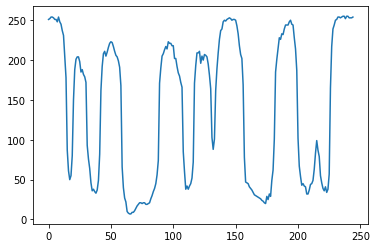



Point at jump: [(479.67439516128997, 15)]


Point at jump: [(479.67439516128997, 15), (475.14415322580595, 21)]


Point at jump: [(479.67439516128997, 15), (475.14415322580595, 21), (466.8387096774186, 32)]


Point at jump: [(479.67439516128997, 15), (475.14415322580595, 21), (466.8387096774186, 32), (458.53326612903123, 43)]


Point at jump: [(479.67439516128997, 15), (475.14415322580595, 21), (466.8387096774186, 32), (458.53326612903123, 43), (446.45262096774053, 59)]


Point at jump: [(479.67439516128997, 15), (475.14415322580595, 21), (466.8387096774186, 32), (458.53326612903123, 43), (446.45262096774053, 59), (423.80141129032046, 89)]


Point at jump: [(479.67439516128997, 15), (475.14415322580595, 21), (466.8387096774186, 32), (458.53326612903123, 43), (446.45262096774053, 59), (423.80141129032046, 89), (408.7006048387071, 109)]


Point at jump: [(479.67439516128997, 15), (475.14415322580595, 21), (466.8387096774186, 32), (458.53326612903123, 43), (446.45262096774053, 59), (423

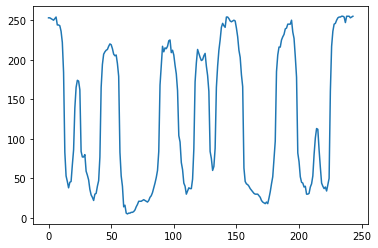



Point at jump: [(481.1844758064513, 13)]


Point at jump: [(481.1844758064513, 13), (458.53326612903123, 43)]


Point at jump: [(481.1844758064513, 13), (458.53326612903123, 43), (447.96270161290187, 57)]


Point at jump: [(481.1844758064513, 13), (458.53326612903123, 43), (447.96270161290187, 57), (423.0463709677398, 90)]


Point at jump: [(481.1844758064513, 13), (458.53326612903123, 43), (447.96270161290187, 57), (423.0463709677398, 90), (410.9657258064491, 106)]


Point at jump: [(481.1844758064513, 13), (458.53326612903123, 43), (447.96270161290187, 57), (423.0463709677398, 90), (410.9657258064491, 106), (402.6602822580617, 117)]


Point at jump: [(481.1844758064513, 13), (458.53326612903123, 43), (447.96270161290187, 57), (423.0463709677398, 90), (410.9657258064491, 106), (402.6602822580617, 117), (392.08971774193236, 131)]


Point at jump: [(481.1844758064513, 13), (458.53326612903123, 43), (447.96270161290187, 57), (423.0463709677398, 90), (410.9657258064491, 106), (402.66028

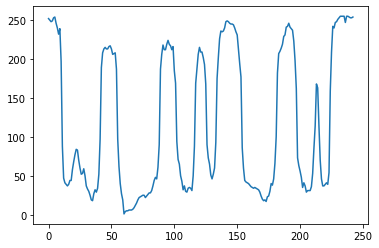



Point at jump: [(482.69455645161264, 11)]


Point at jump: [(482.69455645161264, 11), (459.2883064516119, 42)]


Point at jump: [(482.69455645161264, 11), (459.2883064516119, 42), (448.71774193548254, 56)]


Point at jump: [(482.69455645161264, 11), (459.2883064516119, 42), (448.71774193548254, 56), (423.80141129032046, 89)]


Point at jump: [(482.69455645161264, 11), (459.2883064516119, 42), (448.71774193548254, 56), (423.80141129032046, 89), (413.2308467741911, 103)]


Point at jump: [(482.69455645161264, 11), (459.2883064516119, 42), (448.71774193548254, 56), (423.80141129032046, 89), (413.2308467741911, 103), (401.90524193548106, 118)]


Point at jump: [(482.69455645161264, 11), (459.2883064516119, 42), (448.71774193548254, 56), (423.80141129032046, 89), (413.2308467741911, 103), (401.90524193548106, 118), (395.10987903225504, 127)]


Point at jump: [(482.69455645161264, 11), (459.2883064516119, 42), (448.71774193548254, 56), (423.80141129032046, 89), (413.2308467741911, 103), (4

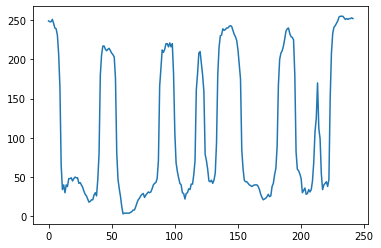



Point at jump: [(483.4495967741933, 10)]


Point at jump: [(483.4495967741933, 10), (460.04334677419257, 41)]


Point at jump: [(483.4495967741933, 10), (460.04334677419257, 41), (449.4727822580632, 55)]


Point at jump: [(483.4495967741933, 10), (460.04334677419257, 41), (449.4727822580632, 55), (424.5564516129011, 88)]


Point at jump: [(483.4495967741933, 10), (460.04334677419257, 41), (449.4727822580632, 55), (424.5564516129011, 88), (413.98588709677176, 102)]


Point at jump: [(483.4495967741933, 10), (460.04334677419257, 41), (449.4727822580632, 55), (424.5564516129011, 88), (413.98588709677176, 102), (402.6602822580617, 117)]


Point at jump: [(483.4495967741933, 10), (460.04334677419257, 41), (449.4727822580632, 55), (424.5564516129011, 88), (413.98588709677176, 102), (402.6602822580617, 117), (395.8649193548357, 126)]


Point at jump: [(483.4495967741933, 10), (460.04334677419257, 41), (449.4727822580632, 55), (424.5564516129011, 88), (413.98588709677176, 102), (402.66028225

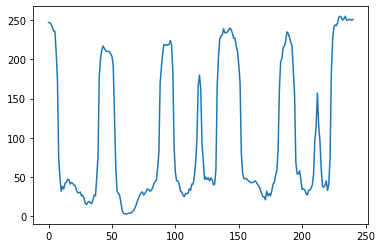



Point at jump: [(484.95967741935465, 8)]


Point at jump: [(484.95967741935465, 8), (460.79838709677324, 40)]


Point at jump: [(484.95967741935465, 8), (460.79838709677324, 40), (450.98286290322454, 53)]


Point at jump: [(484.95967741935465, 8), (460.79838709677324, 40), (450.98286290322454, 53), (424.5564516129011, 88)]


Point at jump: [(484.95967741935465, 8), (460.79838709677324, 40), (450.98286290322454, 53), (424.5564516129011, 88), (415.4959677419331, 100)]


Point at jump: [(484.95967741935465, 8), (460.79838709677324, 40), (450.98286290322454, 53), (424.5564516129011, 88), (415.4959677419331, 100), (401.90524193548106, 118)]


Point at jump: [(484.95967741935465, 8), (460.79838709677324, 40), (450.98286290322454, 53), (424.5564516129011, 88), (415.4959677419331, 100), (401.90524193548106, 118), (398.1300403225777, 123)]


Point at jump: [(484.95967741935465, 8), (460.79838709677324, 40), (450.98286290322454, 53), (424.5564516129011, 88), (415.4959677419331, 100), (401.9052

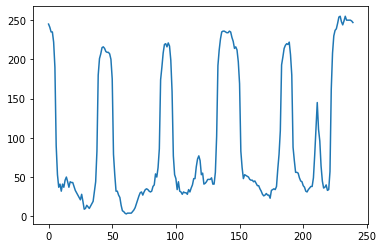



Point at jump: [(486.469758064516, 6)]


Point at jump: [(486.469758064516, 6), (460.79838709677324, 40)]


Point at jump: [(486.469758064516, 6), (460.79838709677324, 40), (452.4929435483859, 51)]


Point at jump: [(486.469758064516, 6), (460.79838709677324, 40), (452.4929435483859, 51), (423.80141129032046, 89)]


Point at jump: [(486.469758064516, 6), (460.79838709677324, 40), (452.4929435483859, 51), (423.80141129032046, 89), (417.00604838709444, 98)]


Point at jump: [(486.469758064516, 6), (460.79838709677324, 40), (452.4929435483859, 51), (423.80141129032046, 89), (417.00604838709444, 98), (390.579637096771, 133)]


Point at jump: [(486.469758064516, 6), (460.79838709677324, 40), (452.4929435483859, 51), (423.80141129032046, 89), (417.00604838709444, 98), (390.579637096771, 133), (376.988911290319, 151)]


Point at jump: [(486.469758064516, 6), (460.79838709677324, 40), (452.4929435483859, 51), (423.80141129032046, 89), (417.00604838709444, 98), (390.579637096771, 133), (376.9

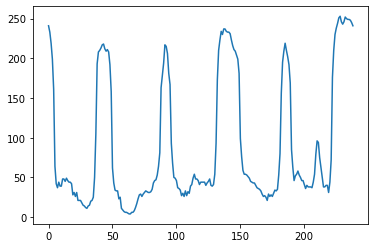



Point at jump: [(487.22479838709666, 5)]


Point at jump: [(487.22479838709666, 5), (462.3084677419346, 38)]


Point at jump: [(487.22479838709666, 5), (462.3084677419346, 38), (453.24798387096655, 50)]


Point at jump: [(487.22479838709666, 5), (462.3084677419346, 38), (453.24798387096655, 50), (424.5564516129011, 88)]


Point at jump: [(487.22479838709666, 5), (462.3084677419346, 38), (453.24798387096655, 50), (424.5564516129011, 88), (417.00604838709444, 98)]


Point at jump: [(487.22479838709666, 5), (462.3084677419346, 38), (453.24798387096655, 50), (424.5564516129011, 88), (417.00604838709444, 98), (391.3346774193517, 132)]


Point at jump: [(487.22479838709666, 5), (462.3084677419346, 38), (453.24798387096655, 50), (424.5564516129011, 88), (417.00604838709444, 98), (391.3346774193517, 132), (376.2338709677383, 152)]


Point at jump: [(487.22479838709666, 5), (462.3084677419346, 38), (453.24798387096655, 50), (424.5564516129011, 88), (417.00604838709444, 98), (391.3346774193517

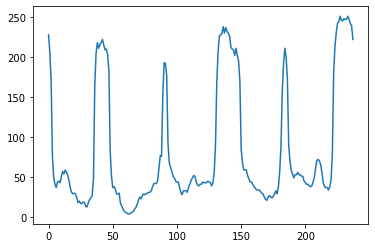



Point at jump: [(488.734879032258, 3)]


Point at jump: [(488.734879032258, 3), (463.06350806451525, 37)]


Point at jump: [(488.734879032258, 3), (463.06350806451525, 37), (454.7580645161279, 48)]


Point at jump: [(488.734879032258, 3), (463.06350806451525, 37), (454.7580645161279, 48), (423.0463709677398, 90)]


Point at jump: [(488.734879032258, 3), (463.06350806451525, 37), (454.7580645161279, 48), (423.0463709677398, 90), (420.0262096774171, 94)]


Point at jump: [(488.734879032258, 3), (463.06350806451525, 37), (454.7580645161279, 48), (423.0463709677398, 90), (420.0262096774171, 94), (391.3346774193517, 132)]


Point at jump: [(488.734879032258, 3), (463.06350806451525, 37), (454.7580645161279, 48), (423.0463709677398, 90), (420.0262096774171, 94), (391.3346774193517, 132), (377.74395161289965, 150)]


Point at jump: [(488.734879032258, 3), (463.06350806451525, 37), (454.7580645161279, 48), (423.0463709677398, 90), (420.0262096774171, 94), (391.3346774193517, 132), (377.74395

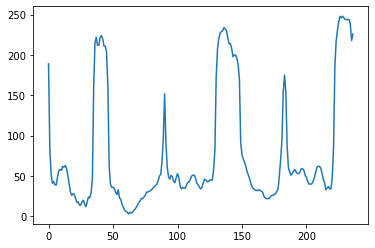



Point at jump: [(490.24495967741933, 1)]


Point at jump: [(490.24495967741933, 1), (463.8185483870959, 36)]


Point at jump: [(490.24495967741933, 1), (463.8185483870959, 36), (455.51310483870856, 47)]


Point at jump: [(490.24495967741933, 1), (463.8185483870959, 36), (455.51310483870856, 47), (392.84475806451303, 130)]


Point at jump: [(490.24495967741933, 1), (463.8185483870959, 36), (455.51310483870856, 47), (392.84475806451303, 130), (376.988911290319, 151)]


Point at jump: [(490.24495967741933, 1), (463.8185483870959, 36), (455.51310483870856, 47), (392.84475806451303, 130), (376.988911290319, 151), (352.8276209677376, 183)]


Point at jump: [(490.24495967741933, 1), (463.8185483870959, 36), (455.51310483870856, 47), (392.84475806451303, 130), (376.988911290319, 151), (352.8276209677376, 183), (350.56249999999557, 186)]


Point at jump: [(490.24495967741933, 1), (463.8185483870959, 36), (455.51310483870856, 47), (392.84475806451303, 130), (376.988911290319, 151), (352.827620

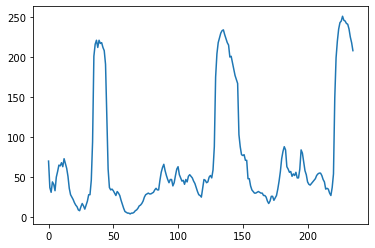



Point at jump: [(464.5735887096766, 35)]


Point at jump: [(464.5735887096766, 35), (456.2681451612892, 46)]


Point at jump: [(464.5735887096766, 35), (456.2681451612892, 46), (393.5997983870937, 129)]


Point at jump: [(464.5735887096766, 35), (456.2681451612892, 46), (393.5997983870937, 129), (376.2338709677383, 152)]


Point at jump: [(464.5735887096766, 35), (456.2681451612892, 46), (393.5997983870937, 129), (376.2338709677383, 152), (323.3810483870915, 222)]


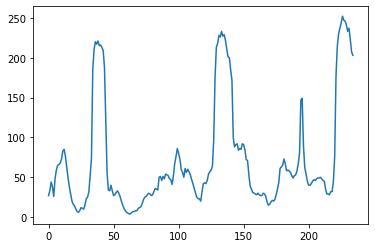



Point at jump: [(465.32862903225725, 34)]


Point at jump: [(465.32862903225725, 34), (457.0231854838699, 45)]


Point at jump: [(465.32862903225725, 34), (457.0231854838699, 45), (394.35483870967437, 128)]


Point at jump: [(465.32862903225725, 34), (457.0231854838699, 45), (394.35483870967437, 128), (376.2338709677383, 152)]


Point at jump: [(465.32862903225725, 34), (457.0231854838699, 45), (394.35483870967437, 128), (376.2338709677383, 152), (324.13608870967215, 221)]


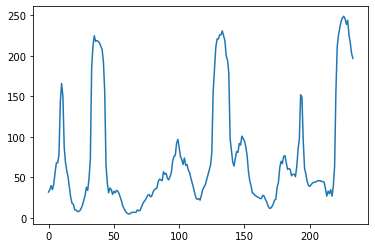



Point at jump: [(484.204637096774, 9)]


Point at jump: [(484.204637096774, 9), (478.9193548387093, 16)]


Point at jump: [(484.204637096774, 9), (478.9193548387093, 16), (466.0836693548379, 33)]


Point at jump: [(484.204637096774, 9), (478.9193548387093, 16), (466.0836693548379, 33), (457.77822580645056, 44)]


Point at jump: [(484.204637096774, 9), (478.9193548387093, 16), (466.0836693548379, 33), (457.77822580645056, 44), (395.10987903225504, 127)]


Point at jump: [(484.204637096774, 9), (478.9193548387093, 16), (466.0836693548379, 33), (457.77822580645056, 44), (395.10987903225504, 127), (384.53931451612567, 141)]


Point at jump: [(484.204637096774, 9), (478.9193548387093, 16), (466.0836693548379, 33), (457.77822580645056, 44), (395.10987903225504, 127), (384.53931451612567, 141), (324.13608870967215, 221)]


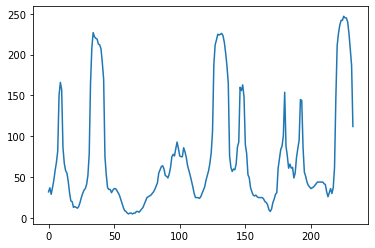



Point at jump: [(484.95967741935465, 8)]


Point at jump: [(484.95967741935465, 8), (479.67439516128997, 15)]


Point at jump: [(484.95967741935465, 8), (479.67439516128997, 15), (466.8387096774186, 32)]


Point at jump: [(484.95967741935465, 8), (479.67439516128997, 15), (466.8387096774186, 32), (457.77822580645056, 44)]


Point at jump: [(484.95967741935465, 8), (479.67439516128997, 15), (466.8387096774186, 32), (457.77822580645056, 44), (395.8649193548357, 126)]


Point at jump: [(484.95967741935465, 8), (479.67439516128997, 15), (466.8387096774186, 32), (457.77822580645056, 44), (395.8649193548357, 126), (386.8044354838677, 138)]


Point at jump: [(484.95967741935465, 8), (479.67439516128997, 15), (466.8387096774186, 32), (457.77822580645056, 44), (395.8649193548357, 126), (386.8044354838677, 138), (324.8911290322528, 220)]


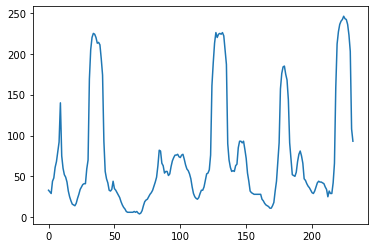



Point at jump: [(484.204637096774, 9)]


Point at jump: [(484.204637096774, 9), (479.67439516128997, 15)]


Point at jump: [(484.204637096774, 9), (479.67439516128997, 15), (467.59374999999926, 31)]


Point at jump: [(484.204637096774, 9), (479.67439516128997, 15), (467.59374999999926, 31), (458.53326612903123, 43)]


Point at jump: [(484.204637096774, 9), (479.67439516128997, 15), (467.59374999999926, 31), (458.53326612903123, 43), (397.37499999999704, 124)]


Point at jump: [(484.204637096774, 9), (479.67439516128997, 15), (467.59374999999926, 31), (458.53326612903123, 43), (397.37499999999704, 124), (386.049395161287, 139)]


Point at jump: [(484.204637096774, 9), (479.67439516128997, 15), (467.59374999999926, 31), (458.53326612903123, 43), (397.37499999999704, 124), (386.049395161287, 139), (358.11290322580226, 176)]


Point at jump: [(484.204637096774, 9), (479.67439516128997, 15), (467.59374999999926, 31), (458.53326612903123, 43), (397.37499999999704, 124), (386.049395161287, 

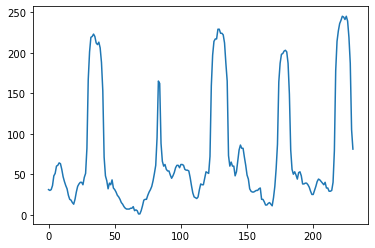



Point at jump: [(468.34879032257993, 30)]


Point at jump: [(468.34879032257993, 30), (458.53326612903123, 43)]


Point at jump: [(468.34879032257993, 30), (458.53326612903123, 43), (428.3316532258045, 83)]


Point at jump: [(468.34879032257993, 30), (458.53326612903123, 43), (428.3316532258045, 83), (425.3114919354818, 87)]


Point at jump: [(468.34879032257993, 30), (458.53326612903123, 43), (428.3316532258045, 83), (425.3114919354818, 87), (397.37499999999704, 124)]


Point at jump: [(468.34879032257993, 30), (458.53326612903123, 43), (428.3316532258045, 83), (425.3114919354818, 87), (397.37499999999704, 124), (388.314516129029, 136)]


Point at jump: [(468.34879032257993, 30), (458.53326612903123, 43), (428.3316532258045, 83), (425.3114919354818, 87), (397.37499999999704, 124), (388.314516129029, 136), (358.8679435483829, 175)]


Point at jump: [(468.34879032257993, 30), (458.53326612903123, 43), (428.3316532258045, 83), (425.3114919354818, 87), (397.37499999999704, 124), (388.31

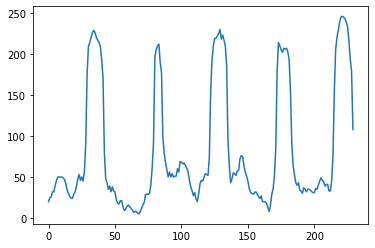



Point at jump: [(469.1038306451606, 29)]


Point at jump: [(469.1038306451606, 29), (458.53326612903123, 43)]


Point at jump: [(469.1038306451606, 29), (458.53326612903123, 43), (430.5967741935465, 80)]


Point at jump: [(469.1038306451606, 29), (458.53326612903123, 43), (430.5967741935465, 80), (425.3114919354818, 87)]


Point at jump: [(469.1038306451606, 29), (458.53326612903123, 43), (430.5967741935465, 80), (425.3114919354818, 87), (398.1300403225777, 123)]


Point at jump: [(469.1038306451606, 29), (458.53326612903123, 43), (430.5967741935465, 80), (425.3114919354818, 87), (398.1300403225777, 123), (388.314516129029, 136)]


Point at jump: [(469.1038306451606, 29), (458.53326612903123, 43), (430.5967741935465, 80), (425.3114919354818, 87), (398.1300403225777, 123), (388.314516129029, 136), (361.13306451612493, 172)]


Point at jump: [(469.1038306451606, 29), (458.53326612903123, 43), (430.5967741935465, 80), (425.3114919354818, 87), (398.1300403225777, 123), (388.314516129029,

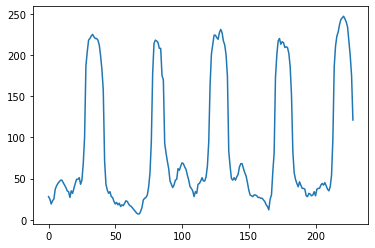



Point at jump: [(469.85887096774127, 28)]


Point at jump: [(469.85887096774127, 28), (459.2883064516119, 42)]


Point at jump: [(469.85887096774127, 28), (459.2883064516119, 42), (432.1068548387078, 78)]


Point at jump: [(469.85887096774127, 28), (459.2883064516119, 42), (432.1068548387078, 78), (423.80141129032046, 89)]


Point at jump: [(469.85887096774127, 28), (459.2883064516119, 42), (432.1068548387078, 78), (423.80141129032046, 89), (398.8850806451584, 122)]


Point at jump: [(469.85887096774127, 28), (459.2883064516119, 42), (432.1068548387078, 78), (423.80141129032046, 89), (398.8850806451584, 122), (389.0695564516097, 135)]


Point at jump: [(469.85887096774127, 28), (459.2883064516119, 42), (432.1068548387078, 78), (423.80141129032046, 89), (398.8850806451584, 122), (389.0695564516097, 135), (361.8881048387056, 171)]


Point at jump: [(469.85887096774127, 28), (459.2883064516119, 42), (432.1068548387078, 78), (423.80141129032046, 89), (398.8850806451584, 122), (389.069556

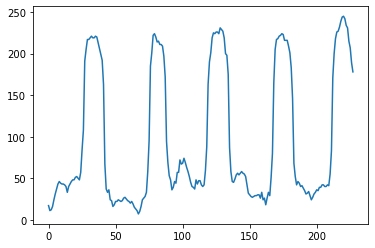



Point at jump: [(470.61391129032194, 27)]


Point at jump: [(470.61391129032194, 27), (459.2883064516119, 42)]


Point at jump: [(470.61391129032194, 27), (459.2883064516119, 42), (433.61693548386916, 76)]


Point at jump: [(470.61391129032194, 27), (459.2883064516119, 42), (433.61693548386916, 76), (423.80141129032046, 89)]


Point at jump: [(470.61391129032194, 27), (459.2883064516119, 42), (433.61693548386916, 76), (423.80141129032046, 89), (400.3951612903197, 120)]


Point at jump: [(470.61391129032194, 27), (459.2883064516119, 42), (433.61693548386916, 76), (423.80141129032046, 89), (400.3951612903197, 120), (389.0695564516097, 135)]


Point at jump: [(470.61391129032194, 27), (459.2883064516119, 42), (433.61693548386916, 76), (423.80141129032046, 89), (400.3951612903197, 120), (389.0695564516097, 135), (363.39818548386694, 169)]


Point at jump: [(470.61391129032194, 27), (459.2883064516119, 42), (433.61693548386916, 76), (423.80141129032046, 89), (400.3951612903197, 120), (389

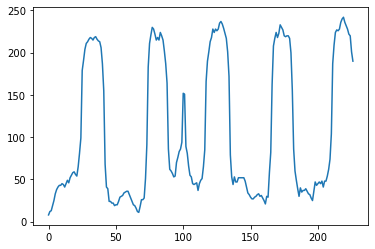



Point at jump: [(472.1239919354833, 25)]


Point at jump: [(472.1239919354833, 25), (459.2883064516119, 42)]


Point at jump: [(472.1239919354833, 25), (459.2883064516119, 42), (435.1270161290305, 74)]


Point at jump: [(472.1239919354833, 25), (459.2883064516119, 42), (435.1270161290305, 74), (423.0463709677398, 90)]


Point at jump: [(472.1239919354833, 25), (459.2883064516119, 42), (435.1270161290305, 74), (423.0463709677398, 90), (402.6602822580617, 117)]


Point at jump: [(472.1239919354833, 25), (459.2883064516119, 42), (435.1270161290305, 74), (423.0463709677398, 90), (402.6602822580617, 117), (388.314516129029, 136)]


Point at jump: [(472.1239919354833, 25), (459.2883064516119, 42), (435.1270161290305, 74), (423.0463709677398, 90), (402.6602822580617, 117), (388.314516129029, 136), (365.66330645160895, 166)]


Point at jump: [(472.1239919354833, 25), (459.2883064516119, 42), (435.1270161290305, 74), (423.0463709677398, 90), (402.6602822580617, 117), (388.314516129029, 136), 

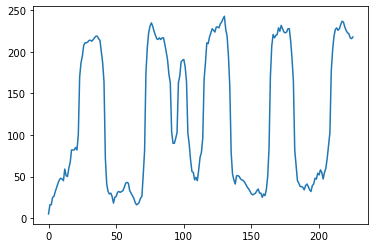



Point at jump: [(473.6340725806446, 23)]


Point at jump: [(473.6340725806446, 23), (458.53326612903123, 43)]


Point at jump: [(473.6340725806446, 23), (458.53326612903123, 43), (436.63709677419183, 72)]


Point at jump: [(473.6340725806446, 23), (458.53326612903123, 43), (436.63709677419183, 72), (411.72076612902976, 105)]


Point at jump: [(473.6340725806446, 23), (458.53326612903123, 43), (436.63709677419183, 72), (411.72076612902976, 105), (403.4153225806424, 116)]


Point at jump: [(473.6340725806446, 23), (458.53326612903123, 43), (436.63709677419183, 72), (411.72076612902976, 105), (403.4153225806424, 116), (389.0695564516097, 135)]


Point at jump: [(473.6340725806446, 23), (458.53326612903123, 43), (436.63709677419183, 72), (411.72076612902976, 105), (403.4153225806424, 116), (389.0695564516097, 135), (366.4183467741896, 165)]


Point at jump: [(473.6340725806446, 23), (458.53326612903123, 43), (436.63709677419183, 72), (411.72076612902976, 105), (403.4153225806424, 116), (

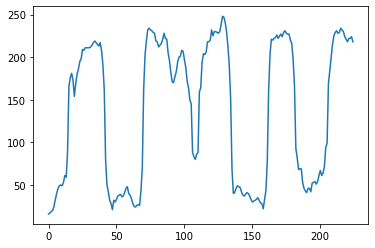



Point at jump: [(479.67439516128997, 15)]


Point at jump: [(479.67439516128997, 15), (458.53326612903123, 43)]


Point at jump: [(479.67439516128997, 15), (458.53326612903123, 43), (438.14717741935317, 70)]


Point at jump: [(479.67439516128997, 15), (458.53326612903123, 43), (438.14717741935317, 70), (388.314516129029, 136)]


Point at jump: [(479.67439516128997, 15), (458.53326612903123, 43), (438.14717741935317, 70), (388.314516129029, 136), (368.6834677419316, 162)]


Point at jump: [(479.67439516128997, 15), (458.53326612903123, 43), (438.14717741935317, 70), (388.314516129029, 136), (368.6834677419316, 162), (349.8074596774149, 187)]


Point at jump: [(479.67439516128997, 15), (458.53326612903123, 43), (438.14717741935317, 70), (388.314516129029, 136), (368.6834677419316, 162), (349.8074596774149, 187), (335.4616935483822, 206)]


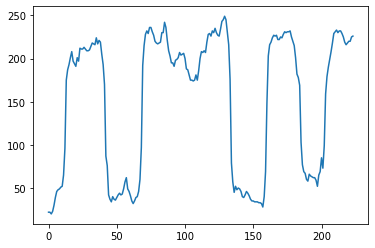



Point at jump: [(481.1844758064513, 13)]


Point at jump: [(481.1844758064513, 13), (457.77822580645056, 44)]


Point at jump: [(481.1844758064513, 13), (457.77822580645056, 44), (438.90221774193384, 69)]


Point at jump: [(481.1844758064513, 13), (457.77822580645056, 44), (438.90221774193384, 69), (389.82459677419035, 134)]


Point at jump: [(481.1844758064513, 13), (457.77822580645056, 44), (438.90221774193384, 69), (389.82459677419035, 134), (369.4385080645123, 161)]


Point at jump: [(481.1844758064513, 13), (457.77822580645056, 44), (438.90221774193384, 69), (389.82459677419035, 134), (369.4385080645123, 161), (350.56249999999557, 186)]


Point at jump: [(481.1844758064513, 13), (457.77822580645056, 44), (438.90221774193384, 69), (389.82459677419035, 134), (369.4385080645123, 161), (350.56249999999557, 186), (336.9717741935435, 204)]


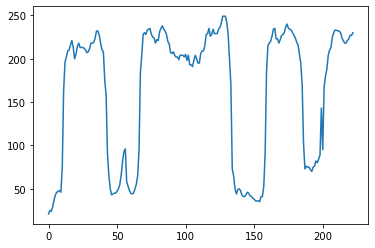



Point at jump: [(482.69455645161264, 11)]


Point at jump: [(482.69455645161264, 11), (457.0231854838699, 45)]


Point at jump: [(482.69455645161264, 11), (457.0231854838699, 45), (440.4122983870952, 67)]


Point at jump: [(482.69455645161264, 11), (457.0231854838699, 45), (440.4122983870952, 67), (389.82459677419035, 134)]


Point at jump: [(482.69455645161264, 11), (457.0231854838699, 45), (440.4122983870952, 67), (389.82459677419035, 134), (370.94858870967363, 159)]


Point at jump: [(482.69455645161264, 11), (457.0231854838699, 45), (440.4122983870952, 67), (389.82459677419035, 134), (370.94858870967363, 159), (349.8074596774149, 187)]


Point at jump: [(482.69455645161264, 11), (457.0231854838699, 45), (440.4122983870952, 67), (389.82459677419035, 134), (370.94858870967363, 159), (349.8074596774149, 187), (338.48185483870486, 202)]


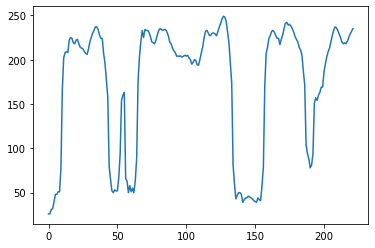



Point at jump: [(483.4495967741933, 10)]


Point at jump: [(483.4495967741933, 10), (457.0231854838699, 45)]


Point at jump: [(483.4495967741933, 10), (457.0231854838699, 45), (441.9223790322565, 65)]


Point at jump: [(483.4495967741933, 10), (457.0231854838699, 45), (441.9223790322565, 65), (389.0695564516097, 135)]


Point at jump: [(483.4495967741933, 10), (457.0231854838699, 45), (441.9223790322565, 65), (389.0695564516097, 135), (372.45866935483497, 157)]


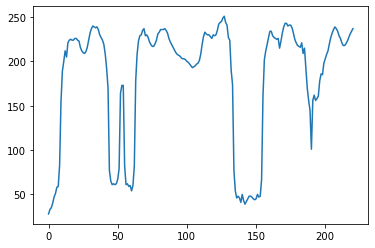



Point at jump: [(484.204637096774, 9)]


Point at jump: [(484.204637096774, 9), (445.69758064515986, 60)]


Point at jump: [(484.204637096774, 9), (445.69758064515986, 60), (443.43245967741785, 63)]


Point at jump: [(484.204637096774, 9), (445.69758064515986, 60), (443.43245967741785, 63), (389.82459677419035, 134)]


Point at jump: [(484.204637096774, 9), (445.69758064515986, 60), (443.43245967741785, 63), (389.82459677419035, 134), (373.21370967741564, 156)]


Point at jump: [(484.204637096774, 9), (445.69758064515986, 60), (443.43245967741785, 63), (389.82459677419035, 134), (373.21370967741564, 156), (347.5423387096729, 190)]


Point at jump: [(484.204637096774, 9), (445.69758064515986, 60), (443.43245967741785, 63), (389.82459677419035, 134), (373.21370967741564, 156), (347.5423387096729, 190), (339.9919354838662, 200)]


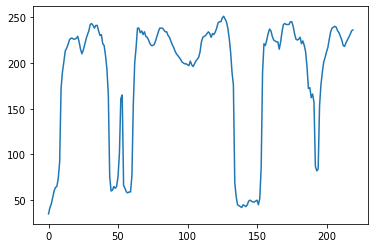



Point at jump: [(484.204637096774, 9)]


Point at jump: [(484.204637096774, 9), (457.0231854838699, 45)]


Point at jump: [(484.204637096774, 9), (457.0231854838699, 45), (451.7379032258052, 52)]


Point at jump: [(484.204637096774, 9), (457.0231854838699, 45), (451.7379032258052, 52), (448.71774193548254, 56)]


Point at jump: [(484.204637096774, 9), (457.0231854838699, 45), (451.7379032258052, 52), (448.71774193548254, 56), (444.1874999999985, 62)]


Point at jump: [(484.204637096774, 9), (457.0231854838699, 45), (451.7379032258052, 52), (448.71774193548254, 56), (444.1874999999985, 62), (389.82459677419035, 134)]


Point at jump: [(484.204637096774, 9), (457.0231854838699, 45), (451.7379032258052, 52), (448.71774193548254, 56), (444.1874999999985, 62), (389.82459677419035, 134), (374.723790322577, 154)]


Point at jump: [(484.204637096774, 9), (457.0231854838699, 45), (451.7379032258052, 52), (448.71774193548254, 56), (444.1874999999985, 62), (389.82459677419035, 134), (374.723790

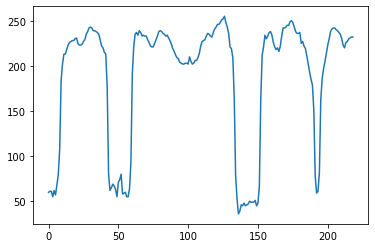



Point at jump: [(484.204637096774, 9)]


Point at jump: [(484.204637096774, 9), (458.53326612903123, 43)]


Point at jump: [(484.204637096774, 9), (458.53326612903123, 43), (445.69758064515986, 60)]


Point at jump: [(484.204637096774, 9), (458.53326612903123, 43), (445.69758064515986, 60), (389.82459677419035, 134)]


Point at jump: [(484.204637096774, 9), (458.53326612903123, 43), (445.69758064515986, 60), (389.82459677419035, 134), (375.47883064515764, 153)]


Point at jump: [(484.204637096774, 9), (458.53326612903123, 43), (445.69758064515986, 60), (389.82459677419035, 134), (375.47883064515764, 153), (346.7872983870922, 191)]


Point at jump: [(484.204637096774, 9), (458.53326612903123, 43), (445.69758064515986, 60), (389.82459677419035, 134), (375.47883064515764, 153), (346.7872983870922, 191), (343.0120967741889, 196)]


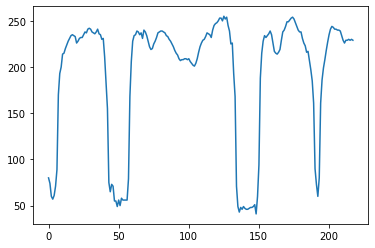



Point at jump: [(484.95967741935465, 8)]


Point at jump: [(484.95967741935465, 8), (458.53326612903123, 43)]


Point at jump: [(484.95967741935465, 8), (458.53326612903123, 43), (446.45262096774053, 59)]


Point at jump: [(484.95967741935465, 8), (458.53326612903123, 43), (446.45262096774053, 59), (389.82459677419035, 134)]


Point at jump: [(484.95967741935465, 8), (458.53326612903123, 43), (446.45262096774053, 59), (389.82459677419035, 134), (376.988911290319, 151)]


Point at jump: [(484.95967741935465, 8), (458.53326612903123, 43), (446.45262096774053, 59), (389.82459677419035, 134), (376.988911290319, 151), (346.7872983870922, 191)]


Point at jump: [(484.95967741935465, 8), (458.53326612903123, 43), (446.45262096774053, 59), (389.82459677419035, 134), (376.988911290319, 151), (346.7872983870922, 191), (343.76713709676955, 195)]


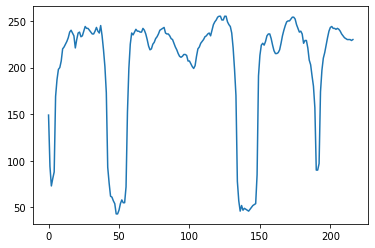



Point at jump: [(454.7580645161279, 48)]


Point at jump: [(454.7580645161279, 48), (448.71774193548254, 56)]


Point at jump: [(454.7580645161279, 48), (448.71774193548254, 56), (400.3951612903197, 120)]


Point at jump: [(454.7580645161279, 48), (448.71774193548254, 56), (400.3951612903197, 120), (389.82459677419035, 134)]


Point at jump: [(454.7580645161279, 48), (448.71774193548254, 56), (400.3951612903197, 120), (389.82459677419035, 134), (378.4989919354803, 149)]


Point at jump: [(454.7580645161279, 48), (448.71774193548254, 56), (400.3951612903197, 120), (389.82459677419035, 134), (378.4989919354803, 149), (347.5423387096729, 190)]


Point at jump: [(454.7580645161279, 48), (448.71774193548254, 56), (400.3951612903197, 120), (389.82459677419035, 134), (378.4989919354803, 149), (347.5423387096729, 190), (344.5221774193502, 194)]


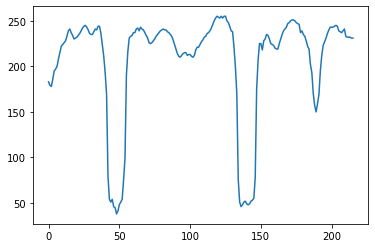



Point at jump: [(459.2883064516119, 42)]


Point at jump: [(459.2883064516119, 42), (449.4727822580632, 55)]


Point at jump: [(459.2883064516119, 42), (449.4727822580632, 55), (389.82459677419035, 134)]


Point at jump: [(459.2883064516119, 42), (449.4727822580632, 55), (389.82459677419035, 134), (379.254032258061, 148)]


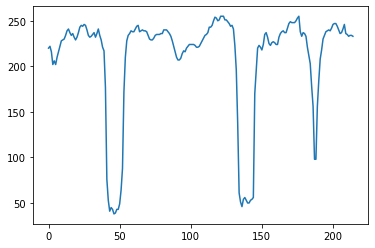



Point at jump: [(460.04334677419257, 41)]


Point at jump: [(460.04334677419257, 41), (450.2278225806439, 54)]


Point at jump: [(460.04334677419257, 41), (450.2278225806439, 54), (389.82459677419035, 134)]


Point at jump: [(460.04334677419257, 41), (450.2278225806439, 54), (389.82459677419035, 134), (381.519153225803, 145)]


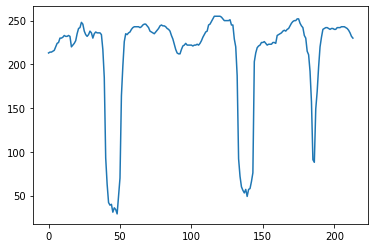



Point at jump: [(460.79838709677324, 40)]


Point at jump: [(460.79838709677324, 40), (451.7379032258052, 52)]


Point at jump: [(460.79838709677324, 40), (451.7379032258052, 52), (390.579637096771, 133)]


Point at jump: [(460.79838709677324, 40), (451.7379032258052, 52), (390.579637096771, 133), (382.27419354838366, 144)]


Point at jump: [(460.79838709677324, 40), (451.7379032258052, 52), (390.579637096771, 133), (382.27419354838366, 144), (351.31754032257624, 185)]


Point at jump: [(460.79838709677324, 40), (451.7379032258052, 52), (390.579637096771, 133), (382.27419354838366, 144), (351.31754032257624, 185), (348.29737903225356, 189)]


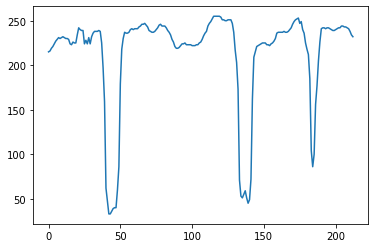



Point at jump: [(460.79838709677324, 40)]


Point at jump: [(460.79838709677324, 40), (453.24798387096655, 50)]


Point at jump: [(460.79838709677324, 40), (453.24798387096655, 50), (390.579637096771, 133)]


Point at jump: [(460.79838709677324, 40), (453.24798387096655, 50), (390.579637096771, 133), (383.02923387096433, 143)]


Point at jump: [(460.79838709677324, 40), (453.24798387096655, 50), (390.579637096771, 133), (383.02923387096433, 143), (352.8276209677376, 183)]


Point at jump: [(460.79838709677324, 40), (453.24798387096655, 50), (390.579637096771, 133), (383.02923387096433, 143), (352.8276209677376, 183), (349.0524193548342, 188)]


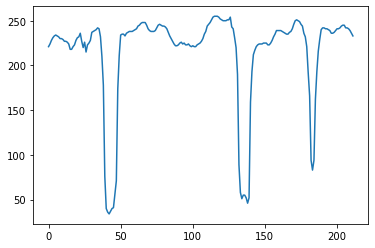



Point at jump: [(461.5534274193539, 39)]


Point at jump: [(461.5534274193539, 39), (454.0030241935472, 49)]


Point at jump: [(461.5534274193539, 39), (454.0030241935472, 49), (391.3346774193517, 132)]


Point at jump: [(461.5534274193539, 39), (454.0030241935472, 49), (391.3346774193517, 132), (384.53931451612567, 141)]


Point at jump: [(461.5534274193539, 39), (454.0030241935472, 49), (391.3346774193517, 132), (384.53931451612567, 141), (352.8276209677376, 183)]


Point at jump: [(461.5534274193539, 39), (454.0030241935472, 49), (391.3346774193517, 132), (384.53931451612567, 141), (352.8276209677376, 183), (350.56249999999557, 186)]


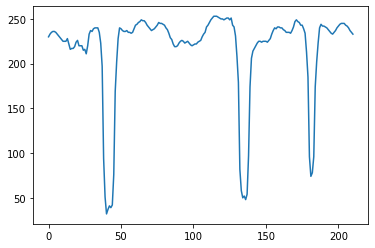



Point at jump: [(462.3084677419346, 38)]


Point at jump: [(462.3084677419346, 38), (455.51310483870856, 47)]


Point at jump: [(462.3084677419346, 38), (455.51310483870856, 47), (391.3346774193517, 132)]


Point at jump: [(462.3084677419346, 38), (455.51310483870856, 47), (391.3346774193517, 132), (385.29435483870634, 140)]


Point at jump: [(462.3084677419346, 38), (455.51310483870856, 47), (391.3346774193517, 132), (385.29435483870634, 140), (355.0927419354796, 180)]


Point at jump: [(462.3084677419346, 38), (455.51310483870856, 47), (391.3346774193517, 132), (385.29435483870634, 140), (355.0927419354796, 180), (351.31754032257624, 185)]


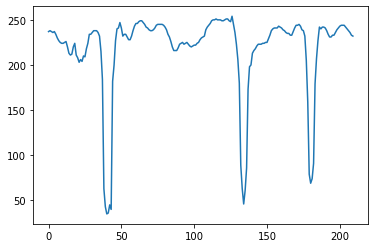



Point at jump: [(462.3084677419346, 38)]


Point at jump: [(462.3084677419346, 38), (457.77822580645056, 44)]


Point at jump: [(462.3084677419346, 38), (457.77822580645056, 44), (390.579637096771, 133)]


Point at jump: [(462.3084677419346, 38), (457.77822580645056, 44), (390.579637096771, 133), (387.55947580644835, 137)]


Point at jump: [(462.3084677419346, 38), (457.77822580645056, 44), (390.579637096771, 133), (387.55947580644835, 137), (355.0927419354796, 180)]


Point at jump: [(462.3084677419346, 38), (457.77822580645056, 44), (390.579637096771, 133), (387.55947580644835, 137), (355.0927419354796, 180), (352.8276209677376, 183)]


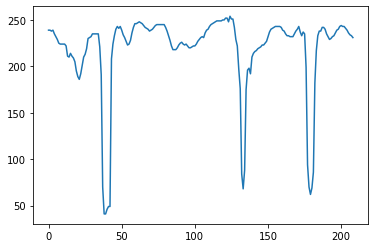



Point at jump: [(463.06350806451525, 37)]


Point at jump: [(463.06350806451525, 37), (458.53326612903123, 43)]


Point at jump: [(463.06350806451525, 37), (458.53326612903123, 43), (391.3346774193517, 132)]


Point at jump: [(463.06350806451525, 37), (458.53326612903123, 43), (391.3346774193517, 132), (388.314516129029, 136)]


Point at jump: [(463.06350806451525, 37), (458.53326612903123, 43), (391.3346774193517, 132), (388.314516129029, 136), (357.3578629032216, 177)]


Point at jump: [(463.06350806451525, 37), (458.53326612903123, 43), (391.3346774193517, 132), (388.314516129029, 136), (357.3578629032216, 177), (352.8276209677376, 183)]


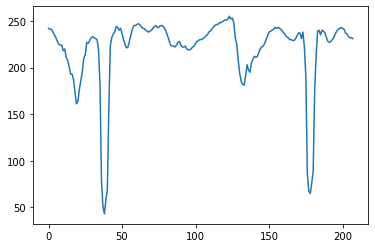



Point at jump: [(463.8185483870959, 36)]


Point at jump: [(463.8185483870959, 36), (459.2883064516119, 42)]


Point at jump: [(463.8185483870959, 36), (459.2883064516119, 42), (358.11290322580226, 176)]


Point at jump: [(463.8185483870959, 36), (459.2883064516119, 42), (358.11290322580226, 176), (353.58266129031824, 182)]


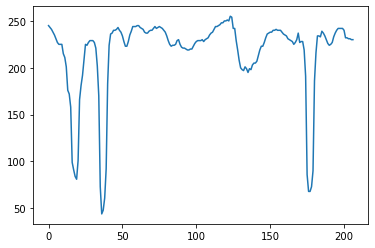



Point at jump: [(478.9193548387093, 16)]


Point at jump: [(478.9193548387093, 16), (472.87903225806394, 24)]


Point at jump: [(478.9193548387093, 16), (472.87903225806394, 24), (464.5735887096766, 35)]


Point at jump: [(478.9193548387093, 16), (472.87903225806394, 24), (464.5735887096766, 35), (460.79838709677324, 40)]


Point at jump: [(478.9193548387093, 16), (472.87903225806394, 24), (464.5735887096766, 35), (460.79838709677324, 40), (358.11290322580226, 176)]


Point at jump: [(478.9193548387093, 16), (472.87903225806394, 24), (464.5735887096766, 35), (460.79838709677324, 40), (358.11290322580226, 176), (355.0927419354796, 180)]


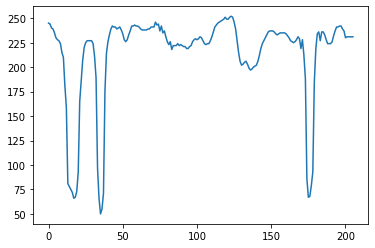



Point at jump: [(481.1844758064513, 13)]


Point at jump: [(481.1844758064513, 13), (474.3891129032253, 22)]


Point at jump: [(481.1844758064513, 13), (474.3891129032253, 22), (465.32862903225725, 34)]


Point at jump: [(481.1844758064513, 13), (474.3891129032253, 22), (465.32862903225725, 34), (462.3084677419346, 38)]


Point at jump: [(481.1844758064513, 13), (474.3891129032253, 22), (465.32862903225725, 34), (462.3084677419346, 38), (358.8679435483829, 175)]


Point at jump: [(481.1844758064513, 13), (474.3891129032253, 22), (465.32862903225725, 34), (462.3084677419346, 38), (358.8679435483829, 175), (355.84778225806025, 179)]


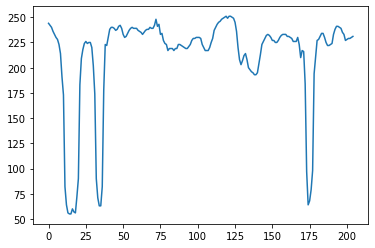



Point at jump: [(482.69455645161264, 11)]


Point at jump: [(482.69455645161264, 11), (475.14415322580595, 21)]


Point at jump: [(482.69455645161264, 11), (475.14415322580595, 21), (466.0836693548379, 33)]


Point at jump: [(482.69455645161264, 11), (475.14415322580595, 21), (466.0836693548379, 33), (463.06350806451525, 37)]


Point at jump: [(482.69455645161264, 11), (475.14415322580595, 21), (466.0836693548379, 33), (463.06350806451525, 37), (359.6229838709636, 174)]


Point at jump: [(482.69455645161264, 11), (475.14415322580595, 21), (466.0836693548379, 33), (463.06350806451525, 37), (359.6229838709636, 174), (356.6028225806409, 178)]


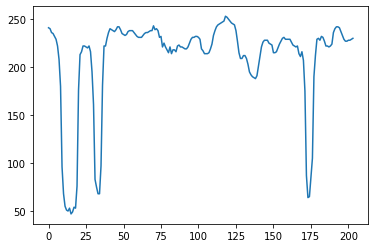



Point at jump: [(484.204637096774, 9)]


Point at jump: [(484.204637096774, 9), (475.14415322580595, 21)]


Point at jump: [(484.204637096774, 9), (475.14415322580595, 21), (467.59374999999926, 31)]


Point at jump: [(484.204637096774, 9), (475.14415322580595, 21), (467.59374999999926, 31), (463.06350806451525, 37)]


Point at jump: [(484.204637096774, 9), (475.14415322580595, 21), (467.59374999999926, 31), (463.06350806451525, 37), (361.13306451612493, 172)]


Point at jump: [(484.204637096774, 9), (475.14415322580595, 21), (467.59374999999926, 31), (463.06350806451525, 37), (361.13306451612493, 172), (357.3578629032216, 177)]


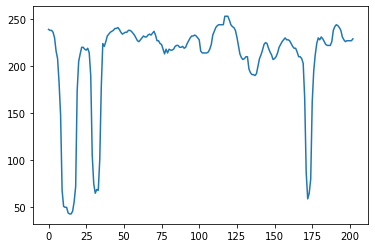



Point at jump: [(484.204637096774, 9)]


Point at jump: [(484.204637096774, 9), (476.6542338709673, 19)]


Point at jump: [(484.204637096774, 9), (476.6542338709673, 19), (467.59374999999926, 31)]


Point at jump: [(484.204637096774, 9), (476.6542338709673, 19), (467.59374999999926, 31), (464.5735887096766, 35)]


Point at jump: [(484.204637096774, 9), (476.6542338709673, 19), (467.59374999999926, 31), (464.5735887096766, 35), (361.13306451612493, 172)]


Point at jump: [(484.204637096774, 9), (476.6542338709673, 19), (467.59374999999926, 31), (464.5735887096766, 35), (361.13306451612493, 172), (358.8679435483829, 175)]


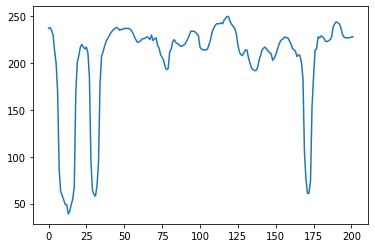



Point at jump: [(485.7147177419353, 7)]


Point at jump: [(485.7147177419353, 7), (476.6542338709673, 19)]


Point at jump: [(485.7147177419353, 7), (476.6542338709673, 19), (469.85887096774127, 28)]


Point at jump: [(485.7147177419353, 7), (476.6542338709673, 19), (469.85887096774127, 28), (464.5735887096766, 35)]


Point at jump: [(485.7147177419353, 7), (476.6542338709673, 19), (469.85887096774127, 28), (464.5735887096766, 35), (363.39818548386694, 169)]


Point at jump: [(485.7147177419353, 7), (476.6542338709673, 19), (469.85887096774127, 28), (464.5735887096766, 35), (363.39818548386694, 169), (358.11290322580226, 176)]


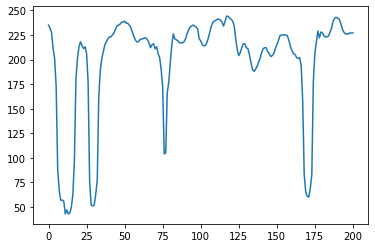



Point at jump: [(486.469758064516, 6)]


Point at jump: [(486.469758064516, 6), (476.6542338709673, 19)]


Point at jump: [(486.469758064516, 6), (476.6542338709673, 19), (470.61391129032194, 27)]


Point at jump: [(486.469758064516, 6), (476.6542338709673, 19), (470.61391129032194, 27), (465.32862903225725, 34)]


Point at jump: [(486.469758064516, 6), (476.6542338709673, 19), (470.61391129032194, 27), (465.32862903225725, 34), (364.1532258064476, 168)]


Point at jump: [(486.469758064516, 6), (476.6542338709673, 19), (470.61391129032194, 27), (465.32862903225725, 34), (364.1532258064476, 168), (358.8679435483829, 175)]


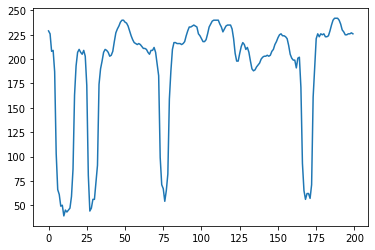



Point at jump: [(487.22479838709666, 5)]


Point at jump: [(487.22479838709666, 5), (476.6542338709673, 19)]


Point at jump: [(487.22479838709666, 5), (476.6542338709673, 19), (471.3689516129026, 26)]


Point at jump: [(487.22479838709666, 5), (476.6542338709673, 19), (471.3689516129026, 26), (465.32862903225725, 34)]


Point at jump: [(487.22479838709666, 5), (476.6542338709673, 19), (471.3689516129026, 26), (465.32862903225725, 34), (435.1270161290305, 74)]


Point at jump: [(487.22479838709666, 5), (476.6542338709673, 19), (471.3689516129026, 26), (465.32862903225725, 34), (435.1270161290305, 74), (430.5967741935465, 80)]


Point at jump: [(487.22479838709666, 5), (476.6542338709673, 19), (471.3689516129026, 26), (465.32862903225725, 34), (435.1270161290305, 74), (430.5967741935465, 80), (364.9082661290283, 167)]


Point at jump: [(487.22479838709666, 5), (476.6542338709673, 19), (471.3689516129026, 26), (465.32862903225725, 34), (435.1270161290305, 74), (430.5967741935465, 80), 

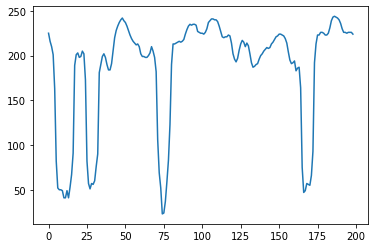



Point at jump: [(487.22479838709666, 5)]


Point at jump: [(487.22479838709666, 5), (478.1643145161286, 17)]


Point at jump: [(487.22479838709666, 5), (478.1643145161286, 17), (472.1239919354833, 25)]


Point at jump: [(487.22479838709666, 5), (478.1643145161286, 17), (472.1239919354833, 25), (465.32862903225725, 34)]


Point at jump: [(487.22479838709666, 5), (478.1643145161286, 17), (472.1239919354833, 25), (465.32862903225725, 34), (436.63709677419183, 72)]


Point at jump: [(487.22479838709666, 5), (478.1643145161286, 17), (472.1239919354833, 25), (465.32862903225725, 34), (436.63709677419183, 72), (430.5967741935465, 80)]


Point at jump: [(487.22479838709666, 5), (478.1643145161286, 17), (472.1239919354833, 25), (465.32862903225725, 34), (436.63709677419183, 72), (430.5967741935465, 80), (366.4183467741896, 165)]


Point at jump: [(487.22479838709666, 5), (478.1643145161286, 17), (472.1239919354833, 25), (465.32862903225725, 34), (436.63709677419183, 72), (430.5967741935465, 8

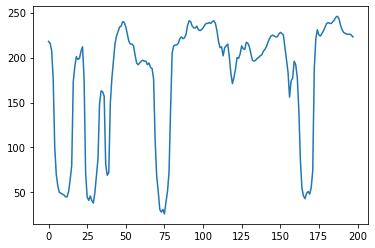



Point at jump: [(487.9798387096773, 4)]


Point at jump: [(487.9798387096773, 4), (475.14415322580595, 21)]


Point at jump: [(487.9798387096773, 4), (475.14415322580595, 21), (472.87903225806394, 24)]


Point at jump: [(487.9798387096773, 4), (475.14415322580595, 21), (472.87903225806394, 24), (460.04334677419257, 41)]


Point at jump: [(487.9798387096773, 4), (475.14415322580595, 21), (472.87903225806394, 24), (460.04334677419257, 41), (438.14717741935317, 70)]


Point at jump: [(487.9798387096773, 4), (475.14415322580595, 21), (472.87903225806394, 24), (460.04334677419257, 41), (438.14717741935317, 70), (430.5967741935465, 80)]


Point at jump: [(487.9798387096773, 4), (475.14415322580595, 21), (472.87903225806394, 24), (460.04334677419257, 41), (438.14717741935317, 70), (430.5967741935465, 80), (367.92842741935095, 163)]


Point at jump: [(487.9798387096773, 4), (475.14415322580595, 21), (472.87903225806394, 24), (460.04334677419257, 41), (438.14717741935317, 70), (430.5967741935

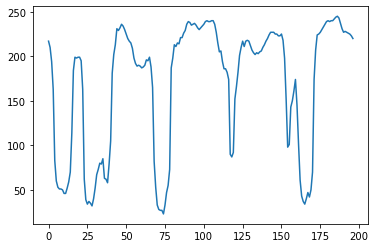



Point at jump: [(487.9798387096773, 4)]


Point at jump: [(487.9798387096773, 4), (478.9193548387093, 16)]


Point at jump: [(487.9798387096773, 4), (478.9193548387093, 16), (473.6340725806446, 23)]


Point at jump: [(487.9798387096773, 4), (478.9193548387093, 16), (473.6340725806446, 23), (460.04334677419257, 41)]


Point at jump: [(487.9798387096773, 4), (478.9193548387093, 16), (473.6340725806446, 23), (460.04334677419257, 41), (438.90221774193384, 69)]


Point at jump: [(487.9798387096773, 4), (478.9193548387093, 16), (473.6340725806446, 23), (460.04334677419257, 41), (438.90221774193384, 69), (431.35181451612715, 79)]


Point at jump: [(487.9798387096773, 4), (478.9193548387093, 16), (473.6340725806446, 23), (460.04334677419257, 41), (438.90221774193384, 69), (431.35181451612715, 79), (368.6834677419316, 162)]


Point at jump: [(487.9798387096773, 4), (478.9193548387093, 16), (473.6340725806446, 23), (460.04334677419257, 41), (438.90221774193384, 69), (431.35181451612715, 79), (

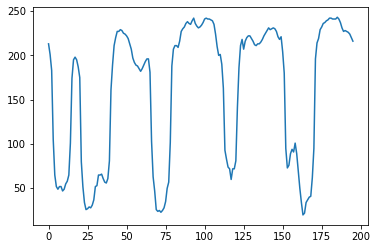



Point at jump: [(488.734879032258, 3)]


Point at jump: [(488.734879032258, 3), (459.2883064516119, 42)]


Point at jump: [(488.734879032258, 3), (459.2883064516119, 42), (441.16733870967585, 66)]


Point at jump: [(488.734879032258, 3), (459.2883064516119, 42), (441.16733870967585, 66), (430.5967741935465, 80)]


Point at jump: [(488.734879032258, 3), (459.2883064516119, 42), (441.16733870967585, 66), (430.5967741935465, 80), (405.6804435483844, 113)]


Point at jump: [(488.734879032258, 3), (459.2883064516119, 42), (441.16733870967585, 66), (430.5967741935465, 80), (405.6804435483844, 113), (398.1300403225777, 123)]


Point at jump: [(488.734879032258, 3), (459.2883064516119, 42), (441.16733870967585, 66), (430.5967741935465, 80), (405.6804435483844, 113), (398.1300403225777, 123), (376.2338709677383, 152)]


Point at jump: [(488.734879032258, 3), (459.2883064516119, 42), (441.16733870967585, 66), (430.5967741935465, 80), (405.6804435483844, 113), (398.1300403225777, 123), (376.233

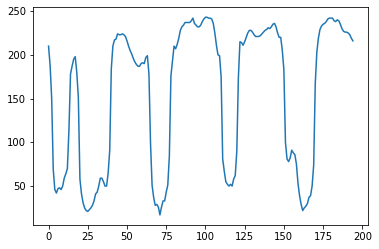



Point at jump: [(488.734879032258, 3)]


Point at jump: [(488.734879032258, 3), (480.42943548387063, 14)]


Point at jump: [(488.734879032258, 3), (480.42943548387063, 14), (475.8991935483866, 20)]


Point at jump: [(488.734879032258, 3), (480.42943548387063, 14), (475.8991935483866, 20), (460.79838709677324, 40)]


Point at jump: [(488.734879032258, 3), (480.42943548387063, 14), (475.8991935483866, 20), (460.79838709677324, 40), (441.16733870967585, 66)]


Point at jump: [(488.734879032258, 3), (480.42943548387063, 14), (475.8991935483866, 20), (460.79838709677324, 40), (441.16733870967585, 66), (432.1068548387078, 78)]


Point at jump: [(488.734879032258, 3), (480.42943548387063, 14), (475.8991935483866, 20), (460.79838709677324, 40), (441.16733870967585, 66), (432.1068548387078, 78), (406.4354838709651, 112)]


Point at jump: [(488.734879032258, 3), (480.42943548387063, 14), (475.8991935483866, 20), (460.79838709677324, 40), (441.16733870967585, 66), (432.1068548387078, 78), (406.

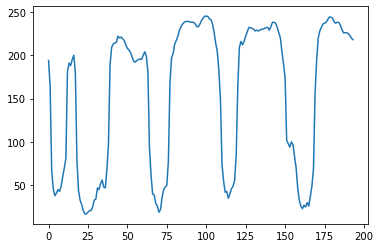



Point at jump: [(489.48991935483866, 2)]


Point at jump: [(489.48991935483866, 2), (481.939516129032, 12)]


Point at jump: [(489.48991935483866, 2), (481.939516129032, 12), (477.40927419354796, 18)]


Point at jump: [(489.48991935483866, 2), (481.939516129032, 12), (477.40927419354796, 18), (461.5534274193539, 39)]


Point at jump: [(489.48991935483866, 2), (481.939516129032, 12), (477.40927419354796, 18), (461.5534274193539, 39), (441.9223790322565, 65)]


Point at jump: [(489.48991935483866, 2), (481.939516129032, 12), (477.40927419354796, 18), (461.5534274193539, 39), (441.9223790322565, 65), (432.8618951612885, 77)]


Point at jump: [(489.48991935483866, 2), (481.939516129032, 12), (477.40927419354796, 18), (461.5534274193539, 39), (441.9223790322565, 65), (432.8618951612885, 77), (407.19052419354574, 111)]


Point at jump: [(489.48991935483866, 2), (481.939516129032, 12), (477.40927419354796, 18), (461.5534274193539, 39), (441.9223790322565, 65), (432.8618951612885, 77), (407.

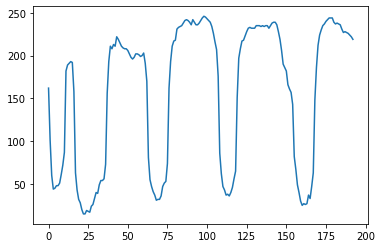



Point at jump: [(489.48991935483866, 2)]


Point at jump: [(489.48991935483866, 2), (482.69455645161264, 11)]


Point at jump: [(489.48991935483866, 2), (482.69455645161264, 11), (478.1643145161286, 17)]


Point at jump: [(489.48991935483866, 2), (482.69455645161264, 11), (478.1643145161286, 17), (462.3084677419346, 38)]


Point at jump: [(489.48991935483866, 2), (482.69455645161264, 11), (478.1643145161286, 17), (462.3084677419346, 38), (443.43245967741785, 63)]


Point at jump: [(489.48991935483866, 2), (482.69455645161264, 11), (478.1643145161286, 17), (462.3084677419346, 38), (443.43245967741785, 63), (432.8618951612885, 77)]


Point at jump: [(489.48991935483866, 2), (482.69455645161264, 11), (478.1643145161286, 17), (462.3084677419346, 38), (443.43245967741785, 63), (432.8618951612885, 77), (409.45564516128775, 108)]


Point at jump: [(489.48991935483866, 2), (482.69455645161264, 11), (478.1643145161286, 17), (462.3084677419346, 38), (443.43245967741785, 63), (432.8618951612885

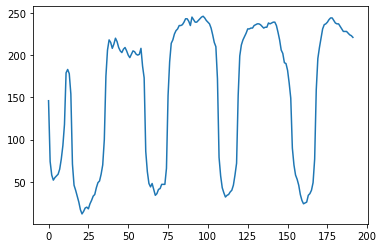



Point at jump: [(478.1643145161286, 17)]


Point at jump: [(478.1643145161286, 17), (463.8185483870959, 36)]


Point at jump: [(478.1643145161286, 17), (463.8185483870959, 36), (444.1874999999985, 62)]


Point at jump: [(478.1643145161286, 17), (463.8185483870959, 36), (444.1874999999985, 62), (433.61693548386916, 76)]


Point at jump: [(478.1643145161286, 17), (463.8185483870959, 36), (444.1874999999985, 62), (433.61693548386916, 76), (410.2106854838684, 107)]


Point at jump: [(478.1643145161286, 17), (463.8185483870959, 36), (444.1874999999985, 62), (433.61693548386916, 76), (410.2106854838684, 107), (400.3951612903197, 120)]


Point at jump: [(478.1643145161286, 17), (463.8185483870959, 36), (444.1874999999985, 62), (433.61693548386916, 76), (410.2106854838684, 107), (400.3951612903197, 120), (375.47883064515764, 153)]


Point at jump: [(478.1643145161286, 17), (463.8185483870959, 36), (444.1874999999985, 62), (433.61693548386916, 76), (410.2106854838684, 107), (400.3951612903197

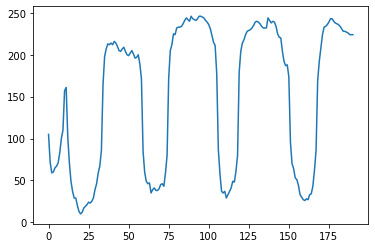



Point at jump: [(463.8185483870959, 36)]


Point at jump: [(463.8185483870959, 36), (446.45262096774053, 59)]


Point at jump: [(463.8185483870959, 36), (446.45262096774053, 59), (433.61693548386916, 76)]


Point at jump: [(463.8185483870959, 36), (446.45262096774053, 59), (433.61693548386916, 76), (410.9657258064491, 106)]


Point at jump: [(463.8185483870959, 36), (446.45262096774053, 59), (433.61693548386916, 76), (410.9657258064491, 106), (400.3951612903197, 120)]


Point at jump: [(463.8185483870959, 36), (446.45262096774053, 59), (433.61693548386916, 76), (410.9657258064491, 106), (400.3951612903197, 120), (376.988911290319, 151)]


Point at jump: [(463.8185483870959, 36), (446.45262096774053, 59), (433.61693548386916, 76), (410.9657258064491, 106), (400.3951612903197, 120), (376.988911290319, 151), (362.64314516128627, 170)]


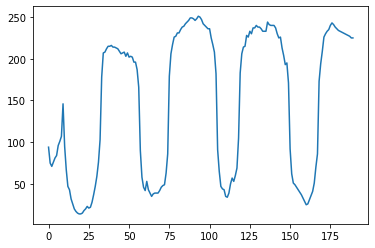



Point at jump: [(465.32862903225725, 34)]


Point at jump: [(465.32862903225725, 34), (447.96270161290187, 57)]


Point at jump: [(465.32862903225725, 34), (447.96270161290187, 57), (433.61693548386916, 76)]


Point at jump: [(465.32862903225725, 34), (447.96270161290187, 57), (433.61693548386916, 76), (411.72076612902976, 105)]


Point at jump: [(465.32862903225725, 34), (447.96270161290187, 57), (433.61693548386916, 76), (411.72076612902976, 105), (400.3951612903197, 120)]


Point at jump: [(465.32862903225725, 34), (447.96270161290187, 57), (433.61693548386916, 76), (411.72076612902976, 105), (400.3951612903197, 120), (377.74395161289965, 150)]


Point at jump: [(465.32862903225725, 34), (447.96270161290187, 57), (433.61693548386916, 76), (411.72076612902976, 105), (400.3951612903197, 120), (377.74395161289965, 150), (363.39818548386694, 169)]


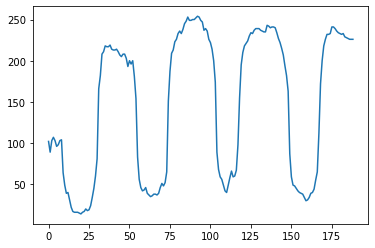



Point at jump: [(466.0836693548379, 33)]


Point at jump: [(466.0836693548379, 33), (449.4727822580632, 55)]


Point at jump: [(466.0836693548379, 33), (449.4727822580632, 55), (434.3719758064498, 75)]


Point at jump: [(466.0836693548379, 33), (449.4727822580632, 55), (434.3719758064498, 75), (411.72076612902976, 105)]


Point at jump: [(466.0836693548379, 33), (449.4727822580632, 55), (434.3719758064498, 75), (411.72076612902976, 105), (401.1502016129004, 119)]


Point at jump: [(466.0836693548379, 33), (449.4727822580632, 55), (434.3719758064498, 75), (411.72076612902976, 105), (401.1502016129004, 119), (378.4989919354803, 149)]


Point at jump: [(466.0836693548379, 33), (449.4727822580632, 55), (434.3719758064498, 75), (411.72076612902976, 105), (401.1502016129004, 119), (378.4989919354803, 149), (363.39818548386694, 169)]


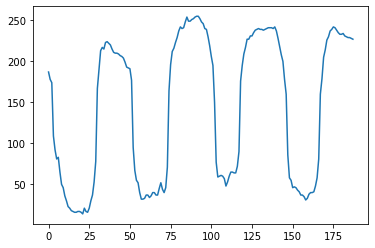



Point at jump: [(487.22479838709666, 5)]


Point at jump: [(487.22479838709666, 5), (467.59374999999926, 31)]


Point at jump: [(487.22479838709666, 5), (467.59374999999926, 31), (450.98286290322454, 53)]


Point at jump: [(487.22479838709666, 5), (467.59374999999926, 31), (450.98286290322454, 53), (434.3719758064498, 75)]


Point at jump: [(487.22479838709666, 5), (467.59374999999926, 31), (450.98286290322454, 53), (434.3719758064498, 75), (413.2308467741911, 103)]


Point at jump: [(487.22479838709666, 5), (467.59374999999926, 31), (450.98286290322454, 53), (434.3719758064498, 75), (413.2308467741911, 103), (401.1502016129004, 119)]


Point at jump: [(487.22479838709666, 5), (467.59374999999926, 31), (450.98286290322454, 53), (434.3719758064498, 75), (413.2308467741911, 103), (401.1502016129004, 119), (380.00907258064166, 147)]


Point at jump: [(487.22479838709666, 5), (467.59374999999926, 31), (450.98286290322454, 53), (434.3719758064498, 75), (413.2308467741911, 103), (401.15020

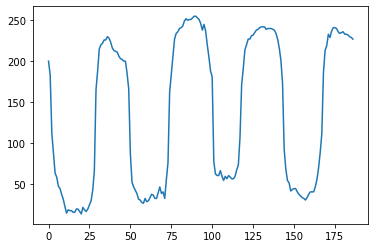



Point at jump: [(488.734879032258, 3)]


Point at jump: [(488.734879032258, 3), (467.59374999999926, 31)]


Point at jump: [(488.734879032258, 3), (467.59374999999926, 31), (453.24798387096655, 50)]


Point at jump: [(488.734879032258, 3), (467.59374999999926, 31), (453.24798387096655, 50), (433.61693548386916, 76)]


Point at jump: [(488.734879032258, 3), (467.59374999999926, 31), (453.24798387096655, 50), (433.61693548386916, 76), (414.74092741935243, 101)]


Point at jump: [(488.734879032258, 3), (467.59374999999926, 31), (453.24798387096655, 50), (433.61693548386916, 76), (414.74092741935243, 101), (401.1502016129004, 119)]


Point at jump: [(488.734879032258, 3), (467.59374999999926, 31), (453.24798387096655, 50), (433.61693548386916, 76), (414.74092741935243, 101), (401.1502016129004, 119), (381.519153225803, 145)]


Point at jump: [(488.734879032258, 3), (467.59374999999926, 31), (453.24798387096655, 50), (433.61693548386916, 76), (414.74092741935243, 101), (401.1502016129004,

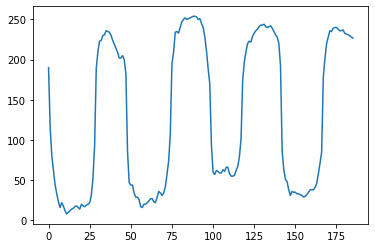



Point at jump: [(489.48991935483866, 2)]


Point at jump: [(489.48991935483866, 2), (469.1038306451606, 29)]


Point at jump: [(489.48991935483866, 2), (469.1038306451606, 29), (454.7580645161279, 48)]


Point at jump: [(489.48991935483866, 2), (469.1038306451606, 29), (454.7580645161279, 48), (434.3719758064498, 75)]


Point at jump: [(489.48991935483866, 2), (469.1038306451606, 29), (454.7580645161279, 48), (434.3719758064498, 75), (416.25100806451377, 99)]


Point at jump: [(489.48991935483866, 2), (469.1038306451606, 29), (454.7580645161279, 48), (434.3719758064498, 75), (416.25100806451377, 99), (401.1502016129004, 119)]


Point at jump: [(489.48991935483866, 2), (469.1038306451606, 29), (454.7580645161279, 48), (434.3719758064498, 75), (416.25100806451377, 99), (401.1502016129004, 119), (383.784274193545, 142)]


Point at jump: [(489.48991935483866, 2), (469.1038306451606, 29), (454.7580645161279, 48), (434.3719758064498, 75), (416.25100806451377, 99), (401.1502016129004, 119),

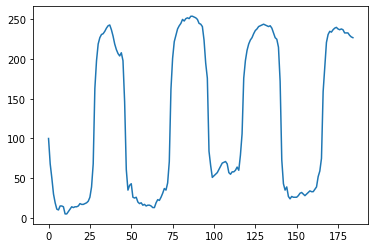



Point at jump: [(468.34879032257993, 30)]


Point at jump: [(468.34879032257993, 30), (455.51310483870856, 47)]


Point at jump: [(468.34879032257993, 30), (455.51310483870856, 47), (435.1270161290305, 74)]


Point at jump: [(468.34879032257993, 30), (455.51310483870856, 47), (435.1270161290305, 74), (416.25100806451377, 99)]


Point at jump: [(468.34879032257993, 30), (455.51310483870856, 47), (435.1270161290305, 74), (416.25100806451377, 99), (401.90524193548106, 118)]


Point at jump: [(468.34879032257993, 30), (455.51310483870856, 47), (435.1270161290305, 74), (416.25100806451377, 99), (401.90524193548106, 118), (384.53931451612567, 141)]


Point at jump: [(468.34879032257993, 30), (455.51310483870856, 47), (435.1270161290305, 74), (416.25100806451377, 99), (401.90524193548106, 118), (384.53931451612567, 141), (364.9082661290283, 167)]


Point at jump: [(468.34879032257993, 30)]


Point at jump: [(468.34879032257993, 30), (455.51310483870856, 47)]


Point at jump: [(468.348790322

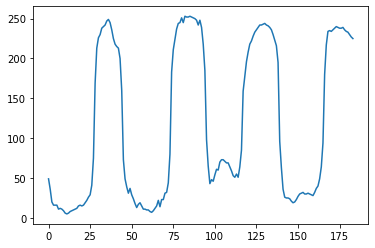



Point at jump: [(469.85887096774127, 28)]


Point at jump: [(469.85887096774127, 28), (456.2681451612892, 46)]


Point at jump: [(469.85887096774127, 28), (456.2681451612892, 46), (435.1270161290305, 74)]


Point at jump: [(469.85887096774127, 28), (456.2681451612892, 46), (435.1270161290305, 74), (418.5161290322558, 96)]


Point at jump: [(469.85887096774127, 28), (456.2681451612892, 46), (435.1270161290305, 74), (418.5161290322558, 96), (401.90524193548106, 118)]


Point at jump: [(469.85887096774127, 28), (456.2681451612892, 46), (435.1270161290305, 74), (418.5161290322558, 96), (401.90524193548106, 118), (385.29435483870634, 140)]


Point at jump: [(469.85887096774127, 28), (456.2681451612892, 46), (435.1270161290305, 74), (418.5161290322558, 96), (401.90524193548106, 118), (385.29435483870634, 140), (365.66330645160895, 166)]


Point at jump: [(469.85887096774127, 28)]


Point at jump: [(469.85887096774127, 28), (456.2681451612892, 46)]


Point at jump: [(469.85887096774127, 28)

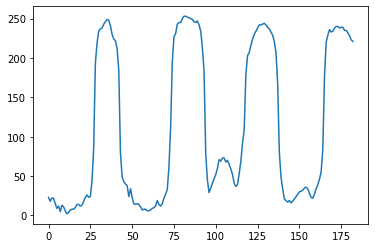



Point at jump: [(469.85887096774127, 28)]


Point at jump: [(469.85887096774127, 28), (458.53326612903123, 43)]


Point at jump: [(469.85887096774127, 28), (458.53326612903123, 43), (435.1270161290305, 74)]


Point at jump: [(469.85887096774127, 28), (458.53326612903123, 43), (435.1270161290305, 74), (420.0262096774171, 94)]


Point at jump: [(469.85887096774127, 28), (458.53326612903123, 43), (435.1270161290305, 74), (420.0262096774171, 94), (401.90524193548106, 118)]


Point at jump: [(469.85887096774127, 28), (458.53326612903123, 43), (435.1270161290305, 74), (420.0262096774171, 94), (401.90524193548106, 118), (386.049395161287, 139)]


Point at jump: [(469.85887096774127, 28), (458.53326612903123, 43), (435.1270161290305, 74), (420.0262096774171, 94), (401.90524193548106, 118), (386.049395161287, 139), (366.4183467741896, 165)]


Point at jump: [(469.85887096774127, 28)]


Point at jump: [(469.85887096774127, 28), (458.53326612903123, 43)]


Point at jump: [(469.85887096774127, 2

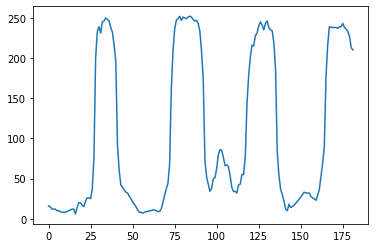



Point at jump: [(469.85887096774127, 28)]


Point at jump: [(469.85887096774127, 28), (460.04334677419257, 41)]


Point at jump: [(469.85887096774127, 28), (460.04334677419257, 41), (435.1270161290305, 74)]


Point at jump: [(469.85887096774127, 28), (460.04334677419257, 41), (435.1270161290305, 74), (420.7812499999978, 93)]


Point at jump: [(469.85887096774127, 28), (460.04334677419257, 41), (435.1270161290305, 74), (420.7812499999978, 93), (401.1502016129004, 119)]


Point at jump: [(469.85887096774127, 28), (460.04334677419257, 41), (435.1270161290305, 74), (420.7812499999978, 93), (401.1502016129004, 119), (387.55947580644835, 137)]


Point at jump: [(469.85887096774127, 28), (460.04334677419257, 41), (435.1270161290305, 74), (420.7812499999978, 93), (401.1502016129004, 119), (387.55947580644835, 137), (366.4183467741896, 165)]


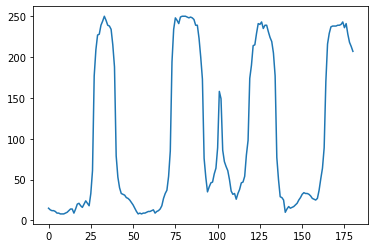



Point at jump: [(470.61391129032194, 27)]


Point at jump: [(470.61391129032194, 27), (460.04334677419257, 41)]


Point at jump: [(470.61391129032194, 27), (460.04334677419257, 41), (435.88205645161116, 73)]


Point at jump: [(470.61391129032194, 27), (460.04334677419257, 41), (435.88205645161116, 73), (421.53629032257845, 92)]


Point at jump: [(470.61391129032194, 27), (460.04334677419257, 41), (435.88205645161116, 73), (421.53629032257845, 92), (400.3951612903197, 120)]


Point at jump: [(470.61391129032194, 27), (460.04334677419257, 41), (435.88205645161116, 73), (421.53629032257845, 92), (400.3951612903197, 120), (389.0695564516097, 135)]


Point at jump: [(470.61391129032194, 27), (460.04334677419257, 41), (435.88205645161116, 73), (421.53629032257845, 92), (400.3951612903197, 120), (389.0695564516097, 135), (366.4183467741896, 165)]


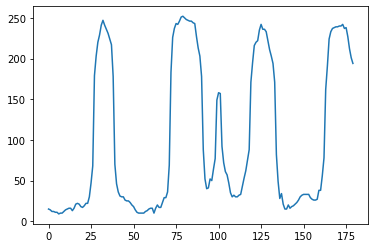



Point at jump: [(470.61391129032194, 27)]


Point at jump: [(470.61391129032194, 27), (461.5534274193539, 39)]


Point at jump: [(470.61391129032194, 27), (461.5534274193539, 39), (436.63709677419183, 72)]


Point at jump: [(470.61391129032194, 27), (461.5534274193539, 39), (436.63709677419183, 72), (421.53629032257845, 92)]


Point at jump: [(470.61391129032194, 27), (461.5534274193539, 39), (436.63709677419183, 72), (421.53629032257845, 92), (415.4959677419331, 100)]


Point at jump: [(470.61391129032194, 27), (461.5534274193539, 39), (436.63709677419183, 72), (421.53629032257845, 92), (415.4959677419331, 100), (411.72076612902976, 105)]


Point at jump: [(470.61391129032194, 27), (461.5534274193539, 39), (436.63709677419183, 72), (421.53629032257845, 92), (415.4959677419331, 100), (411.72076612902976, 105), (401.1502016129004, 119)]


Point at jump: [(470.61391129032194, 27), (461.5534274193539, 39), (436.63709677419183, 72), (421.53629032257845, 92), (415.4959677419331, 100), (41

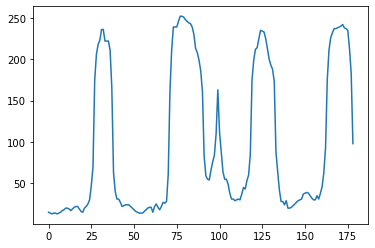



Point at jump: [(470.61391129032194, 27)]


Point at jump: [(470.61391129032194, 27), (462.3084677419346, 38)]


Point at jump: [(470.61391129032194, 27), (462.3084677419346, 38), (436.63709677419183, 72)]


Point at jump: [(470.61391129032194, 27), (462.3084677419346, 38), (436.63709677419183, 72), (422.2913306451591, 91)]


Point at jump: [(470.61391129032194, 27), (462.3084677419346, 38), (436.63709677419183, 72), (422.2913306451591, 91), (400.3951612903197, 120)]


Point at jump: [(470.61391129032194, 27), (462.3084677419346, 38), (436.63709677419183, 72), (422.2913306451591, 91), (400.3951612903197, 120), (390.579637096771, 133)]


Point at jump: [(470.61391129032194, 27), (462.3084677419346, 38), (436.63709677419183, 72), (422.2913306451591, 91), (400.3951612903197, 120), (390.579637096771, 133), (367.1733870967703, 164)]


Point at jump: [(470.61391129032194, 27), (462.3084677419346, 38), (436.63709677419183, 72), (422.2913306451591, 91), (400.3951612903197, 120), (390.5796370

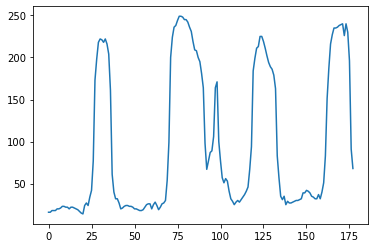



Point at jump: [(470.61391129032194, 27)]


Point at jump: [(470.61391129032194, 27), (463.06350806451525, 37)]


Point at jump: [(470.61391129032194, 27), (463.06350806451525, 37), (437.3921370967725, 71)]


Point at jump: [(470.61391129032194, 27), (463.06350806451525, 37), (437.3921370967725, 71), (422.2913306451591, 91)]


Point at jump: [(470.61391129032194, 27), (463.06350806451525, 37), (437.3921370967725, 71), (422.2913306451591, 91), (400.3951612903197, 120)]


Point at jump: [(470.61391129032194, 27), (463.06350806451525, 37), (437.3921370967725, 71), (422.2913306451591, 91), (400.3951612903197, 120), (390.579637096771, 133)]


Point at jump: [(470.61391129032194, 27), (463.06350806451525, 37), (437.3921370967725, 71), (422.2913306451591, 91), (400.3951612903197, 120), (390.579637096771, 133), (367.92842741935095, 163)]


Point at jump: [(470.61391129032194, 27), (463.06350806451525, 37), (437.3921370967725, 71), (422.2913306451591, 91), (400.3951612903197, 120), (390.57963

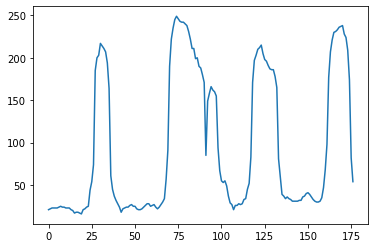



Point at jump: [(470.61391129032194, 27)]


Point at jump: [(470.61391129032194, 27), (463.8185483870959, 36)]


Point at jump: [(470.61391129032194, 27), (463.8185483870959, 36), (438.14717741935317, 70)]


Point at jump: [(470.61391129032194, 27), (463.8185483870959, 36), (438.14717741935317, 70), (422.2913306451591, 91)]


Point at jump: [(470.61391129032194, 27), (463.8185483870959, 36), (438.14717741935317, 70), (422.2913306451591, 91), (401.1502016129004, 119)]


Point at jump: [(470.61391129032194, 27), (463.8185483870959, 36), (438.14717741935317, 70), (422.2913306451591, 91), (401.1502016129004, 119), (390.579637096771, 133)]


Point at jump: [(470.61391129032194, 27), (463.8185483870959, 36), (438.14717741935317, 70), (422.2913306451591, 91), (401.1502016129004, 119), (390.579637096771, 133), (367.92842741935095, 163)]


Point at jump: [(470.61391129032194, 27), (463.8185483870959, 36), (438.14717741935317, 70), (422.2913306451591, 91), (401.1502016129004, 119), (390.579637

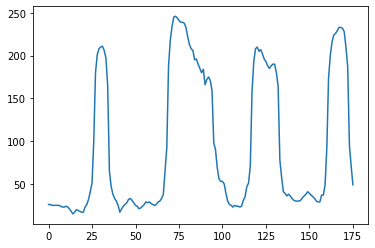



Point at jump: [(470.61391129032194, 27)]


Point at jump: [(470.61391129032194, 27), (464.5735887096766, 35)]


Point at jump: [(470.61391129032194, 27), (464.5735887096766, 35), (438.90221774193384, 69)]


Point at jump: [(470.61391129032194, 27), (464.5735887096766, 35), (438.90221774193384, 69), (417.7610887096751, 97)]


Point at jump: [(470.61391129032194, 27), (464.5735887096766, 35), (438.90221774193384, 69), (417.7610887096751, 97), (401.90524193548106, 118)]


Point at jump: [(470.61391129032194, 27), (464.5735887096766, 35), (438.90221774193384, 69), (417.7610887096751, 97), (401.90524193548106, 118), (390.579637096771, 133)]


Point at jump: [(470.61391129032194, 27), (464.5735887096766, 35), (438.90221774193384, 69), (417.7610887096751, 97), (401.90524193548106, 118), (390.579637096771, 133), (368.6834677419316, 162)]


Point at jump: [(470.61391129032194, 27), (464.5735887096766, 35), (438.90221774193384, 69), (417.7610887096751, 97), (401.90524193548106, 118), (390.579

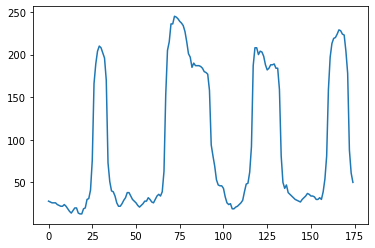



Point at jump: [(471.3689516129026, 26)]


Point at jump: [(471.3689516129026, 26), (464.5735887096766, 35)]


Point at jump: [(471.3689516129026, 26), (464.5735887096766, 35), (440.4122983870952, 67)]


Point at jump: [(471.3689516129026, 26), (464.5735887096766, 35), (440.4122983870952, 67), (417.7610887096751, 97)]


Point at jump: [(471.3689516129026, 26), (464.5735887096766, 35), (440.4122983870952, 67), (417.7610887096751, 97), (402.6602822580617, 117)]


Point at jump: [(471.3689516129026, 26), (464.5735887096766, 35), (440.4122983870952, 67), (417.7610887096751, 97), (402.6602822580617, 117), (390.579637096771, 133)]


Point at jump: [(471.3689516129026, 26), (464.5735887096766, 35), (440.4122983870952, 67), (417.7610887096751, 97), (402.6602822580617, 117), (390.579637096771, 133), (369.4385080645123, 161)]


Point at jump: [(471.3689516129026, 26), (464.5735887096766, 35), (440.4122983870952, 67), (417.7610887096751, 97), (402.6602822580617, 117), (390.579637096771, 133), (

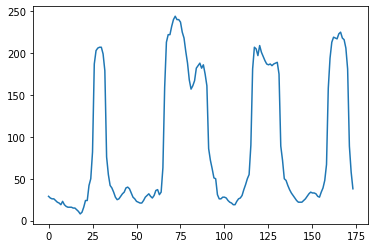



Point at jump: [(471.3689516129026, 26)]


Point at jump: [(471.3689516129026, 26), (466.0836693548379, 33)]


Point at jump: [(471.3689516129026, 26), (466.0836693548379, 33), (440.4122983870952, 67)]


Point at jump: [(471.3689516129026, 26), (466.0836693548379, 33), (440.4122983870952, 67), (422.2913306451591, 91)]


Point at jump: [(471.3689516129026, 26), (466.0836693548379, 33), (440.4122983870952, 67), (422.2913306451591, 91), (402.6602822580617, 117)]


Point at jump: [(471.3689516129026, 26), (466.0836693548379, 33), (440.4122983870952, 67), (422.2913306451591, 91), (402.6602822580617, 117), (391.3346774193517, 132)]


Point at jump: [(471.3689516129026, 26), (466.0836693548379, 33), (440.4122983870952, 67), (422.2913306451591, 91), (402.6602822580617, 117), (391.3346774193517, 132), (370.19354838709296, 160)]


Point at jump: [(471.3689516129026, 26), (466.0836693548379, 33), (440.4122983870952, 67), (422.2913306451591, 91), (402.6602822580617, 117), (391.3346774193517, 132

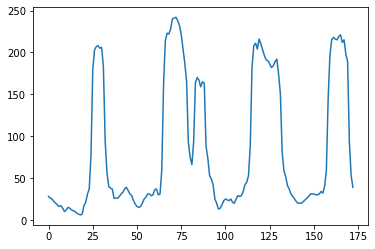



Point at jump: [(472.1239919354833, 25)]


Point at jump: [(472.1239919354833, 25), (466.0836693548379, 33)]


Point at jump: [(472.1239919354833, 25), (466.0836693548379, 33), (441.9223790322565, 65)]


Point at jump: [(472.1239919354833, 25), (466.0836693548379, 33), (441.9223790322565, 65), (422.2913306451591, 91)]


Point at jump: [(472.1239919354833, 25), (466.0836693548379, 33), (441.9223790322565, 65), (422.2913306451591, 91), (404.17036290322307, 115)]


Point at jump: [(472.1239919354833, 25), (466.0836693548379, 33), (441.9223790322565, 65), (422.2913306451591, 91), (404.17036290322307, 115), (391.3346774193517, 132)]


Point at jump: [(472.1239919354833, 25), (466.0836693548379, 33), (441.9223790322565, 65), (422.2913306451591, 91), (404.17036290322307, 115), (391.3346774193517, 132), (370.94858870967363, 159)]


Point at jump: [(472.1239919354833, 25), (466.0836693548379, 33), (441.9223790322565, 65), (422.2913306451591, 91), (404.17036290322307, 115), (391.3346774193517,

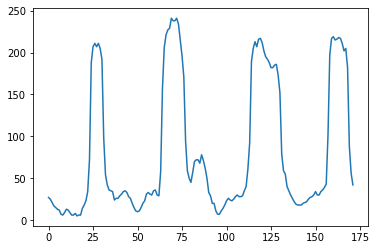



Point at jump: [(472.87903225806394, 24)]


Point at jump: [(472.87903225806394, 24), (466.8387096774186, 32)]


Point at jump: [(472.87903225806394, 24), (466.8387096774186, 32), (442.6774193548372, 64)]


Point at jump: [(472.87903225806394, 24), (466.8387096774186, 32), (442.6774193548372, 64), (431.35181451612715, 79)]


Point at jump: [(472.87903225806394, 24), (466.8387096774186, 32), (442.6774193548372, 64), (431.35181451612715, 79), (404.92540322580373, 114)]


Point at jump: [(472.87903225806394, 24), (466.8387096774186, 32), (442.6774193548372, 64), (431.35181451612715, 79), (404.92540322580373, 114), (392.08971774193236, 131)]


Point at jump: [(472.87903225806394, 24), (466.8387096774186, 32), (442.6774193548372, 64), (431.35181451612715, 79), (404.92540322580373, 114), (392.08971774193236, 131), (371.7036290322543, 158)]


Point at jump: [(472.87903225806394, 24), (466.8387096774186, 32), (442.6774193548372, 64), (431.35181451612715, 79), (404.92540322580373, 114), (392.

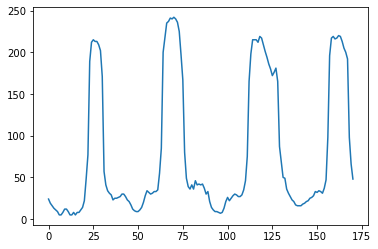



Point at jump: [(473.6340725806446, 23)]


Point at jump: [(473.6340725806446, 23), (467.59374999999926, 31)]


Point at jump: [(473.6340725806446, 23), (467.59374999999926, 31), (442.6774193548372, 64)]


Point at jump: [(473.6340725806446, 23), (467.59374999999926, 31), (442.6774193548372, 64), (433.61693548386916, 76)]


Point at jump: [(473.6340725806446, 23), (467.59374999999926, 31), (442.6774193548372, 64), (433.61693548386916, 76), (405.6804435483844, 113)]


Point at jump: [(473.6340725806446, 23), (467.59374999999926, 31), (442.6774193548372, 64), (433.61693548386916, 76), (405.6804435483844, 113), (393.5997983870937, 129)]


Point at jump: [(473.6340725806446, 23), (467.59374999999926, 31), (442.6774193548372, 64), (433.61693548386916, 76), (405.6804435483844, 113), (393.5997983870937, 129), (372.45866935483497, 157)]


Point at jump: [(473.6340725806446, 23), (467.59374999999926, 31), (442.6774193548372, 64), (433.61693548386916, 76), (405.6804435483844, 113), (393.599798

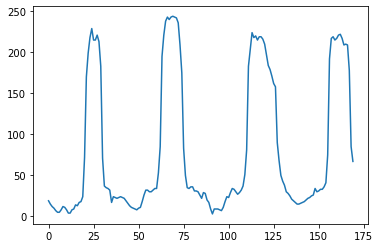



Point at jump: [(475.14415322580595, 21)]


Point at jump: [(475.14415322580595, 21), (467.59374999999926, 31)]


Point at jump: [(475.14415322580595, 21), (467.59374999999926, 31), (443.43245967741785, 63)]


Point at jump: [(475.14415322580595, 21), (467.59374999999926, 31), (443.43245967741785, 63), (434.3719758064498, 75)]


Point at jump: [(475.14415322580595, 21), (467.59374999999926, 31), (443.43245967741785, 63), (434.3719758064498, 75), (406.4354838709651, 112)]


Point at jump: [(475.14415322580595, 21), (467.59374999999926, 31), (443.43245967741785, 63), (434.3719758064498, 75), (406.4354838709651, 112), (395.10987903225504, 127)]


Point at jump: [(475.14415322580595, 21), (467.59374999999926, 31), (443.43245967741785, 63), (434.3719758064498, 75), (406.4354838709651, 112), (395.10987903225504, 127), (373.21370967741564, 156)]


Point at jump: [(475.14415322580595, 21), (467.59374999999926, 31), (443.43245967741785, 63), (434.3719758064498, 75), (406.4354838709651, 112), 

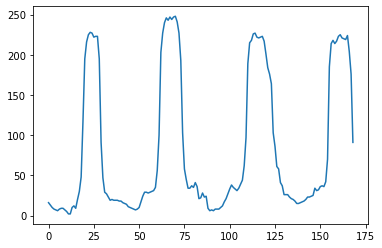



Point at jump: [(476.6542338709673, 19)]


Point at jump: [(476.6542338709673, 19), (474.3891129032253, 22)]


Point at jump: [(476.6542338709673, 19), (474.3891129032253, 22), (469.1038306451606, 29)]


Point at jump: [(476.6542338709673, 19), (474.3891129032253, 22), (469.1038306451606, 29), (444.1874999999985, 62)]


Point at jump: [(476.6542338709673, 19), (474.3891129032253, 22), (469.1038306451606, 29), (444.1874999999985, 62), (434.3719758064498, 75)]


Point at jump: [(476.6542338709673, 19), (474.3891129032253, 22), (469.1038306451606, 29), (444.1874999999985, 62), (434.3719758064498, 75), (407.9455645161264, 110)]


Point at jump: [(476.6542338709673, 19), (474.3891129032253, 22), (469.1038306451606, 29), (444.1874999999985, 62), (434.3719758064498, 75), (407.9455645161264, 110), (396.6199596774164, 125)]


Point at jump: [(476.6542338709673, 19), (474.3891129032253, 22), (469.1038306451606, 29), (444.1874999999985, 62), (434.3719758064498, 75), (407.9455645161264, 110), (3

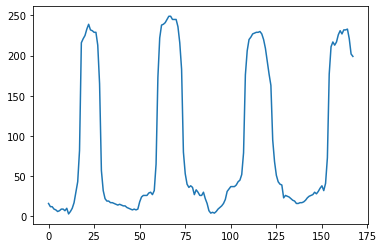



Point at jump: [(477.40927419354796, 18)]


Point at jump: [(477.40927419354796, 18), (469.1038306451606, 29)]


Point at jump: [(477.40927419354796, 18), (469.1038306451606, 29), (445.69758064515986, 60)]


Point at jump: [(477.40927419354796, 18), (469.1038306451606, 29), (445.69758064515986, 60), (434.3719758064498, 75)]


Point at jump: [(477.40927419354796, 18), (469.1038306451606, 29), (445.69758064515986, 60), (434.3719758064498, 75), (409.45564516128775, 108)]


Point at jump: [(477.40927419354796, 18), (469.1038306451606, 29), (445.69758064515986, 60), (434.3719758064498, 75), (409.45564516128775, 108), (397.37499999999704, 124)]


Point at jump: [(477.40927419354796, 18), (469.1038306451606, 29), (445.69758064515986, 60), (434.3719758064498, 75), (409.45564516128775, 108), (397.37499999999704, 124), (374.723790322577, 154)]


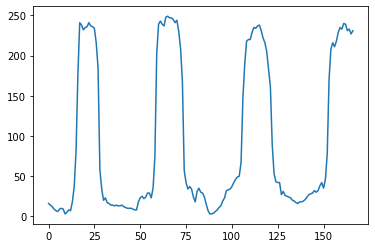



Point at jump: [(478.9193548387093, 16)]


Point at jump: [(478.9193548387093, 16), (469.85887096774127, 28)]


Point at jump: [(478.9193548387093, 16), (469.85887096774127, 28), (446.45262096774053, 59)]


Point at jump: [(478.9193548387093, 16), (469.85887096774127, 28), (446.45262096774053, 59), (435.1270161290305, 74)]


Point at jump: [(478.9193548387093, 16), (469.85887096774127, 28), (446.45262096774053, 59), (435.1270161290305, 74), (410.2106854838684, 107)]


Point at jump: [(478.9193548387093, 16), (469.85887096774127, 28), (446.45262096774053, 59), (435.1270161290305, 74), (410.2106854838684, 107), (398.1300403225777, 123)]


Point at jump: [(478.9193548387093, 16), (469.85887096774127, 28), (446.45262096774053, 59), (435.1270161290305, 74), (410.2106854838684, 107), (398.1300403225777, 123), (375.47883064515764, 153)]


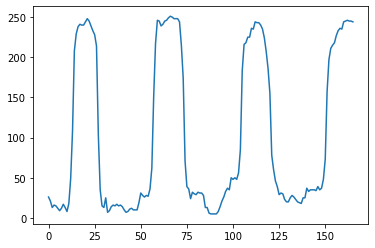



Point at jump: [(480.42943548387063, 14)]


Point at jump: [(480.42943548387063, 14), (470.61391129032194, 27)]


Point at jump: [(480.42943548387063, 14), (470.61391129032194, 27), (447.2076612903212, 58)]


Point at jump: [(480.42943548387063, 14), (470.61391129032194, 27), (447.2076612903212, 58), (435.1270161290305, 74)]


Point at jump: [(480.42943548387063, 14), (470.61391129032194, 27), (447.2076612903212, 58), (435.1270161290305, 74), (411.72076612902976, 105)]


Point at jump: [(480.42943548387063, 14), (470.61391129032194, 27), (447.2076612903212, 58), (435.1270161290305, 74), (411.72076612902976, 105), (399.64012096773905, 121)]


Point at jump: [(480.42943548387063, 14), (470.61391129032194, 27), (447.2076612903212, 58), (435.1270161290305, 74), (411.72076612902976, 105), (399.64012096773905, 121), (376.2338709677383, 152)]


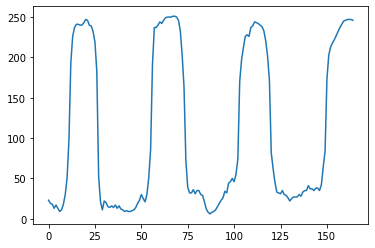



Point at jump: [(481.939516129032, 12)]


Point at jump: [(481.939516129032, 12), (470.61391129032194, 27)]


Point at jump: [(481.939516129032, 12), (470.61391129032194, 27), (448.71774193548254, 56)]


Point at jump: [(481.939516129032, 12), (470.61391129032194, 27), (448.71774193548254, 56), (435.1270161290305, 74)]


Point at jump: [(481.939516129032, 12), (470.61391129032194, 27), (448.71774193548254, 56), (435.1270161290305, 74), (412.4758064516104, 104)]


Point at jump: [(481.939516129032, 12), (470.61391129032194, 27), (448.71774193548254, 56), (435.1270161290305, 74), (412.4758064516104, 104), (400.3951612903197, 120)]


Point at jump: [(481.939516129032, 12), (470.61391129032194, 27), (448.71774193548254, 56), (435.1270161290305, 74), (412.4758064516104, 104), (400.3951612903197, 120), (376.988911290319, 151)]


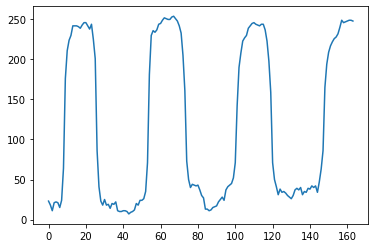



Point at jump: [(484.204637096774, 9)]


Point at jump: [(484.204637096774, 9), (470.61391129032194, 27)]


Point at jump: [(484.204637096774, 9), (470.61391129032194, 27), (450.2278225806439, 54)]


Point at jump: [(484.204637096774, 9), (470.61391129032194, 27), (450.2278225806439, 54), (435.1270161290305, 74)]


Point at jump: [(484.204637096774, 9), (470.61391129032194, 27), (450.2278225806439, 54), (435.1270161290305, 74), (413.98588709677176, 102)]


Point at jump: [(484.204637096774, 9), (470.61391129032194, 27), (450.2278225806439, 54), (435.1270161290305, 74), (413.98588709677176, 102), (400.3951612903197, 120)]


Point at jump: [(484.204637096774, 9), (470.61391129032194, 27), (450.2278225806439, 54), (435.1270161290305, 74), (413.98588709677176, 102), (400.3951612903197, 120), (378.4989919354803, 149)]


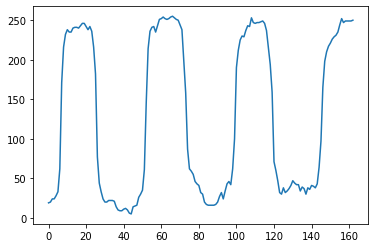



Point at jump: [(485.7147177419353, 7)]


Point at jump: [(485.7147177419353, 7), (470.61391129032194, 27)]


Point at jump: [(485.7147177419353, 7), (470.61391129032194, 27), (451.7379032258052, 52)]


Point at jump: [(485.7147177419353, 7), (470.61391129032194, 27), (451.7379032258052, 52), (446.45262096774053, 59)]


Point at jump: [(485.7147177419353, 7), (470.61391129032194, 27), (451.7379032258052, 52), (446.45262096774053, 59), (435.1270161290305, 74)]


Point at jump: [(485.7147177419353, 7), (470.61391129032194, 27), (451.7379032258052, 52), (446.45262096774053, 59), (435.1270161290305, 74), (415.4959677419331, 100)]


Point at jump: [(485.7147177419353, 7), (470.61391129032194, 27), (451.7379032258052, 52), (446.45262096774053, 59), (435.1270161290305, 74), (415.4959677419331, 100), (400.3951612903197, 120)]


Point at jump: [(485.7147177419353, 7), (470.61391129032194, 27), (451.7379032258052, 52), (446.45262096774053, 59), (435.1270161290305, 74), (415.4959677419331, 100)

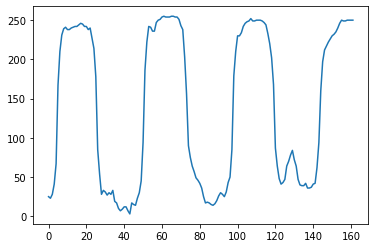



Point at jump: [(487.22479838709666, 5)]


Point at jump: [(487.22479838709666, 5), (470.61391129032194, 27)]


Point at jump: [(487.22479838709666, 5), (470.61391129032194, 27), (452.4929435483859, 51)]


Point at jump: [(487.22479838709666, 5), (470.61391129032194, 27), (452.4929435483859, 51), (434.3719758064498, 75)]


Point at jump: [(487.22479838709666, 5), (470.61391129032194, 27), (452.4929435483859, 51), (434.3719758064498, 75), (417.00604838709444, 98)]


Point at jump: [(487.22479838709666, 5), (470.61391129032194, 27), (452.4929435483859, 51), (434.3719758064498, 75), (417.00604838709444, 98), (399.64012096773905, 121)]


Point at jump: [(487.22479838709666, 5), (470.61391129032194, 27), (452.4929435483859, 51), (434.3719758064498, 75), (417.00604838709444, 98), (399.64012096773905, 121), (381.519153225803, 145)]


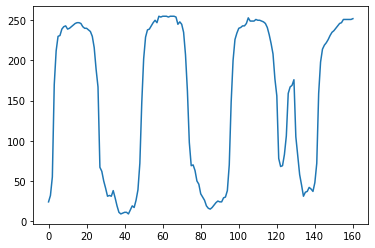



Point at jump: [(488.734879032258, 3)]


Point at jump: [(488.734879032258, 3), (470.61391129032194, 27)]


Point at jump: [(488.734879032258, 3), (470.61391129032194, 27), (453.24798387096655, 50)]


Point at jump: [(488.734879032258, 3), (470.61391129032194, 27), (453.24798387096655, 50), (435.1270161290305, 74)]


Point at jump: [(488.734879032258, 3), (470.61391129032194, 27), (453.24798387096655, 50), (435.1270161290305, 74), (417.7610887096751, 97)]


Point at jump: [(488.734879032258, 3), (470.61391129032194, 27), (453.24798387096655, 50), (435.1270161290305, 74), (417.7610887096751, 97), (399.64012096773905, 121)]


Point at jump: [(488.734879032258, 3), (470.61391129032194, 27), (453.24798387096655, 50), (435.1270161290305, 74), (417.7610887096751, 97), (399.64012096773905, 121), (383.02923387096433, 143)]


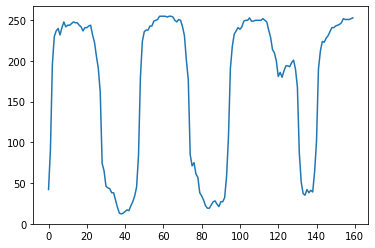



Point at jump: [(489.48991935483866, 2)]


Point at jump: [(489.48991935483866, 2), (469.85887096774127, 28)]


Point at jump: [(489.48991935483866, 2), (469.85887096774127, 28), (454.7580645161279, 48)]


Point at jump: [(489.48991935483866, 2), (469.85887096774127, 28), (454.7580645161279, 48), (434.3719758064498, 75)]


Point at jump: [(489.48991935483866, 2), (469.85887096774127, 28), (454.7580645161279, 48), (434.3719758064498, 75), (419.27116935483645, 95)]


Point at jump: [(489.48991935483866, 2), (469.85887096774127, 28), (454.7580645161279, 48), (434.3719758064498, 75), (419.27116935483645, 95), (392.08971774193236, 131)]


Point at jump: [(489.48991935483866, 2), (469.85887096774127, 28), (454.7580645161279, 48), (434.3719758064498, 75), (419.27116935483645, 95), (392.08971774193236, 131), (384.53931451612567, 141)]


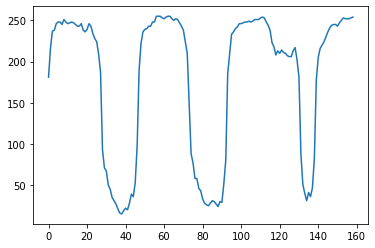



Point at jump: [(469.1038306451606, 29)]


Point at jump: [(469.1038306451606, 29), (455.51310483870856, 47)]


Point at jump: [(469.1038306451606, 29), (455.51310483870856, 47), (435.1270161290305, 74)]


Point at jump: [(469.1038306451606, 29), (455.51310483870856, 47), (435.1270161290305, 74), (420.0262096774171, 94)]


Point at jump: [(469.1038306451606, 29), (455.51310483870856, 47), (435.1270161290305, 74), (420.0262096774171, 94), (392.08971774193236, 131)]


Point at jump: [(469.1038306451606, 29), (455.51310483870856, 47), (435.1270161290305, 74), (420.0262096774171, 94), (392.08971774193236, 131), (385.29435483870634, 140)]


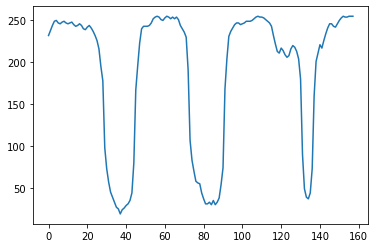



Point at jump: [(469.1038306451606, 29)]


Point at jump: [(469.1038306451606, 29), (455.51310483870856, 47)]


Point at jump: [(469.1038306451606, 29), (455.51310483870856, 47), (435.88205645161116, 73)]


Point at jump: [(469.1038306451606, 29), (455.51310483870856, 47), (435.88205645161116, 73), (420.7812499999978, 93)]


Point at jump: [(469.1038306451606, 29), (455.51310483870856, 47), (435.88205645161116, 73), (420.7812499999978, 93), (392.08971774193236, 131)]


Point at jump: [(469.1038306451606, 29), (455.51310483870856, 47), (435.88205645161116, 73), (420.7812499999978, 93), (392.08971774193236, 131), (386.8044354838677, 138)]


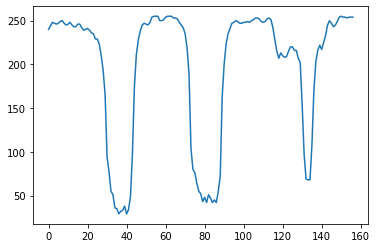



Point at jump: [(468.34879032257993, 30)]


Point at jump: [(468.34879032257993, 30), (457.0231854838699, 45)]


Point at jump: [(468.34879032257993, 30), (457.0231854838699, 45), (435.88205645161116, 73)]


Point at jump: [(468.34879032257993, 30), (457.0231854838699, 45), (435.88205645161116, 73), (422.2913306451591, 91)]


Point at jump: [(468.34879032257993, 30), (457.0231854838699, 45), (435.88205645161116, 73), (422.2913306451591, 91), (392.08971774193236, 131)]


Point at jump: [(468.34879032257993, 30), (457.0231854838699, 45), (435.88205645161116, 73), (422.2913306451591, 91), (392.08971774193236, 131), (387.55947580644835, 137)]


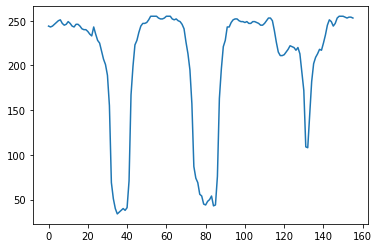



Point at jump: [(466.8387096774186, 32)]


Point at jump: [(466.8387096774186, 32), (458.53326612903123, 43)]


Point at jump: [(466.8387096774186, 32), (458.53326612903123, 43), (435.1270161290305, 74)]


Point at jump: [(466.8387096774186, 32), (458.53326612903123, 43), (435.1270161290305, 74), (424.5564516129011, 88)]


In [25]:
#Same as above but with other slope being used. 
m2 = -0.7550403225806451
image = Image.open('blur2.jpg')
imageWidth, imageHeight = image.size
x1 = 491
y1 = 0
bestValsSlope2 = []
points = []

for y in range(int(imageHeight/2)):
    y1 = y
    vals = []
    while(y1<imageHeight):
        r, g, b = image.getpixel((y,y1))
        vals.append(g)
        points.append((x1,y1))
        x1+=m2
        y1+=1
    plt.plot(vals)
    plt.show()
    if stat.stdev(differences(vals, points)) < 6:
        bestValsSlope2.append(differences(vals, points))
    
        




In [27]:
#These tests are from the cell above which uses a negative slope. 
#Distance between two points. Points taken from results above. 
#Test 1
#Points (482.69455645161264, 11)
#Points (273.5483870967673, 288)
#Distance = 49.58421410987567

#Test 2
#Points (483.4495967741933, 10)
#Points (273.5483870967673, 288)
#Distance = 49.76321849294381

#Distance Formula = SquareRoot((X2 - X1)^2 + (Y2 - Y1)^2)

X1 = 483.4495967741933
Y1 = 10

X2 = 273.5483870967673
Y2 = 288

distance = math.sqrt(pow(X2 - X1,2) + pow(Y2 - Y1, 2))

distance/7


49.76321849294381

In [36]:
#Count of all the values in the list
dens=[]
for x in range(all_distances[-1]):
    dens.append(all_distances.count(x))
    print (str(x) + "   " + str(all_distances.count(x)))

0   0
1   0
2   2
3   17
4   41
5   38
6   40
7   47
8   79
9   45
10   49
11   55
12   70
13   57
14   64
15   65
16   81
17   50
18   66
19   49
20   75
21   45
22   70
23   52
24   68
25   51
26   38
27   37
28   45
29   31
30   24
31   20
32   37
33   32
34   26
35   25
36   45
37   48
38   26
39   32
40   37
41   45
42   30
43   37
44   38
45   47
46   39
47   30
48   32
49   22
50   25
51   21
52   21
53   18
54   13
55   9
56   12
57   9
58   3
59   5
60   0
61   3
62   2
63   2
64   1
65   0
66   1
67   1
68   0
69   2
70   1
71   0
72   0
73   0
74   4
75   1
76   3
77   1
78   1
79   0
80   2
81   1
82   2
83   1
84   4
85   1
86   0
87   2
88   2
89   4
90   1
91   1
92   3
93   1
94   1
95   1
96   2
97   0
98   1
99   6
100   2
101   2
102   1
103   0
104   0
105   1
106   1
107   1
108   2
109   4
110   8
111   5
112   1
113   3
114   1
115   2
116   4
117   4
118   2
119   2
120   0
121   1
122   0
123   1
124   0
125   0
126   0
127   1
128   1
129   0
130   0
131   1
1

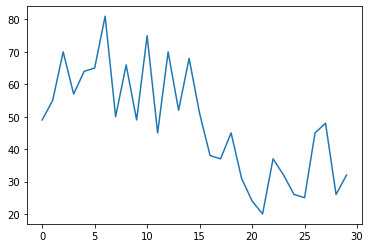

In [38]:
plt.plot(dens[10:40])

In [8]:
#Following code is from January onwards

tileWidth = 30
tileLength = 30
x = 138
y = 162

pos = (x,y)

widthSlope = 0.7530364372469636
lengthSlope = -0.7550403225806451

image = Image.open('loadedBaseHalf.jpg')
imageWidth, imageHeight = image.size
widthVector = np.array([1, widthSlope])
lengthVector = np.array([1, lengthSlope])
def mag(v):
    return math.sqrt(sum(v**2))

def normalise(v):
    return v/mag(v)

widthVectorNorm =normalise(widthVector)
lengthVectorNorm = normalise(lengthVector)

In [19]:
mag(normalise(widthVector))

1.0

In [20]:
pos + tileWidth * widthVectorNorm

array([161.96502603, 180.04653782])

In [21]:
pos + tileLength * lengthVectorNorm

array([161.94195166, 143.9228611 ])

In [6]:
def pixel_position_for_tile(start_pixel, i,j):
    
    num = start_pixel + i  * tileWidth * widthVectorNorm + j * tileLength * lengthVectorNorm
    return int(num[0]), int(num[1])


In [8]:
largeBaseImage = Image.open('loadedBaseHalf.jpg')

In [9]:
#Trial widht and legnth was 38 which worked really well. 
#The number below was calculated taking the points from the first jump point in a graph and the last jump point in the 
#same graph. 
#The elipses drawn on the graph were way off in comparison to the trial value of 38. 
#38.6
tileWidth = 38.6 #Final Val
tileLength = 38.6 #Final Val

In [10]:
#Small image x,y = 138,162
#Large image coords = 943, 699 

newImg = ImageDraw.Draw(largeBaseImage)
#-16 24
#-23 16

for i in range(-16, 24):
    for j in range(-23, 16):
        
        imgX, imgY = pixel_position_for_tile([943, 699], i, j)
        eX, eY = 5,5 #size of bounding box
        boundingBox = (imgX - eX/2, imgY - eY/2, imgX + eX/2, imgY + eY/2)
        
        newImg.ellipse(boundingBox, fill="blue")
        print(pixel_position_for_tile([943, 699], i, j))
largeBaseImage.show()
    
largeBaseImage.save("largeBaseDottedFull.jpg")

(-258, 862)
(-228, 839)
(-197, 815)
(-166, 792)
(-135, 769)
(-104, 746)
(-74, 722)
(-43, 699)
(-12, 676)
(18, 653)
(49, 629)
(79, 606)
(110, 583)
(141, 560)
(172, 536)
(203, 513)
(234, 490)
(264, 467)
(295, 443)
(326, 420)
(357, 397)
(388, 374)
(418, 350)
(449, 327)
(480, 304)
(511, 280)
(542, 257)
(572, 234)
(603, 211)
(634, 187)
(665, 164)
(696, 141)
(726, 118)
(757, 94)
(788, 71)
(819, 48)
(850, 25)
(880, 1)
(911, -21)
(-228, 885)
(-197, 862)
(-166, 839)
(-135, 815)
(-104, 792)
(-74, 769)
(-43, 746)
(-12, 722)
(18, 699)
(49, 676)
(80, 653)
(110, 629)
(141, 606)
(172, 583)
(203, 560)
(234, 536)
(264, 513)
(295, 490)
(326, 466)
(357, 443)
(388, 420)
(418, 397)
(449, 373)
(480, 350)
(511, 327)
(542, 304)
(572, 280)
(603, 257)
(634, 234)
(665, 211)
(696, 187)
(726, 164)
(757, 141)
(788, 118)
(819, 94)
(850, 71)
(880, 48)
(911, 25)
(942, 1)
(-197, 908)
(-166, 885)
(-135, 862)
(-104, 839)
(-73, 815)
(-43, 792)
(-12, 769)
(18, 746)
(49, 722)
(80, 699)
(110, 676)
(141, 653)
(172, 629)
(203,

In [60]:
pos + (2 * tileWidth) * widthVectorNorm

array([[ 47.93005206, 343.09307564]])

In [1]:
#Trying to 'pull out' specific tiles on the map
#Starting with trying to 'highlight' a specific part of the map
# (i, j) = pixel at bottom left
# (i + n, j + n) = pixel at top right. n = number of tiles to pull out
#---------------
#|             |  ^
#|             |  |
#|             |  height
#|             |  |
#|             |  
#--------------|
#(Pixel top right.x, pixel bottomleft + height)
#Use getPixel() to store coordinate in 2D Array
#Use putPixel() to recreate the image from 2D Array??? 
#Use pixel_position_for_tile() for getting coordiantes
#Putpixel() can take a second parameter, RGB, in other words the colour 

In [9]:
#Set tile widht and legnth to the value that was determined earlier
#tileWidth = 38.6
#tileLength = 38.6
#To get the 1st number of a tuple do varName[0]
#To get the 2nd number of a tuple do varName[1]

test = 0

x = 524
y = 240
i = 0
j = 0
height = 3

tileWidth = 19
tileLength = 19
blPoint = (524, 239)
trPoint = 0

#base = Image.open('loadedBaseHalf.jpg')
base = cv.imread('loadedBaseHalf.jpg')

trPoint = pixel_position_for_tile((x,y), i+3, j+3)

#Variables to store the x and y values
blYPoint = blPoint[1]
trYPoint = trPoint[1]

blXPoint = blPoint[0]
trXPoint = trPoint[0]

for blYPoint in range(trYPoint + height):
    for blXPoint in range(trXPoint):
        #Test is there so the loop runs
        #Will be removed later
        test += 1
        
        #get rectangle from bitmap


        

In [10]:
#Coordinates of image selection
x1, y1 = 480, 208
x2, y2 = 526, 241
x3, y3 = 569, 207
x4, y4 = 525, 165

In [11]:
top_left_x = min([x1,x2,x3,x4])
top_left_y = min([y1,y2,y3,y4])
bot_right_x = max([x1,x2,x3,x4])
bot_right_y = max([y1,y2,y3,y4])

In [12]:
#Crop image based on coordinates
img = base[top_left_y:bot_right_y, top_left_x:bot_right_x]

In [14]:
#Shows cropped image
cv.imshow("window_name", img)

# waits for user to press any key
# (this is necessary to avoid Python kernel form crashing)
cv.waitKey(0)

-1

In [15]:
img.shape

(76, 89, 3)

In [41]:
goldMine12 = cv.imread('GMLevel12.png')

In [42]:
goldMine12.shape

(86, 100, 3)

In [58]:
img2 = img.resize((goldMine12.shape[0], goldMine12.shape[1]), Image.ANTIALIAS)

TypeError: 'tuple' object cannot be interpreted as an integer

In [54]:
img2.shape

(100, 86)

In [55]:
img.shape

(76, 89, 3)

In [56]:
cv.imshow("title", img2)

cv.waitKey(0)

-1

In [84]:
new_img_arr = np.array(Image.fromarray(img).resize((100, 100), Image.ANTIALIAS))

In [85]:
cv.imshow("f", new_img_arr)

cv.waitKey(0)

-1

In [86]:
new_img_arr.shape

(100, 100, 3)

In [2]:
gmTest = cv.imread('GMLevel12.png')

In [3]:
#Reads in all the images from the gold mine folder and stores them in an array
directory = "Desktop\ITT\Semester_7\FYPD\CoCImages\GoldMine"
goldMineImages = []

i = 1

while i < 15:
    goldMineImages.append(Image.open(directory + str("\GMLevel") + str(i) + str(".png")))
    i = i + 1

In [58]:
goldMineImages[13].show()

In [7]:
#Loop through array of images
#Resize test image to match the current image in the list
#Compare them against each other
for i in range(len(goldMineImages)):
    #print(goldMineImages[i].size)
    w, h = goldMineImages[i].size
    resizedImg = np.array(Image.fromarray(gmTest).resize((w, h), Image.ANTIALIAS))
    
    err = np.sum((resizedImg.astype("float") - goldMineImages[i].astype("float")) ** 2)
    err /= float(resizedImg.shape[0] * goldMineImages[i].shape[1])
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    err 

(100, 86)


AttributeError: 'PngImageFile' object has no attribute 'astype'